Traceback (most recent call last):
  File "results_even_faster.py", line 116, in <module>
    np.save('random_accuracies_1_100_step1_fast_even', tss)
  File "/home/gregoire/anaconda3/envs/pytorch_fury/lib/python3.6/site-packages/numpy/lib/npyio.py", line 517, in save
    fid = open(file, "wb")
FileNotFoundError: [Errno 2] No such file or directory: 'random_accuracies_1_100_step1_fast_even.npy'


In [2]:
from vogn_utils import sampling_selection_fast,csvDataset,ToTensor
from tf_utils import test_perf,test_perf_py
from mc_dropout import mc_dropout_selection
import torch
import torch.nn as nn
import torch.optim as optim
from vogn import VOGN
from datasets import Dataset
from utils import train_model
from utils import inference
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn.functional as F
sns.set()
from torch.utils.data.dataloader import DataLoader
import time
from sklearn.model_selection import train_test_split
from numpy.random import seed
import csv

class SimpleConvNet(nn.Module):
    def __init__(self):
        super(type(self), self).__init__()
        
        self.layer1 = nn.Linear(9, 64)
        self.layer2 = nn.Linear(64, 256)
        self.layer3 = nn.Linear(256, 64)
        self.layer4 = nn.Linear(64, 1)
        
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        out = self.layer4(x)
        return out
    
class SimpleConvNet_dropout(nn.Module):
    def __init__(self,dropout=0.2):
        super(type(self), self).__init__()
        
        self.layer1 = nn.Linear(9, 64)
        self.layer2 = nn.Linear(64, 256)
        self.layer3 = nn.Linear(256, 64)
        self.layer4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout(x)
        x = F.relu(self.layer2(x))
        x = self.dropout(x)
        x = F.relu(self.layer3(x))
        x = self.dropout(x)
        out = self.layer4(x)
        return out    
    
Xtrain = np.load('trainx.npy')
Ytrain = np.load('trainy.npy')*1.
Xtest = np.load('testx.npy')
Ytest = np.load('testy.npy')*1.


for i in range(9):
    Xtrain[:,i]=(Xtrain[:,i] - Xtrain[:,i].mean())/(Xtrain[:,i].std())
    Xtest[:,i]=(Xtest[:,i] - Xtest[:,i].mean())/(Xtest[:,i].std())
Ytrain = Ytrain.reshape(-1,1)
Ytest = Ytest.reshape(-1,1)

rez_={}
rezz_={} 

batch_size_sample = np.ones(261).astype(int)
for i in range(100):
    batch_size_sample[i+110]=3
for i in range(60):
    batch_size_sample[i+200]=5
    
vogn_batch_size = np.ones(261).astype(int)
for i in range(100):
    vogn_batch_size[i+110]=16
for i in range(60):
    vogn_batch_size[i+200]=32
    
nb_ep = np.ones(261).astype(int)*50
for i in range(100):
    nb_ep[i+110]=10
for i in range(60):
    nb_ep[i+200]=5
    
for i in range(5):
    seed(i)
    depart = [np.random.choice(3420)]
    nb_ech = 101
    nb_batch=1
    class_model = SimpleConvNet()
    results = sampling_selection_fast (depart,nb_ech,nb_ep,nb_batch,batch_size_sample,vogn_batch_size,class_model,Xtrain,Ytrain,i)
    rez_["group" + str(i)] = results    
    
for i in range(5):
    doop = []
    for j in rez_["group" + str(i)]:
        model = SimpleConvNet_dropout()
        optimizer = optim.Adam(model.parameters(), weight_decay=0.001)
        doop.append(test_perf_py(model,optimizer,Xtrain[j],Ytrain[j],Xtest,Ytest))
    rezz_["group" + str(i)] = doop    




Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[22]:
Epoch[23]:
Epoch[24]:
Epoch[25]:
Epoch[26]:
Epoch[27]:
Epoch[28]:
Epoch[29]:
Epoch[30]:
Epoch[31]:
Epoch[32]:
Epoch[33]:
Epoch[34]:
Epoch[35]:
Epoch[36]:
Epoch[37]:
Epoch[38]:
Epoch[39]:
Epoch[40]:
Epoch[41]:
Epoch[42]:
Epoch[43]:
Epoch[44]:
Epoch[45]:
Epoch[46]:
Epoch[47]:
Epoch[48]:
Epoch[49]:
batch 0 seed 0
5.846120119094849
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 0 seed 1
5.222370386123657
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 0 seed 2
4.942504167556763
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 0 seed 3
5.043987035751343
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[

Epoch[20]:
## Epoch[20], Train Loss: 0.175669   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.154436   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.134495   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.116157   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.099912   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.085282   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.072647   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.061366   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.051786   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.043703   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.036752   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.030966   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.026062   &   Train Accuracy: 1.000000

## Epoch[45], Train Loss: 0.001714   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.001531   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.001378   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.001247   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.001134   &   Train Accuracy: 1.000000
1
Epoch[0]:
## Epoch[0], Train Loss: 0.704128   &   Train Accuracy: 0.500000
Epoch[1]:
## Epoch[1], Train Loss: 0.670539   &   Train Accuracy: 1.000000
Epoch[2]:
## Epoch[2], Train Loss: 0.637145   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.604005   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.571502   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5], Train Loss: 0.540369   &   Train Accuracy: 1.000000
Epoch[6]:
## Epoch[6], Train Loss: 0.509220   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.477058   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], T

## Epoch[16], Train Loss: 0.384726   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.362708   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.340499   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.318309   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.296438   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.274956   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.253463   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.232359   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.211834   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.191685   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.172387   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.153865   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.136532   &   Train Accuracy: 1.000000
Epoch[29]:

## Epoch[29], Train Loss: 0.230914   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.208144   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.186277   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.165315   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.145594   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.127074   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.109915   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.094230   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.080283   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.068028   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.057446   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.048334   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.040426   &   Train Accuracy: 1.000000
Epoch[42]:

In [3]:
l = [1,2,3]

In [4]:
np.asarray(l)

array([1, 2, 3])

In [5]:
torch.tensor(l)

tensor([1, 2, 3])

In [21]:
ttt=np.zeros((5,262))
for i in range(5):
    ttt[i] =np.array(rezz_["group" + str(i)])
    
np.save('lol', ttt)

w = csv.writer(open("lold.csv", "w"))
for key, val in rez_.items():
    w.writerow([key, val])


In [22]:
def plot_mean_std(percentages, accuracies, label, log=False, color="blue"):
    mean = np.mean(accuracies,axis=0)
    std  = np.std(accuracies,axis=0)
    if color == "blue":
        plt.plot(percentages,mean, label=label, color='#1f77b4')
        plt.fill_between(percentages, mean + std, mean - std, facecolor='#1f77b4', alpha=0.5)
    else:
        plt.plot(percentages,mean, label=label, color='#ff7f0e')
        plt.fill_between(percentages, mean + std, mean - std, facecolor='#ff7f0e', alpha=0.5)
    if log: plt.xscale('log')
    plt.legend()

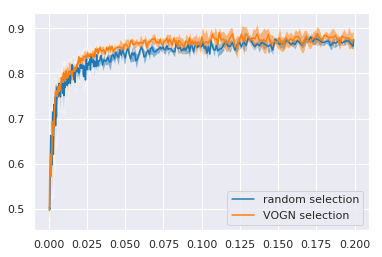

In [28]:
nnn = np.ones(262)
for i in range(261):
    nnn[i+1] = nnn[i] + batch_size_sample[i]
    
plot_mean_std(nnn/3420,ts,'random selection',color='blue')
plot_mean_std(nnn/3420,ttt,'VOGN selection',color='y')
#plt.savefig('graph_1.png')

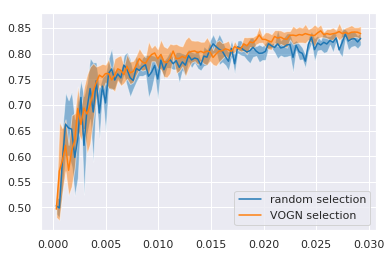

In [29]:
plot_mean_std(nnn[:100]/3420,ts[:,:100],'random selection',color='blue')
plot_mean_std(nnn[:100]/3420,ttt[:,:100],'VOGN selection',color='y')

In [25]:
rez_r={}
rezz_r={}
for i in range(5):
    seed(3+i)
    results =[np.random.choice(3420, j,replace=False) for j in nnn.astype(int)]
    rez_r["group" + str(i)] = results

In [26]:
for i in range(5):
    doop = []
    for j in rez_r["group" + str(i)]:
        model = SimpleConvNet()
        optimizer = optim.Adam(model.parameters(), weight_decay=0.001)
        doop.append(test_perf_py(model,optimizer,Xtrain[j],Ytrain[j],Xtest,Ytest))
    rezz_r["group" + str(i)] = doop

Epoch[0]:
## Epoch[0], Train Loss: 0.684444   &   Train Accuracy: 1.000000
Epoch[1]:
## Epoch[1], Train Loss: 0.660171   &   Train Accuracy: 1.000000
Epoch[2]:
## Epoch[2], Train Loss: 0.642730   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.627367   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.610771   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5], Train Loss: 0.593680   &   Train Accuracy: 1.000000
Epoch[6]:
## Epoch[6], Train Loss: 0.575462   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.554412   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.531658   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.507455   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.481977   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.455165   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.427249   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch

## Epoch[47], Train Loss: 0.001589   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.001462   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.001354   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.676617   &   Train Accuracy: 0.500000
Epoch[1]:
## Epoch[1], Train Loss: 0.656205   &   Train Accuracy: 0.500000
Epoch[2]:
## Epoch[2], Train Loss: 0.637650   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.620858   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.604657   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5], Train Loss: 0.587760   &   Train Accuracy: 1.000000
Epoch[6]:
## Epoch[6], Train Loss: 0.569242   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.548633   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.526785   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.503507   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train

## Epoch[15], Train Loss: 0.220841   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.192786   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.166383   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.142318   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.120494   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.101308   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.084946   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.070866   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.058893   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.048918   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.040514   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.033559   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.027778   &   Train Accuracy: 1.000000
Epoch[28]:

## Epoch[33], Train Loss: 0.023844   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.020097   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.016944   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.014298   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.012091   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.010259   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.008740   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.007484   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.006443   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.005582   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.004866   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.004271   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.003774   &   Train Accuracy: 1.000000
Epoch[46]:

## Epoch[44], Train Loss: 0.009549   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.008308   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.007287   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.006430   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.005718   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.005128   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.682942   &   Train Accuracy: 0.833333
Epoch[1]:
## Epoch[1], Train Loss: 0.668153   &   Train Accuracy: 0.666667
Epoch[2]:
## Epoch[2], Train Loss: 0.653656   &   Train Accuracy: 0.666667
Epoch[3]:
## Epoch[3], Train Loss: 0.638761   &   Train Accuracy: 0.666667
Epoch[4]:
## Epoch[4], Train Loss: 0.623618   &   Train Accuracy: 0.666667
Epoch[5]:
## Epoch[5], Train Loss: 0.608274   &   Train Accuracy: 0.666667
Epoch[6]:
## Epoch[6], Train Loss: 0.592530   &   Train Accuracy: 0.666667
Epoch[7]:
## Epoch[7], T

## Epoch[3], Train Loss: 0.639398   &   Train Accuracy: 0.928571
Epoch[4]:
## Epoch[4], Train Loss: 0.624085   &   Train Accuracy: 0.857143
Epoch[5]:
## Epoch[5], Train Loss: 0.607915   &   Train Accuracy: 0.857143
Epoch[6]:
## Epoch[6], Train Loss: 0.590815   &   Train Accuracy: 0.857143
Epoch[7]:
## Epoch[7], Train Loss: 0.572339   &   Train Accuracy: 0.928571
Epoch[8]:
## Epoch[8], Train Loss: 0.552362   &   Train Accuracy: 0.928571
Epoch[9]:
## Epoch[9], Train Loss: 0.530626   &   Train Accuracy: 0.928571
Epoch[10]:
## Epoch[10], Train Loss: 0.507387   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.482804   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.456851   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.429742   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.401587   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.372444   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16]

## Epoch[12], Train Loss: 0.378246   &   Train Accuracy: 0.937500
Epoch[13]:
## Epoch[13], Train Loss: 0.348904   &   Train Accuracy: 0.937500
Epoch[14]:
## Epoch[14], Train Loss: 0.319991   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.291799   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.264861   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.239228   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.215100   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.192822   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.172409   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.153950   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.137087   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.121595   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.107395   &   Train Accuracy: 1.000000
Epoch[25]:

## Epoch[21], Train Loss: 0.238077   &   Train Accuracy: 0.947368
Epoch[22]:
## Epoch[22], Train Loss: 0.222224   &   Train Accuracy: 0.947368
Epoch[23]:
## Epoch[23], Train Loss: 0.207870   &   Train Accuracy: 0.947368
Epoch[24]:
## Epoch[24], Train Loss: 0.194959   &   Train Accuracy: 0.947368
Epoch[25]:
## Epoch[25], Train Loss: 0.183425   &   Train Accuracy: 0.947368
Epoch[26]:
## Epoch[26], Train Loss: 0.173042   &   Train Accuracy: 0.947368
Epoch[27]:
## Epoch[27], Train Loss: 0.163725   &   Train Accuracy: 0.947368
Epoch[28]:
## Epoch[28], Train Loss: 0.155316   &   Train Accuracy: 0.947368
Epoch[29]:
## Epoch[29], Train Loss: 0.147762   &   Train Accuracy: 0.947368
Epoch[30]:
## Epoch[30], Train Loss: 0.140769   &   Train Accuracy: 0.947368
Epoch[31]:
## Epoch[31], Train Loss: 0.134268   &   Train Accuracy: 0.947368
Epoch[32]:
## Epoch[32], Train Loss: 0.128213   &   Train Accuracy: 0.947368
Epoch[33]:
## Epoch[33], Train Loss: 0.122488   &   Train Accuracy: 0.947368
Epoch[34]:

## Epoch[25], Train Loss: 0.199875   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.176093   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.153759   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.133023   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.114070   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.097033   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.081907   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.068671   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.057255   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.047545   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.039374   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.032572   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.026975   &   Train Accuracy: 1.000000
Epoch[38]:

## Epoch[29], Train Loss: 0.100152   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.088786   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.078627   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.069557   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.061483   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.054282   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.047891   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.042233   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.037179   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.032713   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.028762   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.025251   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.022155   &   Train Accuracy: 1.000000
Epoch[42]:

## Epoch[31], Train Loss: 0.205410   &   Train Accuracy: 0.964286
Epoch[32]:
## Epoch[32], Train Loss: 0.190791   &   Train Accuracy: 0.964286
Epoch[33]:
## Epoch[33], Train Loss: 0.176562   &   Train Accuracy: 0.964286
Epoch[34]:
## Epoch[34], Train Loss: 0.162682   &   Train Accuracy: 0.964286
Epoch[35]:
## Epoch[35], Train Loss: 0.149171   &   Train Accuracy: 0.964286
Epoch[36]:
## Epoch[36], Train Loss: 0.136236   &   Train Accuracy: 0.964286
Epoch[37]:
## Epoch[37], Train Loss: 0.123990   &   Train Accuracy: 0.964286
Epoch[38]:
## Epoch[38], Train Loss: 0.112501   &   Train Accuracy: 0.964286
Epoch[39]:
## Epoch[39], Train Loss: 0.101691   &   Train Accuracy: 0.964286
Epoch[40]:
## Epoch[40], Train Loss: 0.091535   &   Train Accuracy: 0.964286
Epoch[41]:
## Epoch[41], Train Loss: 0.081929   &   Train Accuracy: 0.964286
Epoch[42]:
## Epoch[42], Train Loss: 0.073006   &   Train Accuracy: 0.964286
Epoch[43]:
## Epoch[43], Train Loss: 0.064723   &   Train Accuracy: 1.000000
Epoch[44]:

## Epoch[12], Train Loss: 0.462276   &   Train Accuracy: 0.903226
Epoch[13]:
## Epoch[13], Train Loss: 0.436171   &   Train Accuracy: 0.935484
Epoch[14]:
## Epoch[14], Train Loss: 0.409671   &   Train Accuracy: 0.935484
Epoch[15]:
## Epoch[15], Train Loss: 0.383019   &   Train Accuracy: 0.935484
Epoch[16]:
## Epoch[16], Train Loss: 0.356710   &   Train Accuracy: 0.967742
Epoch[17]:
## Epoch[17], Train Loss: 0.331082   &   Train Accuracy: 0.967742
Epoch[18]:
## Epoch[18], Train Loss: 0.306509   &   Train Accuracy: 0.967742
Epoch[19]:
## Epoch[19], Train Loss: 0.283343   &   Train Accuracy: 0.967742
Epoch[20]:
## Epoch[20], Train Loss: 0.261732   &   Train Accuracy: 0.967742
Epoch[21]:
## Epoch[21], Train Loss: 0.241823   &   Train Accuracy: 0.967742
Epoch[22]:
## Epoch[22], Train Loss: 0.223663   &   Train Accuracy: 0.967742
Epoch[23]:
## Epoch[23], Train Loss: 0.207092   &   Train Accuracy: 0.967742
Epoch[24]:
## Epoch[24], Train Loss: 0.192114   &   Train Accuracy: 0.967742
Epoch[25]:

## Epoch[11], Train Loss: 0.506121   &   Train Accuracy: 0.852941
Epoch[12]:
## Epoch[12], Train Loss: 0.485831   &   Train Accuracy: 0.852941
Epoch[13]:
## Epoch[13], Train Loss: 0.465284   &   Train Accuracy: 0.852941
Epoch[14]:
## Epoch[14], Train Loss: 0.444670   &   Train Accuracy: 0.852941
Epoch[15]:
## Epoch[15], Train Loss: 0.424124   &   Train Accuracy: 0.852941
Epoch[16]:
## Epoch[16], Train Loss: 0.403695   &   Train Accuracy: 0.852941
Epoch[17]:
## Epoch[17], Train Loss: 0.383585   &   Train Accuracy: 0.852941
Epoch[18]:
## Epoch[18], Train Loss: 0.364071   &   Train Accuracy: 0.852941
Epoch[19]:
## Epoch[19], Train Loss: 0.345188   &   Train Accuracy: 0.882353
Epoch[20]:
## Epoch[20], Train Loss: 0.326846   &   Train Accuracy: 0.882353
Epoch[21]:
## Epoch[21], Train Loss: 0.309024   &   Train Accuracy: 0.882353
Epoch[22]:
## Epoch[22], Train Loss: 0.291746   &   Train Accuracy: 0.911765
Epoch[23]:
## Epoch[23], Train Loss: 0.275119   &   Train Accuracy: 0.911765
Epoch[24]:

## Epoch[7], Train Loss: 0.630408   &   Train Accuracy: 0.837838
Epoch[8]:
## Epoch[8], Train Loss: 0.619700   &   Train Accuracy: 0.837838
Epoch[9]:
## Epoch[9], Train Loss: 0.607974   &   Train Accuracy: 0.837838
Epoch[10]:
## Epoch[10], Train Loss: 0.595192   &   Train Accuracy: 0.837838
Epoch[11]:
## Epoch[11], Train Loss: 0.581158   &   Train Accuracy: 0.864865
Epoch[12]:
## Epoch[12], Train Loss: 0.565939   &   Train Accuracy: 0.864865
Epoch[13]:
## Epoch[13], Train Loss: 0.549529   &   Train Accuracy: 0.864865
Epoch[14]:
## Epoch[14], Train Loss: 0.531934   &   Train Accuracy: 0.891892
Epoch[15]:
## Epoch[15], Train Loss: 0.513260   &   Train Accuracy: 0.891892
Epoch[16]:
## Epoch[16], Train Loss: 0.493518   &   Train Accuracy: 0.891892
Epoch[17]:
## Epoch[17], Train Loss: 0.472909   &   Train Accuracy: 0.891892
Epoch[18]:
## Epoch[18], Train Loss: 0.451617   &   Train Accuracy: 0.891892
Epoch[19]:
## Epoch[19], Train Loss: 0.429833   &   Train Accuracy: 0.891892
Epoch[20]:
## E

## Epoch[5], Train Loss: 0.624652   &   Train Accuracy: 0.950000
Epoch[6]:
## Epoch[6], Train Loss: 0.610008   &   Train Accuracy: 0.950000
Epoch[7]:
## Epoch[7], Train Loss: 0.593985   &   Train Accuracy: 0.950000
Epoch[8]:
## Epoch[8], Train Loss: 0.576550   &   Train Accuracy: 0.925000
Epoch[9]:
## Epoch[9], Train Loss: 0.557326   &   Train Accuracy: 0.925000
Epoch[10]:
## Epoch[10], Train Loss: 0.536426   &   Train Accuracy: 0.925000
Epoch[11]:
## Epoch[11], Train Loss: 0.514090   &   Train Accuracy: 0.925000
Epoch[12]:
## Epoch[12], Train Loss: 0.490507   &   Train Accuracy: 0.925000
Epoch[13]:
## Epoch[13], Train Loss: 0.465834   &   Train Accuracy: 0.925000
Epoch[14]:
## Epoch[14], Train Loss: 0.440431   &   Train Accuracy: 0.925000
Epoch[15]:
## Epoch[15], Train Loss: 0.414498   &   Train Accuracy: 0.925000
Epoch[16]:
## Epoch[16], Train Loss: 0.388418   &   Train Accuracy: 0.925000
Epoch[17]:
## Epoch[17], Train Loss: 0.362450   &   Train Accuracy: 0.925000
Epoch[18]:
## Epoch

## Epoch[2], Train Loss: 0.660698   &   Train Accuracy: 0.790698
Epoch[3]:
## Epoch[3], Train Loss: 0.649934   &   Train Accuracy: 0.837209
Epoch[4]:
## Epoch[4], Train Loss: 0.638894   &   Train Accuracy: 0.883721
Epoch[5]:
## Epoch[5], Train Loss: 0.627102   &   Train Accuracy: 0.883721
Epoch[6]:
## Epoch[6], Train Loss: 0.614331   &   Train Accuracy: 0.883721
Epoch[7]:
## Epoch[7], Train Loss: 0.600467   &   Train Accuracy: 0.860465
Epoch[8]:
## Epoch[8], Train Loss: 0.585499   &   Train Accuracy: 0.860465
Epoch[9]:
## Epoch[9], Train Loss: 0.569538   &   Train Accuracy: 0.860465
Epoch[10]:
## Epoch[10], Train Loss: 0.552667   &   Train Accuracy: 0.837209
Epoch[11]:
## Epoch[11], Train Loss: 0.534927   &   Train Accuracy: 0.837209
Epoch[12]:
## Epoch[12], Train Loss: 0.516537   &   Train Accuracy: 0.813953
Epoch[13]:
## Epoch[13], Train Loss: 0.497581   &   Train Accuracy: 0.813953
Epoch[14]:
## Epoch[14], Train Loss: 0.478263   &   Train Accuracy: 0.837209
Epoch[15]:
## Epoch[15], 

## Epoch[1], Train Loss: 0.677043   &   Train Accuracy: 0.804348
Epoch[2]:
## Epoch[2], Train Loss: 0.668182   &   Train Accuracy: 0.804348
Epoch[3]:
## Epoch[3], Train Loss: 0.659160   &   Train Accuracy: 0.782609
Epoch[4]:
## Epoch[4], Train Loss: 0.649454   &   Train Accuracy: 0.804348
Epoch[5]:
## Epoch[5], Train Loss: 0.638806   &   Train Accuracy: 0.826087
Epoch[6]:
## Epoch[6], Train Loss: 0.626986   &   Train Accuracy: 0.826087
Epoch[7]:
## Epoch[7], Train Loss: 0.614266   &   Train Accuracy: 0.826087
Epoch[8]:
## Epoch[8], Train Loss: 0.600528   &   Train Accuracy: 0.804348
Epoch[9]:
## Epoch[9], Train Loss: 0.585700   &   Train Accuracy: 0.826087
Epoch[10]:
## Epoch[10], Train Loss: 0.569725   &   Train Accuracy: 0.826087
Epoch[11]:
## Epoch[11], Train Loss: 0.552669   &   Train Accuracy: 0.826087
Epoch[12]:
## Epoch[12], Train Loss: 0.534672   &   Train Accuracy: 0.847826
Epoch[13]:
## Epoch[13], Train Loss: 0.515805   &   Train Accuracy: 0.847826
Epoch[14]:
## Epoch[14], Tr

Epoch[0]:
## Epoch[0], Train Loss: 0.677249   &   Train Accuracy: 0.653061
Epoch[1]:
## Epoch[1], Train Loss: 0.664139   &   Train Accuracy: 0.734694
Epoch[2]:
## Epoch[2], Train Loss: 0.651049   &   Train Accuracy: 0.836735
Epoch[3]:
## Epoch[3], Train Loss: 0.637696   &   Train Accuracy: 0.877551
Epoch[4]:
## Epoch[4], Train Loss: 0.623509   &   Train Accuracy: 0.857143
Epoch[5]:
## Epoch[5], Train Loss: 0.608388   &   Train Accuracy: 0.857143
Epoch[6]:
## Epoch[6], Train Loss: 0.591926   &   Train Accuracy: 0.857143
Epoch[7]:
## Epoch[7], Train Loss: 0.574190   &   Train Accuracy: 0.877551
Epoch[8]:
## Epoch[8], Train Loss: 0.555104   &   Train Accuracy: 0.877551
Epoch[9]:
## Epoch[9], Train Loss: 0.534825   &   Train Accuracy: 0.877551
Epoch[10]:
## Epoch[10], Train Loss: 0.513329   &   Train Accuracy: 0.877551
Epoch[11]:
## Epoch[11], Train Loss: 0.490873   &   Train Accuracy: 0.877551
Epoch[12]:
## Epoch[12], Train Loss: 0.467588   &   Train Accuracy: 0.877551
Epoch[13]:
## Epoch

## Epoch[46], Train Loss: 0.028042   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.025642   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.023459   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.021489   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.689953   &   Train Accuracy: 0.711538
Epoch[1]:
## Epoch[1], Train Loss: 0.680662   &   Train Accuracy: 0.826923
Epoch[2]:
## Epoch[2], Train Loss: 0.672155   &   Train Accuracy: 0.807692
Epoch[3]:
## Epoch[3], Train Loss: 0.663626   &   Train Accuracy: 0.807692
Epoch[4]:
## Epoch[4], Train Loss: 0.654838   &   Train Accuracy: 0.807692
Epoch[5]:
## Epoch[5], Train Loss: 0.645605   &   Train Accuracy: 0.807692
Epoch[6]:
## Epoch[6], Train Loss: 0.635663   &   Train Accuracy: 0.807692
Epoch[7]:
## Epoch[7], Train Loss: 0.624841   &   Train Accuracy: 0.807692
Epoch[8]:
## Epoch[8], Train Loss: 0.613094   &   Train Accuracy: 0.826923
Epoch[9]:
## Epoch[9], Train

## Epoch[39], Train Loss: 0.072669   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.065478   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.058790   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.052618   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.046959   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.041860   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.037258   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.033153   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.029521   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.026310   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.023455   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.688898   &   Train Accuracy: 0.472727
Epoch[1]:
## Epoch[1], Train Loss: 0.678982   &   Train Accuracy: 0.490909
Epoch[2]:
## E

## Epoch[30], Train Loss: 0.167499   &   Train Accuracy: 0.947368
Epoch[31]:
## Epoch[31], Train Loss: 0.157609   &   Train Accuracy: 0.947368
Epoch[32]:
## Epoch[32], Train Loss: 0.148318   &   Train Accuracy: 0.947368
Epoch[33]:
## Epoch[33], Train Loss: 0.139513   &   Train Accuracy: 0.947368
Epoch[34]:
## Epoch[34], Train Loss: 0.131051   &   Train Accuracy: 0.947368
Epoch[35]:
## Epoch[35], Train Loss: 0.122893   &   Train Accuracy: 0.947368
Epoch[36]:
## Epoch[36], Train Loss: 0.115003   &   Train Accuracy: 0.947368
Epoch[37]:
## Epoch[37], Train Loss: 0.107398   &   Train Accuracy: 0.947368
Epoch[38]:
## Epoch[38], Train Loss: 0.100129   &   Train Accuracy: 0.947368
Epoch[39]:
## Epoch[39], Train Loss: 0.093210   &   Train Accuracy: 0.982456
Epoch[40]:
## Epoch[40], Train Loss: 0.086677   &   Train Accuracy: 0.982456
Epoch[41]:
## Epoch[41], Train Loss: 0.080413   &   Train Accuracy: 0.982456
Epoch[42]:
## Epoch[42], Train Loss: 0.074332   &   Train Accuracy: 0.982456
Epoch[43]:

## Epoch[14], Train Loss: 0.456762   &   Train Accuracy: 0.866667
Epoch[15]:
## Epoch[15], Train Loss: 0.437254   &   Train Accuracy: 0.850000
Epoch[16]:
## Epoch[16], Train Loss: 0.417851   &   Train Accuracy: 0.850000
Epoch[17]:
## Epoch[17], Train Loss: 0.398676   &   Train Accuracy: 0.866667
Epoch[18]:
## Epoch[18], Train Loss: 0.379848   &   Train Accuracy: 0.850000
Epoch[19]:
## Epoch[19], Train Loss: 0.361378   &   Train Accuracy: 0.866667
Epoch[20]:
## Epoch[20], Train Loss: 0.343401   &   Train Accuracy: 0.866667
Epoch[21]:
## Epoch[21], Train Loss: 0.325787   &   Train Accuracy: 0.866667
Epoch[22]:
## Epoch[22], Train Loss: 0.308572   &   Train Accuracy: 0.866667
Epoch[23]:
## Epoch[23], Train Loss: 0.291770   &   Train Accuracy: 0.866667
Epoch[24]:
## Epoch[24], Train Loss: 0.275389   &   Train Accuracy: 0.866667
Epoch[25]:
## Epoch[25], Train Loss: 0.259473   &   Train Accuracy: 0.883333
Epoch[26]:
## Epoch[26], Train Loss: 0.244003   &   Train Accuracy: 0.883333
Epoch[27]:

## Epoch[0], Train Loss: 0.671355   &   Train Accuracy: 0.539683
Epoch[1]:
## Epoch[1], Train Loss: 0.657347   &   Train Accuracy: 0.539683
Epoch[2]:
## Epoch[2], Train Loss: 0.643326   &   Train Accuracy: 0.587302
Epoch[3]:
## Epoch[3], Train Loss: 0.628332   &   Train Accuracy: 0.698413
Epoch[4]:
## Epoch[4], Train Loss: 0.612097   &   Train Accuracy: 0.809524
Epoch[5]:
## Epoch[5], Train Loss: 0.594475   &   Train Accuracy: 0.841270
Epoch[6]:
## Epoch[6], Train Loss: 0.575455   &   Train Accuracy: 0.873016
Epoch[7]:
## Epoch[7], Train Loss: 0.555064   &   Train Accuracy: 0.904762
Epoch[8]:
## Epoch[8], Train Loss: 0.533263   &   Train Accuracy: 0.904762
Epoch[9]:
## Epoch[9], Train Loss: 0.510058   &   Train Accuracy: 0.936508
Epoch[10]:
## Epoch[10], Train Loss: 0.485632   &   Train Accuracy: 0.936508
Epoch[11]:
## Epoch[11], Train Loss: 0.460042   &   Train Accuracy: 0.936508
Epoch[12]:
## Epoch[12], Train Loss: 0.433425   &   Train Accuracy: 0.936508
Epoch[13]:
## Epoch[13], Trai

## Epoch[39], Train Loss: 0.041405   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.037055   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.033157   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.029655   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.026510   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.023699   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.021194   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.018993   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.017039   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.015299   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.013765   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683071   &   Train Accuracy: 0.787879
Epoch[1]:
## Epoch[1], Train Loss: 0.673399   &   Train Accuracy: 0.833333
Epoch[2]:
## E

## Epoch[27], Train Loss: 0.236158   &   Train Accuracy: 0.926471
Epoch[28]:
## Epoch[28], Train Loss: 0.225560   &   Train Accuracy: 0.926471
Epoch[29]:
## Epoch[29], Train Loss: 0.215303   &   Train Accuracy: 0.926471
Epoch[30]:
## Epoch[30], Train Loss: 0.205213   &   Train Accuracy: 0.926471
Epoch[31]:
## Epoch[31], Train Loss: 0.195293   &   Train Accuracy: 0.926471
Epoch[32]:
## Epoch[32], Train Loss: 0.185495   &   Train Accuracy: 0.926471
Epoch[33]:
## Epoch[33], Train Loss: 0.175743   &   Train Accuracy: 0.926471
Epoch[34]:
## Epoch[34], Train Loss: 0.166090   &   Train Accuracy: 0.941176
Epoch[35]:
## Epoch[35], Train Loss: 0.156652   &   Train Accuracy: 0.941176
Epoch[36]:
## Epoch[36], Train Loss: 0.147422   &   Train Accuracy: 0.955882
Epoch[37]:
## Epoch[37], Train Loss: 0.138417   &   Train Accuracy: 0.955882
Epoch[38]:
## Epoch[38], Train Loss: 0.129669   &   Train Accuracy: 0.955882
Epoch[39]:
## Epoch[39], Train Loss: 0.121231   &   Train Accuracy: 0.970588
Epoch[40]:

## Epoch[25], Train Loss: 0.211251   &   Train Accuracy: 0.929577
Epoch[26]:
## Epoch[26], Train Loss: 0.198784   &   Train Accuracy: 0.929577
Epoch[27]:
## Epoch[27], Train Loss: 0.187503   &   Train Accuracy: 0.929577
Epoch[28]:
## Epoch[28], Train Loss: 0.177275   &   Train Accuracy: 0.943662
Epoch[29]:
## Epoch[29], Train Loss: 0.167837   &   Train Accuracy: 0.943662
Epoch[30]:
## Epoch[30], Train Loss: 0.158962   &   Train Accuracy: 0.943662
Epoch[31]:
## Epoch[31], Train Loss: 0.150543   &   Train Accuracy: 0.957746
Epoch[32]:
## Epoch[32], Train Loss: 0.142462   &   Train Accuracy: 0.957746
Epoch[33]:
## Epoch[33], Train Loss: 0.134638   &   Train Accuracy: 0.957746
Epoch[34]:
## Epoch[34], Train Loss: 0.127033   &   Train Accuracy: 0.957746
Epoch[35]:
## Epoch[35], Train Loss: 0.119670   &   Train Accuracy: 0.957746
Epoch[36]:
## Epoch[36], Train Loss: 0.112513   &   Train Accuracy: 0.957746
Epoch[37]:
## Epoch[37], Train Loss: 0.105653   &   Train Accuracy: 0.957746
Epoch[38]:

## Epoch[21], Train Loss: 0.280412   &   Train Accuracy: 0.918919
Epoch[22]:
## Epoch[22], Train Loss: 0.257957   &   Train Accuracy: 0.918919
Epoch[23]:
## Epoch[23], Train Loss: 0.236872   &   Train Accuracy: 0.918919
Epoch[24]:
## Epoch[24], Train Loss: 0.217241   &   Train Accuracy: 0.932432
Epoch[25]:
## Epoch[25], Train Loss: 0.199008   &   Train Accuracy: 0.932432
Epoch[26]:
## Epoch[26], Train Loss: 0.182180   &   Train Accuracy: 0.945946
Epoch[27]:
## Epoch[27], Train Loss: 0.166694   &   Train Accuracy: 0.945946
Epoch[28]:
## Epoch[28], Train Loss: 0.152368   &   Train Accuracy: 0.959459
Epoch[29]:
## Epoch[29], Train Loss: 0.139105   &   Train Accuracy: 0.972973
Epoch[30]:
## Epoch[30], Train Loss: 0.126773   &   Train Accuracy: 0.986486
Epoch[31]:
## Epoch[31], Train Loss: 0.115402   &   Train Accuracy: 0.986486
Epoch[32]:
## Epoch[32], Train Loss: 0.104946   &   Train Accuracy: 0.986486
Epoch[33]:
## Epoch[33], Train Loss: 0.095277   &   Train Accuracy: 0.986486
Epoch[34]:

## Epoch[2], Train Loss: 0.660819   &   Train Accuracy: 0.792208
Epoch[3]:
## Epoch[3], Train Loss: 0.650349   &   Train Accuracy: 0.792208
Epoch[4]:
## Epoch[4], Train Loss: 0.638998   &   Train Accuracy: 0.818182
Epoch[5]:
## Epoch[5], Train Loss: 0.626623   &   Train Accuracy: 0.818182
Epoch[6]:
## Epoch[6], Train Loss: 0.613282   &   Train Accuracy: 0.805195
Epoch[7]:
## Epoch[7], Train Loss: 0.598898   &   Train Accuracy: 0.805195
Epoch[8]:
## Epoch[8], Train Loss: 0.583397   &   Train Accuracy: 0.805195
Epoch[9]:
## Epoch[9], Train Loss: 0.566731   &   Train Accuracy: 0.805195
Epoch[10]:
## Epoch[10], Train Loss: 0.549027   &   Train Accuracy: 0.792208
Epoch[11]:
## Epoch[11], Train Loss: 0.530345   &   Train Accuracy: 0.792208
Epoch[12]:
## Epoch[12], Train Loss: 0.510968   &   Train Accuracy: 0.792208
Epoch[13]:
## Epoch[13], Train Loss: 0.491147   &   Train Accuracy: 0.805195
Epoch[14]:
## Epoch[14], Train Loss: 0.471069   &   Train Accuracy: 0.805195
Epoch[15]:
## Epoch[15], 

## Epoch[46], Train Loss: 0.036695   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.033734   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.031004   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.028488   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.681544   &   Train Accuracy: 0.725000
Epoch[1]:
## Epoch[1], Train Loss: 0.669390   &   Train Accuracy: 0.837500
Epoch[2]:
## Epoch[2], Train Loss: 0.657579   &   Train Accuracy: 0.875000
Epoch[3]:
## Epoch[3], Train Loss: 0.645608   &   Train Accuracy: 0.800000
Epoch[4]:
## Epoch[4], Train Loss: 0.633022   &   Train Accuracy: 0.800000
Epoch[5]:
## Epoch[5], Train Loss: 0.619573   &   Train Accuracy: 0.800000
Epoch[6]:
## Epoch[6], Train Loss: 0.604883   &   Train Accuracy: 0.800000
Epoch[7]:
## Epoch[7], Train Loss: 0.588989   &   Train Accuracy: 0.800000
Epoch[8]:
## Epoch[8], Train Loss: 0.571811   &   Train Accuracy: 0.812500
Epoch[9]:
## Epoch[9], Train

## Epoch[43], Train Loss: 0.057727   &   Train Accuracy: 0.987805
Epoch[44]:
## Epoch[44], Train Loss: 0.053678   &   Train Accuracy: 0.987805
Epoch[45]:
## Epoch[45], Train Loss: 0.049834   &   Train Accuracy: 0.987805
Epoch[46]:
## Epoch[46], Train Loss: 0.046130   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.042580   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.039222   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.036086   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683549   &   Train Accuracy: 0.542169
Epoch[1]:
## Epoch[1], Train Loss: 0.675357   &   Train Accuracy: 0.734940
Epoch[2]:
## Epoch[2], Train Loss: 0.666981   &   Train Accuracy: 0.771084
Epoch[3]:
## Epoch[3], Train Loss: 0.658022   &   Train Accuracy: 0.771084
Epoch[4]:
## Epoch[4], Train Loss: 0.648057   &   Train Accuracy: 0.795181
Epoch[5]:
## Epoch[5], Train Loss: 0.637139   &   Train Accuracy: 0.843373
Epoch[6]:
## Epoch[6],

## Epoch[28], Train Loss: 0.178037   &   Train Accuracy: 0.929412
Epoch[29]:
## Epoch[29], Train Loss: 0.166602   &   Train Accuracy: 0.929412
Epoch[30]:
## Epoch[30], Train Loss: 0.155517   &   Train Accuracy: 0.929412
Epoch[31]:
## Epoch[31], Train Loss: 0.144648   &   Train Accuracy: 0.929412
Epoch[32]:
## Epoch[32], Train Loss: 0.134067   &   Train Accuracy: 0.941176
Epoch[33]:
## Epoch[33], Train Loss: 0.123828   &   Train Accuracy: 0.952941
Epoch[34]:
## Epoch[34], Train Loss: 0.113892   &   Train Accuracy: 0.952941
Epoch[35]:
## Epoch[35], Train Loss: 0.104396   &   Train Accuracy: 0.952941
Epoch[36]:
## Epoch[36], Train Loss: 0.095444   &   Train Accuracy: 0.976471
Epoch[37]:
## Epoch[37], Train Loss: 0.087106   &   Train Accuracy: 0.988235
Epoch[38]:
## Epoch[38], Train Loss: 0.079362   &   Train Accuracy: 0.988235
Epoch[39]:
## Epoch[39], Train Loss: 0.072201   &   Train Accuracy: 0.988235
Epoch[40]:
## Epoch[40], Train Loss: 0.065604   &   Train Accuracy: 1.000000
Epoch[41]:

## Epoch[13], Train Loss: 0.405135   &   Train Accuracy: 0.897727
Epoch[14]:
## Epoch[14], Train Loss: 0.379595   &   Train Accuracy: 0.909091
Epoch[15]:
## Epoch[15], Train Loss: 0.354425   &   Train Accuracy: 0.909091
Epoch[16]:
## Epoch[16], Train Loss: 0.329831   &   Train Accuracy: 0.920455
Epoch[17]:
## Epoch[17], Train Loss: 0.306119   &   Train Accuracy: 0.920455
Epoch[18]:
## Epoch[18], Train Loss: 0.283576   &   Train Accuracy: 0.920455
Epoch[19]:
## Epoch[19], Train Loss: 0.262414   &   Train Accuracy: 0.920455
Epoch[20]:
## Epoch[20], Train Loss: 0.242725   &   Train Accuracy: 0.920455
Epoch[21]:
## Epoch[21], Train Loss: 0.224618   &   Train Accuracy: 0.920455
Epoch[22]:
## Epoch[22], Train Loss: 0.208135   &   Train Accuracy: 0.931818
Epoch[23]:
## Epoch[23], Train Loss: 0.193232   &   Train Accuracy: 0.931818
Epoch[24]:
## Epoch[24], Train Loss: 0.179707   &   Train Accuracy: 0.943182
Epoch[25]:
## Epoch[25], Train Loss: 0.167471   &   Train Accuracy: 0.954545
Epoch[26]:

## Epoch[48], Train Loss: 0.045580   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.041351   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.679745   &   Train Accuracy: 0.703297
Epoch[1]:
## Epoch[1], Train Loss: 0.666724   &   Train Accuracy: 0.736264
Epoch[2]:
## Epoch[2], Train Loss: 0.654108   &   Train Accuracy: 0.747253
Epoch[3]:
## Epoch[3], Train Loss: 0.641211   &   Train Accuracy: 0.747253
Epoch[4]:
## Epoch[4], Train Loss: 0.627757   &   Train Accuracy: 0.780220
Epoch[5]:
## Epoch[5], Train Loss: 0.613214   &   Train Accuracy: 0.802198
Epoch[6]:
## Epoch[6], Train Loss: 0.597385   &   Train Accuracy: 0.813187
Epoch[7]:
## Epoch[7], Train Loss: 0.580168   &   Train Accuracy: 0.857143
Epoch[8]:
## Epoch[8], Train Loss: 0.561376   &   Train Accuracy: 0.868132
Epoch[9]:
## Epoch[9], Train Loss: 0.541022   &   Train Accuracy: 0.890110
Epoch[10]:
## Epoch[10], Train Loss: 0.519232   &   Train Accuracy: 0.890110
Epoch[11]:
## Epoch[11], Train

## Epoch[28], Train Loss: 0.177220   &   Train Accuracy: 0.946237
Epoch[29]:
## Epoch[29], Train Loss: 0.168639   &   Train Accuracy: 0.956989
Epoch[30]:
## Epoch[30], Train Loss: 0.160195   &   Train Accuracy: 0.956989
Epoch[31]:
## Epoch[31], Train Loss: 0.151825   &   Train Accuracy: 0.956989
Epoch[32]:
## Epoch[32], Train Loss: 0.143515   &   Train Accuracy: 0.967742
Epoch[33]:
## Epoch[33], Train Loss: 0.135271   &   Train Accuracy: 0.967742
Epoch[34]:
## Epoch[34], Train Loss: 0.127204   &   Train Accuracy: 0.978495
Epoch[35]:
## Epoch[35], Train Loss: 0.119423   &   Train Accuracy: 0.978495
Epoch[36]:
## Epoch[36], Train Loss: 0.111986   &   Train Accuracy: 0.978495
Epoch[37]:
## Epoch[37], Train Loss: 0.104872   &   Train Accuracy: 0.978495
Epoch[38]:
## Epoch[38], Train Loss: 0.098075   &   Train Accuracy: 0.978495
Epoch[39]:
## Epoch[39], Train Loss: 0.091611   &   Train Accuracy: 0.978495
Epoch[40]:
## Epoch[40], Train Loss: 0.085447   &   Train Accuracy: 0.978495
Epoch[41]:

## Epoch[5], Train Loss: 0.616948   &   Train Accuracy: 0.854167
Epoch[6]:
## Epoch[6], Train Loss: 0.601885   &   Train Accuracy: 0.864583
Epoch[7]:
## Epoch[7], Train Loss: 0.585608   &   Train Accuracy: 0.864583
Epoch[8]:
## Epoch[8], Train Loss: 0.568063   &   Train Accuracy: 0.864583
Epoch[9]:
## Epoch[9], Train Loss: 0.549496   &   Train Accuracy: 0.864583
Epoch[10]:
## Epoch[10], Train Loss: 0.529873   &   Train Accuracy: 0.864583
Epoch[11]:
## Epoch[11], Train Loss: 0.509259   &   Train Accuracy: 0.875000
Epoch[12]:
## Epoch[12], Train Loss: 0.487763   &   Train Accuracy: 0.875000
Epoch[13]:
## Epoch[13], Train Loss: 0.465610   &   Train Accuracy: 0.885417
Epoch[14]:
## Epoch[14], Train Loss: 0.443114   &   Train Accuracy: 0.875000
Epoch[15]:
## Epoch[15], Train Loss: 0.420594   &   Train Accuracy: 0.885417
Epoch[16]:
## Epoch[16], Train Loss: 0.398228   &   Train Accuracy: 0.885417
Epoch[17]:
## Epoch[17], Train Loss: 0.376259   &   Train Accuracy: 0.885417
Epoch[18]:
## Epoch

## Epoch[29], Train Loss: 0.213138   &   Train Accuracy: 0.908163
Epoch[30]:
## Epoch[30], Train Loss: 0.205003   &   Train Accuracy: 0.908163
Epoch[31]:
## Epoch[31], Train Loss: 0.197350   &   Train Accuracy: 0.918367
Epoch[32]:
## Epoch[32], Train Loss: 0.190221   &   Train Accuracy: 0.918367
Epoch[33]:
## Epoch[33], Train Loss: 0.183398   &   Train Accuracy: 0.918367
Epoch[34]:
## Epoch[34], Train Loss: 0.176797   &   Train Accuracy: 0.918367
Epoch[35]:
## Epoch[35], Train Loss: 0.170301   &   Train Accuracy: 0.918367
Epoch[36]:
## Epoch[36], Train Loss: 0.163857   &   Train Accuracy: 0.918367
Epoch[37]:
## Epoch[37], Train Loss: 0.157452   &   Train Accuracy: 0.918367
Epoch[38]:
## Epoch[38], Train Loss: 0.151008   &   Train Accuracy: 0.928571
Epoch[39]:
## Epoch[39], Train Loss: 0.144556   &   Train Accuracy: 0.938776
Epoch[40]:
## Epoch[40], Train Loss: 0.138157   &   Train Accuracy: 0.938776
Epoch[41]:
## Epoch[41], Train Loss: 0.131821   &   Train Accuracy: 0.948980
Epoch[42]:

## Epoch[46], Train Loss: 0.048898   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.045256   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.041893   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.038813   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.673298   &   Train Accuracy: 0.772277
Epoch[1]:
## Epoch[1], Train Loss: 0.660893   &   Train Accuracy: 0.782178
Epoch[2]:
## Epoch[2], Train Loss: 0.648252   &   Train Accuracy: 0.792079
Epoch[3]:
## Epoch[3], Train Loss: 0.635039   &   Train Accuracy: 0.821782
Epoch[4]:
## Epoch[4], Train Loss: 0.620802   &   Train Accuracy: 0.811881
Epoch[5]:
## Epoch[5], Train Loss: 0.605353   &   Train Accuracy: 0.831683
Epoch[6]:
## Epoch[6], Train Loss: 0.588516   &   Train Accuracy: 0.831683
Epoch[7]:
## Epoch[7], Train Loss: 0.570301   &   Train Accuracy: 0.841584
Epoch[8]:
## Epoch[8], Train Loss: 0.550653   &   Train Accuracy: 0.841584
Epoch[9]:
## Epoch[9], Train

## Epoch[12], Train Loss: 0.514282   &   Train Accuracy: 0.689320
Epoch[13]:
## Epoch[13], Train Loss: 0.498229   &   Train Accuracy: 0.737864
Epoch[14]:
## Epoch[14], Train Loss: 0.482029   &   Train Accuracy: 0.786408
Epoch[15]:
## Epoch[15], Train Loss: 0.465775   &   Train Accuracy: 0.815534
Epoch[16]:
## Epoch[16], Train Loss: 0.449636   &   Train Accuracy: 0.825243
Epoch[17]:
## Epoch[17], Train Loss: 0.433789   &   Train Accuracy: 0.844660
Epoch[18]:
## Epoch[18], Train Loss: 0.418457   &   Train Accuracy: 0.844660
Epoch[19]:
## Epoch[19], Train Loss: 0.403755   &   Train Accuracy: 0.854369
Epoch[20]:
## Epoch[20], Train Loss: 0.389710   &   Train Accuracy: 0.864078
Epoch[21]:
## Epoch[21], Train Loss: 0.376207   &   Train Accuracy: 0.864078
Epoch[22]:
## Epoch[22], Train Loss: 0.362937   &   Train Accuracy: 0.854369
Epoch[23]:
## Epoch[23], Train Loss: 0.349933   &   Train Accuracy: 0.864078
Epoch[24]:
## Epoch[24], Train Loss: 0.337127   &   Train Accuracy: 0.864078
Epoch[25]:

## Epoch[33], Train Loss: 0.223859   &   Train Accuracy: 0.904762
Epoch[34]:
## Epoch[34], Train Loss: 0.217144   &   Train Accuracy: 0.904762
Epoch[35]:
## Epoch[35], Train Loss: 0.210504   &   Train Accuracy: 0.914286
Epoch[36]:
## Epoch[36], Train Loss: 0.203812   &   Train Accuracy: 0.923810
Epoch[37]:
## Epoch[37], Train Loss: 0.197126   &   Train Accuracy: 0.923810
Epoch[38]:
## Epoch[38], Train Loss: 0.190431   &   Train Accuracy: 0.923810
Epoch[39]:
## Epoch[39], Train Loss: 0.183715   &   Train Accuracy: 0.933333
Epoch[40]:
## Epoch[40], Train Loss: 0.177044   &   Train Accuracy: 0.933333
Epoch[41]:
## Epoch[41], Train Loss: 0.170500   &   Train Accuracy: 0.933333
Epoch[42]:
## Epoch[42], Train Loss: 0.164088   &   Train Accuracy: 0.933333
Epoch[43]:
## Epoch[43], Train Loss: 0.157797   &   Train Accuracy: 0.933333
Epoch[44]:
## Epoch[44], Train Loss: 0.151609   &   Train Accuracy: 0.933333
Epoch[45]:
## Epoch[45], Train Loss: 0.145547   &   Train Accuracy: 0.933333
Epoch[46]:

## Epoch[1], Train Loss: 0.677814   &   Train Accuracy: 0.638889
Epoch[2]:
## Epoch[2], Train Loss: 0.667770   &   Train Accuracy: 0.750000
Epoch[3]:
## Epoch[3], Train Loss: 0.657052   &   Train Accuracy: 0.814815
Epoch[4]:
## Epoch[4], Train Loss: 0.645395   &   Train Accuracy: 0.842593
Epoch[5]:
## Epoch[5], Train Loss: 0.632686   &   Train Accuracy: 0.861111
Epoch[6]:
## Epoch[6], Train Loss: 0.618760   &   Train Accuracy: 0.861111
Epoch[7]:
## Epoch[7], Train Loss: 0.603779   &   Train Accuracy: 0.851852
Epoch[8]:
## Epoch[8], Train Loss: 0.587792   &   Train Accuracy: 0.851852
Epoch[9]:
## Epoch[9], Train Loss: 0.570609   &   Train Accuracy: 0.851852
Epoch[10]:
## Epoch[10], Train Loss: 0.552263   &   Train Accuracy: 0.851852
Epoch[11]:
## Epoch[11], Train Loss: 0.532863   &   Train Accuracy: 0.851852
Epoch[12]:
## Epoch[12], Train Loss: 0.512519   &   Train Accuracy: 0.851852
Epoch[13]:
## Epoch[13], Train Loss: 0.491515   &   Train Accuracy: 0.861111
Epoch[14]:
## Epoch[14], Tr

## Epoch[16], Train Loss: 0.417058   &   Train Accuracy: 0.854545
Epoch[17]:
## Epoch[17], Train Loss: 0.394154   &   Train Accuracy: 0.863636
Epoch[18]:
## Epoch[18], Train Loss: 0.371865   &   Train Accuracy: 0.863636
Epoch[19]:
## Epoch[19], Train Loss: 0.350489   &   Train Accuracy: 0.872727
Epoch[20]:
## Epoch[20], Train Loss: 0.330347   &   Train Accuracy: 0.872727
Epoch[21]:
## Epoch[21], Train Loss: 0.311611   &   Train Accuracy: 0.881818
Epoch[22]:
## Epoch[22], Train Loss: 0.294464   &   Train Accuracy: 0.881818
Epoch[23]:
## Epoch[23], Train Loss: 0.278907   &   Train Accuracy: 0.881818
Epoch[24]:
## Epoch[24], Train Loss: 0.264882   &   Train Accuracy: 0.881818
Epoch[25]:
## Epoch[25], Train Loss: 0.252254   &   Train Accuracy: 0.900000
Epoch[26]:
## Epoch[26], Train Loss: 0.240857   &   Train Accuracy: 0.890909
Epoch[27]:
## Epoch[27], Train Loss: 0.230485   &   Train Accuracy: 0.890909
Epoch[28]:
## Epoch[28], Train Loss: 0.220906   &   Train Accuracy: 0.890909
Epoch[29]:

## Epoch[31], Train Loss: 0.173032   &   Train Accuracy: 0.929825
Epoch[32]:
## Epoch[32], Train Loss: 0.163860   &   Train Accuracy: 0.929825
Epoch[33]:
## Epoch[33], Train Loss: 0.155332   &   Train Accuracy: 0.938596
Epoch[34]:
## Epoch[34], Train Loss: 0.147407   &   Train Accuracy: 0.947368
Epoch[35]:
## Epoch[35], Train Loss: 0.140024   &   Train Accuracy: 0.947368
Epoch[36]:
## Epoch[36], Train Loss: 0.133101   &   Train Accuracy: 0.956140
Epoch[37]:
## Epoch[37], Train Loss: 0.126586   &   Train Accuracy: 0.973684
Epoch[38]:
## Epoch[38], Train Loss: 0.120422   &   Train Accuracy: 0.973684
Epoch[39]:
## Epoch[39], Train Loss: 0.114537   &   Train Accuracy: 0.973684
Epoch[40]:
## Epoch[40], Train Loss: 0.108886   &   Train Accuracy: 0.964912
Epoch[41]:
## Epoch[41], Train Loss: 0.103436   &   Train Accuracy: 0.964912
Epoch[42]:
## Epoch[42], Train Loss: 0.098125   &   Train Accuracy: 0.964912
Epoch[43]:
## Epoch[43], Train Loss: 0.092949   &   Train Accuracy: 0.973684
Epoch[44]:

## Epoch[47], Train Loss: 0.085662   &   Train Accuracy: 0.975000
Epoch[48]:
## Epoch[48], Train Loss: 0.081323   &   Train Accuracy: 0.975000
Epoch[49]:
## Epoch[49], Train Loss: 0.077053   &   Train Accuracy: 0.975000
Epoch[0]:
## Epoch[0], Train Loss: 0.684264   &   Train Accuracy: 0.536585
Epoch[1]:
## Epoch[1], Train Loss: 0.673955   &   Train Accuracy: 0.634146
Epoch[2]:
## Epoch[2], Train Loss: 0.663721   &   Train Accuracy: 0.731707
Epoch[3]:
## Epoch[3], Train Loss: 0.653036   &   Train Accuracy: 0.821138
Epoch[4]:
## Epoch[4], Train Loss: 0.641522   &   Train Accuracy: 0.837398
Epoch[5]:
## Epoch[5], Train Loss: 0.629001   &   Train Accuracy: 0.837398
Epoch[6]:
## Epoch[6], Train Loss: 0.615379   &   Train Accuracy: 0.845528
Epoch[7]:
## Epoch[7], Train Loss: 0.600612   &   Train Accuracy: 0.845528
Epoch[8]:
## Epoch[8], Train Loss: 0.584628   &   Train Accuracy: 0.837398
Epoch[9]:
## Epoch[9], Train Loss: 0.567422   &   Train Accuracy: 0.837398
Epoch[10]:
## Epoch[10], Train

## Epoch[10], Train Loss: 0.546101   &   Train Accuracy: 0.821705
Epoch[11]:
## Epoch[11], Train Loss: 0.526240   &   Train Accuracy: 0.821705
Epoch[12]:
## Epoch[12], Train Loss: 0.505488   &   Train Accuracy: 0.837209
Epoch[13]:
## Epoch[13], Train Loss: 0.484039   &   Train Accuracy: 0.844961
Epoch[14]:
## Epoch[14], Train Loss: 0.462102   &   Train Accuracy: 0.852713
Epoch[15]:
## Epoch[15], Train Loss: 0.439965   &   Train Accuracy: 0.860465
Epoch[16]:
## Epoch[16], Train Loss: 0.417927   &   Train Accuracy: 0.868217
Epoch[17]:
## Epoch[17], Train Loss: 0.396305   &   Train Accuracy: 0.875969
Epoch[18]:
## Epoch[18], Train Loss: 0.375349   &   Train Accuracy: 0.899225
Epoch[19]:
## Epoch[19], Train Loss: 0.355341   &   Train Accuracy: 0.891473
Epoch[20]:
## Epoch[20], Train Loss: 0.336613   &   Train Accuracy: 0.891473
Epoch[21]:
## Epoch[21], Train Loss: 0.319326   &   Train Accuracy: 0.899225
Epoch[22]:
## Epoch[22], Train Loss: 0.303489   &   Train Accuracy: 0.899225
Epoch[23]:

## Epoch[23], Train Loss: 0.344011   &   Train Accuracy: 0.851852
Epoch[24]:
## Epoch[24], Train Loss: 0.330749   &   Train Accuracy: 0.851852
Epoch[25]:
## Epoch[25], Train Loss: 0.318681   &   Train Accuracy: 0.859259
Epoch[26]:
## Epoch[26], Train Loss: 0.307670   &   Train Accuracy: 0.866667
Epoch[27]:
## Epoch[27], Train Loss: 0.297615   &   Train Accuracy: 0.866667
Epoch[28]:
## Epoch[28], Train Loss: 0.288362   &   Train Accuracy: 0.866667
Epoch[29]:
## Epoch[29], Train Loss: 0.279773   &   Train Accuracy: 0.881481
Epoch[30]:
## Epoch[30], Train Loss: 0.271754   &   Train Accuracy: 0.881481
Epoch[31]:
## Epoch[31], Train Loss: 0.264171   &   Train Accuracy: 0.888889
Epoch[32]:
## Epoch[32], Train Loss: 0.256898   &   Train Accuracy: 0.888889
Epoch[33]:
## Epoch[33], Train Loss: 0.249868   &   Train Accuracy: 0.896296
Epoch[34]:
## Epoch[34], Train Loss: 0.243009   &   Train Accuracy: 0.911111
Epoch[35]:
## Epoch[35], Train Loss: 0.236218   &   Train Accuracy: 0.911111
Epoch[36]:

## Epoch[34], Train Loss: 0.226208   &   Train Accuracy: 0.907801
Epoch[35]:
## Epoch[35], Train Loss: 0.219504   &   Train Accuracy: 0.907801
Epoch[36]:
## Epoch[36], Train Loss: 0.212767   &   Train Accuracy: 0.907801
Epoch[37]:
## Epoch[37], Train Loss: 0.206026   &   Train Accuracy: 0.914894
Epoch[38]:
## Epoch[38], Train Loss: 0.199291   &   Train Accuracy: 0.914894
Epoch[39]:
## Epoch[39], Train Loss: 0.192607   &   Train Accuracy: 0.914894
Epoch[40]:
## Epoch[40], Train Loss: 0.185981   &   Train Accuracy: 0.921986
Epoch[41]:
## Epoch[41], Train Loss: 0.179433   &   Train Accuracy: 0.929078
Epoch[42]:
## Epoch[42], Train Loss: 0.172950   &   Train Accuracy: 0.929078
Epoch[43]:
## Epoch[43], Train Loss: 0.166599   &   Train Accuracy: 0.929078
Epoch[44]:
## Epoch[44], Train Loss: 0.160321   &   Train Accuracy: 0.929078
Epoch[45]:
## Epoch[45], Train Loss: 0.154073   &   Train Accuracy: 0.929078
Epoch[46]:
## Epoch[46], Train Loss: 0.147906   &   Train Accuracy: 0.921986
Epoch[47]:

## Epoch[47], Train Loss: 0.121604   &   Train Accuracy: 0.938776
Epoch[48]:
## Epoch[48], Train Loss: 0.116868   &   Train Accuracy: 0.938776
Epoch[49]:
## Epoch[49], Train Loss: 0.112319   &   Train Accuracy: 0.938776
Epoch[0]:
## Epoch[0], Train Loss: 0.683306   &   Train Accuracy: 0.580000
Epoch[1]:
## Epoch[1], Train Loss: 0.672768   &   Train Accuracy: 0.666667
Epoch[2]:
## Epoch[2], Train Loss: 0.662490   &   Train Accuracy: 0.726667
Epoch[3]:
## Epoch[3], Train Loss: 0.651929   &   Train Accuracy: 0.793333
Epoch[4]:
## Epoch[4], Train Loss: 0.640765   &   Train Accuracy: 0.813333
Epoch[5]:
## Epoch[5], Train Loss: 0.628595   &   Train Accuracy: 0.820000
Epoch[6]:
## Epoch[6], Train Loss: 0.615276   &   Train Accuracy: 0.840000
Epoch[7]:
## Epoch[7], Train Loss: 0.600740   &   Train Accuracy: 0.846667
Epoch[8]:
## Epoch[8], Train Loss: 0.584929   &   Train Accuracy: 0.833333
Epoch[9]:
## Epoch[9], Train Loss: 0.567960   &   Train Accuracy: 0.826667
Epoch[10]:
## Epoch[10], Train

## Epoch[35], Train Loss: 0.158957   &   Train Accuracy: 0.923077
Epoch[36]:
## Epoch[36], Train Loss: 0.153165   &   Train Accuracy: 0.916667
Epoch[37]:
## Epoch[37], Train Loss: 0.147445   &   Train Accuracy: 0.916667
Epoch[38]:
## Epoch[38], Train Loss: 0.141874   &   Train Accuracy: 0.916667
Epoch[39]:
## Epoch[39], Train Loss: 0.136420   &   Train Accuracy: 0.916667
Epoch[40]:
## Epoch[40], Train Loss: 0.131070   &   Train Accuracy: 0.923077
Epoch[41]:
## Epoch[41], Train Loss: 0.125797   &   Train Accuracy: 0.923077
Epoch[42]:
## Epoch[42], Train Loss: 0.120603   &   Train Accuracy: 0.942308
Epoch[43]:
## Epoch[43], Train Loss: 0.115539   &   Train Accuracy: 0.948718
Epoch[44]:
## Epoch[44], Train Loss: 0.110568   &   Train Accuracy: 0.955128
Epoch[45]:
## Epoch[45], Train Loss: 0.105664   &   Train Accuracy: 0.955128
Epoch[46]:
## Epoch[46], Train Loss: 0.100836   &   Train Accuracy: 0.961538
Epoch[47]:
## Epoch[47], Train Loss: 0.096136   &   Train Accuracy: 0.967949
Epoch[48]:

## Epoch[24], Train Loss: 0.289941   &   Train Accuracy: 0.896970
Epoch[25]:
## Epoch[25], Train Loss: 0.277844   &   Train Accuracy: 0.896970
Epoch[26]:
## Epoch[26], Train Loss: 0.267208   &   Train Accuracy: 0.909091
Epoch[27]:
## Epoch[27], Train Loss: 0.257874   &   Train Accuracy: 0.915152
Epoch[28]:
## Epoch[28], Train Loss: 0.249735   &   Train Accuracy: 0.909091
Epoch[29]:
## Epoch[29], Train Loss: 0.242539   &   Train Accuracy: 0.909091
Epoch[30]:
## Epoch[30], Train Loss: 0.236125   &   Train Accuracy: 0.915152
Epoch[31]:
## Epoch[31], Train Loss: 0.230269   &   Train Accuracy: 0.921212
Epoch[32]:
## Epoch[32], Train Loss: 0.224712   &   Train Accuracy: 0.915152
Epoch[33]:
## Epoch[33], Train Loss: 0.219278   &   Train Accuracy: 0.915152
Epoch[34]:
## Epoch[34], Train Loss: 0.213803   &   Train Accuracy: 0.909091
Epoch[35]:
## Epoch[35], Train Loss: 0.208264   &   Train Accuracy: 0.909091
Epoch[36]:
## Epoch[36], Train Loss: 0.202585   &   Train Accuracy: 0.915152
Epoch[37]:

## Epoch[9], Train Loss: 0.552534   &   Train Accuracy: 0.867816
Epoch[10]:
## Epoch[10], Train Loss: 0.533903   &   Train Accuracy: 0.879310
Epoch[11]:
## Epoch[11], Train Loss: 0.514484   &   Train Accuracy: 0.885057
Epoch[12]:
## Epoch[12], Train Loss: 0.494475   &   Train Accuracy: 0.896552
Epoch[13]:
## Epoch[13], Train Loss: 0.474137   &   Train Accuracy: 0.896552
Epoch[14]:
## Epoch[14], Train Loss: 0.453619   &   Train Accuracy: 0.879310
Epoch[15]:
## Epoch[15], Train Loss: 0.433196   &   Train Accuracy: 0.879310
Epoch[16]:
## Epoch[16], Train Loss: 0.413105   &   Train Accuracy: 0.873563
Epoch[17]:
## Epoch[17], Train Loss: 0.393553   &   Train Accuracy: 0.873563
Epoch[18]:
## Epoch[18], Train Loss: 0.374778   &   Train Accuracy: 0.873563
Epoch[19]:
## Epoch[19], Train Loss: 0.356997   &   Train Accuracy: 0.873563
Epoch[20]:
## Epoch[20], Train Loss: 0.340403   &   Train Accuracy: 0.873563
Epoch[21]:
## Epoch[21], Train Loss: 0.325069   &   Train Accuracy: 0.873563
Epoch[22]:


## Epoch[42], Train Loss: 0.138938   &   Train Accuracy: 0.944444
Epoch[43]:
## Epoch[43], Train Loss: 0.133784   &   Train Accuracy: 0.950000
Epoch[44]:
## Epoch[44], Train Loss: 0.128736   &   Train Accuracy: 0.955556
Epoch[45]:
## Epoch[45], Train Loss: 0.123788   &   Train Accuracy: 0.955556
Epoch[46]:
## Epoch[46], Train Loss: 0.118948   &   Train Accuracy: 0.961111
Epoch[47]:
## Epoch[47], Train Loss: 0.114199   &   Train Accuracy: 0.961111
Epoch[48]:
## Epoch[48], Train Loss: 0.109577   &   Train Accuracy: 0.961111
Epoch[49]:
## Epoch[49], Train Loss: 0.105034   &   Train Accuracy: 0.961111
Epoch[0]:
## Epoch[0], Train Loss: 0.684280   &   Train Accuracy: 0.551913
Epoch[1]:
## Epoch[1], Train Loss: 0.674158   &   Train Accuracy: 0.732240
Epoch[2]:
## Epoch[2], Train Loss: 0.664053   &   Train Accuracy: 0.863388
Epoch[3]:
## Epoch[3], Train Loss: 0.653514   &   Train Accuracy: 0.868852
Epoch[4]:
## Epoch[4], Train Loss: 0.642318   &   Train Accuracy: 0.857923
Epoch[5]:
## Epoch[5

## Epoch[22], Train Loss: 0.298340   &   Train Accuracy: 0.878307
Epoch[23]:
## Epoch[23], Train Loss: 0.284152   &   Train Accuracy: 0.883598
Epoch[24]:
## Epoch[24], Train Loss: 0.271582   &   Train Accuracy: 0.894180
Epoch[25]:
## Epoch[25], Train Loss: 0.260464   &   Train Accuracy: 0.899471
Epoch[26]:
## Epoch[26], Train Loss: 0.250597   &   Train Accuracy: 0.904762
Epoch[27]:
## Epoch[27], Train Loss: 0.241721   &   Train Accuracy: 0.904762
Epoch[28]:
## Epoch[28], Train Loss: 0.233572   &   Train Accuracy: 0.904762
Epoch[29]:
## Epoch[29], Train Loss: 0.225914   &   Train Accuracy: 0.904762
Epoch[30]:
## Epoch[30], Train Loss: 0.218587   &   Train Accuracy: 0.910053
Epoch[31]:
## Epoch[31], Train Loss: 0.211511   &   Train Accuracy: 0.915344
Epoch[32]:
## Epoch[32], Train Loss: 0.204613   &   Train Accuracy: 0.915344
Epoch[33]:
## Epoch[33], Train Loss: 0.197827   &   Train Accuracy: 0.925926
Epoch[34]:
## Epoch[34], Train Loss: 0.191188   &   Train Accuracy: 0.931217
Epoch[35]:

## Epoch[0], Train Loss: 0.683720   &   Train Accuracy: 0.535354
Epoch[1]:
## Epoch[1], Train Loss: 0.675529   &   Train Accuracy: 0.777778
Epoch[2]:
## Epoch[2], Train Loss: 0.667552   &   Train Accuracy: 0.843434
Epoch[3]:
## Epoch[3], Train Loss: 0.659030   &   Train Accuracy: 0.878788
Epoch[4]:
## Epoch[4], Train Loss: 0.649766   &   Train Accuracy: 0.868687
Epoch[5]:
## Epoch[5], Train Loss: 0.639404   &   Train Accuracy: 0.868687
Epoch[6]:
## Epoch[6], Train Loss: 0.627835   &   Train Accuracy: 0.853535
Epoch[7]:
## Epoch[7], Train Loss: 0.615055   &   Train Accuracy: 0.848485
Epoch[8]:
## Epoch[8], Train Loss: 0.600964   &   Train Accuracy: 0.838384
Epoch[9]:
## Epoch[9], Train Loss: 0.585592   &   Train Accuracy: 0.838384
Epoch[10]:
## Epoch[10], Train Loss: 0.569006   &   Train Accuracy: 0.843434
Epoch[11]:
## Epoch[11], Train Loss: 0.551254   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.532367   &   Train Accuracy: 0.833333
Epoch[13]:
## Epoch[13], Trai

## Epoch[28], Train Loss: 0.237864   &   Train Accuracy: 0.916667
Epoch[29]:
## Epoch[29], Train Loss: 0.230647   &   Train Accuracy: 0.916667
Epoch[30]:
## Epoch[30], Train Loss: 0.223638   &   Train Accuracy: 0.936275
Epoch[31]:
## Epoch[31], Train Loss: 0.216804   &   Train Accuracy: 0.936275
Epoch[32]:
## Epoch[32], Train Loss: 0.210089   &   Train Accuracy: 0.936275
Epoch[33]:
## Epoch[33], Train Loss: 0.203487   &   Train Accuracy: 0.941176
Epoch[34]:
## Epoch[34], Train Loss: 0.197027   &   Train Accuracy: 0.941176
Epoch[35]:
## Epoch[35], Train Loss: 0.190682   &   Train Accuracy: 0.941176
Epoch[36]:
## Epoch[36], Train Loss: 0.184472   &   Train Accuracy: 0.941176
Epoch[37]:
## Epoch[37], Train Loss: 0.178420   &   Train Accuracy: 0.941176
Epoch[38]:
## Epoch[38], Train Loss: 0.172486   &   Train Accuracy: 0.941176
Epoch[39]:
## Epoch[39], Train Loss: 0.166656   &   Train Accuracy: 0.946078
Epoch[40]:
## Epoch[40], Train Loss: 0.160953   &   Train Accuracy: 0.946078
Epoch[41]:

## Epoch[0], Train Loss: 0.683208   &   Train Accuracy: 0.544601
Epoch[1]:
## Epoch[1], Train Loss: 0.670148   &   Train Accuracy: 0.661972
Epoch[2]:
## Epoch[2], Train Loss: 0.657649   &   Train Accuracy: 0.737089
Epoch[3]:
## Epoch[3], Train Loss: 0.645042   &   Train Accuracy: 0.779343
Epoch[4]:
## Epoch[4], Train Loss: 0.631563   &   Train Accuracy: 0.816901
Epoch[5]:
## Epoch[5], Train Loss: 0.616878   &   Train Accuracy: 0.816901
Epoch[6]:
## Epoch[6], Train Loss: 0.600870   &   Train Accuracy: 0.830986
Epoch[7]:
## Epoch[7], Train Loss: 0.583622   &   Train Accuracy: 0.826291
Epoch[8]:
## Epoch[8], Train Loss: 0.565142   &   Train Accuracy: 0.826291
Epoch[9]:
## Epoch[9], Train Loss: 0.545627   &   Train Accuracy: 0.830986
Epoch[10]:
## Epoch[10], Train Loss: 0.525204   &   Train Accuracy: 0.845070
Epoch[11]:
## Epoch[11], Train Loss: 0.504135   &   Train Accuracy: 0.849765
Epoch[12]:
## Epoch[12], Train Loss: 0.482605   &   Train Accuracy: 0.845070
Epoch[13]:
## Epoch[13], Trai

## Epoch[21], Train Loss: 0.290498   &   Train Accuracy: 0.876712
Epoch[22]:
## Epoch[22], Train Loss: 0.277240   &   Train Accuracy: 0.881279
Epoch[23]:
## Epoch[23], Train Loss: 0.265634   &   Train Accuracy: 0.890411
Epoch[24]:
## Epoch[24], Train Loss: 0.255432   &   Train Accuracy: 0.890411
Epoch[25]:
## Epoch[25], Train Loss: 0.246446   &   Train Accuracy: 0.890411
Epoch[26]:
## Epoch[26], Train Loss: 0.238423   &   Train Accuracy: 0.885845
Epoch[27]:
## Epoch[27], Train Loss: 0.231247   &   Train Accuracy: 0.881279
Epoch[28]:
## Epoch[28], Train Loss: 0.224758   &   Train Accuracy: 0.881279
Epoch[29]:
## Epoch[29], Train Loss: 0.218761   &   Train Accuracy: 0.876712
Epoch[30]:
## Epoch[30], Train Loss: 0.213080   &   Train Accuracy: 0.867580
Epoch[31]:
## Epoch[31], Train Loss: 0.207604   &   Train Accuracy: 0.872146
Epoch[32]:
## Epoch[32], Train Loss: 0.202284   &   Train Accuracy: 0.890411
Epoch[33]:
## Epoch[33], Train Loss: 0.197049   &   Train Accuracy: 0.894977
Epoch[34]:

## Epoch[38], Train Loss: 0.173773   &   Train Accuracy: 0.920000
Epoch[39]:
## Epoch[39], Train Loss: 0.167291   &   Train Accuracy: 0.920000
Epoch[40]:
## Epoch[40], Train Loss: 0.161052   &   Train Accuracy: 0.924444
Epoch[41]:
## Epoch[41], Train Loss: 0.155009   &   Train Accuracy: 0.933333
Epoch[42]:
## Epoch[42], Train Loss: 0.149126   &   Train Accuracy: 0.951111
Epoch[43]:
## Epoch[43], Train Loss: 0.143396   &   Train Accuracy: 0.955556
Epoch[44]:
## Epoch[44], Train Loss: 0.137816   &   Train Accuracy: 0.955556
Epoch[45]:
## Epoch[45], Train Loss: 0.132356   &   Train Accuracy: 0.955556
Epoch[46]:
## Epoch[46], Train Loss: 0.126969   &   Train Accuracy: 0.955556
Epoch[47]:
## Epoch[47], Train Loss: 0.121689   &   Train Accuracy: 0.955556
Epoch[48]:
## Epoch[48], Train Loss: 0.116544   &   Train Accuracy: 0.955556
Epoch[49]:
## Epoch[49], Train Loss: 0.111562   &   Train Accuracy: 0.955556
Epoch[0]:
## Epoch[0], Train Loss: 0.681946   &   Train Accuracy: 0.701754
Epoch[1]:
##

## Epoch[0], Train Loss: 0.685998   &   Train Accuracy: 0.615385
Epoch[1]:
## Epoch[1], Train Loss: 0.677415   &   Train Accuracy: 0.700855
Epoch[2]:
## Epoch[2], Train Loss: 0.668587   &   Train Accuracy: 0.773504
Epoch[3]:
## Epoch[3], Train Loss: 0.659090   &   Train Accuracy: 0.786325
Epoch[4]:
## Epoch[4], Train Loss: 0.648770   &   Train Accuracy: 0.794872
Epoch[5]:
## Epoch[5], Train Loss: 0.637362   &   Train Accuracy: 0.824786
Epoch[6]:
## Epoch[6], Train Loss: 0.624824   &   Train Accuracy: 0.841880
Epoch[7]:
## Epoch[7], Train Loss: 0.610958   &   Train Accuracy: 0.846154
Epoch[8]:
## Epoch[8], Train Loss: 0.595665   &   Train Accuracy: 0.854701
Epoch[9]:
## Epoch[9], Train Loss: 0.579039   &   Train Accuracy: 0.858974
Epoch[10]:
## Epoch[10], Train Loss: 0.561192   &   Train Accuracy: 0.871795
Epoch[11]:
## Epoch[11], Train Loss: 0.542289   &   Train Accuracy: 0.871795
Epoch[12]:
## Epoch[12], Train Loss: 0.522430   &   Train Accuracy: 0.863248
Epoch[13]:
## Epoch[13], Trai

## Epoch[14], Train Loss: 0.453678   &   Train Accuracy: 0.854167
Epoch[15]:
## Epoch[15], Train Loss: 0.432093   &   Train Accuracy: 0.858333
Epoch[16]:
## Epoch[16], Train Loss: 0.410859   &   Train Accuracy: 0.858333
Epoch[17]:
## Epoch[17], Train Loss: 0.390329   &   Train Accuracy: 0.862500
Epoch[18]:
## Epoch[18], Train Loss: 0.370751   &   Train Accuracy: 0.866667
Epoch[19]:
## Epoch[19], Train Loss: 0.352324   &   Train Accuracy: 0.862500
Epoch[20]:
## Epoch[20], Train Loss: 0.335256   &   Train Accuracy: 0.858333
Epoch[21]:
## Epoch[21], Train Loss: 0.319615   &   Train Accuracy: 0.858333
Epoch[22]:
## Epoch[22], Train Loss: 0.305423   &   Train Accuracy: 0.858333
Epoch[23]:
## Epoch[23], Train Loss: 0.292652   &   Train Accuracy: 0.862500
Epoch[24]:
## Epoch[24], Train Loss: 0.281245   &   Train Accuracy: 0.870833
Epoch[25]:
## Epoch[25], Train Loss: 0.271132   &   Train Accuracy: 0.870833
Epoch[26]:
## Epoch[26], Train Loss: 0.262182   &   Train Accuracy: 0.875000
Epoch[27]:

## Epoch[30], Train Loss: 0.229622   &   Train Accuracy: 0.906504
Epoch[31]:
## Epoch[31], Train Loss: 0.222171   &   Train Accuracy: 0.906504
Epoch[32]:
## Epoch[32], Train Loss: 0.214999   &   Train Accuracy: 0.906504
Epoch[33]:
## Epoch[33], Train Loss: 0.208116   &   Train Accuracy: 0.906504
Epoch[34]:
## Epoch[34], Train Loss: 0.201469   &   Train Accuracy: 0.910569
Epoch[35]:
## Epoch[35], Train Loss: 0.194986   &   Train Accuracy: 0.910569
Epoch[36]:
## Epoch[36], Train Loss: 0.188560   &   Train Accuracy: 0.910569
Epoch[37]:
## Epoch[37], Train Loss: 0.182175   &   Train Accuracy: 0.910569
Epoch[38]:
## Epoch[38], Train Loss: 0.175846   &   Train Accuracy: 0.918699
Epoch[39]:
## Epoch[39], Train Loss: 0.169585   &   Train Accuracy: 0.922764
Epoch[40]:
## Epoch[40], Train Loss: 0.163390   &   Train Accuracy: 0.922764
Epoch[41]:
## Epoch[41], Train Loss: 0.157237   &   Train Accuracy: 0.922764
Epoch[42]:
## Epoch[42], Train Loss: 0.151163   &   Train Accuracy: 0.926829
Epoch[43]:

## Epoch[42], Train Loss: 0.157650   &   Train Accuracy: 0.940476
Epoch[43]:
## Epoch[43], Train Loss: 0.152400   &   Train Accuracy: 0.944444
Epoch[44]:
## Epoch[44], Train Loss: 0.147236   &   Train Accuracy: 0.944444
Epoch[45]:
## Epoch[45], Train Loss: 0.142148   &   Train Accuracy: 0.944444
Epoch[46]:
## Epoch[46], Train Loss: 0.137125   &   Train Accuracy: 0.952381
Epoch[47]:
## Epoch[47], Train Loss: 0.132199   &   Train Accuracy: 0.952381
Epoch[48]:
## Epoch[48], Train Loss: 0.127358   &   Train Accuracy: 0.952381
Epoch[49]:
## Epoch[49], Train Loss: 0.122616   &   Train Accuracy: 0.956349
Epoch[0]:
## Epoch[0], Train Loss: 0.681424   &   Train Accuracy: 0.529412
Epoch[1]:
## Epoch[1], Train Loss: 0.672933   &   Train Accuracy: 0.584314
Epoch[2]:
## Epoch[2], Train Loss: 0.664130   &   Train Accuracy: 0.662745
Epoch[3]:
## Epoch[3], Train Loss: 0.654544   &   Train Accuracy: 0.741176
Epoch[4]:
## Epoch[4], Train Loss: 0.644055   &   Train Accuracy: 0.768627
Epoch[5]:
## Epoch[5

## Epoch[1], Train Loss: 0.675193   &   Train Accuracy: 0.482759
Epoch[2]:
## Epoch[2], Train Loss: 0.664350   &   Train Accuracy: 0.651341
Epoch[3]:
## Epoch[3], Train Loss: 0.653184   &   Train Accuracy: 0.754789
Epoch[4]:
## Epoch[4], Train Loss: 0.641324   &   Train Accuracy: 0.800766
Epoch[5]:
## Epoch[5], Train Loss: 0.628332   &   Train Accuracy: 0.812261
Epoch[6]:
## Epoch[6], Train Loss: 0.613977   &   Train Accuracy: 0.823755
Epoch[7]:
## Epoch[7], Train Loss: 0.598174   &   Train Accuracy: 0.839080
Epoch[8]:
## Epoch[8], Train Loss: 0.580902   &   Train Accuracy: 0.846743
Epoch[9]:
## Epoch[9], Train Loss: 0.562208   &   Train Accuracy: 0.850575
Epoch[10]:
## Epoch[10], Train Loss: 0.542171   &   Train Accuracy: 0.850575
Epoch[11]:
## Epoch[11], Train Loss: 0.520958   &   Train Accuracy: 0.858238
Epoch[12]:
## Epoch[12], Train Loss: 0.498839   &   Train Accuracy: 0.858238
Epoch[13]:
## Epoch[13], Train Loss: 0.476130   &   Train Accuracy: 0.862069
Epoch[14]:
## Epoch[14], Tr

## Epoch[9], Train Loss: 0.576987   &   Train Accuracy: 0.835206
Epoch[10]:
## Epoch[10], Train Loss: 0.559477   &   Train Accuracy: 0.838951
Epoch[11]:
## Epoch[11], Train Loss: 0.540983   &   Train Accuracy: 0.838951
Epoch[12]:
## Epoch[12], Train Loss: 0.521686   &   Train Accuracy: 0.842697
Epoch[13]:
## Epoch[13], Train Loss: 0.501794   &   Train Accuracy: 0.842697
Epoch[14]:
## Epoch[14], Train Loss: 0.481544   &   Train Accuracy: 0.842697
Epoch[15]:
## Epoch[15], Train Loss: 0.461267   &   Train Accuracy: 0.846442
Epoch[16]:
## Epoch[16], Train Loss: 0.441365   &   Train Accuracy: 0.846442
Epoch[17]:
## Epoch[17], Train Loss: 0.422262   &   Train Accuracy: 0.846442
Epoch[18]:
## Epoch[18], Train Loss: 0.404255   &   Train Accuracy: 0.846442
Epoch[19]:
## Epoch[19], Train Loss: 0.387624   &   Train Accuracy: 0.850187
Epoch[20]:
## Epoch[20], Train Loss: 0.372578   &   Train Accuracy: 0.850187
Epoch[21]:
## Epoch[21], Train Loss: 0.359198   &   Train Accuracy: 0.850187
Epoch[22]:


## Epoch[39], Train Loss: 0.168878   &   Train Accuracy: 0.945055
Epoch[40]:
## Epoch[40], Train Loss: 0.164875   &   Train Accuracy: 0.945055
Epoch[41]:
## Epoch[41], Train Loss: 0.160857   &   Train Accuracy: 0.945055
Epoch[42]:
## Epoch[42], Train Loss: 0.156840   &   Train Accuracy: 0.945055
Epoch[43]:
## Epoch[43], Train Loss: 0.152851   &   Train Accuracy: 0.945055
Epoch[44]:
## Epoch[44], Train Loss: 0.148914   &   Train Accuracy: 0.945055
Epoch[45]:
## Epoch[45], Train Loss: 0.145035   &   Train Accuracy: 0.945055
Epoch[46]:
## Epoch[46], Train Loss: 0.141227   &   Train Accuracy: 0.945055
Epoch[47]:
## Epoch[47], Train Loss: 0.137511   &   Train Accuracy: 0.948718
Epoch[48]:
## Epoch[48], Train Loss: 0.133901   &   Train Accuracy: 0.948718
Epoch[49]:
## Epoch[49], Train Loss: 0.130363   &   Train Accuracy: 0.948718
Epoch[0]:
## Epoch[0], Train Loss: 0.682405   &   Train Accuracy: 0.735507
Epoch[1]:
## Epoch[1], Train Loss: 0.671784   &   Train Accuracy: 0.804348
Epoch[2]:
## E

## Epoch[9], Train Loss: 0.585096   &   Train Accuracy: 0.787234
Epoch[10]:
## Epoch[10], Train Loss: 0.568312   &   Train Accuracy: 0.787234
Epoch[11]:
## Epoch[11], Train Loss: 0.550638   &   Train Accuracy: 0.783688
Epoch[12]:
## Epoch[12], Train Loss: 0.532297   &   Train Accuracy: 0.790780
Epoch[13]:
## Epoch[13], Train Loss: 0.513372   &   Train Accuracy: 0.794326
Epoch[14]:
## Epoch[14], Train Loss: 0.494084   &   Train Accuracy: 0.794326
Epoch[15]:
## Epoch[15], Train Loss: 0.474891   &   Train Accuracy: 0.801418
Epoch[16]:
## Epoch[16], Train Loss: 0.456039   &   Train Accuracy: 0.790780
Epoch[17]:
## Epoch[17], Train Loss: 0.437733   &   Train Accuracy: 0.794326
Epoch[18]:
## Epoch[18], Train Loss: 0.420316   &   Train Accuracy: 0.797872
Epoch[19]:
## Epoch[19], Train Loss: 0.404031   &   Train Accuracy: 0.801418
Epoch[20]:
## Epoch[20], Train Loss: 0.389088   &   Train Accuracy: 0.808511
Epoch[21]:
## Epoch[21], Train Loss: 0.375573   &   Train Accuracy: 0.808511
Epoch[22]:


## Epoch[41], Train Loss: 0.167214   &   Train Accuracy: 0.944444
Epoch[42]:
## Epoch[42], Train Loss: 0.161280   &   Train Accuracy: 0.947917
Epoch[43]:
## Epoch[43], Train Loss: 0.155509   &   Train Accuracy: 0.947917
Epoch[44]:
## Epoch[44], Train Loss: 0.149909   &   Train Accuracy: 0.954861
Epoch[45]:
## Epoch[45], Train Loss: 0.144451   &   Train Accuracy: 0.954861
Epoch[46]:
## Epoch[46], Train Loss: 0.139137   &   Train Accuracy: 0.954861
Epoch[47]:
## Epoch[47], Train Loss: 0.133943   &   Train Accuracy: 0.961806
Epoch[48]:
## Epoch[48], Train Loss: 0.128878   &   Train Accuracy: 0.958333
Epoch[49]:
## Epoch[49], Train Loss: 0.123966   &   Train Accuracy: 0.961806
Epoch[0]:
## Epoch[0], Train Loss: 0.675425   &   Train Accuracy: 0.560137
Epoch[1]:
## Epoch[1], Train Loss: 0.663738   &   Train Accuracy: 0.608247
Epoch[2]:
## Epoch[2], Train Loss: 0.651397   &   Train Accuracy: 0.690722
Epoch[3]:
## Epoch[3], Train Loss: 0.638132   &   Train Accuracy: 0.718213
Epoch[4]:
## Epoch

## Epoch[16], Train Loss: 0.372363   &   Train Accuracy: 0.875421
Epoch[17]:
## Epoch[17], Train Loss: 0.351633   &   Train Accuracy: 0.875421
Epoch[18]:
## Epoch[18], Train Loss: 0.332346   &   Train Accuracy: 0.878788
Epoch[19]:
## Epoch[19], Train Loss: 0.314733   &   Train Accuracy: 0.882155
Epoch[20]:
## Epoch[20], Train Loss: 0.298938   &   Train Accuracy: 0.885522
Epoch[21]:
## Epoch[21], Train Loss: 0.285028   &   Train Accuracy: 0.895623
Epoch[22]:
## Epoch[22], Train Loss: 0.272915   &   Train Accuracy: 0.895623
Epoch[23]:
## Epoch[23], Train Loss: 0.262477   &   Train Accuracy: 0.895623
Epoch[24]:
## Epoch[24], Train Loss: 0.253483   &   Train Accuracy: 0.895623
Epoch[25]:
## Epoch[25], Train Loss: 0.245672   &   Train Accuracy: 0.895623
Epoch[26]:
## Epoch[26], Train Loss: 0.238803   &   Train Accuracy: 0.902357
Epoch[27]:
## Epoch[27], Train Loss: 0.232628   &   Train Accuracy: 0.909091
Epoch[28]:
## Epoch[28], Train Loss: 0.226943   &   Train Accuracy: 0.909091
Epoch[29]:

## Epoch[37], Train Loss: 0.220768   &   Train Accuracy: 0.900990
Epoch[38]:
## Epoch[38], Train Loss: 0.215286   &   Train Accuracy: 0.907591
Epoch[39]:
## Epoch[39], Train Loss: 0.209819   &   Train Accuracy: 0.910891
Epoch[40]:
## Epoch[40], Train Loss: 0.204349   &   Train Accuracy: 0.914191
Epoch[41]:
## Epoch[41], Train Loss: 0.198876   &   Train Accuracy: 0.917492
Epoch[42]:
## Epoch[42], Train Loss: 0.193405   &   Train Accuracy: 0.924092
Epoch[43]:
## Epoch[43], Train Loss: 0.187948   &   Train Accuracy: 0.927393
Epoch[44]:
## Epoch[44], Train Loss: 0.182522   &   Train Accuracy: 0.927393
Epoch[45]:
## Epoch[45], Train Loss: 0.177106   &   Train Accuracy: 0.930693
Epoch[46]:
## Epoch[46], Train Loss: 0.171709   &   Train Accuracy: 0.930693
Epoch[47]:
## Epoch[47], Train Loss: 0.166360   &   Train Accuracy: 0.940594
Epoch[48]:
## Epoch[48], Train Loss: 0.161050   &   Train Accuracy: 0.940594
Epoch[49]:
## Epoch[49], Train Loss: 0.155745   &   Train Accuracy: 0.940594
Epoch[0]:


## Epoch[6], Train Loss: 0.616591   &   Train Accuracy: 0.836538
Epoch[7]:
## Epoch[7], Train Loss: 0.602498   &   Train Accuracy: 0.849359
Epoch[8]:
## Epoch[8], Train Loss: 0.586989   &   Train Accuracy: 0.852564
Epoch[9]:
## Epoch[9], Train Loss: 0.570147   &   Train Accuracy: 0.852564
Epoch[10]:
## Epoch[10], Train Loss: 0.552039   &   Train Accuracy: 0.855769
Epoch[11]:
## Epoch[11], Train Loss: 0.532792   &   Train Accuracy: 0.858974
Epoch[12]:
## Epoch[12], Train Loss: 0.512556   &   Train Accuracy: 0.862179
Epoch[13]:
## Epoch[13], Train Loss: 0.491524   &   Train Accuracy: 0.858974
Epoch[14]:
## Epoch[14], Train Loss: 0.470046   &   Train Accuracy: 0.855769
Epoch[15]:
## Epoch[15], Train Loss: 0.448475   &   Train Accuracy: 0.852564
Epoch[16]:
## Epoch[16], Train Loss: 0.427217   &   Train Accuracy: 0.862179
Epoch[17]:
## Epoch[17], Train Loss: 0.406678   &   Train Accuracy: 0.862179
Epoch[18]:
## Epoch[18], Train Loss: 0.387247   &   Train Accuracy: 0.865385
Epoch[19]:
## Epo

## Epoch[25], Train Loss: 0.296110   &   Train Accuracy: 0.858491
Epoch[26]:
## Epoch[26], Train Loss: 0.288456   &   Train Accuracy: 0.858491
Epoch[27]:
## Epoch[27], Train Loss: 0.281605   &   Train Accuracy: 0.858491
Epoch[28]:
## Epoch[28], Train Loss: 0.275327   &   Train Accuracy: 0.864780
Epoch[29]:
## Epoch[29], Train Loss: 0.269465   &   Train Accuracy: 0.867925
Epoch[30]:
## Epoch[30], Train Loss: 0.263895   &   Train Accuracy: 0.877358
Epoch[31]:
## Epoch[31], Train Loss: 0.258524   &   Train Accuracy: 0.883648
Epoch[32]:
## Epoch[32], Train Loss: 0.253266   &   Train Accuracy: 0.893082
Epoch[33]:
## Epoch[33], Train Loss: 0.248082   &   Train Accuracy: 0.893082
Epoch[34]:
## Epoch[34], Train Loss: 0.242923   &   Train Accuracy: 0.896226
Epoch[35]:
## Epoch[35], Train Loss: 0.237765   &   Train Accuracy: 0.896226
Epoch[36]:
## Epoch[36], Train Loss: 0.232607   &   Train Accuracy: 0.893082
Epoch[37]:
## Epoch[37], Train Loss: 0.227482   &   Train Accuracy: 0.896226
Epoch[38]:

## Epoch[34], Train Loss: 0.207234   &   Train Accuracy: 0.910494
Epoch[35]:
## Epoch[35], Train Loss: 0.203148   &   Train Accuracy: 0.907407
Epoch[36]:
## Epoch[36], Train Loss: 0.199074   &   Train Accuracy: 0.907407
Epoch[37]:
## Epoch[37], Train Loss: 0.194980   &   Train Accuracy: 0.907407
Epoch[38]:
## Epoch[38], Train Loss: 0.190852   &   Train Accuracy: 0.910494
Epoch[39]:
## Epoch[39], Train Loss: 0.186700   &   Train Accuracy: 0.919753
Epoch[40]:
## Epoch[40], Train Loss: 0.182508   &   Train Accuracy: 0.919753
Epoch[41]:
## Epoch[41], Train Loss: 0.178312   &   Train Accuracy: 0.922840
Epoch[42]:
## Epoch[42], Train Loss: 0.174186   &   Train Accuracy: 0.929012
Epoch[43]:
## Epoch[43], Train Loss: 0.170103   &   Train Accuracy: 0.925926
Epoch[44]:
## Epoch[44], Train Loss: 0.166077   &   Train Accuracy: 0.929012
Epoch[45]:
## Epoch[45], Train Loss: 0.162105   &   Train Accuracy: 0.929012
Epoch[46]:
## Epoch[46], Train Loss: 0.158221   &   Train Accuracy: 0.925926
Epoch[47]:

Epoch[0]:
## Epoch[0], Train Loss: 0.688915   &   Train Accuracy: 0.546547
Epoch[1]:
## Epoch[1], Train Loss: 0.676217   &   Train Accuracy: 0.810811
Epoch[2]:
## Epoch[2], Train Loss: 0.663695   &   Train Accuracy: 0.804805
Epoch[3]:
## Epoch[3], Train Loss: 0.651080   &   Train Accuracy: 0.804805
Epoch[4]:
## Epoch[4], Train Loss: 0.638148   &   Train Accuracy: 0.804805
Epoch[5]:
## Epoch[5], Train Loss: 0.624611   &   Train Accuracy: 0.807808
Epoch[6]:
## Epoch[6], Train Loss: 0.610219   &   Train Accuracy: 0.810811
Epoch[7]:
## Epoch[7], Train Loss: 0.594804   &   Train Accuracy: 0.819820
Epoch[8]:
## Epoch[8], Train Loss: 0.578258   &   Train Accuracy: 0.825826
Epoch[9]:
## Epoch[9], Train Loss: 0.560571   &   Train Accuracy: 0.828829
Epoch[10]:
## Epoch[10], Train Loss: 0.541822   &   Train Accuracy: 0.834835
Epoch[11]:
## Epoch[11], Train Loss: 0.522078   &   Train Accuracy: 0.840841
Epoch[12]:
## Epoch[12], Train Loss: 0.501602   &   Train Accuracy: 0.846847
Epoch[13]:
## Epoch

## Epoch[14], Train Loss: 0.432668   &   Train Accuracy: 0.887906
Epoch[15]:
## Epoch[15], Train Loss: 0.409300   &   Train Accuracy: 0.887906
Epoch[16]:
## Epoch[16], Train Loss: 0.386372   &   Train Accuracy: 0.884956
Epoch[17]:
## Epoch[17], Train Loss: 0.364208   &   Train Accuracy: 0.879056
Epoch[18]:
## Epoch[18], Train Loss: 0.343154   &   Train Accuracy: 0.879056
Epoch[19]:
## Epoch[19], Train Loss: 0.323588   &   Train Accuracy: 0.887906
Epoch[20]:
## Epoch[20], Train Loss: 0.305785   &   Train Accuracy: 0.884956
Epoch[21]:
## Epoch[21], Train Loss: 0.289902   &   Train Accuracy: 0.884956
Epoch[22]:
## Epoch[22], Train Loss: 0.275961   &   Train Accuracy: 0.887906
Epoch[23]:
## Epoch[23], Train Loss: 0.263884   &   Train Accuracy: 0.887906
Epoch[24]:
## Epoch[24], Train Loss: 0.253530   &   Train Accuracy: 0.893805
Epoch[25]:
## Epoch[25], Train Loss: 0.244744   &   Train Accuracy: 0.896755
Epoch[26]:
## Epoch[26], Train Loss: 0.237292   &   Train Accuracy: 0.896755
Epoch[27]:

## Epoch[42], Train Loss: 0.221286   &   Train Accuracy: 0.910145
Epoch[43]:
## Epoch[43], Train Loss: 0.215499   &   Train Accuracy: 0.910145
Epoch[44]:
## Epoch[44], Train Loss: 0.209847   &   Train Accuracy: 0.913043
Epoch[45]:
## Epoch[45], Train Loss: 0.204316   &   Train Accuracy: 0.918841
Epoch[46]:
## Epoch[46], Train Loss: 0.198871   &   Train Accuracy: 0.924638
Epoch[47]:
## Epoch[47], Train Loss: 0.193466   &   Train Accuracy: 0.936232
Epoch[48]:
## Epoch[48], Train Loss: 0.188127   &   Train Accuracy: 0.939130
Epoch[49]:
## Epoch[49], Train Loss: 0.182856   &   Train Accuracy: 0.942029
Epoch[0]:
## Epoch[0], Train Loss: 0.680222   &   Train Accuracy: 0.580460
Epoch[1]:
## Epoch[1], Train Loss: 0.669802   &   Train Accuracy: 0.724138
Epoch[2]:
## Epoch[2], Train Loss: 0.659015   &   Train Accuracy: 0.790230
Epoch[3]:
## Epoch[3], Train Loss: 0.647563   &   Train Accuracy: 0.813218
Epoch[4]:
## Epoch[4], Train Loss: 0.635323   &   Train Accuracy: 0.816092
Epoch[5]:
## Epoch[5

## Epoch[4], Train Loss: 0.625233   &   Train Accuracy: 0.853107
Epoch[5]:
## Epoch[5], Train Loss: 0.609830   &   Train Accuracy: 0.847458
Epoch[6]:
## Epoch[6], Train Loss: 0.593509   &   Train Accuracy: 0.844633
Epoch[7]:
## Epoch[7], Train Loss: 0.576180   &   Train Accuracy: 0.841808
Epoch[8]:
## Epoch[8], Train Loss: 0.557912   &   Train Accuracy: 0.841808
Epoch[9]:
## Epoch[9], Train Loss: 0.538850   &   Train Accuracy: 0.847458
Epoch[10]:
## Epoch[10], Train Loss: 0.518964   &   Train Accuracy: 0.850282
Epoch[11]:
## Epoch[11], Train Loss: 0.498436   &   Train Accuracy: 0.850282
Epoch[12]:
## Epoch[12], Train Loss: 0.477472   &   Train Accuracy: 0.850282
Epoch[13]:
## Epoch[13], Train Loss: 0.456306   &   Train Accuracy: 0.850282
Epoch[14]:
## Epoch[14], Train Loss: 0.435229   &   Train Accuracy: 0.853107
Epoch[15]:
## Epoch[15], Train Loss: 0.414588   &   Train Accuracy: 0.853107
Epoch[16]:
## Epoch[16], Train Loss: 0.394699   &   Train Accuracy: 0.858757
Epoch[17]:
## Epoch[1

## Epoch[14], Train Loss: 0.500628   &   Train Accuracy: 0.838889
Epoch[15]:
## Epoch[15], Train Loss: 0.481051   &   Train Accuracy: 0.836111
Epoch[16]:
## Epoch[16], Train Loss: 0.461119   &   Train Accuracy: 0.838889
Epoch[17]:
## Epoch[17], Train Loss: 0.441158   &   Train Accuracy: 0.836111
Epoch[18]:
## Epoch[18], Train Loss: 0.421428   &   Train Accuracy: 0.844444
Epoch[19]:
## Epoch[19], Train Loss: 0.402232   &   Train Accuracy: 0.844444
Epoch[20]:
## Epoch[20], Train Loss: 0.383844   &   Train Accuracy: 0.844444
Epoch[21]:
## Epoch[21], Train Loss: 0.366464   &   Train Accuracy: 0.844444
Epoch[22]:
## Epoch[22], Train Loss: 0.350286   &   Train Accuracy: 0.836111
Epoch[23]:
## Epoch[23], Train Loss: 0.335490   &   Train Accuracy: 0.836111
Epoch[24]:
## Epoch[24], Train Loss: 0.322138   &   Train Accuracy: 0.844444
Epoch[25]:
## Epoch[25], Train Loss: 0.310142   &   Train Accuracy: 0.850000
Epoch[26]:
## Epoch[26], Train Loss: 0.299435   &   Train Accuracy: 0.850000
Epoch[27]:

## Epoch[28], Train Loss: 0.227253   &   Train Accuracy: 0.898907
Epoch[29]:
## Epoch[29], Train Loss: 0.220836   &   Train Accuracy: 0.904372
Epoch[30]:
## Epoch[30], Train Loss: 0.214976   &   Train Accuracy: 0.907104
Epoch[31]:
## Epoch[31], Train Loss: 0.209507   &   Train Accuracy: 0.909836
Epoch[32]:
## Epoch[32], Train Loss: 0.204275   &   Train Accuracy: 0.912568
Epoch[33]:
## Epoch[33], Train Loss: 0.199138   &   Train Accuracy: 0.915301
Epoch[34]:
## Epoch[34], Train Loss: 0.193983   &   Train Accuracy: 0.918033
Epoch[35]:
## Epoch[35], Train Loss: 0.188769   &   Train Accuracy: 0.918033
Epoch[36]:
## Epoch[36], Train Loss: 0.183508   &   Train Accuracy: 0.920765
Epoch[37]:
## Epoch[37], Train Loss: 0.178228   &   Train Accuracy: 0.923497
Epoch[38]:
## Epoch[38], Train Loss: 0.172910   &   Train Accuracy: 0.926230
Epoch[39]:
## Epoch[39], Train Loss: 0.167629   &   Train Accuracy: 0.926230
Epoch[40]:
## Epoch[40], Train Loss: 0.162428   &   Train Accuracy: 0.928962
Epoch[41]:

## Epoch[35], Train Loss: 0.238177   &   Train Accuracy: 0.892473
Epoch[36]:
## Epoch[36], Train Loss: 0.232640   &   Train Accuracy: 0.897849
Epoch[37]:
## Epoch[37], Train Loss: 0.227034   &   Train Accuracy: 0.897849
Epoch[38]:
## Epoch[38], Train Loss: 0.221377   &   Train Accuracy: 0.903226
Epoch[39]:
## Epoch[39], Train Loss: 0.215736   &   Train Accuracy: 0.905914
Epoch[40]:
## Epoch[40], Train Loss: 0.210190   &   Train Accuracy: 0.911290
Epoch[41]:
## Epoch[41], Train Loss: 0.204759   &   Train Accuracy: 0.916667
Epoch[42]:
## Epoch[42], Train Loss: 0.199517   &   Train Accuracy: 0.919355
Epoch[43]:
## Epoch[43], Train Loss: 0.194434   &   Train Accuracy: 0.922043
Epoch[44]:
## Epoch[44], Train Loss: 0.189505   &   Train Accuracy: 0.919355
Epoch[45]:
## Epoch[45], Train Loss: 0.184730   &   Train Accuracy: 0.924731
Epoch[46]:
## Epoch[46], Train Loss: 0.180088   &   Train Accuracy: 0.927419
Epoch[47]:
## Epoch[47], Train Loss: 0.175496   &   Train Accuracy: 0.930108
Epoch[48]:

## Epoch[47], Train Loss: 0.180806   &   Train Accuracy: 0.936508
Epoch[48]:
## Epoch[48], Train Loss: 0.176312   &   Train Accuracy: 0.939153
Epoch[49]:
## Epoch[49], Train Loss: 0.171813   &   Train Accuracy: 0.939153
Epoch[0]:
## Epoch[0], Train Loss: 0.685725   &   Train Accuracy: 0.493438
Epoch[1]:
## Epoch[1], Train Loss: 0.675324   &   Train Accuracy: 0.669291
Epoch[2]:
## Epoch[2], Train Loss: 0.665440   &   Train Accuracy: 0.816273
Epoch[3]:
## Epoch[3], Train Loss: 0.655396   &   Train Accuracy: 0.845144
Epoch[4]:
## Epoch[4], Train Loss: 0.644672   &   Train Accuracy: 0.847769
Epoch[5]:
## Epoch[5], Train Loss: 0.632896   &   Train Accuracy: 0.853018
Epoch[6]:
## Epoch[6], Train Loss: 0.619805   &   Train Accuracy: 0.855643
Epoch[7]:
## Epoch[7], Train Loss: 0.605476   &   Train Accuracy: 0.858268
Epoch[8]:
## Epoch[8], Train Loss: 0.589924   &   Train Accuracy: 0.855643
Epoch[9]:
## Epoch[9], Train Loss: 0.573132   &   Train Accuracy: 0.855643
Epoch[10]:
## Epoch[10], Train

## Epoch[23], Train Loss: 0.349683   &   Train Accuracy: 0.843990
Epoch[24]:
## Epoch[24], Train Loss: 0.337264   &   Train Accuracy: 0.846547
Epoch[25]:
## Epoch[25], Train Loss: 0.325829   &   Train Accuracy: 0.854220
Epoch[26]:
## Epoch[26], Train Loss: 0.315335   &   Train Accuracy: 0.854220
Epoch[27]:
## Epoch[27], Train Loss: 0.305704   &   Train Accuracy: 0.861893
Epoch[28]:
## Epoch[28], Train Loss: 0.296859   &   Train Accuracy: 0.867008
Epoch[29]:
## Epoch[29], Train Loss: 0.288702   &   Train Accuracy: 0.867008
Epoch[30]:
## Epoch[30], Train Loss: 0.281073   &   Train Accuracy: 0.867008
Epoch[31]:
## Epoch[31], Train Loss: 0.273863   &   Train Accuracy: 0.879795
Epoch[32]:
## Epoch[32], Train Loss: 0.267008   &   Train Accuracy: 0.884910
Epoch[33]:
## Epoch[33], Train Loss: 0.260438   &   Train Accuracy: 0.887468
Epoch[34]:
## Epoch[34], Train Loss: 0.254069   &   Train Accuracy: 0.895141
Epoch[35]:
## Epoch[35], Train Loss: 0.247814   &   Train Accuracy: 0.900256
Epoch[36]:

## Epoch[40], Train Loss: 0.183119   &   Train Accuracy: 0.925187
Epoch[41]:
## Epoch[41], Train Loss: 0.178203   &   Train Accuracy: 0.925187
Epoch[42]:
## Epoch[42], Train Loss: 0.173437   &   Train Accuracy: 0.925187
Epoch[43]:
## Epoch[43], Train Loss: 0.168788   &   Train Accuracy: 0.927681
Epoch[44]:
## Epoch[44], Train Loss: 0.164299   &   Train Accuracy: 0.927681
Epoch[45]:
## Epoch[45], Train Loss: 0.159924   &   Train Accuracy: 0.932668
Epoch[46]:
## Epoch[46], Train Loss: 0.155611   &   Train Accuracy: 0.937656
Epoch[47]:
## Epoch[47], Train Loss: 0.151334   &   Train Accuracy: 0.937656
Epoch[48]:
## Epoch[48], Train Loss: 0.147094   &   Train Accuracy: 0.942643
Epoch[49]:
## Epoch[49], Train Loss: 0.142901   &   Train Accuracy: 0.945137
Epoch[0]:
## Epoch[0], Train Loss: 0.683597   &   Train Accuracy: 0.625616
Epoch[1]:
## Epoch[1], Train Loss: 0.675471   &   Train Accuracy: 0.711823
Epoch[2]:
## Epoch[2], Train Loss: 0.667487   &   Train Accuracy: 0.775862
Epoch[3]:
## Epo

## Epoch[13], Train Loss: 0.496390   &   Train Accuracy: 0.824519
Epoch[14]:
## Epoch[14], Train Loss: 0.475554   &   Train Accuracy: 0.831731
Epoch[15]:
## Epoch[15], Train Loss: 0.454557   &   Train Accuracy: 0.834135
Epoch[16]:
## Epoch[16], Train Loss: 0.433727   &   Train Accuracy: 0.834135
Epoch[17]:
## Epoch[17], Train Loss: 0.413364   &   Train Accuracy: 0.838942
Epoch[18]:
## Epoch[18], Train Loss: 0.393806   &   Train Accuracy: 0.843750
Epoch[19]:
## Epoch[19], Train Loss: 0.375396   &   Train Accuracy: 0.843750
Epoch[20]:
## Epoch[20], Train Loss: 0.358372   &   Train Accuracy: 0.846154
Epoch[21]:
## Epoch[21], Train Loss: 0.342909   &   Train Accuracy: 0.850962
Epoch[22]:
## Epoch[22], Train Loss: 0.329087   &   Train Accuracy: 0.853365
Epoch[23]:
## Epoch[23], Train Loss: 0.316956   &   Train Accuracy: 0.860577
Epoch[24]:
## Epoch[24], Train Loss: 0.306313   &   Train Accuracy: 0.862981
Epoch[25]:
## Epoch[25], Train Loss: 0.296967   &   Train Accuracy: 0.862981
Epoch[26]:

## Epoch[35], Train Loss: 0.226157   &   Train Accuracy: 0.894366
Epoch[36]:
## Epoch[36], Train Loss: 0.221190   &   Train Accuracy: 0.896714
Epoch[37]:
## Epoch[37], Train Loss: 0.216130   &   Train Accuracy: 0.896714
Epoch[38]:
## Epoch[38], Train Loss: 0.211012   &   Train Accuracy: 0.901408
Epoch[39]:
## Epoch[39], Train Loss: 0.205912   &   Train Accuracy: 0.899061
Epoch[40]:
## Epoch[40], Train Loss: 0.200863   &   Train Accuracy: 0.901408
Epoch[41]:
## Epoch[41], Train Loss: 0.195885   &   Train Accuracy: 0.906103
Epoch[42]:
## Epoch[42], Train Loss: 0.190991   &   Train Accuracy: 0.906103
Epoch[43]:
## Epoch[43], Train Loss: 0.186163   &   Train Accuracy: 0.913146
Epoch[44]:
## Epoch[44], Train Loss: 0.181440   &   Train Accuracy: 0.913146
Epoch[45]:
## Epoch[45], Train Loss: 0.176806   &   Train Accuracy: 0.913146
Epoch[46]:
## Epoch[46], Train Loss: 0.172212   &   Train Accuracy: 0.915493
Epoch[47]:
## Epoch[47], Train Loss: 0.167669   &   Train Accuracy: 0.917840
Epoch[48]:

## Epoch[2], Train Loss: 0.654552   &   Train Accuracy: 0.843537
Epoch[3]:
## Epoch[3], Train Loss: 0.641034   &   Train Accuracy: 0.875283
Epoch[4]:
## Epoch[4], Train Loss: 0.626601   &   Train Accuracy: 0.875283
Epoch[5]:
## Epoch[5], Train Loss: 0.610969   &   Train Accuracy: 0.877551
Epoch[6]:
## Epoch[6], Train Loss: 0.594140   &   Train Accuracy: 0.875283
Epoch[7]:
## Epoch[7], Train Loss: 0.576122   &   Train Accuracy: 0.863946
Epoch[8]:
## Epoch[8], Train Loss: 0.557019   &   Train Accuracy: 0.863946
Epoch[9]:
## Epoch[9], Train Loss: 0.536926   &   Train Accuracy: 0.866213
Epoch[10]:
## Epoch[10], Train Loss: 0.516007   &   Train Accuracy: 0.868481
Epoch[11]:
## Epoch[11], Train Loss: 0.494445   &   Train Accuracy: 0.870748
Epoch[12]:
## Epoch[12], Train Loss: 0.472491   &   Train Accuracy: 0.870748
Epoch[13]:
## Epoch[13], Train Loss: 0.450425   &   Train Accuracy: 0.870748
Epoch[14]:
## Epoch[14], Train Loss: 0.428597   &   Train Accuracy: 0.870748
Epoch[15]:
## Epoch[15], 

## Epoch[22], Train Loss: 0.314071   &   Train Accuracy: 0.878049
Epoch[23]:
## Epoch[23], Train Loss: 0.302886   &   Train Accuracy: 0.880266
Epoch[24]:
## Epoch[24], Train Loss: 0.293045   &   Train Accuracy: 0.889135
Epoch[25]:
## Epoch[25], Train Loss: 0.284365   &   Train Accuracy: 0.884701
Epoch[26]:
## Epoch[26], Train Loss: 0.276637   &   Train Accuracy: 0.886918
Epoch[27]:
## Epoch[27], Train Loss: 0.269629   &   Train Accuracy: 0.886918
Epoch[28]:
## Epoch[28], Train Loss: 0.263174   &   Train Accuracy: 0.886918
Epoch[29]:
## Epoch[29], Train Loss: 0.257167   &   Train Accuracy: 0.886918
Epoch[30]:
## Epoch[30], Train Loss: 0.251474   &   Train Accuracy: 0.891353
Epoch[31]:
## Epoch[31], Train Loss: 0.246011   &   Train Accuracy: 0.895787
Epoch[32]:
## Epoch[32], Train Loss: 0.240715   &   Train Accuracy: 0.895787
Epoch[33]:
## Epoch[33], Train Loss: 0.235532   &   Train Accuracy: 0.898004
Epoch[34]:
## Epoch[34], Train Loss: 0.230434   &   Train Accuracy: 0.898004
Epoch[35]:

## Epoch[40], Train Loss: 0.233932   &   Train Accuracy: 0.893709
Epoch[41]:
## Epoch[41], Train Loss: 0.229747   &   Train Accuracy: 0.898048
Epoch[42]:
## Epoch[42], Train Loss: 0.225681   &   Train Accuracy: 0.900217
Epoch[43]:
## Epoch[43], Train Loss: 0.221734   &   Train Accuracy: 0.902386
Epoch[44]:
## Epoch[44], Train Loss: 0.217914   &   Train Accuracy: 0.904555
Epoch[45]:
## Epoch[45], Train Loss: 0.214193   &   Train Accuracy: 0.906725
Epoch[46]:
## Epoch[46], Train Loss: 0.210587   &   Train Accuracy: 0.908894
Epoch[47]:
## Epoch[47], Train Loss: 0.207040   &   Train Accuracy: 0.911063
Epoch[48]:
## Epoch[48], Train Loss: 0.203522   &   Train Accuracy: 0.915401
Epoch[49]:
## Epoch[49], Train Loss: 0.199996   &   Train Accuracy: 0.921909
Epoch[0]:
## Epoch[0], Train Loss: 0.684241   &   Train Accuracy: 0.525751
Epoch[1]:
## Epoch[1], Train Loss: 0.674546   &   Train Accuracy: 0.527897
Epoch[2]:
## Epoch[2], Train Loss: 0.664780   &   Train Accuracy: 0.600858
Epoch[3]:
## Epo

## Epoch[0], Train Loss: 0.681545   &   Train Accuracy: 0.521008
Epoch[1]:
## Epoch[1], Train Loss: 0.671280   &   Train Accuracy: 0.668067
Epoch[2]:
## Epoch[2], Train Loss: 0.660781   &   Train Accuracy: 0.762605
Epoch[3]:
## Epoch[3], Train Loss: 0.649631   &   Train Accuracy: 0.792017
Epoch[4]:
## Epoch[4], Train Loss: 0.637659   &   Train Accuracy: 0.813025
Epoch[5]:
## Epoch[5], Train Loss: 0.624577   &   Train Accuracy: 0.827731
Epoch[6]:
## Epoch[6], Train Loss: 0.610358   &   Train Accuracy: 0.827731
Epoch[7]:
## Epoch[7], Train Loss: 0.595005   &   Train Accuracy: 0.829832
Epoch[8]:
## Epoch[8], Train Loss: 0.578459   &   Train Accuracy: 0.840336
Epoch[9]:
## Epoch[9], Train Loss: 0.560789   &   Train Accuracy: 0.842437
Epoch[10]:
## Epoch[10], Train Loss: 0.542096   &   Train Accuracy: 0.842437
Epoch[11]:
## Epoch[11], Train Loss: 0.522490   &   Train Accuracy: 0.846639
Epoch[12]:
## Epoch[12], Train Loss: 0.502146   &   Train Accuracy: 0.848739
Epoch[13]:
## Epoch[13], Trai

## Epoch[11], Train Loss: 0.517384   &   Train Accuracy: 0.835391
Epoch[12]:
## Epoch[12], Train Loss: 0.496949   &   Train Accuracy: 0.839506
Epoch[13]:
## Epoch[13], Train Loss: 0.476408   &   Train Accuracy: 0.837449
Epoch[14]:
## Epoch[14], Train Loss: 0.456060   &   Train Accuracy: 0.839506
Epoch[15]:
## Epoch[15], Train Loss: 0.436275   &   Train Accuracy: 0.845679
Epoch[16]:
## Epoch[16], Train Loss: 0.417332   &   Train Accuracy: 0.849794
Epoch[17]:
## Epoch[17], Train Loss: 0.399487   &   Train Accuracy: 0.847737
Epoch[18]:
## Epoch[18], Train Loss: 0.382918   &   Train Accuracy: 0.845679
Epoch[19]:
## Epoch[19], Train Loss: 0.367672   &   Train Accuracy: 0.843621
Epoch[20]:
## Epoch[20], Train Loss: 0.353755   &   Train Accuracy: 0.853909
Epoch[21]:
## Epoch[21], Train Loss: 0.341228   &   Train Accuracy: 0.853909
Epoch[22]:
## Epoch[22], Train Loss: 0.330045   &   Train Accuracy: 0.853909
Epoch[23]:
## Epoch[23], Train Loss: 0.320081   &   Train Accuracy: 0.855967
Epoch[24]:

## Epoch[29], Train Loss: 0.317592   &   Train Accuracy: 0.846774
Epoch[30]:
## Epoch[30], Train Loss: 0.312498   &   Train Accuracy: 0.846774
Epoch[31]:
## Epoch[31], Train Loss: 0.307568   &   Train Accuracy: 0.844758
Epoch[32]:
## Epoch[32], Train Loss: 0.302684   &   Train Accuracy: 0.848790
Epoch[33]:
## Epoch[33], Train Loss: 0.297779   &   Train Accuracy: 0.854839
Epoch[34]:
## Epoch[34], Train Loss: 0.292758   &   Train Accuracy: 0.862903
Epoch[35]:
## Epoch[35], Train Loss: 0.287586   &   Train Accuracy: 0.864919
Epoch[36]:
## Epoch[36], Train Loss: 0.282289   &   Train Accuracy: 0.866935
Epoch[37]:
## Epoch[37], Train Loss: 0.276869   &   Train Accuracy: 0.875000
Epoch[38]:
## Epoch[38], Train Loss: 0.271465   &   Train Accuracy: 0.877016
Epoch[39]:
## Epoch[39], Train Loss: 0.266146   &   Train Accuracy: 0.879032
Epoch[40]:
## Epoch[40], Train Loss: 0.260919   &   Train Accuracy: 0.883065
Epoch[41]:
## Epoch[41], Train Loss: 0.255756   &   Train Accuracy: 0.883065
Epoch[42]:

## Epoch[46], Train Loss: 0.202198   &   Train Accuracy: 0.909091
Epoch[47]:
## Epoch[47], Train Loss: 0.197631   &   Train Accuracy: 0.916996
Epoch[48]:
## Epoch[48], Train Loss: 0.193256   &   Train Accuracy: 0.915020
Epoch[49]:
## Epoch[49], Train Loss: 0.189004   &   Train Accuracy: 0.920949
Epoch[0]:
## Epoch[0], Train Loss: 0.682522   &   Train Accuracy: 0.608611
Epoch[1]:
## Epoch[1], Train Loss: 0.672548   &   Train Accuracy: 0.749511
Epoch[2]:
## Epoch[2], Train Loss: 0.662334   &   Train Accuracy: 0.818004
Epoch[3]:
## Epoch[3], Train Loss: 0.651514   &   Train Accuracy: 0.831703
Epoch[4]:
## Epoch[4], Train Loss: 0.639805   &   Train Accuracy: 0.843444
Epoch[5]:
## Epoch[5], Train Loss: 0.627013   &   Train Accuracy: 0.845401
Epoch[6]:
## Epoch[6], Train Loss: 0.613150   &   Train Accuracy: 0.847358
Epoch[7]:
## Epoch[7], Train Loss: 0.598224   &   Train Accuracy: 0.849315
Epoch[8]:
## Epoch[8], Train Loss: 0.582193   &   Train Accuracy: 0.853229
Epoch[9]:
## Epoch[9], Train

## Epoch[17], Train Loss: 0.442988   &   Train Accuracy: 0.834933
Epoch[18]:
## Epoch[18], Train Loss: 0.423310   &   Train Accuracy: 0.834933
Epoch[19]:
## Epoch[19], Train Loss: 0.404061   &   Train Accuracy: 0.840691
Epoch[20]:
## Epoch[20], Train Loss: 0.385589   &   Train Accuracy: 0.838772
Epoch[21]:
## Epoch[21], Train Loss: 0.368168   &   Train Accuracy: 0.848369
Epoch[22]:
## Epoch[22], Train Loss: 0.352051   &   Train Accuracy: 0.852207
Epoch[23]:
## Epoch[23], Train Loss: 0.337477   &   Train Accuracy: 0.852207
Epoch[24]:
## Epoch[24], Train Loss: 0.324564   &   Train Accuracy: 0.852207
Epoch[25]:
## Epoch[25], Train Loss: 0.313236   &   Train Accuracy: 0.854127
Epoch[26]:
## Epoch[26], Train Loss: 0.303430   &   Train Accuracy: 0.856046
Epoch[27]:
## Epoch[27], Train Loss: 0.294955   &   Train Accuracy: 0.856046
Epoch[28]:
## Epoch[28], Train Loss: 0.287673   &   Train Accuracy: 0.857965
Epoch[29]:
## Epoch[29], Train Loss: 0.281414   &   Train Accuracy: 0.861804
Epoch[30]:

## Epoch[29], Train Loss: 0.267555   &   Train Accuracy: 0.866290
Epoch[30]:
## Epoch[30], Train Loss: 0.262713   &   Train Accuracy: 0.866290
Epoch[31]:
## Epoch[31], Train Loss: 0.258233   &   Train Accuracy: 0.864407
Epoch[32]:
## Epoch[32], Train Loss: 0.254033   &   Train Accuracy: 0.870056
Epoch[33]:
## Epoch[33], Train Loss: 0.250021   &   Train Accuracy: 0.870056
Epoch[34]:
## Epoch[34], Train Loss: 0.246088   &   Train Accuracy: 0.875706
Epoch[35]:
## Epoch[35], Train Loss: 0.242163   &   Train Accuracy: 0.883239
Epoch[36]:
## Epoch[36], Train Loss: 0.238182   &   Train Accuracy: 0.885122
Epoch[37]:
## Epoch[37], Train Loss: 0.234109   &   Train Accuracy: 0.887006
Epoch[38]:
## Epoch[38], Train Loss: 0.229913   &   Train Accuracy: 0.892655
Epoch[39]:
## Epoch[39], Train Loss: 0.225630   &   Train Accuracy: 0.896422
Epoch[40]:
## Epoch[40], Train Loss: 0.221294   &   Train Accuracy: 0.898305
Epoch[41]:
## Epoch[41], Train Loss: 0.216953   &   Train Accuracy: 0.902072
Epoch[42]:

## Epoch[39], Train Loss: 0.233667   &   Train Accuracy: 0.890943
Epoch[40]:
## Epoch[40], Train Loss: 0.229432   &   Train Accuracy: 0.890943
Epoch[41]:
## Epoch[41], Train Loss: 0.225335   &   Train Accuracy: 0.892791
Epoch[42]:
## Epoch[42], Train Loss: 0.221338   &   Train Accuracy: 0.900185
Epoch[43]:
## Epoch[43], Train Loss: 0.217389   &   Train Accuracy: 0.905730
Epoch[44]:
## Epoch[44], Train Loss: 0.213457   &   Train Accuracy: 0.907579
Epoch[45]:
## Epoch[45], Train Loss: 0.209531   &   Train Accuracy: 0.914972
Epoch[46]:
## Epoch[46], Train Loss: 0.205578   &   Train Accuracy: 0.914972
Epoch[47]:
## Epoch[47], Train Loss: 0.201578   &   Train Accuracy: 0.913124
Epoch[48]:
## Epoch[48], Train Loss: 0.197532   &   Train Accuracy: 0.916821
Epoch[49]:
## Epoch[49], Train Loss: 0.193458   &   Train Accuracy: 0.920518
Epoch[0]:
## Epoch[0], Train Loss: 0.684653   &   Train Accuracy: 0.489011
Epoch[1]:
## Epoch[1], Train Loss: 0.674046   &   Train Accuracy: 0.600733
Epoch[2]:
## E

## Epoch[49], Train Loss: 0.176023   &   Train Accuracy: 0.921960
Epoch[0]:
## Epoch[0], Train Loss: 0.678754   &   Train Accuracy: 0.663669
Epoch[1]:
## Epoch[1], Train Loss: 0.665012   &   Train Accuracy: 0.789568
Epoch[2]:
## Epoch[2], Train Loss: 0.651026   &   Train Accuracy: 0.834532
Epoch[3]:
## Epoch[3], Train Loss: 0.636418   &   Train Accuracy: 0.845324
Epoch[4]:
## Epoch[4], Train Loss: 0.620827   &   Train Accuracy: 0.839928
Epoch[5]:
## Epoch[5], Train Loss: 0.604239   &   Train Accuracy: 0.845324
Epoch[6]:
## Epoch[6], Train Loss: 0.586602   &   Train Accuracy: 0.850719
Epoch[7]:
## Epoch[7], Train Loss: 0.567994   &   Train Accuracy: 0.856115
Epoch[8]:
## Epoch[8], Train Loss: 0.548499   &   Train Accuracy: 0.859712
Epoch[9]:
## Epoch[9], Train Loss: 0.528256   &   Train Accuracy: 0.859712
Epoch[10]:
## Epoch[10], Train Loss: 0.507410   &   Train Accuracy: 0.854317
Epoch[11]:
## Epoch[11], Train Loss: 0.486115   &   Train Accuracy: 0.859712
Epoch[12]:
## Epoch[12], Train

## Epoch[7], Train Loss: 0.586914   &   Train Accuracy: 0.825088
Epoch[8]:
## Epoch[8], Train Loss: 0.569559   &   Train Accuracy: 0.828622
Epoch[9]:
## Epoch[9], Train Loss: 0.551027   &   Train Accuracy: 0.839223
Epoch[10]:
## Epoch[10], Train Loss: 0.531351   &   Train Accuracy: 0.849823
Epoch[11]:
## Epoch[11], Train Loss: 0.510756   &   Train Accuracy: 0.853357
Epoch[12]:
## Epoch[12], Train Loss: 0.489430   &   Train Accuracy: 0.858657
Epoch[13]:
## Epoch[13], Train Loss: 0.467600   &   Train Accuracy: 0.865724
Epoch[14]:
## Epoch[14], Train Loss: 0.445560   &   Train Accuracy: 0.869258
Epoch[15]:
## Epoch[15], Train Loss: 0.423776   &   Train Accuracy: 0.872792
Epoch[16]:
## Epoch[16], Train Loss: 0.402613   &   Train Accuracy: 0.876325
Epoch[17]:
## Epoch[17], Train Loss: 0.382441   &   Train Accuracy: 0.885159
Epoch[18]:
## Epoch[18], Train Loss: 0.363543   &   Train Accuracy: 0.885159
Epoch[19]:
## Epoch[19], Train Loss: 0.346220   &   Train Accuracy: 0.886926
Epoch[20]:
## E

## Epoch[18], Train Loss: 0.399509   &   Train Accuracy: 0.831597
Epoch[19]:
## Epoch[19], Train Loss: 0.385522   &   Train Accuracy: 0.831597
Epoch[20]:
## Epoch[20], Train Loss: 0.372771   &   Train Accuracy: 0.836806
Epoch[21]:
## Epoch[21], Train Loss: 0.361186   &   Train Accuracy: 0.845486
Epoch[22]:
## Epoch[22], Train Loss: 0.350658   &   Train Accuracy: 0.843750
Epoch[23]:
## Epoch[23], Train Loss: 0.340963   &   Train Accuracy: 0.845486
Epoch[24]:
## Epoch[24], Train Loss: 0.331919   &   Train Accuracy: 0.845486
Epoch[25]:
## Epoch[25], Train Loss: 0.323422   &   Train Accuracy: 0.847222
Epoch[26]:
## Epoch[26], Train Loss: 0.315364   &   Train Accuracy: 0.848958
Epoch[27]:
## Epoch[27], Train Loss: 0.307687   &   Train Accuracy: 0.857639
Epoch[28]:
## Epoch[28], Train Loss: 0.300371   &   Train Accuracy: 0.855903
Epoch[29]:
## Epoch[29], Train Loss: 0.293408   &   Train Accuracy: 0.859375
Epoch[30]:
## Epoch[30], Train Loss: 0.286808   &   Train Accuracy: 0.859375
Epoch[31]:

## Epoch[34], Train Loss: 0.228762   &   Train Accuracy: 0.901024
Epoch[35]:
## Epoch[35], Train Loss: 0.224771   &   Train Accuracy: 0.906143
Epoch[36]:
## Epoch[36], Train Loss: 0.220710   &   Train Accuracy: 0.909556
Epoch[37]:
## Epoch[37], Train Loss: 0.216589   &   Train Accuracy: 0.911263
Epoch[38]:
## Epoch[38], Train Loss: 0.212433   &   Train Accuracy: 0.911263
Epoch[39]:
## Epoch[39], Train Loss: 0.208272   &   Train Accuracy: 0.911263
Epoch[40]:
## Epoch[40], Train Loss: 0.204135   &   Train Accuracy: 0.912969
Epoch[41]:
## Epoch[41], Train Loss: 0.200097   &   Train Accuracy: 0.912969
Epoch[42]:
## Epoch[42], Train Loss: 0.196201   &   Train Accuracy: 0.912969
Epoch[43]:
## Epoch[43], Train Loss: 0.192465   &   Train Accuracy: 0.914676
Epoch[44]:
## Epoch[44], Train Loss: 0.188911   &   Train Accuracy: 0.916382
Epoch[45]:
## Epoch[45], Train Loss: 0.185526   &   Train Accuracy: 0.914676
Epoch[46]:
## Epoch[46], Train Loss: 0.182283   &   Train Accuracy: 0.916382
Epoch[47]:

## Epoch[1], Train Loss: 0.670038   &   Train Accuracy: 0.718802
Epoch[2]:
## Epoch[2], Train Loss: 0.659625   &   Train Accuracy: 0.795341
Epoch[3]:
## Epoch[3], Train Loss: 0.648449   &   Train Accuracy: 0.811980
Epoch[4]:
## Epoch[4], Train Loss: 0.636282   &   Train Accuracy: 0.836938
Epoch[5]:
## Epoch[5], Train Loss: 0.623013   &   Train Accuracy: 0.848586
Epoch[6]:
## Epoch[6], Train Loss: 0.608523   &   Train Accuracy: 0.855241
Epoch[7]:
## Epoch[7], Train Loss: 0.592796   &   Train Accuracy: 0.860233
Epoch[8]:
## Epoch[8], Train Loss: 0.575852   &   Train Accuracy: 0.856905
Epoch[9]:
## Epoch[9], Train Loss: 0.557742   &   Train Accuracy: 0.858569
Epoch[10]:
## Epoch[10], Train Loss: 0.538622   &   Train Accuracy: 0.856905
Epoch[11]:
## Epoch[11], Train Loss: 0.518608   &   Train Accuracy: 0.858569
Epoch[12]:
## Epoch[12], Train Loss: 0.497901   &   Train Accuracy: 0.856905
Epoch[13]:
## Epoch[13], Train Loss: 0.476794   &   Train Accuracy: 0.858569
Epoch[14]:
## Epoch[14], Tr

## Epoch[22], Train Loss: 0.314000   &   Train Accuracy: 0.875614
Epoch[23]:
## Epoch[23], Train Loss: 0.301226   &   Train Accuracy: 0.877250
Epoch[24]:
## Epoch[24], Train Loss: 0.289911   &   Train Accuracy: 0.875614
Epoch[25]:
## Epoch[25], Train Loss: 0.279968   &   Train Accuracy: 0.875614
Epoch[26]:
## Epoch[26], Train Loss: 0.271266   &   Train Accuracy: 0.877250
Epoch[27]:
## Epoch[27], Train Loss: 0.263640   &   Train Accuracy: 0.882160
Epoch[28]:
## Epoch[28], Train Loss: 0.256882   &   Train Accuracy: 0.882160
Epoch[29]:
## Epoch[29], Train Loss: 0.250824   &   Train Accuracy: 0.883797
Epoch[30]:
## Epoch[30], Train Loss: 0.245283   &   Train Accuracy: 0.887070
Epoch[31]:
## Epoch[31], Train Loss: 0.240088   &   Train Accuracy: 0.888707
Epoch[32]:
## Epoch[32], Train Loss: 0.235079   &   Train Accuracy: 0.888707
Epoch[33]:
## Epoch[33], Train Loss: 0.230139   &   Train Accuracy: 0.895254
Epoch[34]:
## Epoch[34], Train Loss: 0.225166   &   Train Accuracy: 0.898527
Epoch[35]:

## Epoch[40], Train Loss: 0.225010   &   Train Accuracy: 0.903382
Epoch[41]:
## Epoch[41], Train Loss: 0.220348   &   Train Accuracy: 0.906602
Epoch[42]:
## Epoch[42], Train Loss: 0.215798   &   Train Accuracy: 0.904992
Epoch[43]:
## Epoch[43], Train Loss: 0.211367   &   Train Accuracy: 0.909823
Epoch[44]:
## Epoch[44], Train Loss: 0.207022   &   Train Accuracy: 0.914654
Epoch[45]:
## Epoch[45], Train Loss: 0.202770   &   Train Accuracy: 0.921095
Epoch[46]:
## Epoch[46], Train Loss: 0.198598   &   Train Accuracy: 0.919485
Epoch[47]:
## Epoch[47], Train Loss: 0.194465   &   Train Accuracy: 0.921095
Epoch[48]:
## Epoch[48], Train Loss: 0.190331   &   Train Accuracy: 0.924316
Epoch[49]:
## Epoch[49], Train Loss: 0.186220   &   Train Accuracy: 0.927536
Epoch[0]:
## Epoch[0], Train Loss: 0.678151   &   Train Accuracy: 0.699681
Epoch[1]:
## Epoch[1], Train Loss: 0.664775   &   Train Accuracy: 0.761981
Epoch[2]:
## Epoch[2], Train Loss: 0.651008   &   Train Accuracy: 0.792332
Epoch[3]:
## Epo

## Epoch[48], Train Loss: 0.200184   &   Train Accuracy: 0.919176
Epoch[49]:
## Epoch[49], Train Loss: 0.195889   &   Train Accuracy: 0.922345
Epoch[0]:
## Epoch[0], Train Loss: 0.681559   &   Train Accuracy: 0.786164
Epoch[1]:
## Epoch[1], Train Loss: 0.668888   &   Train Accuracy: 0.828616
Epoch[2]:
## Epoch[2], Train Loss: 0.656076   &   Train Accuracy: 0.838050
Epoch[3]:
## Epoch[3], Train Loss: 0.642800   &   Train Accuracy: 0.839623
Epoch[4]:
## Epoch[4], Train Loss: 0.628788   &   Train Accuracy: 0.830189
Epoch[5]:
## Epoch[5], Train Loss: 0.613815   &   Train Accuracy: 0.828616
Epoch[6]:
## Epoch[6], Train Loss: 0.597767   &   Train Accuracy: 0.831761
Epoch[7]:
## Epoch[7], Train Loss: 0.580651   &   Train Accuracy: 0.831761
Epoch[8]:
## Epoch[8], Train Loss: 0.562485   &   Train Accuracy: 0.831761
Epoch[9]:
## Epoch[9], Train Loss: 0.543326   &   Train Accuracy: 0.838050
Epoch[10]:
## Epoch[10], Train Loss: 0.523296   &   Train Accuracy: 0.839623
Epoch[11]:
## Epoch[11], Train

## Epoch[6], Train Loss: 0.583560   &   Train Accuracy: 0.837461
Epoch[7]:
## Epoch[7], Train Loss: 0.564592   &   Train Accuracy: 0.840557
Epoch[8]:
## Epoch[8], Train Loss: 0.544562   &   Train Accuracy: 0.837461
Epoch[9]:
## Epoch[9], Train Loss: 0.523645   &   Train Accuracy: 0.840557
Epoch[10]:
## Epoch[10], Train Loss: 0.502010   &   Train Accuracy: 0.840557
Epoch[11]:
## Epoch[11], Train Loss: 0.479934   &   Train Accuracy: 0.845201
Epoch[12]:
## Epoch[12], Train Loss: 0.457779   &   Train Accuracy: 0.849845
Epoch[13]:
## Epoch[13], Train Loss: 0.435888   &   Train Accuracy: 0.851393
Epoch[14]:
## Epoch[14], Train Loss: 0.414589   &   Train Accuracy: 0.854489
Epoch[15]:
## Epoch[15], Train Loss: 0.394252   &   Train Accuracy: 0.859133
Epoch[16]:
## Epoch[16], Train Loss: 0.375200   &   Train Accuracy: 0.863777
Epoch[17]:
## Epoch[17], Train Loss: 0.357714   &   Train Accuracy: 0.862229
Epoch[18]:
## Epoch[18], Train Loss: 0.341945   &   Train Accuracy: 0.862229
Epoch[19]:
## Epo

## Epoch[14], Train Loss: 0.453041   &   Train Accuracy: 0.853659
Epoch[15]:
## Epoch[15], Train Loss: 0.431483   &   Train Accuracy: 0.852134
Epoch[16]:
## Epoch[16], Train Loss: 0.410461   &   Train Accuracy: 0.850610
Epoch[17]:
## Epoch[17], Train Loss: 0.390293   &   Train Accuracy: 0.861280
Epoch[18]:
## Epoch[18], Train Loss: 0.371261   &   Train Accuracy: 0.862805
Epoch[19]:
## Epoch[19], Train Loss: 0.353646   &   Train Accuracy: 0.861280
Epoch[20]:
## Epoch[20], Train Loss: 0.337682   &   Train Accuracy: 0.864329
Epoch[21]:
## Epoch[21], Train Loss: 0.323490   &   Train Accuracy: 0.868902
Epoch[22]:
## Epoch[22], Train Loss: 0.311093   &   Train Accuracy: 0.868902
Epoch[23]:
## Epoch[23], Train Loss: 0.300419   &   Train Accuracy: 0.870427
Epoch[24]:
## Epoch[24], Train Loss: 0.291291   &   Train Accuracy: 0.873476
Epoch[25]:
## Epoch[25], Train Loss: 0.283535   &   Train Accuracy: 0.875000
Epoch[26]:
## Epoch[26], Train Loss: 0.276906   &   Train Accuracy: 0.876524
Epoch[27]:

## Epoch[23], Train Loss: 0.350615   &   Train Accuracy: 0.849850
Epoch[24]:
## Epoch[24], Train Loss: 0.338702   &   Train Accuracy: 0.854354
Epoch[25]:
## Epoch[25], Train Loss: 0.328348   &   Train Accuracy: 0.857357
Epoch[26]:
## Epoch[26], Train Loss: 0.319500   &   Train Accuracy: 0.858859
Epoch[27]:
## Epoch[27], Train Loss: 0.312002   &   Train Accuracy: 0.861862
Epoch[28]:
## Epoch[28], Train Loss: 0.305636   &   Train Accuracy: 0.863363
Epoch[29]:
## Epoch[29], Train Loss: 0.300114   &   Train Accuracy: 0.864865
Epoch[30]:
## Epoch[30], Train Loss: 0.295168   &   Train Accuracy: 0.867868
Epoch[31]:
## Epoch[31], Train Loss: 0.290544   &   Train Accuracy: 0.867868
Epoch[32]:
## Epoch[32], Train Loss: 0.286060   &   Train Accuracy: 0.870871
Epoch[33]:
## Epoch[33], Train Loss: 0.281558   &   Train Accuracy: 0.873874
Epoch[34]:
## Epoch[34], Train Loss: 0.276958   &   Train Accuracy: 0.875375
Epoch[35]:
## Epoch[35], Train Loss: 0.272243   &   Train Accuracy: 0.878378
Epoch[36]:

## Epoch[30], Train Loss: 0.277268   &   Train Accuracy: 0.868343
Epoch[31]:
## Epoch[31], Train Loss: 0.273336   &   Train Accuracy: 0.871302
Epoch[32]:
## Epoch[32], Train Loss: 0.269357   &   Train Accuracy: 0.871302
Epoch[33]:
## Epoch[33], Train Loss: 0.265330   &   Train Accuracy: 0.877219
Epoch[34]:
## Epoch[34], Train Loss: 0.261277   &   Train Accuracy: 0.883136
Epoch[35]:
## Epoch[35], Train Loss: 0.257220   &   Train Accuracy: 0.892012
Epoch[36]:
## Epoch[36], Train Loss: 0.253165   &   Train Accuracy: 0.890533
Epoch[37]:
## Epoch[37], Train Loss: 0.249121   &   Train Accuracy: 0.894970
Epoch[38]:
## Epoch[38], Train Loss: 0.245092   &   Train Accuracy: 0.896450
Epoch[39]:
## Epoch[39], Train Loss: 0.241111   &   Train Accuracy: 0.899408
Epoch[40]:
## Epoch[40], Train Loss: 0.237201   &   Train Accuracy: 0.900888
Epoch[41]:
## Epoch[41], Train Loss: 0.233377   &   Train Accuracy: 0.903846
Epoch[42]:
## Epoch[42], Train Loss: 0.229622   &   Train Accuracy: 0.905325
Epoch[43]:

## Epoch[37], Train Loss: 0.254535   &   Train Accuracy: 0.882698
Epoch[38]:
## Epoch[38], Train Loss: 0.249553   &   Train Accuracy: 0.888563
Epoch[39]:
## Epoch[39], Train Loss: 0.244575   &   Train Accuracy: 0.891496
Epoch[40]:
## Epoch[40], Train Loss: 0.239679   &   Train Accuracy: 0.897361
Epoch[41]:
## Epoch[41], Train Loss: 0.234920   &   Train Accuracy: 0.900293
Epoch[42]:
## Epoch[42], Train Loss: 0.230284   &   Train Accuracy: 0.900293
Epoch[43]:
## Epoch[43], Train Loss: 0.225748   &   Train Accuracy: 0.900293
Epoch[44]:
## Epoch[44], Train Loss: 0.221284   &   Train Accuracy: 0.904692
Epoch[45]:
## Epoch[45], Train Loss: 0.216867   &   Train Accuracy: 0.909091
Epoch[46]:
## Epoch[46], Train Loss: 0.212447   &   Train Accuracy: 0.913490
Epoch[47]:
## Epoch[47], Train Loss: 0.208007   &   Train Accuracy: 0.914956
Epoch[48]:
## Epoch[48], Train Loss: 0.203519   &   Train Accuracy: 0.917889
Epoch[49]:
## Epoch[49], Train Loss: 0.198962   &   Train Accuracy: 0.917889
Epoch[0]:


## Epoch[42], Train Loss: 0.002800   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.002423   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.002113   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.001858   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.001647   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.001472   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.001325   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.001203   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.673839   &   Train Accuracy: 1.000000
Epoch[1]:
## Epoch[1], Train Loss: 0.654671   &   Train Accuracy: 1.000000
Epoch[2]:
## Epoch[2], Train Loss: 0.635769   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.617201   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.598784   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5

## Epoch[3], Train Loss: 0.578279   &   Train Accuracy: 0.833333
Epoch[4]:
## Epoch[4], Train Loss: 0.553248   &   Train Accuracy: 0.833333
Epoch[5]:
## Epoch[5], Train Loss: 0.526214   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.497906   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.468240   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.437385   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.405423   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.372835   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.340574   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.308583   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.277364   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.247423   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.218859   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16]

## Epoch[14], Train Loss: 0.336429   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.306235   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.276546   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.248107   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.220841   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.195255   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.171273   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.148960   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.128486   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.109949   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.093221   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.078363   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.065363   &   Train Accuracy: 1.000000
Epoch[27]:

## Epoch[21], Train Loss: 0.160281   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.136791   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.115534   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.096600   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.080022   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.065802   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.053853   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.043933   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.035777   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.029081   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.023644   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.019259   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.015745   &   Train Accuracy: 1.000000
Epoch[34]:

## Epoch[28], Train Loss: 0.068515   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.055620   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.044864   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.036013   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.028838   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.023083   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.018505   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.014887   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.012033   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.009788   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.008023   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.006629   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.005524   &   Train Accuracy: 1.000000
Epoch[41]:

## Epoch[41], Train Loss: 0.003351   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.002940   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.002603   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.002325   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.002093   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.001900   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.001737   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.001599   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.001483   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.664163   &   Train Accuracy: 0.800000
Epoch[1]:
## Epoch[1], Train Loss: 0.645959   &   Train Accuracy: 0.800000
Epoch[2]:
## Epoch[2], Train Loss: 0.629083   &   Train Accuracy: 0.800000
Epoch[3]:
## Epoch[3], Train Loss: 0.612183   &   Train Accuracy: 0.800000
Epoch[4]:
## Epoch

## Epoch[2], Train Loss: 0.647953   &   Train Accuracy: 0.941176
Epoch[3]:
## Epoch[3], Train Loss: 0.633415   &   Train Accuracy: 0.941176
Epoch[4]:
## Epoch[4], Train Loss: 0.618156   &   Train Accuracy: 0.941176
Epoch[5]:
## Epoch[5], Train Loss: 0.601775   &   Train Accuracy: 0.941176
Epoch[6]:
## Epoch[6], Train Loss: 0.584289   &   Train Accuracy: 0.941176
Epoch[7]:
## Epoch[7], Train Loss: 0.565547   &   Train Accuracy: 0.941176
Epoch[8]:
## Epoch[8], Train Loss: 0.545864   &   Train Accuracy: 0.941176
Epoch[9]:
## Epoch[9], Train Loss: 0.525084   &   Train Accuracy: 0.941176
Epoch[10]:
## Epoch[10], Train Loss: 0.503191   &   Train Accuracy: 0.941176
Epoch[11]:
## Epoch[11], Train Loss: 0.480181   &   Train Accuracy: 0.941176
Epoch[12]:
## Epoch[12], Train Loss: 0.456220   &   Train Accuracy: 0.941176
Epoch[13]:
## Epoch[13], Train Loss: 0.431434   &   Train Accuracy: 0.941176
Epoch[14]:
## Epoch[14], Train Loss: 0.405973   &   Train Accuracy: 0.941176
Epoch[15]:
## Epoch[15], 

## Epoch[15], Train Loss: 0.399341   &   Train Accuracy: 0.947368
Epoch[16]:
## Epoch[16], Train Loss: 0.373125   &   Train Accuracy: 0.947368
Epoch[17]:
## Epoch[17], Train Loss: 0.346910   &   Train Accuracy: 0.947368
Epoch[18]:
## Epoch[18], Train Loss: 0.320899   &   Train Accuracy: 0.947368
Epoch[19]:
## Epoch[19], Train Loss: 0.295322   &   Train Accuracy: 0.947368
Epoch[20]:
## Epoch[20], Train Loss: 0.270619   &   Train Accuracy: 0.947368
Epoch[21]:
## Epoch[21], Train Loss: 0.246911   &   Train Accuracy: 0.947368
Epoch[22]:
## Epoch[22], Train Loss: 0.224096   &   Train Accuracy: 0.947368
Epoch[23]:
## Epoch[23], Train Loss: 0.202352   &   Train Accuracy: 0.947368
Epoch[24]:
## Epoch[24], Train Loss: 0.181844   &   Train Accuracy: 0.947368
Epoch[25]:
## Epoch[25], Train Loss: 0.162583   &   Train Accuracy: 0.947368
Epoch[26]:
## Epoch[26], Train Loss: 0.144616   &   Train Accuracy: 0.947368
Epoch[27]:
## Epoch[27], Train Loss: 0.127947   &   Train Accuracy: 0.947368
Epoch[28]:

## Epoch[28], Train Loss: 0.228943   &   Train Accuracy: 0.904762
Epoch[29]:
## Epoch[29], Train Loss: 0.213866   &   Train Accuracy: 0.904762
Epoch[30]:
## Epoch[30], Train Loss: 0.199275   &   Train Accuracy: 0.904762
Epoch[31]:
## Epoch[31], Train Loss: 0.185289   &   Train Accuracy: 0.952381
Epoch[32]:
## Epoch[32], Train Loss: 0.171931   &   Train Accuracy: 0.952381
Epoch[33]:
## Epoch[33], Train Loss: 0.159075   &   Train Accuracy: 0.952381
Epoch[34]:
## Epoch[34], Train Loss: 0.146592   &   Train Accuracy: 0.952381
Epoch[35]:
## Epoch[35], Train Loss: 0.134578   &   Train Accuracy: 0.952381
Epoch[36]:
## Epoch[36], Train Loss: 0.122971   &   Train Accuracy: 0.952381
Epoch[37]:
## Epoch[37], Train Loss: 0.111703   &   Train Accuracy: 0.952381
Epoch[38]:
## Epoch[38], Train Loss: 0.100863   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.090682   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.081088   &   Train Accuracy: 1.000000
Epoch[41]:

## Epoch[42], Train Loss: 0.013145   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.011356   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.009847   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.008571   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.007500   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.006599   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.005839   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.005198   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.694112   &   Train Accuracy: 0.416667
Epoch[1]:
## Epoch[1], Train Loss: 0.682821   &   Train Accuracy: 0.541667
Epoch[2]:
## Epoch[2], Train Loss: 0.672210   &   Train Accuracy: 0.708333
Epoch[3]:
## Epoch[3], Train Loss: 0.661628   &   Train Accuracy: 0.875000
Epoch[4]:
## Epoch[4], Train Loss: 0.650767   &   Train Accuracy: 0.875000
Epoch[5]:
## Epoch[5

## Epoch[0], Train Loss: 0.669453   &   Train Accuracy: 0.846154
Epoch[1]:
## Epoch[1], Train Loss: 0.652745   &   Train Accuracy: 0.807692
Epoch[2]:
## Epoch[2], Train Loss: 0.636237   &   Train Accuracy: 0.846154
Epoch[3]:
## Epoch[3], Train Loss: 0.619211   &   Train Accuracy: 0.846154
Epoch[4]:
## Epoch[4], Train Loss: 0.601459   &   Train Accuracy: 0.846154
Epoch[5]:
## Epoch[5], Train Loss: 0.582832   &   Train Accuracy: 0.846154
Epoch[6]:
## Epoch[6], Train Loss: 0.562985   &   Train Accuracy: 0.846154
Epoch[7]:
## Epoch[7], Train Loss: 0.541730   &   Train Accuracy: 0.846154
Epoch[8]:
## Epoch[8], Train Loss: 0.519298   &   Train Accuracy: 0.884615
Epoch[9]:
## Epoch[9], Train Loss: 0.495542   &   Train Accuracy: 0.884615
Epoch[10]:
## Epoch[10], Train Loss: 0.470803   &   Train Accuracy: 0.884615
Epoch[11]:
## Epoch[11], Train Loss: 0.445012   &   Train Accuracy: 0.884615
Epoch[12]:
## Epoch[12], Train Loss: 0.418386   &   Train Accuracy: 0.884615
Epoch[13]:
## Epoch[13], Trai

## Epoch[3], Train Loss: 0.654515   &   Train Accuracy: 0.862069
Epoch[4]:
## Epoch[4], Train Loss: 0.640621   &   Train Accuracy: 0.827586
Epoch[5]:
## Epoch[5], Train Loss: 0.626071   &   Train Accuracy: 0.793103
Epoch[6]:
## Epoch[6], Train Loss: 0.610629   &   Train Accuracy: 0.758621
Epoch[7]:
## Epoch[7], Train Loss: 0.594054   &   Train Accuracy: 0.758621
Epoch[8]:
## Epoch[8], Train Loss: 0.576331   &   Train Accuracy: 0.758621
Epoch[9]:
## Epoch[9], Train Loss: 0.557387   &   Train Accuracy: 0.758621
Epoch[10]:
## Epoch[10], Train Loss: 0.537337   &   Train Accuracy: 0.758621
Epoch[11]:
## Epoch[11], Train Loss: 0.516127   &   Train Accuracy: 0.793103
Epoch[12]:
## Epoch[12], Train Loss: 0.493682   &   Train Accuracy: 0.827586
Epoch[13]:
## Epoch[13], Train Loss: 0.470309   &   Train Accuracy: 0.862069
Epoch[14]:
## Epoch[14], Train Loss: 0.446314   &   Train Accuracy: 0.896552
Epoch[15]:
## Epoch[15], Train Loss: 0.421961   &   Train Accuracy: 0.896552
Epoch[16]:
## Epoch[16]

## Epoch[7], Train Loss: 0.593348   &   Train Accuracy: 0.937500
Epoch[8]:
## Epoch[8], Train Loss: 0.577750   &   Train Accuracy: 0.937500
Epoch[9]:
## Epoch[9], Train Loss: 0.560848   &   Train Accuracy: 0.906250
Epoch[10]:
## Epoch[10], Train Loss: 0.542547   &   Train Accuracy: 0.906250
Epoch[11]:
## Epoch[11], Train Loss: 0.523012   &   Train Accuracy: 0.906250
Epoch[12]:
## Epoch[12], Train Loss: 0.502281   &   Train Accuracy: 0.906250
Epoch[13]:
## Epoch[13], Train Loss: 0.480381   &   Train Accuracy: 0.906250
Epoch[14]:
## Epoch[14], Train Loss: 0.457549   &   Train Accuracy: 0.906250
Epoch[15]:
## Epoch[15], Train Loss: 0.433943   &   Train Accuracy: 0.906250
Epoch[16]:
## Epoch[16], Train Loss: 0.409828   &   Train Accuracy: 0.906250
Epoch[17]:
## Epoch[17], Train Loss: 0.385484   &   Train Accuracy: 0.906250
Epoch[18]:
## Epoch[18], Train Loss: 0.361165   &   Train Accuracy: 0.906250
Epoch[19]:
## Epoch[19], Train Loss: 0.337160   &   Train Accuracy: 0.906250
Epoch[20]:
## E

## Epoch[10], Train Loss: 0.524586   &   Train Accuracy: 0.828571
Epoch[11]:
## Epoch[11], Train Loss: 0.503775   &   Train Accuracy: 0.800000
Epoch[12]:
## Epoch[12], Train Loss: 0.482090   &   Train Accuracy: 0.800000
Epoch[13]:
## Epoch[13], Train Loss: 0.459760   &   Train Accuracy: 0.828571
Epoch[14]:
## Epoch[14], Train Loss: 0.437112   &   Train Accuracy: 0.857143
Epoch[15]:
## Epoch[15], Train Loss: 0.414451   &   Train Accuracy: 0.857143
Epoch[16]:
## Epoch[16], Train Loss: 0.391914   &   Train Accuracy: 0.885714
Epoch[17]:
## Epoch[17], Train Loss: 0.369748   &   Train Accuracy: 0.885714
Epoch[18]:
## Epoch[18], Train Loss: 0.348167   &   Train Accuracy: 0.885714
Epoch[19]:
## Epoch[19], Train Loss: 0.327335   &   Train Accuracy: 0.885714
Epoch[20]:
## Epoch[20], Train Loss: 0.307356   &   Train Accuracy: 0.885714
Epoch[21]:
## Epoch[21], Train Loss: 0.288201   &   Train Accuracy: 0.885714
Epoch[22]:
## Epoch[22], Train Loss: 0.269877   &   Train Accuracy: 0.885714
Epoch[23]:

## Epoch[12], Train Loss: 0.490710   &   Train Accuracy: 0.894737
Epoch[13]:
## Epoch[13], Train Loss: 0.467198   &   Train Accuracy: 0.894737
Epoch[14]:
## Epoch[14], Train Loss: 0.442634   &   Train Accuracy: 0.894737
Epoch[15]:
## Epoch[15], Train Loss: 0.417294   &   Train Accuracy: 0.894737
Epoch[16]:
## Epoch[16], Train Loss: 0.391452   &   Train Accuracy: 0.921053
Epoch[17]:
## Epoch[17], Train Loss: 0.365298   &   Train Accuracy: 0.921053
Epoch[18]:
## Epoch[18], Train Loss: 0.339260   &   Train Accuracy: 0.921053
Epoch[19]:
## Epoch[19], Train Loss: 0.313702   &   Train Accuracy: 0.921053
Epoch[20]:
## Epoch[20], Train Loss: 0.288808   &   Train Accuracy: 0.921053
Epoch[21]:
## Epoch[21], Train Loss: 0.264702   &   Train Accuracy: 0.921053
Epoch[22]:
## Epoch[22], Train Loss: 0.241649   &   Train Accuracy: 0.947368
Epoch[23]:
## Epoch[23], Train Loss: 0.219811   &   Train Accuracy: 0.973684
Epoch[24]:
## Epoch[24], Train Loss: 0.199283   &   Train Accuracy: 0.973684
Epoch[25]:

## Epoch[21], Train Loss: 0.223243   &   Train Accuracy: 0.951220
Epoch[22]:
## Epoch[22], Train Loss: 0.203167   &   Train Accuracy: 0.975610
Epoch[23]:
## Epoch[23], Train Loss: 0.184198   &   Train Accuracy: 0.975610
Epoch[24]:
## Epoch[24], Train Loss: 0.166361   &   Train Accuracy: 0.975610
Epoch[25]:
## Epoch[25], Train Loss: 0.149674   &   Train Accuracy: 0.975610
Epoch[26]:
## Epoch[26], Train Loss: 0.134093   &   Train Accuracy: 0.975610
Epoch[27]:
## Epoch[27], Train Loss: 0.119573   &   Train Accuracy: 0.975610
Epoch[28]:
## Epoch[28], Train Loss: 0.106130   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.093778   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.082559   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.072422   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.063393   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.055404   &   Train Accuracy: 1.000000
Epoch[34]:

## Epoch[26], Train Loss: 0.165093   &   Train Accuracy: 0.977273
Epoch[27]:
## Epoch[27], Train Loss: 0.146230   &   Train Accuracy: 0.977273
Epoch[28]:
## Epoch[28], Train Loss: 0.128867   &   Train Accuracy: 0.977273
Epoch[29]:
## Epoch[29], Train Loss: 0.113082   &   Train Accuracy: 0.977273
Epoch[30]:
## Epoch[30], Train Loss: 0.098793   &   Train Accuracy: 0.977273
Epoch[31]:
## Epoch[31], Train Loss: 0.085995   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.074634   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.064664   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.055967   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.048396   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.041852   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.036201   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.031343   &   Train Accuracy: 1.000000
Epoch[39]:

## Epoch[28], Train Loss: 0.266447   &   Train Accuracy: 0.936170
Epoch[29]:
## Epoch[29], Train Loss: 0.254912   &   Train Accuracy: 0.936170
Epoch[30]:
## Epoch[30], Train Loss: 0.243479   &   Train Accuracy: 0.936170
Epoch[31]:
## Epoch[31], Train Loss: 0.232213   &   Train Accuracy: 0.936170
Epoch[32]:
## Epoch[32], Train Loss: 0.221106   &   Train Accuracy: 0.936170
Epoch[33]:
## Epoch[33], Train Loss: 0.210077   &   Train Accuracy: 0.936170
Epoch[34]:
## Epoch[34], Train Loss: 0.198992   &   Train Accuracy: 0.936170
Epoch[35]:
## Epoch[35], Train Loss: 0.187976   &   Train Accuracy: 0.936170
Epoch[36]:
## Epoch[36], Train Loss: 0.177059   &   Train Accuracy: 0.936170
Epoch[37]:
## Epoch[37], Train Loss: 0.166202   &   Train Accuracy: 0.936170
Epoch[38]:
## Epoch[38], Train Loss: 0.155396   &   Train Accuracy: 0.957447
Epoch[39]:
## Epoch[39], Train Loss: 0.144764   &   Train Accuracy: 0.957447
Epoch[40]:
## Epoch[40], Train Loss: 0.134148   &   Train Accuracy: 0.957447
Epoch[41]:

## Epoch[29], Train Loss: 0.159151   &   Train Accuracy: 0.960000
Epoch[30]:
## Epoch[30], Train Loss: 0.147646   &   Train Accuracy: 0.980000
Epoch[31]:
## Epoch[31], Train Loss: 0.136800   &   Train Accuracy: 0.980000
Epoch[32]:
## Epoch[32], Train Loss: 0.126547   &   Train Accuracy: 0.980000
Epoch[33]:
## Epoch[33], Train Loss: 0.116780   &   Train Accuracy: 0.980000
Epoch[34]:
## Epoch[34], Train Loss: 0.107432   &   Train Accuracy: 0.980000
Epoch[35]:
## Epoch[35], Train Loss: 0.098521   &   Train Accuracy: 0.980000
Epoch[36]:
## Epoch[36], Train Loss: 0.090074   &   Train Accuracy: 0.980000
Epoch[37]:
## Epoch[37], Train Loss: 0.082153   &   Train Accuracy: 0.980000
Epoch[38]:
## Epoch[38], Train Loss: 0.074739   &   Train Accuracy: 0.980000
Epoch[39]:
## Epoch[39], Train Loss: 0.067810   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.061358   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.055438   &   Train Accuracy: 1.000000
Epoch[42]:

## Epoch[29], Train Loss: 0.191046   &   Train Accuracy: 0.924528
Epoch[30]:
## Epoch[30], Train Loss: 0.180383   &   Train Accuracy: 0.924528
Epoch[31]:
## Epoch[31], Train Loss: 0.169858   &   Train Accuracy: 0.924528
Epoch[32]:
## Epoch[32], Train Loss: 0.159511   &   Train Accuracy: 0.943396
Epoch[33]:
## Epoch[33], Train Loss: 0.149484   &   Train Accuracy: 0.943396
Epoch[34]:
## Epoch[34], Train Loss: 0.139719   &   Train Accuracy: 0.943396
Epoch[35]:
## Epoch[35], Train Loss: 0.130200   &   Train Accuracy: 0.943396
Epoch[36]:
## Epoch[36], Train Loss: 0.121148   &   Train Accuracy: 0.943396
Epoch[37]:
## Epoch[37], Train Loss: 0.112434   &   Train Accuracy: 0.962264
Epoch[38]:
## Epoch[38], Train Loss: 0.104007   &   Train Accuracy: 0.962264
Epoch[39]:
## Epoch[39], Train Loss: 0.095859   &   Train Accuracy: 0.981132
Epoch[40]:
## Epoch[40], Train Loss: 0.088151   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.080911   &   Train Accuracy: 1.000000
Epoch[42]:

## Epoch[23], Train Loss: 0.239000   &   Train Accuracy: 0.928571
Epoch[24]:
## Epoch[24], Train Loss: 0.226583   &   Train Accuracy: 0.928571
Epoch[25]:
## Epoch[25], Train Loss: 0.215142   &   Train Accuracy: 0.964286
Epoch[26]:
## Epoch[26], Train Loss: 0.204485   &   Train Accuracy: 0.964286
Epoch[27]:
## Epoch[27], Train Loss: 0.194498   &   Train Accuracy: 0.964286
Epoch[28]:
## Epoch[28], Train Loss: 0.185128   &   Train Accuracy: 0.964286
Epoch[29]:
## Epoch[29], Train Loss: 0.176344   &   Train Accuracy: 0.964286
Epoch[30]:
## Epoch[30], Train Loss: 0.167952   &   Train Accuracy: 0.964286
Epoch[31]:
## Epoch[31], Train Loss: 0.159855   &   Train Accuracy: 0.964286
Epoch[32]:
## Epoch[32], Train Loss: 0.152003   &   Train Accuracy: 0.964286
Epoch[33]:
## Epoch[33], Train Loss: 0.144478   &   Train Accuracy: 0.964286
Epoch[34]:
## Epoch[34], Train Loss: 0.137193   &   Train Accuracy: 0.964286
Epoch[35]:
## Epoch[35], Train Loss: 0.129942   &   Train Accuracy: 0.964286
Epoch[36]:

## Epoch[18], Train Loss: 0.320995   &   Train Accuracy: 0.864407
Epoch[19]:
## Epoch[19], Train Loss: 0.301581   &   Train Accuracy: 0.864407
Epoch[20]:
## Epoch[20], Train Loss: 0.282994   &   Train Accuracy: 0.881356
Epoch[21]:
## Epoch[21], Train Loss: 0.265239   &   Train Accuracy: 0.881356
Epoch[22]:
## Epoch[22], Train Loss: 0.248316   &   Train Accuracy: 0.881356
Epoch[23]:
## Epoch[23], Train Loss: 0.232362   &   Train Accuracy: 0.898305
Epoch[24]:
## Epoch[24], Train Loss: 0.217285   &   Train Accuracy: 0.898305
Epoch[25]:
## Epoch[25], Train Loss: 0.203108   &   Train Accuracy: 0.898305
Epoch[26]:
## Epoch[26], Train Loss: 0.189719   &   Train Accuracy: 0.932203
Epoch[27]:
## Epoch[27], Train Loss: 0.177056   &   Train Accuracy: 0.949153
Epoch[28]:
## Epoch[28], Train Loss: 0.165044   &   Train Accuracy: 0.966102
Epoch[29]:
## Epoch[29], Train Loss: 0.153697   &   Train Accuracy: 0.966102
Epoch[30]:
## Epoch[30], Train Loss: 0.142930   &   Train Accuracy: 0.966102
Epoch[31]:

## Epoch[10], Train Loss: 0.531158   &   Train Accuracy: 0.854839
Epoch[11]:
## Epoch[11], Train Loss: 0.509536   &   Train Accuracy: 0.854839
Epoch[12]:
## Epoch[12], Train Loss: 0.486826   &   Train Accuracy: 0.854839
Epoch[13]:
## Epoch[13], Train Loss: 0.463170   &   Train Accuracy: 0.870968
Epoch[14]:
## Epoch[14], Train Loss: 0.438921   &   Train Accuracy: 0.870968
Epoch[15]:
## Epoch[15], Train Loss: 0.414358   &   Train Accuracy: 0.870968
Epoch[16]:
## Epoch[16], Train Loss: 0.389641   &   Train Accuracy: 0.887097
Epoch[17]:
## Epoch[17], Train Loss: 0.365023   &   Train Accuracy: 0.887097
Epoch[18]:
## Epoch[18], Train Loss: 0.340736   &   Train Accuracy: 0.887097
Epoch[19]:
## Epoch[19], Train Loss: 0.317031   &   Train Accuracy: 0.887097
Epoch[20]:
## Epoch[20], Train Loss: 0.294067   &   Train Accuracy: 0.903226
Epoch[21]:
## Epoch[21], Train Loss: 0.271927   &   Train Accuracy: 0.935484
Epoch[22]:
## Epoch[22], Train Loss: 0.250763   &   Train Accuracy: 0.935484
Epoch[23]:

## Epoch[48], Train Loss: 0.018071   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.016077   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.696790   &   Train Accuracy: 0.400000
Epoch[1]:
## Epoch[1], Train Loss: 0.683737   &   Train Accuracy: 0.461538
Epoch[2]:
## Epoch[2], Train Loss: 0.671784   &   Train Accuracy: 0.846154
Epoch[3]:
## Epoch[3], Train Loss: 0.660164   &   Train Accuracy: 0.938462
Epoch[4]:
## Epoch[4], Train Loss: 0.648206   &   Train Accuracy: 0.923077
Epoch[5]:
## Epoch[5], Train Loss: 0.635477   &   Train Accuracy: 0.907692
Epoch[6]:
## Epoch[6], Train Loss: 0.621367   &   Train Accuracy: 0.907692
Epoch[7]:
## Epoch[7], Train Loss: 0.605842   &   Train Accuracy: 0.876923
Epoch[8]:
## Epoch[8], Train Loss: 0.588779   &   Train Accuracy: 0.876923
Epoch[9]:
## Epoch[9], Train Loss: 0.570292   &   Train Accuracy: 0.892308
Epoch[10]:
## Epoch[10], Train Loss: 0.550275   &   Train Accuracy: 0.892308
Epoch[11]:
## Epoch[11], Train

## Epoch[30], Train Loss: 0.148367   &   Train Accuracy: 0.955224
Epoch[31]:
## Epoch[31], Train Loss: 0.137096   &   Train Accuracy: 0.955224
Epoch[32]:
## Epoch[32], Train Loss: 0.126414   &   Train Accuracy: 0.955224
Epoch[33]:
## Epoch[33], Train Loss: 0.116331   &   Train Accuracy: 0.955224
Epoch[34]:
## Epoch[34], Train Loss: 0.106823   &   Train Accuracy: 0.970149
Epoch[35]:
## Epoch[35], Train Loss: 0.097890   &   Train Accuracy: 0.970149
Epoch[36]:
## Epoch[36], Train Loss: 0.089474   &   Train Accuracy: 0.970149
Epoch[37]:
## Epoch[37], Train Loss: 0.081611   &   Train Accuracy: 0.985075
Epoch[38]:
## Epoch[38], Train Loss: 0.074368   &   Train Accuracy: 0.985075
Epoch[39]:
## Epoch[39], Train Loss: 0.067614   &   Train Accuracy: 0.985075
Epoch[40]:
## Epoch[40], Train Loss: 0.061320   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.055539   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.050247   &   Train Accuracy: 1.000000
Epoch[43]:

## Epoch[12], Train Loss: 0.539093   &   Train Accuracy: 0.814286
Epoch[13]:
## Epoch[13], Train Loss: 0.521424   &   Train Accuracy: 0.828571
Epoch[14]:
## Epoch[14], Train Loss: 0.503202   &   Train Accuracy: 0.842857
Epoch[15]:
## Epoch[15], Train Loss: 0.484667   &   Train Accuracy: 0.828571
Epoch[16]:
## Epoch[16], Train Loss: 0.466114   &   Train Accuracy: 0.828571
Epoch[17]:
## Epoch[17], Train Loss: 0.447641   &   Train Accuracy: 0.828571
Epoch[18]:
## Epoch[18], Train Loss: 0.429459   &   Train Accuracy: 0.828571
Epoch[19]:
## Epoch[19], Train Loss: 0.411790   &   Train Accuracy: 0.828571
Epoch[20]:
## Epoch[20], Train Loss: 0.394829   &   Train Accuracy: 0.814286
Epoch[21]:
## Epoch[21], Train Loss: 0.378686   &   Train Accuracy: 0.828571
Epoch[22]:
## Epoch[22], Train Loss: 0.363359   &   Train Accuracy: 0.828571
Epoch[23]:
## Epoch[23], Train Loss: 0.348859   &   Train Accuracy: 0.842857
Epoch[24]:
## Epoch[24], Train Loss: 0.335269   &   Train Accuracy: 0.842857
Epoch[25]:

## Epoch[13], Train Loss: 0.520666   &   Train Accuracy: 0.849315
Epoch[14]:
## Epoch[14], Train Loss: 0.502216   &   Train Accuracy: 0.849315
Epoch[15]:
## Epoch[15], Train Loss: 0.483089   &   Train Accuracy: 0.849315
Epoch[16]:
## Epoch[16], Train Loss: 0.463414   &   Train Accuracy: 0.849315
Epoch[17]:
## Epoch[17], Train Loss: 0.443459   &   Train Accuracy: 0.849315
Epoch[18]:
## Epoch[18], Train Loss: 0.423418   &   Train Accuracy: 0.849315
Epoch[19]:
## Epoch[19], Train Loss: 0.403494   &   Train Accuracy: 0.849315
Epoch[20]:
## Epoch[20], Train Loss: 0.383887   &   Train Accuracy: 0.849315
Epoch[21]:
## Epoch[21], Train Loss: 0.364823   &   Train Accuracy: 0.849315
Epoch[22]:
## Epoch[22], Train Loss: 0.346455   &   Train Accuracy: 0.863014
Epoch[23]:
## Epoch[23], Train Loss: 0.328924   &   Train Accuracy: 0.876712
Epoch[24]:
## Epoch[24], Train Loss: 0.312285   &   Train Accuracy: 0.876712
Epoch[25]:
## Epoch[25], Train Loss: 0.296550   &   Train Accuracy: 0.890411
Epoch[26]:

## Epoch[11], Train Loss: 0.480098   &   Train Accuracy: 0.842105
Epoch[12]:
## Epoch[12], Train Loss: 0.458131   &   Train Accuracy: 0.828947
Epoch[13]:
## Epoch[13], Train Loss: 0.436542   &   Train Accuracy: 0.828947
Epoch[14]:
## Epoch[14], Train Loss: 0.415671   &   Train Accuracy: 0.828947
Epoch[15]:
## Epoch[15], Train Loss: 0.395964   &   Train Accuracy: 0.828947
Epoch[16]:
## Epoch[16], Train Loss: 0.377639   &   Train Accuracy: 0.828947
Epoch[17]:
## Epoch[17], Train Loss: 0.360796   &   Train Accuracy: 0.828947
Epoch[18]:
## Epoch[18], Train Loss: 0.345488   &   Train Accuracy: 0.842105
Epoch[19]:
## Epoch[19], Train Loss: 0.331662   &   Train Accuracy: 0.855263
Epoch[20]:
## Epoch[20], Train Loss: 0.319139   &   Train Accuracy: 0.855263
Epoch[21]:
## Epoch[21], Train Loss: 0.307583   &   Train Accuracy: 0.855263
Epoch[22]:
## Epoch[22], Train Loss: 0.296705   &   Train Accuracy: 0.868421
Epoch[23]:
## Epoch[23], Train Loss: 0.286182   &   Train Accuracy: 0.868421
Epoch[24]:

## Epoch[47], Train Loss: 0.044925   &   Train Accuracy: 0.987179
Epoch[48]:
## Epoch[48], Train Loss: 0.041909   &   Train Accuracy: 0.987179
Epoch[49]:
## Epoch[49], Train Loss: 0.039073   &   Train Accuracy: 0.987179
Epoch[0]:
## Epoch[0], Train Loss: 0.691236   &   Train Accuracy: 0.481013
Epoch[1]:
## Epoch[1], Train Loss: 0.679146   &   Train Accuracy: 0.493671
Epoch[2]:
## Epoch[2], Train Loss: 0.667791   &   Train Accuracy: 0.632911
Epoch[3]:
## Epoch[3], Train Loss: 0.656156   &   Train Accuracy: 0.784810
Epoch[4]:
## Epoch[4], Train Loss: 0.643865   &   Train Accuracy: 0.848101
Epoch[5]:
## Epoch[5], Train Loss: 0.630569   &   Train Accuracy: 0.911392
Epoch[6]:
## Epoch[6], Train Loss: 0.615965   &   Train Accuracy: 0.911392
Epoch[7]:
## Epoch[7], Train Loss: 0.599850   &   Train Accuracy: 0.911392
Epoch[8]:
## Epoch[8], Train Loss: 0.582104   &   Train Accuracy: 0.911392
Epoch[9]:
## Epoch[9], Train Loss: 0.562707   &   Train Accuracy: 0.924051
Epoch[10]:
## Epoch[10], Train

## Epoch[30], Train Loss: 0.145328   &   Train Accuracy: 0.925926
Epoch[31]:
## Epoch[31], Train Loss: 0.136157   &   Train Accuracy: 0.938272
Epoch[32]:
## Epoch[32], Train Loss: 0.127436   &   Train Accuracy: 0.938272
Epoch[33]:
## Epoch[33], Train Loss: 0.119094   &   Train Accuracy: 0.938272
Epoch[34]:
## Epoch[34], Train Loss: 0.111048   &   Train Accuracy: 0.950617
Epoch[35]:
## Epoch[35], Train Loss: 0.103328   &   Train Accuracy: 0.962963
Epoch[36]:
## Epoch[36], Train Loss: 0.095958   &   Train Accuracy: 0.975309
Epoch[37]:
## Epoch[37], Train Loss: 0.089044   &   Train Accuracy: 0.975309
Epoch[38]:
## Epoch[38], Train Loss: 0.082511   &   Train Accuracy: 0.987654
Epoch[39]:
## Epoch[39], Train Loss: 0.076348   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.070646   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.065304   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.060304   &   Train Accuracy: 1.000000
Epoch[43]:

## Epoch[9], Train Loss: 0.559276   &   Train Accuracy: 0.785714
Epoch[10]:
## Epoch[10], Train Loss: 0.542031   &   Train Accuracy: 0.809524
Epoch[11]:
## Epoch[11], Train Loss: 0.523909   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.505101   &   Train Accuracy: 0.833333
Epoch[13]:
## Epoch[13], Train Loss: 0.485751   &   Train Accuracy: 0.845238
Epoch[14]:
## Epoch[14], Train Loss: 0.466117   &   Train Accuracy: 0.857143
Epoch[15]:
## Epoch[15], Train Loss: 0.446256   &   Train Accuracy: 0.869048
Epoch[16]:
## Epoch[16], Train Loss: 0.426446   &   Train Accuracy: 0.880952
Epoch[17]:
## Epoch[17], Train Loss: 0.406973   &   Train Accuracy: 0.880952
Epoch[18]:
## Epoch[18], Train Loss: 0.388083   &   Train Accuracy: 0.880952
Epoch[19]:
## Epoch[19], Train Loss: 0.369957   &   Train Accuracy: 0.892857
Epoch[20]:
## Epoch[20], Train Loss: 0.352745   &   Train Accuracy: 0.904762
Epoch[21]:
## Epoch[21], Train Loss: 0.336575   &   Train Accuracy: 0.904762
Epoch[22]:


## Epoch[39], Train Loss: 0.110805   &   Train Accuracy: 0.953488
Epoch[40]:
## Epoch[40], Train Loss: 0.104577   &   Train Accuracy: 0.953488
Epoch[41]:
## Epoch[41], Train Loss: 0.098648   &   Train Accuracy: 0.953488
Epoch[42]:
## Epoch[42], Train Loss: 0.093000   &   Train Accuracy: 0.953488
Epoch[43]:
## Epoch[43], Train Loss: 0.087551   &   Train Accuracy: 0.965116
Epoch[44]:
## Epoch[44], Train Loss: 0.082264   &   Train Accuracy: 0.965116
Epoch[45]:
## Epoch[45], Train Loss: 0.077145   &   Train Accuracy: 0.988372
Epoch[46]:
## Epoch[46], Train Loss: 0.072185   &   Train Accuracy: 0.988372
Epoch[47]:
## Epoch[47], Train Loss: 0.067428   &   Train Accuracy: 0.988372
Epoch[48]:
## Epoch[48], Train Loss: 0.062905   &   Train Accuracy: 0.988372
Epoch[49]:
## Epoch[49], Train Loss: 0.058570   &   Train Accuracy: 0.988372
Epoch[0]:
## Epoch[0], Train Loss: 0.678139   &   Train Accuracy: 0.586207
Epoch[1]:
## Epoch[1], Train Loss: 0.668218   &   Train Accuracy: 0.816092
Epoch[2]:
## E

## Epoch[14], Train Loss: 0.421622   &   Train Accuracy: 0.887640
Epoch[15]:
## Epoch[15], Train Loss: 0.398361   &   Train Accuracy: 0.887640
Epoch[16]:
## Epoch[16], Train Loss: 0.375744   &   Train Accuracy: 0.887640
Epoch[17]:
## Epoch[17], Train Loss: 0.354098   &   Train Accuracy: 0.910112
Epoch[18]:
## Epoch[18], Train Loss: 0.333623   &   Train Accuracy: 0.910112
Epoch[19]:
## Epoch[19], Train Loss: 0.314501   &   Train Accuracy: 0.921348
Epoch[20]:
## Epoch[20], Train Loss: 0.296847   &   Train Accuracy: 0.921348
Epoch[21]:
## Epoch[21], Train Loss: 0.280774   &   Train Accuracy: 0.921348
Epoch[22]:
## Epoch[22], Train Loss: 0.266194   &   Train Accuracy: 0.921348
Epoch[23]:
## Epoch[23], Train Loss: 0.253023   &   Train Accuracy: 0.910112
Epoch[24]:
## Epoch[24], Train Loss: 0.241108   &   Train Accuracy: 0.910112
Epoch[25]:
## Epoch[25], Train Loss: 0.230182   &   Train Accuracy: 0.921348
Epoch[26]:
## Epoch[26], Train Loss: 0.220148   &   Train Accuracy: 0.921348
Epoch[27]:

## Epoch[46], Train Loss: 0.074735   &   Train Accuracy: 0.989011
Epoch[47]:
## Epoch[47], Train Loss: 0.069864   &   Train Accuracy: 0.989011
Epoch[48]:
## Epoch[48], Train Loss: 0.065211   &   Train Accuracy: 0.989011
Epoch[49]:
## Epoch[49], Train Loss: 0.060803   &   Train Accuracy: 0.989011
Epoch[0]:
## Epoch[0], Train Loss: 0.676319   &   Train Accuracy: 0.619565
Epoch[1]:
## Epoch[1], Train Loss: 0.666340   &   Train Accuracy: 0.652174
Epoch[2]:
## Epoch[2], Train Loss: 0.656141   &   Train Accuracy: 0.684783
Epoch[3]:
## Epoch[3], Train Loss: 0.645387   &   Train Accuracy: 0.717391
Epoch[4]:
## Epoch[4], Train Loss: 0.633896   &   Train Accuracy: 0.739130
Epoch[5]:
## Epoch[5], Train Loss: 0.621344   &   Train Accuracy: 0.750000
Epoch[6]:
## Epoch[6], Train Loss: 0.607699   &   Train Accuracy: 0.760870
Epoch[7]:
## Epoch[7], Train Loss: 0.593070   &   Train Accuracy: 0.760870
Epoch[8]:
## Epoch[8], Train Loss: 0.577388   &   Train Accuracy: 0.760870
Epoch[9]:
## Epoch[9], Train

## Epoch[20], Train Loss: 0.347102   &   Train Accuracy: 0.851064
Epoch[21]:
## Epoch[21], Train Loss: 0.330934   &   Train Accuracy: 0.851064
Epoch[22]:
## Epoch[22], Train Loss: 0.315767   &   Train Accuracy: 0.861702
Epoch[23]:
## Epoch[23], Train Loss: 0.301531   &   Train Accuracy: 0.872340
Epoch[24]:
## Epoch[24], Train Loss: 0.288080   &   Train Accuracy: 0.872340
Epoch[25]:
## Epoch[25], Train Loss: 0.275418   &   Train Accuracy: 0.872340
Epoch[26]:
## Epoch[26], Train Loss: 0.263448   &   Train Accuracy: 0.882979
Epoch[27]:
## Epoch[27], Train Loss: 0.252068   &   Train Accuracy: 0.882979
Epoch[28]:
## Epoch[28], Train Loss: 0.241203   &   Train Accuracy: 0.882979
Epoch[29]:
## Epoch[29], Train Loss: 0.230838   &   Train Accuracy: 0.893617
Epoch[30]:
## Epoch[30], Train Loss: 0.220866   &   Train Accuracy: 0.914894
Epoch[31]:
## Epoch[31], Train Loss: 0.211211   &   Train Accuracy: 0.925532
Epoch[32]:
## Epoch[32], Train Loss: 0.201864   &   Train Accuracy: 0.925532
Epoch[33]:

Epoch[0]:
## Epoch[0], Train Loss: 0.680654   &   Train Accuracy: 0.752577
Epoch[1]:
## Epoch[1], Train Loss: 0.669716   &   Train Accuracy: 0.845361
Epoch[2]:
## Epoch[2], Train Loss: 0.658518   &   Train Accuracy: 0.845361
Epoch[3]:
## Epoch[3], Train Loss: 0.647048   &   Train Accuracy: 0.845361
Epoch[4]:
## Epoch[4], Train Loss: 0.635059   &   Train Accuracy: 0.845361
Epoch[5]:
## Epoch[5], Train Loss: 0.622142   &   Train Accuracy: 0.845361
Epoch[6]:
## Epoch[6], Train Loss: 0.608093   &   Train Accuracy: 0.845361
Epoch[7]:
## Epoch[7], Train Loss: 0.592893   &   Train Accuracy: 0.845361
Epoch[8]:
## Epoch[8], Train Loss: 0.576494   &   Train Accuracy: 0.855670
Epoch[9]:
## Epoch[9], Train Loss: 0.558992   &   Train Accuracy: 0.855670
Epoch[10]:
## Epoch[10], Train Loss: 0.540249   &   Train Accuracy: 0.876289
Epoch[11]:
## Epoch[11], Train Loss: 0.520522   &   Train Accuracy: 0.876289
Epoch[12]:
## Epoch[12], Train Loss: 0.499974   &   Train Accuracy: 0.876289
Epoch[13]:
## Epoch

## Epoch[29], Train Loss: 0.168486   &   Train Accuracy: 0.919192
Epoch[30]:
## Epoch[30], Train Loss: 0.161304   &   Train Accuracy: 0.939394
Epoch[31]:
## Epoch[31], Train Loss: 0.154415   &   Train Accuracy: 0.949495
Epoch[32]:
## Epoch[32], Train Loss: 0.147812   &   Train Accuracy: 0.949495
Epoch[33]:
## Epoch[33], Train Loss: 0.141456   &   Train Accuracy: 0.959596
Epoch[34]:
## Epoch[34], Train Loss: 0.135261   &   Train Accuracy: 0.959596
Epoch[35]:
## Epoch[35], Train Loss: 0.129265   &   Train Accuracy: 0.959596
Epoch[36]:
## Epoch[36], Train Loss: 0.123474   &   Train Accuracy: 0.959596
Epoch[37]:
## Epoch[37], Train Loss: 0.117812   &   Train Accuracy: 0.959596
Epoch[38]:
## Epoch[38], Train Loss: 0.112258   &   Train Accuracy: 0.969697
Epoch[39]:
## Epoch[39], Train Loss: 0.106867   &   Train Accuracy: 0.969697
Epoch[40]:
## Epoch[40], Train Loss: 0.101615   &   Train Accuracy: 0.969697
Epoch[41]:
## Epoch[41], Train Loss: 0.096508   &   Train Accuracy: 0.969697
Epoch[42]:

## Epoch[4], Train Loss: 0.636997   &   Train Accuracy: 0.705882
Epoch[5]:
## Epoch[5], Train Loss: 0.624052   &   Train Accuracy: 0.705882
Epoch[6]:
## Epoch[6], Train Loss: 0.610045   &   Train Accuracy: 0.715686
Epoch[7]:
## Epoch[7], Train Loss: 0.594840   &   Train Accuracy: 0.774510
Epoch[8]:
## Epoch[8], Train Loss: 0.578459   &   Train Accuracy: 0.774510
Epoch[9]:
## Epoch[9], Train Loss: 0.560835   &   Train Accuracy: 0.784314
Epoch[10]:
## Epoch[10], Train Loss: 0.542095   &   Train Accuracy: 0.803922
Epoch[11]:
## Epoch[11], Train Loss: 0.522364   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.501557   &   Train Accuracy: 0.862745
Epoch[13]:
## Epoch[13], Train Loss: 0.479942   &   Train Accuracy: 0.852941
Epoch[14]:
## Epoch[14], Train Loss: 0.457677   &   Train Accuracy: 0.892157
Epoch[15]:
## Epoch[15], Train Loss: 0.434825   &   Train Accuracy: 0.911765
Epoch[16]:
## Epoch[16], Train Loss: 0.411689   &   Train Accuracy: 0.911765
Epoch[17]:
## Epoch[1

## Epoch[31], Train Loss: 0.163641   &   Train Accuracy: 0.951923
Epoch[32]:
## Epoch[32], Train Loss: 0.156823   &   Train Accuracy: 0.951923
Epoch[33]:
## Epoch[33], Train Loss: 0.150494   &   Train Accuracy: 0.951923
Epoch[34]:
## Epoch[34], Train Loss: 0.144561   &   Train Accuracy: 0.961538
Epoch[35]:
## Epoch[35], Train Loss: 0.138937   &   Train Accuracy: 0.971154
Epoch[36]:
## Epoch[36], Train Loss: 0.133558   &   Train Accuracy: 0.971154
Epoch[37]:
## Epoch[37], Train Loss: 0.128391   &   Train Accuracy: 0.971154
Epoch[38]:
## Epoch[38], Train Loss: 0.123369   &   Train Accuracy: 0.971154
Epoch[39]:
## Epoch[39], Train Loss: 0.118437   &   Train Accuracy: 0.971154
Epoch[40]:
## Epoch[40], Train Loss: 0.113624   &   Train Accuracy: 0.971154
Epoch[41]:
## Epoch[41], Train Loss: 0.108924   &   Train Accuracy: 0.971154
Epoch[42]:
## Epoch[42], Train Loss: 0.104277   &   Train Accuracy: 0.971154
Epoch[43]:
## Epoch[43], Train Loss: 0.099707   &   Train Accuracy: 0.971154
Epoch[44]:

## Epoch[47], Train Loss: 0.064131   &   Train Accuracy: 0.990566
Epoch[48]:
## Epoch[48], Train Loss: 0.059056   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.054277   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.681912   &   Train Accuracy: 0.523364
Epoch[1]:
## Epoch[1], Train Loss: 0.671556   &   Train Accuracy: 0.523364
Epoch[2]:
## Epoch[2], Train Loss: 0.660878   &   Train Accuracy: 0.542056
Epoch[3]:
## Epoch[3], Train Loss: 0.649649   &   Train Accuracy: 0.654206
Epoch[4]:
## Epoch[4], Train Loss: 0.637565   &   Train Accuracy: 0.719626
Epoch[5]:
## Epoch[5], Train Loss: 0.624139   &   Train Accuracy: 0.822430
Epoch[6]:
## Epoch[6], Train Loss: 0.609456   &   Train Accuracy: 0.869159
Epoch[7]:
## Epoch[7], Train Loss: 0.593608   &   Train Accuracy: 0.897196
Epoch[8]:
## Epoch[8], Train Loss: 0.576395   &   Train Accuracy: 0.897196
Epoch[9]:
## Epoch[9], Train Loss: 0.557795   &   Train Accuracy: 0.897196
Epoch[10]:
## Epoch[10], Train

## Epoch[14], Train Loss: 0.450542   &   Train Accuracy: 0.917431
Epoch[15]:
## Epoch[15], Train Loss: 0.425548   &   Train Accuracy: 0.917431
Epoch[16]:
## Epoch[16], Train Loss: 0.400279   &   Train Accuracy: 0.917431
Epoch[17]:
## Epoch[17], Train Loss: 0.375116   &   Train Accuracy: 0.917431
Epoch[18]:
## Epoch[18], Train Loss: 0.350460   &   Train Accuracy: 0.917431
Epoch[19]:
## Epoch[19], Train Loss: 0.326599   &   Train Accuracy: 0.935780
Epoch[20]:
## Epoch[20], Train Loss: 0.303733   &   Train Accuracy: 0.935780
Epoch[21]:
## Epoch[21], Train Loss: 0.282131   &   Train Accuracy: 0.935780
Epoch[22]:
## Epoch[22], Train Loss: 0.262003   &   Train Accuracy: 0.935780
Epoch[23]:
## Epoch[23], Train Loss: 0.243363   &   Train Accuracy: 0.935780
Epoch[24]:
## Epoch[24], Train Loss: 0.226221   &   Train Accuracy: 0.935780
Epoch[25]:
## Epoch[25], Train Loss: 0.210444   &   Train Accuracy: 0.944954
Epoch[26]:
## Epoch[26], Train Loss: 0.195951   &   Train Accuracy: 0.944954
Epoch[27]:

## Epoch[33], Train Loss: 0.176433   &   Train Accuracy: 0.963964
Epoch[34]:
## Epoch[34], Train Loss: 0.171015   &   Train Accuracy: 0.963964
Epoch[35]:
## Epoch[35], Train Loss: 0.165714   &   Train Accuracy: 0.963964
Epoch[36]:
## Epoch[36], Train Loss: 0.160533   &   Train Accuracy: 0.963964
Epoch[37]:
## Epoch[37], Train Loss: 0.155576   &   Train Accuracy: 0.963964
Epoch[38]:
## Epoch[38], Train Loss: 0.150885   &   Train Accuracy: 0.963964
Epoch[39]:
## Epoch[39], Train Loss: 0.146456   &   Train Accuracy: 0.963964
Epoch[40]:
## Epoch[40], Train Loss: 0.142285   &   Train Accuracy: 0.963964
Epoch[41]:
## Epoch[41], Train Loss: 0.138294   &   Train Accuracy: 0.963964
Epoch[42]:
## Epoch[42], Train Loss: 0.134537   &   Train Accuracy: 0.963964
Epoch[43]:
## Epoch[43], Train Loss: 0.131005   &   Train Accuracy: 0.963964
Epoch[44]:
## Epoch[44], Train Loss: 0.127610   &   Train Accuracy: 0.972973
Epoch[45]:
## Epoch[45], Train Loss: 0.124293   &   Train Accuracy: 0.972973
Epoch[46]:

Epoch[0]:
## Epoch[0], Train Loss: 0.687567   &   Train Accuracy: 0.616667
Epoch[1]:
## Epoch[1], Train Loss: 0.675999   &   Train Accuracy: 0.833333
Epoch[2]:
## Epoch[2], Train Loss: 0.664475   &   Train Accuracy: 0.858333
Epoch[3]:
## Epoch[3], Train Loss: 0.652785   &   Train Accuracy: 0.841667
Epoch[4]:
## Epoch[4], Train Loss: 0.640523   &   Train Accuracy: 0.850000
Epoch[5]:
## Epoch[5], Train Loss: 0.627446   &   Train Accuracy: 0.858333
Epoch[6]:
## Epoch[6], Train Loss: 0.613571   &   Train Accuracy: 0.858333
Epoch[7]:
## Epoch[7], Train Loss: 0.598779   &   Train Accuracy: 0.866667
Epoch[8]:
## Epoch[8], Train Loss: 0.583063   &   Train Accuracy: 0.866667
Epoch[9]:
## Epoch[9], Train Loss: 0.566439   &   Train Accuracy: 0.866667
Epoch[10]:
## Epoch[10], Train Loss: 0.548922   &   Train Accuracy: 0.866667
Epoch[11]:
## Epoch[11], Train Loss: 0.530574   &   Train Accuracy: 0.866667
Epoch[12]:
## Epoch[12], Train Loss: 0.511335   &   Train Accuracy: 0.866667
Epoch[13]:
## Epoch

## Epoch[16], Train Loss: 0.402120   &   Train Accuracy: 0.873016
Epoch[17]:
## Epoch[17], Train Loss: 0.380465   &   Train Accuracy: 0.896825
Epoch[18]:
## Epoch[18], Train Loss: 0.359764   &   Train Accuracy: 0.888889
Epoch[19]:
## Epoch[19], Train Loss: 0.340281   &   Train Accuracy: 0.904762
Epoch[20]:
## Epoch[20], Train Loss: 0.322357   &   Train Accuracy: 0.904762
Epoch[21]:
## Epoch[21], Train Loss: 0.306199   &   Train Accuracy: 0.904762
Epoch[22]:
## Epoch[22], Train Loss: 0.291801   &   Train Accuracy: 0.912698
Epoch[23]:
## Epoch[23], Train Loss: 0.279085   &   Train Accuracy: 0.912698
Epoch[24]:
## Epoch[24], Train Loss: 0.267861   &   Train Accuracy: 0.912698
Epoch[25]:
## Epoch[25], Train Loss: 0.257832   &   Train Accuracy: 0.912698
Epoch[26]:
## Epoch[26], Train Loss: 0.248780   &   Train Accuracy: 0.904762
Epoch[27]:
## Epoch[27], Train Loss: 0.240489   &   Train Accuracy: 0.920635
Epoch[28]:
## Epoch[28], Train Loss: 0.232742   &   Train Accuracy: 0.928571
Epoch[29]:

## Epoch[24], Train Loss: 0.325727   &   Train Accuracy: 0.863636
Epoch[25]:
## Epoch[25], Train Loss: 0.317164   &   Train Accuracy: 0.863636
Epoch[26]:
## Epoch[26], Train Loss: 0.309213   &   Train Accuracy: 0.871212
Epoch[27]:
## Epoch[27], Train Loss: 0.301747   &   Train Accuracy: 0.871212
Epoch[28]:
## Epoch[28], Train Loss: 0.294619   &   Train Accuracy: 0.871212
Epoch[29]:
## Epoch[29], Train Loss: 0.287703   &   Train Accuracy: 0.871212
Epoch[30]:
## Epoch[30], Train Loss: 0.280902   &   Train Accuracy: 0.878788
Epoch[31]:
## Epoch[31], Train Loss: 0.274198   &   Train Accuracy: 0.886364
Epoch[32]:
## Epoch[32], Train Loss: 0.267474   &   Train Accuracy: 0.893939
Epoch[33]:
## Epoch[33], Train Loss: 0.260775   &   Train Accuracy: 0.893939
Epoch[34]:
## Epoch[34], Train Loss: 0.254117   &   Train Accuracy: 0.893939
Epoch[35]:
## Epoch[35], Train Loss: 0.247416   &   Train Accuracy: 0.901515
Epoch[36]:
## Epoch[36], Train Loss: 0.240745   &   Train Accuracy: 0.901515
Epoch[37]:

## Epoch[31], Train Loss: 0.213584   &   Train Accuracy: 0.898551
Epoch[32]:
## Epoch[32], Train Loss: 0.204082   &   Train Accuracy: 0.898551
Epoch[33]:
## Epoch[33], Train Loss: 0.194816   &   Train Accuracy: 0.913043
Epoch[34]:
## Epoch[34], Train Loss: 0.185868   &   Train Accuracy: 0.927536
Epoch[35]:
## Epoch[35], Train Loss: 0.177291   &   Train Accuracy: 0.927536
Epoch[36]:
## Epoch[36], Train Loss: 0.169074   &   Train Accuracy: 0.942029
Epoch[37]:
## Epoch[37], Train Loss: 0.161278   &   Train Accuracy: 0.942029
Epoch[38]:
## Epoch[38], Train Loss: 0.153788   &   Train Accuracy: 0.942029
Epoch[39]:
## Epoch[39], Train Loss: 0.146482   &   Train Accuracy: 0.956522
Epoch[40]:
## Epoch[40], Train Loss: 0.139396   &   Train Accuracy: 0.949275
Epoch[41]:
## Epoch[41], Train Loss: 0.132383   &   Train Accuracy: 0.963768
Epoch[42]:
## Epoch[42], Train Loss: 0.125474   &   Train Accuracy: 0.971014
Epoch[43]:
## Epoch[43], Train Loss: 0.118714   &   Train Accuracy: 0.971014
Epoch[44]:

## Epoch[19], Train Loss: 0.352304   &   Train Accuracy: 0.891156
Epoch[20]:
## Epoch[20], Train Loss: 0.335014   &   Train Accuracy: 0.891156
Epoch[21]:
## Epoch[21], Train Loss: 0.319249   &   Train Accuracy: 0.884354
Epoch[22]:
## Epoch[22], Train Loss: 0.305021   &   Train Accuracy: 0.891156
Epoch[23]:
## Epoch[23], Train Loss: 0.292286   &   Train Accuracy: 0.897959
Epoch[24]:
## Epoch[24], Train Loss: 0.280963   &   Train Accuracy: 0.897959
Epoch[25]:
## Epoch[25], Train Loss: 0.270837   &   Train Accuracy: 0.904762
Epoch[26]:
## Epoch[26], Train Loss: 0.261725   &   Train Accuracy: 0.911565
Epoch[27]:
## Epoch[27], Train Loss: 0.253411   &   Train Accuracy: 0.911565
Epoch[28]:
## Epoch[28], Train Loss: 0.245735   &   Train Accuracy: 0.911565
Epoch[29]:
## Epoch[29], Train Loss: 0.238517   &   Train Accuracy: 0.911565
Epoch[30]:
## Epoch[30], Train Loss: 0.231605   &   Train Accuracy: 0.911565
Epoch[31]:
## Epoch[31], Train Loss: 0.224938   &   Train Accuracy: 0.911565
Epoch[32]:

## Epoch[4], Train Loss: 0.627153   &   Train Accuracy: 0.685897
Epoch[5]:
## Epoch[5], Train Loss: 0.612756   &   Train Accuracy: 0.698718
Epoch[6]:
## Epoch[6], Train Loss: 0.597475   &   Train Accuracy: 0.698718
Epoch[7]:
## Epoch[7], Train Loss: 0.581264   &   Train Accuracy: 0.730769
Epoch[8]:
## Epoch[8], Train Loss: 0.564123   &   Train Accuracy: 0.762821
Epoch[9]:
## Epoch[9], Train Loss: 0.546136   &   Train Accuracy: 0.794872
Epoch[10]:
## Epoch[10], Train Loss: 0.527438   &   Train Accuracy: 0.807692
Epoch[11]:
## Epoch[11], Train Loss: 0.508210   &   Train Accuracy: 0.820513
Epoch[12]:
## Epoch[12], Train Loss: 0.488573   &   Train Accuracy: 0.826923
Epoch[13]:
## Epoch[13], Train Loss: 0.468750   &   Train Accuracy: 0.833333
Epoch[14]:
## Epoch[14], Train Loss: 0.449013   &   Train Accuracy: 0.826923
Epoch[15]:
## Epoch[15], Train Loss: 0.429672   &   Train Accuracy: 0.833333
Epoch[16]:
## Epoch[16], Train Loss: 0.411032   &   Train Accuracy: 0.833333
Epoch[17]:
## Epoch[1

## Epoch[40], Train Loss: 0.164713   &   Train Accuracy: 0.950617
Epoch[41]:
## Epoch[41], Train Loss: 0.158984   &   Train Accuracy: 0.950617
Epoch[42]:
## Epoch[42], Train Loss: 0.153332   &   Train Accuracy: 0.950617
Epoch[43]:
## Epoch[43], Train Loss: 0.147803   &   Train Accuracy: 0.956790
Epoch[44]:
## Epoch[44], Train Loss: 0.142386   &   Train Accuracy: 0.956790
Epoch[45]:
## Epoch[45], Train Loss: 0.137014   &   Train Accuracy: 0.956790
Epoch[46]:
## Epoch[46], Train Loss: 0.131682   &   Train Accuracy: 0.962963
Epoch[47]:
## Epoch[47], Train Loss: 0.126410   &   Train Accuracy: 0.962963
Epoch[48]:
## Epoch[48], Train Loss: 0.121204   &   Train Accuracy: 0.962963
Epoch[49]:
## Epoch[49], Train Loss: 0.116086   &   Train Accuracy: 0.969136
Epoch[0]:
## Epoch[0], Train Loss: 0.682626   &   Train Accuracy: 0.606061
Epoch[1]:
## Epoch[1], Train Loss: 0.671484   &   Train Accuracy: 0.769697
Epoch[2]:
## Epoch[2], Train Loss: 0.660179   &   Train Accuracy: 0.818182
Epoch[3]:
## Epo

## Epoch[24], Train Loss: 0.286332   &   Train Accuracy: 0.871345
Epoch[25]:
## Epoch[25], Train Loss: 0.277210   &   Train Accuracy: 0.877193
Epoch[26]:
## Epoch[26], Train Loss: 0.269225   &   Train Accuracy: 0.877193
Epoch[27]:
## Epoch[27], Train Loss: 0.262180   &   Train Accuracy: 0.877193
Epoch[28]:
## Epoch[28], Train Loss: 0.255914   &   Train Accuracy: 0.877193
Epoch[29]:
## Epoch[29], Train Loss: 0.250234   &   Train Accuracy: 0.877193
Epoch[30]:
## Epoch[30], Train Loss: 0.244936   &   Train Accuracy: 0.888889
Epoch[31]:
## Epoch[31], Train Loss: 0.239876   &   Train Accuracy: 0.888889
Epoch[32]:
## Epoch[32], Train Loss: 0.234904   &   Train Accuracy: 0.888889
Epoch[33]:
## Epoch[33], Train Loss: 0.229919   &   Train Accuracy: 0.888889
Epoch[34]:
## Epoch[34], Train Loss: 0.224872   &   Train Accuracy: 0.888889
Epoch[35]:
## Epoch[35], Train Loss: 0.219709   &   Train Accuracy: 0.894737
Epoch[36]:
## Epoch[36], Train Loss: 0.214411   &   Train Accuracy: 0.894737
Epoch[37]:

## Epoch[3], Train Loss: 0.646832   &   Train Accuracy: 0.850000
Epoch[4]:
## Epoch[4], Train Loss: 0.634143   &   Train Accuracy: 0.833333
Epoch[5]:
## Epoch[5], Train Loss: 0.620343   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.605411   &   Train Accuracy: 0.827778
Epoch[7]:
## Epoch[7], Train Loss: 0.589135   &   Train Accuracy: 0.822222
Epoch[8]:
## Epoch[8], Train Loss: 0.571450   &   Train Accuracy: 0.838889
Epoch[9]:
## Epoch[9], Train Loss: 0.552528   &   Train Accuracy: 0.844444
Epoch[10]:
## Epoch[10], Train Loss: 0.532506   &   Train Accuracy: 0.838889
Epoch[11]:
## Epoch[11], Train Loss: 0.511555   &   Train Accuracy: 0.844444
Epoch[12]:
## Epoch[12], Train Loss: 0.490022   &   Train Accuracy: 0.844444
Epoch[13]:
## Epoch[13], Train Loss: 0.467983   &   Train Accuracy: 0.850000
Epoch[14]:
## Epoch[14], Train Loss: 0.445700   &   Train Accuracy: 0.855556
Epoch[15]:
## Epoch[15], Train Loss: 0.423450   &   Train Accuracy: 0.866667
Epoch[16]:
## Epoch[16]

## Epoch[32], Train Loss: 0.245985   &   Train Accuracy: 0.892473
Epoch[33]:
## Epoch[33], Train Loss: 0.238738   &   Train Accuracy: 0.892473
Epoch[34]:
## Epoch[34], Train Loss: 0.231738   &   Train Accuracy: 0.897849
Epoch[35]:
## Epoch[35], Train Loss: 0.224913   &   Train Accuracy: 0.913978
Epoch[36]:
## Epoch[36], Train Loss: 0.218189   &   Train Accuracy: 0.913978
Epoch[37]:
## Epoch[37], Train Loss: 0.211588   &   Train Accuracy: 0.924731
Epoch[38]:
## Epoch[38], Train Loss: 0.205129   &   Train Accuracy: 0.930108
Epoch[39]:
## Epoch[39], Train Loss: 0.198804   &   Train Accuracy: 0.924731
Epoch[40]:
## Epoch[40], Train Loss: 0.192612   &   Train Accuracy: 0.930108
Epoch[41]:
## Epoch[41], Train Loss: 0.186532   &   Train Accuracy: 0.935484
Epoch[42]:
## Epoch[42], Train Loss: 0.180571   &   Train Accuracy: 0.935484
Epoch[43]:
## Epoch[43], Train Loss: 0.174708   &   Train Accuracy: 0.940860
Epoch[44]:
## Epoch[44], Train Loss: 0.168995   &   Train Accuracy: 0.940860
Epoch[45]:

## Epoch[8], Train Loss: 0.572072   &   Train Accuracy: 0.841026
Epoch[9]:
## Epoch[9], Train Loss: 0.552424   &   Train Accuracy: 0.841026
Epoch[10]:
## Epoch[10], Train Loss: 0.531507   &   Train Accuracy: 0.846154
Epoch[11]:
## Epoch[11], Train Loss: 0.509415   &   Train Accuracy: 0.846154
Epoch[12]:
## Epoch[12], Train Loss: 0.486364   &   Train Accuracy: 0.846154
Epoch[13]:
## Epoch[13], Train Loss: 0.462579   &   Train Accuracy: 0.846154
Epoch[14]:
## Epoch[14], Train Loss: 0.438400   &   Train Accuracy: 0.846154
Epoch[15]:
## Epoch[15], Train Loss: 0.414203   &   Train Accuracy: 0.856410
Epoch[16]:
## Epoch[16], Train Loss: 0.390351   &   Train Accuracy: 0.866667
Epoch[17]:
## Epoch[17], Train Loss: 0.367244   &   Train Accuracy: 0.871795
Epoch[18]:
## Epoch[18], Train Loss: 0.345196   &   Train Accuracy: 0.876923
Epoch[19]:
## Epoch[19], Train Loss: 0.324477   &   Train Accuracy: 0.876923
Epoch[20]:
## Epoch[20], Train Loss: 0.305292   &   Train Accuracy: 0.887179
Epoch[21]:
##

## Epoch[32], Train Loss: 0.208712   &   Train Accuracy: 0.930348
Epoch[33]:
## Epoch[33], Train Loss: 0.203488   &   Train Accuracy: 0.930348
Epoch[34]:
## Epoch[34], Train Loss: 0.198328   &   Train Accuracy: 0.935323
Epoch[35]:
## Epoch[35], Train Loss: 0.193156   &   Train Accuracy: 0.935323
Epoch[36]:
## Epoch[36], Train Loss: 0.187964   &   Train Accuracy: 0.935323
Epoch[37]:
## Epoch[37], Train Loss: 0.182792   &   Train Accuracy: 0.935323
Epoch[38]:
## Epoch[38], Train Loss: 0.177651   &   Train Accuracy: 0.940299
Epoch[39]:
## Epoch[39], Train Loss: 0.172607   &   Train Accuracy: 0.950249
Epoch[40]:
## Epoch[40], Train Loss: 0.167659   &   Train Accuracy: 0.950249
Epoch[41]:
## Epoch[41], Train Loss: 0.162813   &   Train Accuracy: 0.945274
Epoch[42]:
## Epoch[42], Train Loss: 0.158126   &   Train Accuracy: 0.950249
Epoch[43]:
## Epoch[43], Train Loss: 0.153601   &   Train Accuracy: 0.950249
Epoch[44]:
## Epoch[44], Train Loss: 0.149242   &   Train Accuracy: 0.950249
Epoch[45]:

## Epoch[2], Train Loss: 0.665460   &   Train Accuracy: 0.804762
Epoch[3]:
## Epoch[3], Train Loss: 0.654441   &   Train Accuracy: 0.833333
Epoch[4]:
## Epoch[4], Train Loss: 0.642789   &   Train Accuracy: 0.823810
Epoch[5]:
## Epoch[5], Train Loss: 0.630302   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.616692   &   Train Accuracy: 0.828571
Epoch[7]:
## Epoch[7], Train Loss: 0.601884   &   Train Accuracy: 0.828571
Epoch[8]:
## Epoch[8], Train Loss: 0.585767   &   Train Accuracy: 0.814286
Epoch[9]:
## Epoch[9], Train Loss: 0.568507   &   Train Accuracy: 0.814286
Epoch[10]:
## Epoch[10], Train Loss: 0.550232   &   Train Accuracy: 0.814286
Epoch[11]:
## Epoch[11], Train Loss: 0.531235   &   Train Accuracy: 0.814286
Epoch[12]:
## Epoch[12], Train Loss: 0.511698   &   Train Accuracy: 0.814286
Epoch[13]:
## Epoch[13], Train Loss: 0.491809   &   Train Accuracy: 0.819048
Epoch[14]:
## Epoch[14], Train Loss: 0.471856   &   Train Accuracy: 0.819048
Epoch[15]:
## Epoch[15], 

## Epoch[22], Train Loss: 0.303839   &   Train Accuracy: 0.861111
Epoch[23]:
## Epoch[23], Train Loss: 0.292861   &   Train Accuracy: 0.861111
Epoch[24]:
## Epoch[24], Train Loss: 0.283134   &   Train Accuracy: 0.865741
Epoch[25]:
## Epoch[25], Train Loss: 0.274467   &   Train Accuracy: 0.870370
Epoch[26]:
## Epoch[26], Train Loss: 0.266676   &   Train Accuracy: 0.879630
Epoch[27]:
## Epoch[27], Train Loss: 0.259603   &   Train Accuracy: 0.879630
Epoch[28]:
## Epoch[28], Train Loss: 0.252972   &   Train Accuracy: 0.884259
Epoch[29]:
## Epoch[29], Train Loss: 0.246700   &   Train Accuracy: 0.893519
Epoch[30]:
## Epoch[30], Train Loss: 0.240634   &   Train Accuracy: 0.893519
Epoch[31]:
## Epoch[31], Train Loss: 0.234678   &   Train Accuracy: 0.898148
Epoch[32]:
## Epoch[32], Train Loss: 0.228794   &   Train Accuracy: 0.907407
Epoch[33]:
## Epoch[33], Train Loss: 0.222951   &   Train Accuracy: 0.912037
Epoch[34]:
## Epoch[34], Train Loss: 0.217123   &   Train Accuracy: 0.912037
Epoch[35]:

## Epoch[39], Train Loss: 0.174045   &   Train Accuracy: 0.918919
Epoch[40]:
## Epoch[40], Train Loss: 0.169151   &   Train Accuracy: 0.918919
Epoch[41]:
## Epoch[41], Train Loss: 0.164284   &   Train Accuracy: 0.918919
Epoch[42]:
## Epoch[42], Train Loss: 0.159428   &   Train Accuracy: 0.927928
Epoch[43]:
## Epoch[43], Train Loss: 0.154586   &   Train Accuracy: 0.932432
Epoch[44]:
## Epoch[44], Train Loss: 0.149793   &   Train Accuracy: 0.932432
Epoch[45]:
## Epoch[45], Train Loss: 0.145059   &   Train Accuracy: 0.932432
Epoch[46]:
## Epoch[46], Train Loss: 0.140409   &   Train Accuracy: 0.941441
Epoch[47]:
## Epoch[47], Train Loss: 0.135839   &   Train Accuracy: 0.945946
Epoch[48]:
## Epoch[48], Train Loss: 0.131334   &   Train Accuracy: 0.945946
Epoch[49]:
## Epoch[49], Train Loss: 0.126886   &   Train Accuracy: 0.950450
Epoch[0]:
## Epoch[0], Train Loss: 0.686738   &   Train Accuracy: 0.493333
Epoch[1]:
## Epoch[1], Train Loss: 0.675962   &   Train Accuracy: 0.644444
Epoch[2]:
## E

## Epoch[3], Train Loss: 0.655150   &   Train Accuracy: 0.783550
Epoch[4]:
## Epoch[4], Train Loss: 0.644179   &   Train Accuracy: 0.831169
Epoch[5]:
## Epoch[5], Train Loss: 0.632402   &   Train Accuracy: 0.844156
Epoch[6]:
## Epoch[6], Train Loss: 0.619662   &   Train Accuracy: 0.835498
Epoch[7]:
## Epoch[7], Train Loss: 0.605807   &   Train Accuracy: 0.831169
Epoch[8]:
## Epoch[8], Train Loss: 0.590835   &   Train Accuracy: 0.835498
Epoch[9]:
## Epoch[9], Train Loss: 0.574753   &   Train Accuracy: 0.839827
Epoch[10]:
## Epoch[10], Train Loss: 0.557492   &   Train Accuracy: 0.848485
Epoch[11]:
## Epoch[11], Train Loss: 0.539029   &   Train Accuracy: 0.848485
Epoch[12]:
## Epoch[12], Train Loss: 0.519550   &   Train Accuracy: 0.852814
Epoch[13]:
## Epoch[13], Train Loss: 0.499210   &   Train Accuracy: 0.852814
Epoch[14]:
## Epoch[14], Train Loss: 0.478238   &   Train Accuracy: 0.852814
Epoch[15]:
## Epoch[15], Train Loss: 0.456900   &   Train Accuracy: 0.848485
Epoch[16]:
## Epoch[16]

## Epoch[18], Train Loss: 0.359691   &   Train Accuracy: 0.881857
Epoch[19]:
## Epoch[19], Train Loss: 0.340714   &   Train Accuracy: 0.881857
Epoch[20]:
## Epoch[20], Train Loss: 0.323289   &   Train Accuracy: 0.886076
Epoch[21]:
## Epoch[21], Train Loss: 0.307569   &   Train Accuracy: 0.886076
Epoch[22]:
## Epoch[22], Train Loss: 0.293691   &   Train Accuracy: 0.890295
Epoch[23]:
## Epoch[23], Train Loss: 0.281604   &   Train Accuracy: 0.894515
Epoch[24]:
## Epoch[24], Train Loss: 0.271149   &   Train Accuracy: 0.890295
Epoch[25]:
## Epoch[25], Train Loss: 0.262156   &   Train Accuracy: 0.890295
Epoch[26]:
## Epoch[26], Train Loss: 0.254434   &   Train Accuracy: 0.894515
Epoch[27]:
## Epoch[27], Train Loss: 0.247794   &   Train Accuracy: 0.894515
Epoch[28]:
## Epoch[28], Train Loss: 0.241975   &   Train Accuracy: 0.894515
Epoch[29]:
## Epoch[29], Train Loss: 0.236723   &   Train Accuracy: 0.894515
Epoch[30]:
## Epoch[30], Train Loss: 0.231842   &   Train Accuracy: 0.894515
Epoch[31]:

## Epoch[29], Train Loss: 0.307082   &   Train Accuracy: 0.876543
Epoch[30]:
## Epoch[30], Train Loss: 0.298685   &   Train Accuracy: 0.880658
Epoch[31]:
## Epoch[31], Train Loss: 0.290305   &   Train Accuracy: 0.876543
Epoch[32]:
## Epoch[32], Train Loss: 0.281934   &   Train Accuracy: 0.880658
Epoch[33]:
## Epoch[33], Train Loss: 0.273604   &   Train Accuracy: 0.880658
Epoch[34]:
## Epoch[34], Train Loss: 0.265336   &   Train Accuracy: 0.880658
Epoch[35]:
## Epoch[35], Train Loss: 0.257170   &   Train Accuracy: 0.880658
Epoch[36]:
## Epoch[36], Train Loss: 0.249136   &   Train Accuracy: 0.880658
Epoch[37]:
## Epoch[37], Train Loss: 0.241194   &   Train Accuracy: 0.897119
Epoch[38]:
## Epoch[38], Train Loss: 0.233444   &   Train Accuracy: 0.909465
Epoch[39]:
## Epoch[39], Train Loss: 0.225872   &   Train Accuracy: 0.921811
Epoch[40]:
## Epoch[40], Train Loss: 0.218490   &   Train Accuracy: 0.930041
Epoch[41]:
## Epoch[41], Train Loss: 0.211238   &   Train Accuracy: 0.930041
Epoch[42]:

## Epoch[40], Train Loss: 0.238560   &   Train Accuracy: 0.887550
Epoch[41]:
## Epoch[41], Train Loss: 0.232643   &   Train Accuracy: 0.887550
Epoch[42]:
## Epoch[42], Train Loss: 0.226680   &   Train Accuracy: 0.887550
Epoch[43]:
## Epoch[43], Train Loss: 0.220756   &   Train Accuracy: 0.891566
Epoch[44]:
## Epoch[44], Train Loss: 0.214885   &   Train Accuracy: 0.891566
Epoch[45]:
## Epoch[45], Train Loss: 0.209047   &   Train Accuracy: 0.899598
Epoch[46]:
## Epoch[46], Train Loss: 0.203273   &   Train Accuracy: 0.911647
Epoch[47]:
## Epoch[47], Train Loss: 0.197578   &   Train Accuracy: 0.923695
Epoch[48]:
## Epoch[48], Train Loss: 0.191935   &   Train Accuracy: 0.931727
Epoch[49]:
## Epoch[49], Train Loss: 0.186349   &   Train Accuracy: 0.939759
Epoch[0]:
## Epoch[0], Train Loss: 0.683455   &   Train Accuracy: 0.638889
Epoch[1]:
## Epoch[1], Train Loss: 0.673879   &   Train Accuracy: 0.801587
Epoch[2]:
## Epoch[2], Train Loss: 0.664055   &   Train Accuracy: 0.821429
Epoch[3]:
## Epo

Epoch[0]:
## Epoch[0], Train Loss: 0.683091   &   Train Accuracy: 0.515504
Epoch[1]:
## Epoch[1], Train Loss: 0.672037   &   Train Accuracy: 0.678295
Epoch[2]:
## Epoch[2], Train Loss: 0.660739   &   Train Accuracy: 0.790698
Epoch[3]:
## Epoch[3], Train Loss: 0.648846   &   Train Accuracy: 0.833333
Epoch[4]:
## Epoch[4], Train Loss: 0.636077   &   Train Accuracy: 0.817829
Epoch[5]:
## Epoch[5], Train Loss: 0.622109   &   Train Accuracy: 0.810078
Epoch[6]:
## Epoch[6], Train Loss: 0.606774   &   Train Accuracy: 0.817829
Epoch[7]:
## Epoch[7], Train Loss: 0.590175   &   Train Accuracy: 0.821705
Epoch[8]:
## Epoch[8], Train Loss: 0.572455   &   Train Accuracy: 0.821705
Epoch[9]:
## Epoch[9], Train Loss: 0.553664   &   Train Accuracy: 0.829457
Epoch[10]:
## Epoch[10], Train Loss: 0.533835   &   Train Accuracy: 0.829457
Epoch[11]:
## Epoch[11], Train Loss: 0.513160   &   Train Accuracy: 0.837209
Epoch[12]:
## Epoch[12], Train Loss: 0.491831   &   Train Accuracy: 0.841085
Epoch[13]:
## Epoch

## Epoch[22], Train Loss: 0.314016   &   Train Accuracy: 0.875000
Epoch[23]:
## Epoch[23], Train Loss: 0.306535   &   Train Accuracy: 0.875000
Epoch[24]:
## Epoch[24], Train Loss: 0.300282   &   Train Accuracy: 0.878788
Epoch[25]:
## Epoch[25], Train Loss: 0.294888   &   Train Accuracy: 0.878788
Epoch[26]:
## Epoch[26], Train Loss: 0.290074   &   Train Accuracy: 0.882576
Epoch[27]:
## Epoch[27], Train Loss: 0.285625   &   Train Accuracy: 0.878788
Epoch[28]:
## Epoch[28], Train Loss: 0.281321   &   Train Accuracy: 0.878788
Epoch[29]:
## Epoch[29], Train Loss: 0.277077   &   Train Accuracy: 0.882576
Epoch[30]:
## Epoch[30], Train Loss: 0.272827   &   Train Accuracy: 0.886364
Epoch[31]:
## Epoch[31], Train Loss: 0.268537   &   Train Accuracy: 0.886364
Epoch[32]:
## Epoch[32], Train Loss: 0.264198   &   Train Accuracy: 0.886364
Epoch[33]:
## Epoch[33], Train Loss: 0.259795   &   Train Accuracy: 0.886364
Epoch[34]:
## Epoch[34], Train Loss: 0.255356   &   Train Accuracy: 0.890152
Epoch[35]:

## Epoch[4], Train Loss: 0.638967   &   Train Accuracy: 0.706960
Epoch[5]:
## Epoch[5], Train Loss: 0.626405   &   Train Accuracy: 0.732601
Epoch[6]:
## Epoch[6], Train Loss: 0.612890   &   Train Accuracy: 0.750916
Epoch[7]:
## Epoch[7], Train Loss: 0.598301   &   Train Accuracy: 0.772894
Epoch[8]:
## Epoch[8], Train Loss: 0.582503   &   Train Accuracy: 0.809524
Epoch[9]:
## Epoch[9], Train Loss: 0.565497   &   Train Accuracy: 0.831502
Epoch[10]:
## Epoch[10], Train Loss: 0.547231   &   Train Accuracy: 0.842491
Epoch[11]:
## Epoch[11], Train Loss: 0.527766   &   Train Accuracy: 0.846154
Epoch[12]:
## Epoch[12], Train Loss: 0.507239   &   Train Accuracy: 0.849817
Epoch[13]:
## Epoch[13], Train Loss: 0.485829   &   Train Accuracy: 0.860806
Epoch[14]:
## Epoch[14], Train Loss: 0.463809   &   Train Accuracy: 0.857143
Epoch[15]:
## Epoch[15], Train Loss: 0.441494   &   Train Accuracy: 0.857143
Epoch[16]:
## Epoch[16], Train Loss: 0.419152   &   Train Accuracy: 0.857143
Epoch[17]:
## Epoch[1

## Epoch[32], Train Loss: 0.265283   &   Train Accuracy: 0.863799
Epoch[33]:
## Epoch[33], Train Loss: 0.260591   &   Train Accuracy: 0.870968
Epoch[34]:
## Epoch[34], Train Loss: 0.255986   &   Train Accuracy: 0.874552
Epoch[35]:
## Epoch[35], Train Loss: 0.251419   &   Train Accuracy: 0.881720
Epoch[36]:
## Epoch[36], Train Loss: 0.246899   &   Train Accuracy: 0.892473
Epoch[37]:
## Epoch[37], Train Loss: 0.242455   &   Train Accuracy: 0.899642
Epoch[38]:
## Epoch[38], Train Loss: 0.238087   &   Train Accuracy: 0.899642
Epoch[39]:
## Epoch[39], Train Loss: 0.233826   &   Train Accuracy: 0.903226
Epoch[40]:
## Epoch[40], Train Loss: 0.229718   &   Train Accuracy: 0.903226
Epoch[41]:
## Epoch[41], Train Loss: 0.225814   &   Train Accuracy: 0.899642
Epoch[42]:
## Epoch[42], Train Loss: 0.222075   &   Train Accuracy: 0.906810
Epoch[43]:
## Epoch[43], Train Loss: 0.218461   &   Train Accuracy: 0.903226
Epoch[44]:
## Epoch[44], Train Loss: 0.214920   &   Train Accuracy: 0.906810
Epoch[45]:

## Epoch[49], Train Loss: 0.143306   &   Train Accuracy: 0.950877
Epoch[0]:
## Epoch[0], Train Loss: 0.682970   &   Train Accuracy: 0.493056
Epoch[1]:
## Epoch[1], Train Loss: 0.671880   &   Train Accuracy: 0.652778
Epoch[2]:
## Epoch[2], Train Loss: 0.660169   &   Train Accuracy: 0.791667
Epoch[3]:
## Epoch[3], Train Loss: 0.647518   &   Train Accuracy: 0.829861
Epoch[4]:
## Epoch[4], Train Loss: 0.633900   &   Train Accuracy: 0.836806
Epoch[5]:
## Epoch[5], Train Loss: 0.619320   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.603761   &   Train Accuracy: 0.822917
Epoch[7]:
## Epoch[7], Train Loss: 0.587187   &   Train Accuracy: 0.819444
Epoch[8]:
## Epoch[8], Train Loss: 0.569720   &   Train Accuracy: 0.815972
Epoch[9]:
## Epoch[9], Train Loss: 0.551499   &   Train Accuracy: 0.819444
Epoch[10]:
## Epoch[10], Train Loss: 0.532687   &   Train Accuracy: 0.819444
Epoch[11]:
## Epoch[11], Train Loss: 0.513401   &   Train Accuracy: 0.819444
Epoch[12]:
## Epoch[12], Train

## Epoch[26], Train Loss: 0.243933   &   Train Accuracy: 0.897959
Epoch[27]:
## Epoch[27], Train Loss: 0.237819   &   Train Accuracy: 0.897959
Epoch[28]:
## Epoch[28], Train Loss: 0.232203   &   Train Accuracy: 0.897959
Epoch[29]:
## Epoch[29], Train Loss: 0.226913   &   Train Accuracy: 0.901361
Epoch[30]:
## Epoch[30], Train Loss: 0.221838   &   Train Accuracy: 0.904762
Epoch[31]:
## Epoch[31], Train Loss: 0.216824   &   Train Accuracy: 0.911565
Epoch[32]:
## Epoch[32], Train Loss: 0.211829   &   Train Accuracy: 0.914966
Epoch[33]:
## Epoch[33], Train Loss: 0.206853   &   Train Accuracy: 0.914966
Epoch[34]:
## Epoch[34], Train Loss: 0.201888   &   Train Accuracy: 0.918367
Epoch[35]:
## Epoch[35], Train Loss: 0.196933   &   Train Accuracy: 0.928571
Epoch[36]:
## Epoch[36], Train Loss: 0.192044   &   Train Accuracy: 0.928571
Epoch[37]:
## Epoch[37], Train Loss: 0.187258   &   Train Accuracy: 0.935374
Epoch[38]:
## Epoch[38], Train Loss: 0.182582   &   Train Accuracy: 0.935374
Epoch[39]:

## Epoch[5], Train Loss: 0.627555   &   Train Accuracy: 0.881188
Epoch[6]:
## Epoch[6], Train Loss: 0.613244   &   Train Accuracy: 0.871287
Epoch[7]:
## Epoch[7], Train Loss: 0.597579   &   Train Accuracy: 0.871287
Epoch[8]:
## Epoch[8], Train Loss: 0.580596   &   Train Accuracy: 0.871287
Epoch[9]:
## Epoch[9], Train Loss: 0.562304   &   Train Accuracy: 0.867987
Epoch[10]:
## Epoch[10], Train Loss: 0.542743   &   Train Accuracy: 0.867987
Epoch[11]:
## Epoch[11], Train Loss: 0.522166   &   Train Accuracy: 0.874587
Epoch[12]:
## Epoch[12], Train Loss: 0.500731   &   Train Accuracy: 0.877888
Epoch[13]:
## Epoch[13], Train Loss: 0.478623   &   Train Accuracy: 0.877888
Epoch[14]:
## Epoch[14], Train Loss: 0.456118   &   Train Accuracy: 0.884488
Epoch[15]:
## Epoch[15], Train Loss: 0.433586   &   Train Accuracy: 0.884488
Epoch[16]:
## Epoch[16], Train Loss: 0.411382   &   Train Accuracy: 0.887789
Epoch[17]:
## Epoch[17], Train Loss: 0.389844   &   Train Accuracy: 0.887789
Epoch[18]:
## Epoch

## Epoch[23], Train Loss: 0.305012   &   Train Accuracy: 0.864078
Epoch[24]:
## Epoch[24], Train Loss: 0.294279   &   Train Accuracy: 0.864078
Epoch[25]:
## Epoch[25], Train Loss: 0.284791   &   Train Accuracy: 0.864078
Epoch[26]:
## Epoch[26], Train Loss: 0.276342   &   Train Accuracy: 0.867314
Epoch[27]:
## Epoch[27], Train Loss: 0.268705   &   Train Accuracy: 0.880259
Epoch[28]:
## Epoch[28], Train Loss: 0.261659   &   Train Accuracy: 0.886731
Epoch[29]:
## Epoch[29], Train Loss: 0.254975   &   Train Accuracy: 0.883495
Epoch[30]:
## Epoch[30], Train Loss: 0.248487   &   Train Accuracy: 0.893204
Epoch[31]:
## Epoch[31], Train Loss: 0.242104   &   Train Accuracy: 0.893204
Epoch[32]:
## Epoch[32], Train Loss: 0.235723   &   Train Accuracy: 0.893204
Epoch[33]:
## Epoch[33], Train Loss: 0.229332   &   Train Accuracy: 0.893204
Epoch[34]:
## Epoch[34], Train Loss: 0.222950   &   Train Accuracy: 0.896440
Epoch[35]:
## Epoch[35], Train Loss: 0.216589   &   Train Accuracy: 0.899676
Epoch[36]:

## Epoch[43], Train Loss: 0.180888   &   Train Accuracy: 0.920635
Epoch[44]:
## Epoch[44], Train Loss: 0.176321   &   Train Accuracy: 0.926984
Epoch[45]:
## Epoch[45], Train Loss: 0.171741   &   Train Accuracy: 0.930159
Epoch[46]:
## Epoch[46], Train Loss: 0.167183   &   Train Accuracy: 0.939683
Epoch[47]:
## Epoch[47], Train Loss: 0.162679   &   Train Accuracy: 0.942857
Epoch[48]:
## Epoch[48], Train Loss: 0.158233   &   Train Accuracy: 0.942857
Epoch[49]:
## Epoch[49], Train Loss: 0.153834   &   Train Accuracy: 0.942857
Epoch[0]:
## Epoch[0], Train Loss: 0.676939   &   Train Accuracy: 0.606918
Epoch[1]:
## Epoch[1], Train Loss: 0.664961   &   Train Accuracy: 0.761006
Epoch[2]:
## Epoch[2], Train Loss: 0.652450   &   Train Accuracy: 0.811321
Epoch[3]:
## Epoch[3], Train Loss: 0.639070   &   Train Accuracy: 0.820755
Epoch[4]:
## Epoch[4], Train Loss: 0.624726   &   Train Accuracy: 0.811321
Epoch[5]:
## Epoch[5], Train Loss: 0.609228   &   Train Accuracy: 0.814465
Epoch[6]:
## Epoch[6],

## Epoch[10], Train Loss: 0.565024   &   Train Accuracy: 0.842593
Epoch[11]:
## Epoch[11], Train Loss: 0.548982   &   Train Accuracy: 0.845679
Epoch[12]:
## Epoch[12], Train Loss: 0.532123   &   Train Accuracy: 0.845679
Epoch[13]:
## Epoch[13], Train Loss: 0.514490   &   Train Accuracy: 0.851852
Epoch[14]:
## Epoch[14], Train Loss: 0.496301   &   Train Accuracy: 0.845679
Epoch[15]:
## Epoch[15], Train Loss: 0.477749   &   Train Accuracy: 0.845679
Epoch[16]:
## Epoch[16], Train Loss: 0.458976   &   Train Accuracy: 0.848765
Epoch[17]:
## Epoch[17], Train Loss: 0.440143   &   Train Accuracy: 0.851852
Epoch[18]:
## Epoch[18], Train Loss: 0.421485   &   Train Accuracy: 0.861111
Epoch[19]:
## Epoch[19], Train Loss: 0.403154   &   Train Accuracy: 0.861111
Epoch[20]:
## Epoch[20], Train Loss: 0.385341   &   Train Accuracy: 0.864198
Epoch[21]:
## Epoch[21], Train Loss: 0.368306   &   Train Accuracy: 0.870370
Epoch[22]:
## Epoch[22], Train Loss: 0.352177   &   Train Accuracy: 0.870370
Epoch[23]:

## Epoch[19], Train Loss: 0.363228   &   Train Accuracy: 0.869697
Epoch[20]:
## Epoch[20], Train Loss: 0.349164   &   Train Accuracy: 0.872727
Epoch[21]:
## Epoch[21], Train Loss: 0.336850   &   Train Accuracy: 0.881818
Epoch[22]:
## Epoch[22], Train Loss: 0.326256   &   Train Accuracy: 0.878788
Epoch[23]:
## Epoch[23], Train Loss: 0.317244   &   Train Accuracy: 0.884848
Epoch[24]:
## Epoch[24], Train Loss: 0.309527   &   Train Accuracy: 0.887879
Epoch[25]:
## Epoch[25], Train Loss: 0.302807   &   Train Accuracy: 0.890909
Epoch[26]:
## Epoch[26], Train Loss: 0.296767   &   Train Accuracy: 0.893939
Epoch[27]:
## Epoch[27], Train Loss: 0.291087   &   Train Accuracy: 0.893939
Epoch[28]:
## Epoch[28], Train Loss: 0.285537   &   Train Accuracy: 0.893939
Epoch[29]:
## Epoch[29], Train Loss: 0.279959   &   Train Accuracy: 0.896970
Epoch[30]:
## Epoch[30], Train Loss: 0.274301   &   Train Accuracy: 0.893939
Epoch[31]:
## Epoch[31], Train Loss: 0.268530   &   Train Accuracy: 0.893939
Epoch[32]:

## Epoch[32], Train Loss: 0.258518   &   Train Accuracy: 0.880952
Epoch[33]:
## Epoch[33], Train Loss: 0.254447   &   Train Accuracy: 0.880952
Epoch[34]:
## Epoch[34], Train Loss: 0.250295   &   Train Accuracy: 0.880952
Epoch[35]:
## Epoch[35], Train Loss: 0.245996   &   Train Accuracy: 0.886905
Epoch[36]:
## Epoch[36], Train Loss: 0.241557   &   Train Accuracy: 0.883929
Epoch[37]:
## Epoch[37], Train Loss: 0.236964   &   Train Accuracy: 0.895833
Epoch[38]:
## Epoch[38], Train Loss: 0.232254   &   Train Accuracy: 0.898810
Epoch[39]:
## Epoch[39], Train Loss: 0.227519   &   Train Accuracy: 0.901786
Epoch[40]:
## Epoch[40], Train Loss: 0.222809   &   Train Accuracy: 0.901786
Epoch[41]:
## Epoch[41], Train Loss: 0.218150   &   Train Accuracy: 0.901786
Epoch[42]:
## Epoch[42], Train Loss: 0.213594   &   Train Accuracy: 0.907738
Epoch[43]:
## Epoch[43], Train Loss: 0.209146   &   Train Accuracy: 0.910714
Epoch[44]:
## Epoch[44], Train Loss: 0.204741   &   Train Accuracy: 0.910714
Epoch[45]:

## Epoch[43], Train Loss: 0.202842   &   Train Accuracy: 0.909357
Epoch[44]:
## Epoch[44], Train Loss: 0.199049   &   Train Accuracy: 0.915205
Epoch[45]:
## Epoch[45], Train Loss: 0.195260   &   Train Accuracy: 0.915205
Epoch[46]:
## Epoch[46], Train Loss: 0.191465   &   Train Accuracy: 0.918129
Epoch[47]:
## Epoch[47], Train Loss: 0.187628   &   Train Accuracy: 0.921053
Epoch[48]:
## Epoch[48], Train Loss: 0.183750   &   Train Accuracy: 0.929825
Epoch[49]:
## Epoch[49], Train Loss: 0.179795   &   Train Accuracy: 0.929825
Epoch[0]:
## Epoch[0], Train Loss: 0.689358   &   Train Accuracy: 0.492754
Epoch[1]:
## Epoch[1], Train Loss: 0.679816   &   Train Accuracy: 0.521739
Epoch[2]:
## Epoch[2], Train Loss: 0.670510   &   Train Accuracy: 0.684058
Epoch[3]:
## Epoch[3], Train Loss: 0.660980   &   Train Accuracy: 0.782609
Epoch[4]:
## Epoch[4], Train Loss: 0.650880   &   Train Accuracy: 0.797101
Epoch[5]:
## Epoch[5], Train Loss: 0.639949   &   Train Accuracy: 0.808696
Epoch[6]:
## Epoch[6],

## Epoch[22], Train Loss: 0.362211   &   Train Accuracy: 0.843305
Epoch[23]:
## Epoch[23], Train Loss: 0.351186   &   Train Accuracy: 0.843305
Epoch[24]:
## Epoch[24], Train Loss: 0.341571   &   Train Accuracy: 0.851852
Epoch[25]:
## Epoch[25], Train Loss: 0.333150   &   Train Accuracy: 0.854701
Epoch[26]:
## Epoch[26], Train Loss: 0.325658   &   Train Accuracy: 0.854701
Epoch[27]:
## Epoch[27], Train Loss: 0.318809   &   Train Accuracy: 0.866097
Epoch[28]:
## Epoch[28], Train Loss: 0.312378   &   Train Accuracy: 0.868946
Epoch[29]:
## Epoch[29], Train Loss: 0.306153   &   Train Accuracy: 0.877493
Epoch[30]:
## Epoch[30], Train Loss: 0.299977   &   Train Accuracy: 0.874644
Epoch[31]:
## Epoch[31], Train Loss: 0.293725   &   Train Accuracy: 0.874644
Epoch[32]:
## Epoch[32], Train Loss: 0.287329   &   Train Accuracy: 0.880342
Epoch[33]:
## Epoch[33], Train Loss: 0.280745   &   Train Accuracy: 0.880342
Epoch[34]:
## Epoch[34], Train Loss: 0.274016   &   Train Accuracy: 0.880342
Epoch[35]:

## Epoch[30], Train Loss: 0.232737   &   Train Accuracy: 0.899160
Epoch[31]:
## Epoch[31], Train Loss: 0.226752   &   Train Accuracy: 0.901961
Epoch[32]:
## Epoch[32], Train Loss: 0.220959   &   Train Accuracy: 0.901961
Epoch[33]:
## Epoch[33], Train Loss: 0.215258   &   Train Accuracy: 0.901961
Epoch[34]:
## Epoch[34], Train Loss: 0.209630   &   Train Accuracy: 0.901961
Epoch[35]:
## Epoch[35], Train Loss: 0.204003   &   Train Accuracy: 0.904762
Epoch[36]:
## Epoch[36], Train Loss: 0.198390   &   Train Accuracy: 0.910364
Epoch[37]:
## Epoch[37], Train Loss: 0.192805   &   Train Accuracy: 0.910364
Epoch[38]:
## Epoch[38], Train Loss: 0.187262   &   Train Accuracy: 0.915966
Epoch[39]:
## Epoch[39], Train Loss: 0.181814   &   Train Accuracy: 0.915966
Epoch[40]:
## Epoch[40], Train Loss: 0.176469   &   Train Accuracy: 0.913165
Epoch[41]:
## Epoch[41], Train Loss: 0.171243   &   Train Accuracy: 0.921569
Epoch[42]:
## Epoch[42], Train Loss: 0.166129   &   Train Accuracy: 0.927171
Epoch[43]:

## Epoch[37], Train Loss: 0.266831   &   Train Accuracy: 0.870523
Epoch[38]:
## Epoch[38], Train Loss: 0.261733   &   Train Accuracy: 0.870523
Epoch[39]:
## Epoch[39], Train Loss: 0.256583   &   Train Accuracy: 0.870523
Epoch[40]:
## Epoch[40], Train Loss: 0.251351   &   Train Accuracy: 0.878788
Epoch[41]:
## Epoch[41], Train Loss: 0.246031   &   Train Accuracy: 0.884298
Epoch[42]:
## Epoch[42], Train Loss: 0.240657   &   Train Accuracy: 0.887052
Epoch[43]:
## Epoch[43], Train Loss: 0.235244   &   Train Accuracy: 0.892562
Epoch[44]:
## Epoch[44], Train Loss: 0.229771   &   Train Accuracy: 0.895317
Epoch[45]:
## Epoch[45], Train Loss: 0.224259   &   Train Accuracy: 0.892562
Epoch[46]:
## Epoch[46], Train Loss: 0.218708   &   Train Accuracy: 0.900826
Epoch[47]:
## Epoch[47], Train Loss: 0.213092   &   Train Accuracy: 0.906336
Epoch[48]:
## Epoch[48], Train Loss: 0.207408   &   Train Accuracy: 0.911846
Epoch[49]:
## Epoch[49], Train Loss: 0.201652   &   Train Accuracy: 0.909091
Epoch[0]:


## Epoch[44], Train Loss: 0.178207   &   Train Accuracy: 0.921409
Epoch[45]:
## Epoch[45], Train Loss: 0.172956   &   Train Accuracy: 0.924119
Epoch[46]:
## Epoch[46], Train Loss: 0.167766   &   Train Accuracy: 0.926829
Epoch[47]:
## Epoch[47], Train Loss: 0.162667   &   Train Accuracy: 0.929539
Epoch[48]:
## Epoch[48], Train Loss: 0.157646   &   Train Accuracy: 0.932249
Epoch[49]:
## Epoch[49], Train Loss: 0.152736   &   Train Accuracy: 0.934959
Epoch[0]:
## Epoch[0], Train Loss: 0.682033   &   Train Accuracy: 0.521505
Epoch[1]:
## Epoch[1], Train Loss: 0.669693   &   Train Accuracy: 0.701613
Epoch[2]:
## Epoch[2], Train Loss: 0.656911   &   Train Accuracy: 0.798387
Epoch[3]:
## Epoch[3], Train Loss: 0.643437   &   Train Accuracy: 0.822581
Epoch[4]:
## Epoch[4], Train Loss: 0.629050   &   Train Accuracy: 0.844086
Epoch[5]:
## Epoch[5], Train Loss: 0.613599   &   Train Accuracy: 0.841398
Epoch[6]:
## Epoch[6], Train Loss: 0.596990   &   Train Accuracy: 0.849462
Epoch[7]:
## Epoch[7], T

## Epoch[19], Train Loss: 0.369804   &   Train Accuracy: 0.854497
Epoch[20]:
## Epoch[20], Train Loss: 0.353893   &   Train Accuracy: 0.854497
Epoch[21]:
## Epoch[21], Train Loss: 0.339740   &   Train Accuracy: 0.854497
Epoch[22]:
## Epoch[22], Train Loss: 0.327364   &   Train Accuracy: 0.862434
Epoch[23]:
## Epoch[23], Train Loss: 0.316684   &   Train Accuracy: 0.862434
Epoch[24]:
## Epoch[24], Train Loss: 0.307532   &   Train Accuracy: 0.867725
Epoch[25]:
## Epoch[25], Train Loss: 0.299684   &   Train Accuracy: 0.867725
Epoch[26]:
## Epoch[26], Train Loss: 0.292882   &   Train Accuracy: 0.870370
Epoch[27]:
## Epoch[27], Train Loss: 0.286869   &   Train Accuracy: 0.867725
Epoch[28]:
## Epoch[28], Train Loss: 0.281400   &   Train Accuracy: 0.870370
Epoch[29]:
## Epoch[29], Train Loss: 0.276215   &   Train Accuracy: 0.870370
Epoch[30]:
## Epoch[30], Train Loss: 0.271153   &   Train Accuracy: 0.873016
Epoch[31]:
## Epoch[31], Train Loss: 0.266090   &   Train Accuracy: 0.880952
Epoch[32]:

## Epoch[42], Train Loss: 0.225215   &   Train Accuracy: 0.909326
Epoch[43]:
## Epoch[43], Train Loss: 0.221476   &   Train Accuracy: 0.914508
Epoch[44]:
## Epoch[44], Train Loss: 0.217722   &   Train Accuracy: 0.909326
Epoch[45]:
## Epoch[45], Train Loss: 0.213899   &   Train Accuracy: 0.911917
Epoch[46]:
## Epoch[46], Train Loss: 0.210008   &   Train Accuracy: 0.914508
Epoch[47]:
## Epoch[47], Train Loss: 0.206079   &   Train Accuracy: 0.917098
Epoch[48]:
## Epoch[48], Train Loss: 0.202122   &   Train Accuracy: 0.917098
Epoch[49]:
## Epoch[49], Train Loss: 0.198148   &   Train Accuracy: 0.917098
Epoch[0]:
## Epoch[0], Train Loss: 0.684022   &   Train Accuracy: 0.514066
Epoch[1]:
## Epoch[1], Train Loss: 0.674901   &   Train Accuracy: 0.552430
Epoch[2]:
## Epoch[2], Train Loss: 0.665602   &   Train Accuracy: 0.624041
Epoch[3]:
## Epoch[3], Train Loss: 0.655735   &   Train Accuracy: 0.723785
Epoch[4]:
## Epoch[4], Train Loss: 0.645033   &   Train Accuracy: 0.757033
Epoch[5]:
## Epoch[5

## Epoch[14], Train Loss: 0.490615   &   Train Accuracy: 0.840399
Epoch[15]:
## Epoch[15], Train Loss: 0.472044   &   Train Accuracy: 0.845387
Epoch[16]:
## Epoch[16], Train Loss: 0.453841   &   Train Accuracy: 0.842893
Epoch[17]:
## Epoch[17], Train Loss: 0.436097   &   Train Accuracy: 0.847880
Epoch[18]:
## Epoch[18], Train Loss: 0.418970   &   Train Accuracy: 0.847880
Epoch[19]:
## Epoch[19], Train Loss: 0.402688   &   Train Accuracy: 0.845387
Epoch[20]:
## Epoch[20], Train Loss: 0.387429   &   Train Accuracy: 0.835411
Epoch[21]:
## Epoch[21], Train Loss: 0.373328   &   Train Accuracy: 0.840399
Epoch[22]:
## Epoch[22], Train Loss: 0.360404   &   Train Accuracy: 0.842893
Epoch[23]:
## Epoch[23], Train Loss: 0.348663   &   Train Accuracy: 0.847880
Epoch[24]:
## Epoch[24], Train Loss: 0.337982   &   Train Accuracy: 0.845387
Epoch[25]:
## Epoch[25], Train Loss: 0.328213   &   Train Accuracy: 0.847880
Epoch[26]:
## Epoch[26], Train Loss: 0.319264   &   Train Accuracy: 0.852868
Epoch[27]:

## Epoch[29], Train Loss: 0.271914   &   Train Accuracy: 0.885645
Epoch[30]:
## Epoch[30], Train Loss: 0.266172   &   Train Accuracy: 0.883212
Epoch[31]:
## Epoch[31], Train Loss: 0.260858   &   Train Accuracy: 0.883212
Epoch[32]:
## Epoch[32], Train Loss: 0.255855   &   Train Accuracy: 0.880779
Epoch[33]:
## Epoch[33], Train Loss: 0.251017   &   Train Accuracy: 0.888078
Epoch[34]:
## Epoch[34], Train Loss: 0.246256   &   Train Accuracy: 0.890511
Epoch[35]:
## Epoch[35], Train Loss: 0.241526   &   Train Accuracy: 0.890511
Epoch[36]:
## Epoch[36], Train Loss: 0.236736   &   Train Accuracy: 0.892944
Epoch[37]:
## Epoch[37], Train Loss: 0.231872   &   Train Accuracy: 0.900243
Epoch[38]:
## Epoch[38], Train Loss: 0.226926   &   Train Accuracy: 0.902676
Epoch[39]:
## Epoch[39], Train Loss: 0.221885   &   Train Accuracy: 0.902676
Epoch[40]:
## Epoch[40], Train Loss: 0.216798   &   Train Accuracy: 0.905109
Epoch[41]:
## Epoch[41], Train Loss: 0.211699   &   Train Accuracy: 0.902676
Epoch[42]:

## Epoch[48], Train Loss: 0.195642   &   Train Accuracy: 0.921615
Epoch[49]:
## Epoch[49], Train Loss: 0.191693   &   Train Accuracy: 0.921615
Epoch[0]:
## Epoch[0], Train Loss: 0.692600   &   Train Accuracy: 0.464789
Epoch[1]:
## Epoch[1], Train Loss: 0.683180   &   Train Accuracy: 0.497653
Epoch[2]:
## Epoch[2], Train Loss: 0.674042   &   Train Accuracy: 0.586854
Epoch[3]:
## Epoch[3], Train Loss: 0.664514   &   Train Accuracy: 0.734742
Epoch[4]:
## Epoch[4], Train Loss: 0.654119   &   Train Accuracy: 0.809859
Epoch[5]:
## Epoch[5], Train Loss: 0.642564   &   Train Accuracy: 0.842723
Epoch[6]:
## Epoch[6], Train Loss: 0.629753   &   Train Accuracy: 0.863850
Epoch[7]:
## Epoch[7], Train Loss: 0.615576   &   Train Accuracy: 0.863850
Epoch[8]:
## Epoch[8], Train Loss: 0.600042   &   Train Accuracy: 0.868545
Epoch[9]:
## Epoch[9], Train Loss: 0.583184   &   Train Accuracy: 0.868545
Epoch[10]:
## Epoch[10], Train Loss: 0.564976   &   Train Accuracy: 0.866197
Epoch[11]:
## Epoch[11], Train

## Epoch[16], Train Loss: 0.439374   &   Train Accuracy: 0.827982
Epoch[17]:
## Epoch[17], Train Loss: 0.419302   &   Train Accuracy: 0.827982
Epoch[18]:
## Epoch[18], Train Loss: 0.400107   &   Train Accuracy: 0.827982
Epoch[19]:
## Epoch[19], Train Loss: 0.382181   &   Train Accuracy: 0.834862
Epoch[20]:
## Epoch[20], Train Loss: 0.365793   &   Train Accuracy: 0.832569
Epoch[21]:
## Epoch[21], Train Loss: 0.351090   &   Train Accuracy: 0.832569
Epoch[22]:
## Epoch[22], Train Loss: 0.338093   &   Train Accuracy: 0.837156
Epoch[23]:
## Epoch[23], Train Loss: 0.326729   &   Train Accuracy: 0.846330
Epoch[24]:
## Epoch[24], Train Loss: 0.316848   &   Train Accuracy: 0.844037
Epoch[25]:
## Epoch[25], Train Loss: 0.308219   &   Train Accuracy: 0.844037
Epoch[26]:
## Epoch[26], Train Loss: 0.300572   &   Train Accuracy: 0.846330
Epoch[27]:
## Epoch[27], Train Loss: 0.293704   &   Train Accuracy: 0.846330
Epoch[28]:
## Epoch[28], Train Loss: 0.287435   &   Train Accuracy: 0.846330
Epoch[29]:

## Epoch[41], Train Loss: 0.227178   &   Train Accuracy: 0.914798
Epoch[42]:
## Epoch[42], Train Loss: 0.223010   &   Train Accuracy: 0.917040
Epoch[43]:
## Epoch[43], Train Loss: 0.218855   &   Train Accuracy: 0.917040
Epoch[44]:
## Epoch[44], Train Loss: 0.214711   &   Train Accuracy: 0.917040
Epoch[45]:
## Epoch[45], Train Loss: 0.210561   &   Train Accuracy: 0.919283
Epoch[46]:
## Epoch[46], Train Loss: 0.206424   &   Train Accuracy: 0.919283
Epoch[47]:
## Epoch[47], Train Loss: 0.202269   &   Train Accuracy: 0.928251
Epoch[48]:
## Epoch[48], Train Loss: 0.198108   &   Train Accuracy: 0.930493
Epoch[49]:
## Epoch[49], Train Loss: 0.193962   &   Train Accuracy: 0.932735
Epoch[0]:
## Epoch[0], Train Loss: 0.682231   &   Train Accuracy: 0.618625
Epoch[1]:
## Epoch[1], Train Loss: 0.670152   &   Train Accuracy: 0.751663
Epoch[2]:
## Epoch[2], Train Loss: 0.657505   &   Train Accuracy: 0.815965
Epoch[3]:
## Epoch[3], Train Loss: 0.643888   &   Train Accuracy: 0.835920
Epoch[4]:
## Epoch

## Epoch[2], Train Loss: 0.660365   &   Train Accuracy: 0.785249
Epoch[3]:
## Epoch[3], Train Loss: 0.648504   &   Train Accuracy: 0.785249
Epoch[4]:
## Epoch[4], Train Loss: 0.636193   &   Train Accuracy: 0.796095
Epoch[5]:
## Epoch[5], Train Loss: 0.623068   &   Train Accuracy: 0.798265
Epoch[6]:
## Epoch[6], Train Loss: 0.608902   &   Train Accuracy: 0.798265
Epoch[7]:
## Epoch[7], Train Loss: 0.593548   &   Train Accuracy: 0.802603
Epoch[8]:
## Epoch[8], Train Loss: 0.577003   &   Train Accuracy: 0.813449
Epoch[9]:
## Epoch[9], Train Loss: 0.559370   &   Train Accuracy: 0.819957
Epoch[10]:
## Epoch[10], Train Loss: 0.540687   &   Train Accuracy: 0.832972
Epoch[11]:
## Epoch[11], Train Loss: 0.521143   &   Train Accuracy: 0.832972
Epoch[12]:
## Epoch[12], Train Loss: 0.500976   &   Train Accuracy: 0.841649
Epoch[13]:
## Epoch[13], Train Loss: 0.480429   &   Train Accuracy: 0.843818
Epoch[14]:
## Epoch[14], Train Loss: 0.459753   &   Train Accuracy: 0.845987
Epoch[15]:
## Epoch[15], 

## Epoch[13], Train Loss: 0.509964   &   Train Accuracy: 0.857749
Epoch[14]:
## Epoch[14], Train Loss: 0.490383   &   Train Accuracy: 0.857749
Epoch[15]:
## Epoch[15], Train Loss: 0.470502   &   Train Accuracy: 0.861996
Epoch[16]:
## Epoch[16], Train Loss: 0.450604   &   Train Accuracy: 0.864119
Epoch[17]:
## Epoch[17], Train Loss: 0.430947   &   Train Accuracy: 0.866242
Epoch[18]:
## Epoch[18], Train Loss: 0.411829   &   Train Accuracy: 0.864119
Epoch[19]:
## Epoch[19], Train Loss: 0.393591   &   Train Accuracy: 0.866242
Epoch[20]:
## Epoch[20], Train Loss: 0.376511   &   Train Accuracy: 0.868365
Epoch[21]:
## Epoch[21], Train Loss: 0.360824   &   Train Accuracy: 0.870488
Epoch[22]:
## Epoch[22], Train Loss: 0.346728   &   Train Accuracy: 0.872611
Epoch[23]:
## Epoch[23], Train Loss: 0.334299   &   Train Accuracy: 0.872611
Epoch[24]:
## Epoch[24], Train Loss: 0.323520   &   Train Accuracy: 0.870488
Epoch[25]:
## Epoch[25], Train Loss: 0.314359   &   Train Accuracy: 0.876858
Epoch[26]:

## Epoch[22], Train Loss: 0.322529   &   Train Accuracy: 0.866944
Epoch[23]:
## Epoch[23], Train Loss: 0.312065   &   Train Accuracy: 0.866944
Epoch[24]:
## Epoch[24], Train Loss: 0.303353   &   Train Accuracy: 0.866944
Epoch[25]:
## Epoch[25], Train Loss: 0.296068   &   Train Accuracy: 0.862786
Epoch[26]:
## Epoch[26], Train Loss: 0.289892   &   Train Accuracy: 0.869023
Epoch[27]:
## Epoch[27], Train Loss: 0.284483   &   Train Accuracy: 0.869023
Epoch[28]:
## Epoch[28], Train Loss: 0.279526   &   Train Accuracy: 0.871102
Epoch[29]:
## Epoch[29], Train Loss: 0.274759   &   Train Accuracy: 0.871102
Epoch[30]:
## Epoch[30], Train Loss: 0.270029   &   Train Accuracy: 0.873181
Epoch[31]:
## Epoch[31], Train Loss: 0.265231   &   Train Accuracy: 0.877339
Epoch[32]:
## Epoch[32], Train Loss: 0.260280   &   Train Accuracy: 0.879418
Epoch[33]:
## Epoch[33], Train Loss: 0.255221   &   Train Accuracy: 0.883576
Epoch[34]:
## Epoch[34], Train Loss: 0.250103   &   Train Accuracy: 0.881497
Epoch[35]:

## Epoch[29], Train Loss: 0.260425   &   Train Accuracy: 0.900204
Epoch[30]:
## Epoch[30], Train Loss: 0.256326   &   Train Accuracy: 0.900204
Epoch[31]:
## Epoch[31], Train Loss: 0.252365   &   Train Accuracy: 0.900204
Epoch[32]:
## Epoch[32], Train Loss: 0.248420   &   Train Accuracy: 0.904277
Epoch[33]:
## Epoch[33], Train Loss: 0.244475   &   Train Accuracy: 0.906314
Epoch[34]:
## Epoch[34], Train Loss: 0.240476   &   Train Accuracy: 0.902240
Epoch[35]:
## Epoch[35], Train Loss: 0.236409   &   Train Accuracy: 0.902240
Epoch[36]:
## Epoch[36], Train Loss: 0.232252   &   Train Accuracy: 0.902240
Epoch[37]:
## Epoch[37], Train Loss: 0.228075   &   Train Accuracy: 0.904277
Epoch[38]:
## Epoch[38], Train Loss: 0.223915   &   Train Accuracy: 0.906314
Epoch[39]:
## Epoch[39], Train Loss: 0.219765   &   Train Accuracy: 0.906314
Epoch[40]:
## Epoch[40], Train Loss: 0.215615   &   Train Accuracy: 0.906314
Epoch[41]:
## Epoch[41], Train Loss: 0.211501   &   Train Accuracy: 0.908350
Epoch[42]:

## Epoch[44], Train Loss: 0.201430   &   Train Accuracy: 0.916168
Epoch[45]:
## Epoch[45], Train Loss: 0.197512   &   Train Accuracy: 0.924152
Epoch[46]:
## Epoch[46], Train Loss: 0.193699   &   Train Accuracy: 0.926148
Epoch[47]:
## Epoch[47], Train Loss: 0.189966   &   Train Accuracy: 0.926148
Epoch[48]:
## Epoch[48], Train Loss: 0.186306   &   Train Accuracy: 0.926148
Epoch[49]:
## Epoch[49], Train Loss: 0.182695   &   Train Accuracy: 0.930140
Epoch[0]:
## Epoch[0], Train Loss: 0.683726   &   Train Accuracy: 0.790514
Epoch[1]:
## Epoch[1], Train Loss: 0.675429   &   Train Accuracy: 0.826087
Epoch[2]:
## Epoch[2], Train Loss: 0.666816   &   Train Accuracy: 0.822134
Epoch[3]:
## Epoch[3], Train Loss: 0.657616   &   Train Accuracy: 0.826087
Epoch[4]:
## Epoch[4], Train Loss: 0.647561   &   Train Accuracy: 0.822134
Epoch[5]:
## Epoch[5], Train Loss: 0.636638   &   Train Accuracy: 0.822134
Epoch[6]:
## Epoch[6], Train Loss: 0.624742   &   Train Accuracy: 0.828063
Epoch[7]:
## Epoch[7], T

## Epoch[16], Train Loss: 0.437217   &   Train Accuracy: 0.858527
Epoch[17]:
## Epoch[17], Train Loss: 0.416155   &   Train Accuracy: 0.864341
Epoch[18]:
## Epoch[18], Train Loss: 0.395750   &   Train Accuracy: 0.866279
Epoch[19]:
## Epoch[19], Train Loss: 0.376309   &   Train Accuracy: 0.872093
Epoch[20]:
## Epoch[20], Train Loss: 0.358095   &   Train Accuracy: 0.872093
Epoch[21]:
## Epoch[21], Train Loss: 0.341331   &   Train Accuracy: 0.864341
Epoch[22]:
## Epoch[22], Train Loss: 0.326209   &   Train Accuracy: 0.868217
Epoch[23]:
## Epoch[23], Train Loss: 0.312789   &   Train Accuracy: 0.872093
Epoch[24]:
## Epoch[24], Train Loss: 0.301028   &   Train Accuracy: 0.870155
Epoch[25]:
## Epoch[25], Train Loss: 0.290827   &   Train Accuracy: 0.875969
Epoch[26]:
## Epoch[26], Train Loss: 0.282043   &   Train Accuracy: 0.877907
Epoch[27]:
## Epoch[27], Train Loss: 0.274530   &   Train Accuracy: 0.883721
Epoch[28]:
## Epoch[28], Train Loss: 0.268091   &   Train Accuracy: 0.881783
Epoch[29]:

## Epoch[30], Train Loss: 0.292024   &   Train Accuracy: 0.880228
Epoch[31]:
## Epoch[31], Train Loss: 0.287595   &   Train Accuracy: 0.878327
Epoch[32]:
## Epoch[32], Train Loss: 0.283396   &   Train Accuracy: 0.884030
Epoch[33]:
## Epoch[33], Train Loss: 0.279302   &   Train Accuracy: 0.885932
Epoch[34]:
## Epoch[34], Train Loss: 0.275201   &   Train Accuracy: 0.885932
Epoch[35]:
## Epoch[35], Train Loss: 0.271027   &   Train Accuracy: 0.885932
Epoch[36]:
## Epoch[36], Train Loss: 0.266723   &   Train Accuracy: 0.891635
Epoch[37]:
## Epoch[37], Train Loss: 0.262292   &   Train Accuracy: 0.893536
Epoch[38]:
## Epoch[38], Train Loss: 0.257751   &   Train Accuracy: 0.893536
Epoch[39]:
## Epoch[39], Train Loss: 0.253158   &   Train Accuracy: 0.893536
Epoch[40]:
## Epoch[40], Train Loss: 0.248559   &   Train Accuracy: 0.897338
Epoch[41]:
## Epoch[41], Train Loss: 0.243983   &   Train Accuracy: 0.899240
Epoch[42]:
## Epoch[42], Train Loss: 0.239468   &   Train Accuracy: 0.899240
Epoch[43]:

## Epoch[47], Train Loss: 0.204022   &   Train Accuracy: 0.930970
Epoch[48]:
## Epoch[48], Train Loss: 0.199826   &   Train Accuracy: 0.932836
Epoch[49]:
## Epoch[49], Train Loss: 0.195662   &   Train Accuracy: 0.932836
Epoch[0]:
## Epoch[0], Train Loss: 0.685882   &   Train Accuracy: 0.491682
Epoch[1]:
## Epoch[1], Train Loss: 0.677188   &   Train Accuracy: 0.665434
Epoch[2]:
## Epoch[2], Train Loss: 0.668035   &   Train Accuracy: 0.824399
Epoch[3]:
## Epoch[3], Train Loss: 0.658142   &   Train Accuracy: 0.855823
Epoch[4]:
## Epoch[4], Train Loss: 0.647442   &   Train Accuracy: 0.846580
Epoch[5]:
## Epoch[5], Train Loss: 0.635838   &   Train Accuracy: 0.842884
Epoch[6]:
## Epoch[6], Train Loss: 0.623159   &   Train Accuracy: 0.844732
Epoch[7]:
## Epoch[7], Train Loss: 0.609220   &   Train Accuracy: 0.839187
Epoch[8]:
## Epoch[8], Train Loss: 0.593999   &   Train Accuracy: 0.844732
Epoch[9]:
## Epoch[9], Train Loss: 0.577572   &   Train Accuracy: 0.848429
Epoch[10]:
## Epoch[10], Train

## Epoch[5], Train Loss: 0.607892   &   Train Accuracy: 0.863884
Epoch[6]:
## Epoch[6], Train Loss: 0.591016   &   Train Accuracy: 0.867514
Epoch[7]:
## Epoch[7], Train Loss: 0.573100   &   Train Accuracy: 0.865699
Epoch[8]:
## Epoch[8], Train Loss: 0.554234   &   Train Accuracy: 0.863884
Epoch[9]:
## Epoch[9], Train Loss: 0.534515   &   Train Accuracy: 0.862069
Epoch[10]:
## Epoch[10], Train Loss: 0.514096   &   Train Accuracy: 0.860254
Epoch[11]:
## Epoch[11], Train Loss: 0.493178   &   Train Accuracy: 0.860254
Epoch[12]:
## Epoch[12], Train Loss: 0.472001   &   Train Accuracy: 0.858439
Epoch[13]:
## Epoch[13], Train Loss: 0.450846   &   Train Accuracy: 0.867514
Epoch[14]:
## Epoch[14], Train Loss: 0.430057   &   Train Accuracy: 0.871143
Epoch[15]:
## Epoch[15], Train Loss: 0.409958   &   Train Accuracy: 0.869328
Epoch[16]:
## Epoch[16], Train Loss: 0.390858   &   Train Accuracy: 0.871143
Epoch[17]:
## Epoch[17], Train Loss: 0.373057   &   Train Accuracy: 0.871143
Epoch[18]:
## Epoch

## Epoch[28], Train Loss: 0.292560   &   Train Accuracy: 0.853832
Epoch[29]:
## Epoch[29], Train Loss: 0.288285   &   Train Accuracy: 0.852050
Epoch[30]:
## Epoch[30], Train Loss: 0.284108   &   Train Accuracy: 0.853832
Epoch[31]:
## Epoch[31], Train Loss: 0.279895   &   Train Accuracy: 0.859180
Epoch[32]:
## Epoch[32], Train Loss: 0.275558   &   Train Accuracy: 0.862745
Epoch[33]:
## Epoch[33], Train Loss: 0.271035   &   Train Accuracy: 0.868093
Epoch[34]:
## Epoch[34], Train Loss: 0.266307   &   Train Accuracy: 0.873440
Epoch[35]:
## Epoch[35], Train Loss: 0.261467   &   Train Accuracy: 0.875223
Epoch[36]:
## Epoch[36], Train Loss: 0.256557   &   Train Accuracy: 0.878788
Epoch[37]:
## Epoch[37], Train Loss: 0.251641   &   Train Accuracy: 0.880570
Epoch[38]:
## Epoch[38], Train Loss: 0.246772   &   Train Accuracy: 0.884135
Epoch[39]:
## Epoch[39], Train Loss: 0.242040   &   Train Accuracy: 0.887701
Epoch[40]:
## Epoch[40], Train Loss: 0.237498   &   Train Accuracy: 0.887701
Epoch[41]:

## Epoch[48], Train Loss: 0.183218   &   Train Accuracy: 0.921191
Epoch[49]:
## Epoch[49], Train Loss: 0.178834   &   Train Accuracy: 0.924694
Epoch[0]:
## Epoch[0], Train Loss: 0.681215   &   Train Accuracy: 0.526042
Epoch[1]:
## Epoch[1], Train Loss: 0.671319   &   Train Accuracy: 0.592014
Epoch[2]:
## Epoch[2], Train Loss: 0.660800   &   Train Accuracy: 0.675347
Epoch[3]:
## Epoch[3], Train Loss: 0.649566   &   Train Accuracy: 0.739583
Epoch[4]:
## Epoch[4], Train Loss: 0.637343   &   Train Accuracy: 0.791667
Epoch[5]:
## Epoch[5], Train Loss: 0.623930   &   Train Accuracy: 0.807292
Epoch[6]:
## Epoch[6], Train Loss: 0.609353   &   Train Accuracy: 0.815972
Epoch[7]:
## Epoch[7], Train Loss: 0.593701   &   Train Accuracy: 0.824653
Epoch[8]:
## Epoch[8], Train Loss: 0.577027   &   Train Accuracy: 0.831597
Epoch[9]:
## Epoch[9], Train Loss: 0.559360   &   Train Accuracy: 0.843750
Epoch[10]:
## Epoch[10], Train Loss: 0.540770   &   Train Accuracy: 0.845486
Epoch[11]:
## Epoch[11], Train

## Epoch[7], Train Loss: 0.605784   &   Train Accuracy: 0.776451
Epoch[8]:
## Epoch[8], Train Loss: 0.590632   &   Train Accuracy: 0.810580
Epoch[9]:
## Epoch[9], Train Loss: 0.574090   &   Train Accuracy: 0.829352
Epoch[10]:
## Epoch[10], Train Loss: 0.556290   &   Train Accuracy: 0.843003
Epoch[11]:
## Epoch[11], Train Loss: 0.537400   &   Train Accuracy: 0.851536
Epoch[12]:
## Epoch[12], Train Loss: 0.517570   &   Train Accuracy: 0.854949
Epoch[13]:
## Epoch[13], Train Loss: 0.497021   &   Train Accuracy: 0.849829
Epoch[14]:
## Epoch[14], Train Loss: 0.476000   &   Train Accuracy: 0.846416
Epoch[15]:
## Epoch[15], Train Loss: 0.454811   &   Train Accuracy: 0.849829
Epoch[16]:
## Epoch[16], Train Loss: 0.433852   &   Train Accuracy: 0.851536
Epoch[17]:
## Epoch[17], Train Loss: 0.413579   &   Train Accuracy: 0.860068
Epoch[18]:
## Epoch[18], Train Loss: 0.394416   &   Train Accuracy: 0.860068
Epoch[19]:
## Epoch[19], Train Loss: 0.376789   &   Train Accuracy: 0.861775
Epoch[20]:
## E

## Epoch[17], Train Loss: 0.408635   &   Train Accuracy: 0.869128
Epoch[18]:
## Epoch[18], Train Loss: 0.388500   &   Train Accuracy: 0.867450
Epoch[19]:
## Epoch[19], Train Loss: 0.369605   &   Train Accuracy: 0.874161
Epoch[20]:
## Epoch[20], Train Loss: 0.352241   &   Train Accuracy: 0.875839
Epoch[21]:
## Epoch[21], Train Loss: 0.336596   &   Train Accuracy: 0.874161
Epoch[22]:
## Epoch[22], Train Loss: 0.322774   &   Train Accuracy: 0.872483
Epoch[23]:
## Epoch[23], Train Loss: 0.310778   &   Train Accuracy: 0.875839
Epoch[24]:
## Epoch[24], Train Loss: 0.300481   &   Train Accuracy: 0.875839
Epoch[25]:
## Epoch[25], Train Loss: 0.291703   &   Train Accuracy: 0.879195
Epoch[26]:
## Epoch[26], Train Loss: 0.284202   &   Train Accuracy: 0.884228
Epoch[27]:
## Epoch[27], Train Loss: 0.277722   &   Train Accuracy: 0.885906
Epoch[28]:
## Epoch[28], Train Loss: 0.272018   &   Train Accuracy: 0.890940
Epoch[29]:
## Epoch[29], Train Loss: 0.266878   &   Train Accuracy: 0.892617
Epoch[30]:

## Epoch[32], Train Loss: 0.268750   &   Train Accuracy: 0.882838
Epoch[33]:
## Epoch[33], Train Loss: 0.264837   &   Train Accuracy: 0.882838
Epoch[34]:
## Epoch[34], Train Loss: 0.260979   &   Train Accuracy: 0.887789
Epoch[35]:
## Epoch[35], Train Loss: 0.257144   &   Train Accuracy: 0.886139
Epoch[36]:
## Epoch[36], Train Loss: 0.253299   &   Train Accuracy: 0.886139
Epoch[37]:
## Epoch[37], Train Loss: 0.249415   &   Train Accuracy: 0.886139
Epoch[38]:
## Epoch[38], Train Loss: 0.245485   &   Train Accuracy: 0.891089
Epoch[39]:
## Epoch[39], Train Loss: 0.241548   &   Train Accuracy: 0.891089
Epoch[40]:
## Epoch[40], Train Loss: 0.237623   &   Train Accuracy: 0.891089
Epoch[41]:
## Epoch[41], Train Loss: 0.233729   &   Train Accuracy: 0.889439
Epoch[42]:
## Epoch[42], Train Loss: 0.229895   &   Train Accuracy: 0.892739
Epoch[43]:
## Epoch[43], Train Loss: 0.226136   &   Train Accuracy: 0.897690
Epoch[44]:
## Epoch[44], Train Loss: 0.222492   &   Train Accuracy: 0.900990
Epoch[45]:

## Epoch[0], Train Loss: 0.680263   &   Train Accuracy: 0.552335
Epoch[1]:
## Epoch[1], Train Loss: 0.668898   &   Train Accuracy: 0.766506
Epoch[2]:
## Epoch[2], Train Loss: 0.656762   &   Train Accuracy: 0.855072
Epoch[3]:
## Epoch[3], Train Loss: 0.643690   &   Train Accuracy: 0.859903
Epoch[4]:
## Epoch[4], Train Loss: 0.629667   &   Train Accuracy: 0.859903
Epoch[5]:
## Epoch[5], Train Loss: 0.614722   &   Train Accuracy: 0.843800
Epoch[6]:
## Epoch[6], Train Loss: 0.598733   &   Train Accuracy: 0.834138
Epoch[7]:
## Epoch[7], Train Loss: 0.581642   &   Train Accuracy: 0.830918
Epoch[8]:
## Epoch[8], Train Loss: 0.563507   &   Train Accuracy: 0.827697
Epoch[9]:
## Epoch[9], Train Loss: 0.544507   &   Train Accuracy: 0.826087
Epoch[10]:
## Epoch[10], Train Loss: 0.524881   &   Train Accuracy: 0.827697
Epoch[11]:
## Epoch[11], Train Loss: 0.504801   &   Train Accuracy: 0.829308
Epoch[12]:
## Epoch[12], Train Loss: 0.484542   &   Train Accuracy: 0.830918
Epoch[13]:
## Epoch[13], Trai

## Epoch[13], Train Loss: 0.489391   &   Train Accuracy: 0.830428
Epoch[14]:
## Epoch[14], Train Loss: 0.468484   &   Train Accuracy: 0.832013
Epoch[15]:
## Epoch[15], Train Loss: 0.447869   &   Train Accuracy: 0.841521
Epoch[16]:
## Epoch[16], Train Loss: 0.427807   &   Train Accuracy: 0.843106
Epoch[17]:
## Epoch[17], Train Loss: 0.408506   &   Train Accuracy: 0.849445
Epoch[18]:
## Epoch[18], Train Loss: 0.390108   &   Train Accuracy: 0.855784
Epoch[19]:
## Epoch[19], Train Loss: 0.372715   &   Train Accuracy: 0.860539
Epoch[20]:
## Epoch[20], Train Loss: 0.356442   &   Train Accuracy: 0.866878
Epoch[21]:
## Epoch[21], Train Loss: 0.341373   &   Train Accuracy: 0.871632
Epoch[22]:
## Epoch[22], Train Loss: 0.327644   &   Train Accuracy: 0.868463
Epoch[23]:
## Epoch[23], Train Loss: 0.315388   &   Train Accuracy: 0.870048
Epoch[24]:
## Epoch[24], Train Loss: 0.304636   &   Train Accuracy: 0.876387
Epoch[25]:
## Epoch[25], Train Loss: 0.295281   &   Train Accuracy: 0.876387
Epoch[26]:

## Epoch[26], Train Loss: 0.282559   &   Train Accuracy: 0.876755
Epoch[27]:
## Epoch[27], Train Loss: 0.277048   &   Train Accuracy: 0.876755
Epoch[28]:
## Epoch[28], Train Loss: 0.272256   &   Train Accuracy: 0.876755
Epoch[29]:
## Epoch[29], Train Loss: 0.267954   &   Train Accuracy: 0.876755
Epoch[30]:
## Epoch[30], Train Loss: 0.263888   &   Train Accuracy: 0.876755
Epoch[31]:
## Epoch[31], Train Loss: 0.259893   &   Train Accuracy: 0.876755
Epoch[32]:
## Epoch[32], Train Loss: 0.255888   &   Train Accuracy: 0.879875
Epoch[33]:
## Epoch[33], Train Loss: 0.251777   &   Train Accuracy: 0.882995
Epoch[34]:
## Epoch[34], Train Loss: 0.247553   &   Train Accuracy: 0.884555
Epoch[35]:
## Epoch[35], Train Loss: 0.243219   &   Train Accuracy: 0.886115
Epoch[36]:
## Epoch[36], Train Loss: 0.238799   &   Train Accuracy: 0.886115
Epoch[37]:
## Epoch[37], Train Loss: 0.234334   &   Train Accuracy: 0.887676
Epoch[38]:
## Epoch[38], Train Loss: 0.229900   &   Train Accuracy: 0.887676
Epoch[39]:

## Epoch[37], Train Loss: 0.242016   &   Train Accuracy: 0.890937
Epoch[38]:
## Epoch[38], Train Loss: 0.237182   &   Train Accuracy: 0.890937
Epoch[39]:
## Epoch[39], Train Loss: 0.232477   &   Train Accuracy: 0.898618
Epoch[40]:
## Epoch[40], Train Loss: 0.227926   &   Train Accuracy: 0.903226
Epoch[41]:
## Epoch[41], Train Loss: 0.223510   &   Train Accuracy: 0.907834
Epoch[42]:
## Epoch[42], Train Loss: 0.219245   &   Train Accuracy: 0.906298
Epoch[43]:
## Epoch[43], Train Loss: 0.215100   &   Train Accuracy: 0.907834
Epoch[44]:
## Epoch[44], Train Loss: 0.211046   &   Train Accuracy: 0.915515
Epoch[45]:
## Epoch[45], Train Loss: 0.207039   &   Train Accuracy: 0.915515
Epoch[46]:
## Epoch[46], Train Loss: 0.203036   &   Train Accuracy: 0.917051
Epoch[47]:
## Epoch[47], Train Loss: 0.199007   &   Train Accuracy: 0.920123
Epoch[48]:
## Epoch[48], Train Loss: 0.194938   &   Train Accuracy: 0.917051
Epoch[49]:
## Epoch[49], Train Loss: 0.190836   &   Train Accuracy: 0.917051
Epoch[0]:


## Epoch[5], Train Loss: 0.619069   &   Train Accuracy: 0.836336
Epoch[6]:
## Epoch[6], Train Loss: 0.603259   &   Train Accuracy: 0.839339
Epoch[7]:
## Epoch[7], Train Loss: 0.586002   &   Train Accuracy: 0.839339
Epoch[8]:
## Epoch[8], Train Loss: 0.567363   &   Train Accuracy: 0.839339
Epoch[9]:
## Epoch[9], Train Loss: 0.547486   &   Train Accuracy: 0.837838
Epoch[10]:
## Epoch[10], Train Loss: 0.526562   &   Train Accuracy: 0.840841
Epoch[11]:
## Epoch[11], Train Loss: 0.504806   &   Train Accuracy: 0.842342
Epoch[12]:
## Epoch[12], Train Loss: 0.482666   &   Train Accuracy: 0.839339
Epoch[13]:
## Epoch[13], Train Loss: 0.460636   &   Train Accuracy: 0.837838
Epoch[14]:
## Epoch[14], Train Loss: 0.439110   &   Train Accuracy: 0.837838
Epoch[15]:
## Epoch[15], Train Loss: 0.418437   &   Train Accuracy: 0.840841
Epoch[16]:
## Epoch[16], Train Loss: 0.398858   &   Train Accuracy: 0.842342
Epoch[17]:
## Epoch[17], Train Loss: 0.380622   &   Train Accuracy: 0.848348
Epoch[18]:
## Epoch

## Epoch[25], Train Loss: 0.282476   &   Train Accuracy: 0.874260
Epoch[26]:
## Epoch[26], Train Loss: 0.273698   &   Train Accuracy: 0.875740
Epoch[27]:
## Epoch[27], Train Loss: 0.266456   &   Train Accuracy: 0.878698
Epoch[28]:
## Epoch[28], Train Loss: 0.260513   &   Train Accuracy: 0.877219
Epoch[29]:
## Epoch[29], Train Loss: 0.255591   &   Train Accuracy: 0.884615
Epoch[30]:
## Epoch[30], Train Loss: 0.251460   &   Train Accuracy: 0.886095
Epoch[31]:
## Epoch[31], Train Loss: 0.247883   &   Train Accuracy: 0.889053
Epoch[32]:
## Epoch[32], Train Loss: 0.244643   &   Train Accuracy: 0.889053
Epoch[33]:
## Epoch[33], Train Loss: 0.241571   &   Train Accuracy: 0.887574
Epoch[34]:
## Epoch[34], Train Loss: 0.238533   &   Train Accuracy: 0.887574
Epoch[35]:
## Epoch[35], Train Loss: 0.235442   &   Train Accuracy: 0.887574
Epoch[36]:
## Epoch[36], Train Loss: 0.232242   &   Train Accuracy: 0.884615
Epoch[37]:
## Epoch[37], Train Loss: 0.228903   &   Train Accuracy: 0.884615
Epoch[38]:

## Epoch[35], Train Loss: 0.242825   &   Train Accuracy: 0.895894
Epoch[36]:
## Epoch[36], Train Loss: 0.238299   &   Train Accuracy: 0.897361
Epoch[37]:
## Epoch[37], Train Loss: 0.233703   &   Train Accuracy: 0.898827
Epoch[38]:
## Epoch[38], Train Loss: 0.229042   &   Train Accuracy: 0.898827
Epoch[39]:
## Epoch[39], Train Loss: 0.224401   &   Train Accuracy: 0.898827
Epoch[40]:
## Epoch[40], Train Loss: 0.219839   &   Train Accuracy: 0.906158
Epoch[41]:
## Epoch[41], Train Loss: 0.215357   &   Train Accuracy: 0.907625
Epoch[42]:
## Epoch[42], Train Loss: 0.210988   &   Train Accuracy: 0.910557
Epoch[43]:
## Epoch[43], Train Loss: 0.206710   &   Train Accuracy: 0.912023
Epoch[44]:
## Epoch[44], Train Loss: 0.202543   &   Train Accuracy: 0.914956
Epoch[45]:
## Epoch[45], Train Loss: 0.198447   &   Train Accuracy: 0.916422
Epoch[46]:
## Epoch[46], Train Loss: 0.194420   &   Train Accuracy: 0.919355
Epoch[47]:
## Epoch[47], Train Loss: 0.190432   &   Train Accuracy: 0.922287
Epoch[48]:

## Epoch[7], Train Loss: 0.563530   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.545543   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.526517   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.506145   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.484471   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.461670   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.437857   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.413025   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.387539   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.361297   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.334736   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.308698   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.282758   &   Train Accuracy: 1.000000
Epoch[20]:
## E

## Epoch[19], Train Loss: 0.180256   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.153816   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.129800   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.108138   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.089117   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.072692   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.058743   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.047098   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.037549   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.029819   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.023650   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.018755   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.014909   &   Train Accuracy: 1.000000
Epoch[32]:

## Epoch[32], Train Loss: 0.022104   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.018068   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.014808   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.012206   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.010106   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.008415   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.007055   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.005953   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.005062   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.004338   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.003747   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.003263   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.002865   &   Train Accuracy: 1.000000
Epoch[45]:

## Epoch[42], Train Loss: 0.002178   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.001913   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.001697   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.001518   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.001370   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.001247   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.001144   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.001058   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.679147   &   Train Accuracy: 0.900000
Epoch[1]:
## Epoch[1], Train Loss: 0.659820   &   Train Accuracy: 0.800000
Epoch[2]:
## Epoch[2], Train Loss: 0.641766   &   Train Accuracy: 0.800000
Epoch[3]:
## Epoch[3], Train Loss: 0.623514   &   Train Accuracy: 0.800000
Epoch[4]:
## Epoch[4], Train Loss: 0.604422   &   Train Accuracy: 0.800000
Epoch[5]:
## Epoch[5

Epoch[0]:
## Epoch[0], Train Loss: 0.682646   &   Train Accuracy: 0.583333
Epoch[1]:
## Epoch[1], Train Loss: 0.666972   &   Train Accuracy: 0.750000
Epoch[2]:
## Epoch[2], Train Loss: 0.651550   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.635903   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.619564   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5], Train Loss: 0.602166   &   Train Accuracy: 1.000000
Epoch[6]:
## Epoch[6], Train Loss: 0.583452   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.563443   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.541680   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.518246   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.493110   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.466263   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.437578   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch

## Epoch[10], Train Loss: 0.504203   &   Train Accuracy: 0.866667
Epoch[11]:
## Epoch[11], Train Loss: 0.483263   &   Train Accuracy: 0.866667
Epoch[12]:
## Epoch[12], Train Loss: 0.462107   &   Train Accuracy: 0.866667
Epoch[13]:
## Epoch[13], Train Loss: 0.441370   &   Train Accuracy: 0.866667
Epoch[14]:
## Epoch[14], Train Loss: 0.420789   &   Train Accuracy: 0.866667
Epoch[15]:
## Epoch[15], Train Loss: 0.400687   &   Train Accuracy: 0.866667
Epoch[16]:
## Epoch[16], Train Loss: 0.380994   &   Train Accuracy: 0.866667
Epoch[17]:
## Epoch[17], Train Loss: 0.361984   &   Train Accuracy: 0.866667
Epoch[18]:
## Epoch[18], Train Loss: 0.343316   &   Train Accuracy: 0.866667
Epoch[19]:
## Epoch[19], Train Loss: 0.324859   &   Train Accuracy: 0.866667
Epoch[20]:
## Epoch[20], Train Loss: 0.306613   &   Train Accuracy: 0.866667
Epoch[21]:
## Epoch[21], Train Loss: 0.288533   &   Train Accuracy: 0.866667
Epoch[22]:
## Epoch[22], Train Loss: 0.270344   &   Train Accuracy: 0.933333
Epoch[23]:

## Epoch[5], Train Loss: 0.549451   &   Train Accuracy: 0.722222
Epoch[6]:
## Epoch[6], Train Loss: 0.527568   &   Train Accuracy: 0.722222
Epoch[7]:
## Epoch[7], Train Loss: 0.504661   &   Train Accuracy: 0.722222
Epoch[8]:
## Epoch[8], Train Loss: 0.480590   &   Train Accuracy: 0.722222
Epoch[9]:
## Epoch[9], Train Loss: 0.455494   &   Train Accuracy: 0.722222
Epoch[10]:
## Epoch[10], Train Loss: 0.429508   &   Train Accuracy: 0.833333
Epoch[11]:
## Epoch[11], Train Loss: 0.402988   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.376207   &   Train Accuracy: 0.944444
Epoch[13]:
## Epoch[13], Train Loss: 0.349069   &   Train Accuracy: 0.944444
Epoch[14]:
## Epoch[14], Train Loss: 0.321899   &   Train Accuracy: 0.944444
Epoch[15]:
## Epoch[15], Train Loss: 0.295042   &   Train Accuracy: 0.944444
Epoch[16]:
## Epoch[16], Train Loss: 0.268739   &   Train Accuracy: 0.944444
Epoch[17]:
## Epoch[17], Train Loss: 0.243469   &   Train Accuracy: 0.944444
Epoch[18]:
## Epoch

## Epoch[4], Train Loss: 0.596614   &   Train Accuracy: 0.809524
Epoch[5]:
## Epoch[5], Train Loss: 0.577328   &   Train Accuracy: 0.904762
Epoch[6]:
## Epoch[6], Train Loss: 0.556896   &   Train Accuracy: 0.904762
Epoch[7]:
## Epoch[7], Train Loss: 0.534951   &   Train Accuracy: 0.904762
Epoch[8]:
## Epoch[8], Train Loss: 0.511561   &   Train Accuracy: 0.904762
Epoch[9]:
## Epoch[9], Train Loss: 0.486950   &   Train Accuracy: 0.952381
Epoch[10]:
## Epoch[10], Train Loss: 0.461387   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.434921   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.407712   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.379876   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.351646   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.323371   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.295431   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[1

## Epoch[13], Train Loss: 0.427114   &   Train Accuracy: 0.958333
Epoch[14]:
## Epoch[14], Train Loss: 0.399962   &   Train Accuracy: 0.958333
Epoch[15]:
## Epoch[15], Train Loss: 0.372444   &   Train Accuracy: 0.958333
Epoch[16]:
## Epoch[16], Train Loss: 0.344926   &   Train Accuracy: 0.958333
Epoch[17]:
## Epoch[17], Train Loss: 0.317740   &   Train Accuracy: 0.958333
Epoch[18]:
## Epoch[18], Train Loss: 0.291407   &   Train Accuracy: 0.958333
Epoch[19]:
## Epoch[19], Train Loss: 0.266227   &   Train Accuracy: 0.958333
Epoch[20]:
## Epoch[20], Train Loss: 0.242542   &   Train Accuracy: 0.958333
Epoch[21]:
## Epoch[21], Train Loss: 0.220658   &   Train Accuracy: 0.958333
Epoch[22]:
## Epoch[22], Train Loss: 0.200928   &   Train Accuracy: 0.958333
Epoch[23]:
## Epoch[23], Train Loss: 0.183448   &   Train Accuracy: 0.958333
Epoch[24]:
## Epoch[24], Train Loss: 0.168015   &   Train Accuracy: 0.958333
Epoch[25]:
## Epoch[25], Train Loss: 0.154366   &   Train Accuracy: 0.958333
Epoch[26]:

## Epoch[15], Train Loss: 0.468635   &   Train Accuracy: 0.777778
Epoch[16]:
## Epoch[16], Train Loss: 0.450570   &   Train Accuracy: 0.777778
Epoch[17]:
## Epoch[17], Train Loss: 0.432727   &   Train Accuracy: 0.777778
Epoch[18]:
## Epoch[18], Train Loss: 0.415088   &   Train Accuracy: 0.777778
Epoch[19]:
## Epoch[19], Train Loss: 0.397727   &   Train Accuracy: 0.814815
Epoch[20]:
## Epoch[20], Train Loss: 0.380526   &   Train Accuracy: 0.851852
Epoch[21]:
## Epoch[21], Train Loss: 0.363630   &   Train Accuracy: 0.851852
Epoch[22]:
## Epoch[22], Train Loss: 0.346883   &   Train Accuracy: 0.851852
Epoch[23]:
## Epoch[23], Train Loss: 0.330244   &   Train Accuracy: 0.851852
Epoch[24]:
## Epoch[24], Train Loss: 0.313851   &   Train Accuracy: 0.851852
Epoch[25]:
## Epoch[25], Train Loss: 0.297525   &   Train Accuracy: 0.851852
Epoch[26]:
## Epoch[26], Train Loss: 0.281443   &   Train Accuracy: 0.851852
Epoch[27]:
## Epoch[27], Train Loss: 0.265371   &   Train Accuracy: 0.851852
Epoch[28]:

## Epoch[15], Train Loss: 0.333886   &   Train Accuracy: 0.966667
Epoch[16]:
## Epoch[16], Train Loss: 0.304179   &   Train Accuracy: 0.966667
Epoch[17]:
## Epoch[17], Train Loss: 0.274925   &   Train Accuracy: 0.966667
Epoch[18]:
## Epoch[18], Train Loss: 0.246555   &   Train Accuracy: 0.966667
Epoch[19]:
## Epoch[19], Train Loss: 0.219531   &   Train Accuracy: 0.966667
Epoch[20]:
## Epoch[20], Train Loss: 0.194230   &   Train Accuracy: 0.966667
Epoch[21]:
## Epoch[21], Train Loss: 0.171036   &   Train Accuracy: 0.966667
Epoch[22]:
## Epoch[22], Train Loss: 0.150020   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.131158   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.114472   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.099807   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.086900   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.075623   &   Train Accuracy: 1.000000
Epoch[28]:

## Epoch[17], Train Loss: 0.330754   &   Train Accuracy: 0.909091
Epoch[18]:
## Epoch[18], Train Loss: 0.303548   &   Train Accuracy: 0.909091
Epoch[19]:
## Epoch[19], Train Loss: 0.277491   &   Train Accuracy: 0.909091
Epoch[20]:
## Epoch[20], Train Loss: 0.252950   &   Train Accuracy: 0.909091
Epoch[21]:
## Epoch[21], Train Loss: 0.229962   &   Train Accuracy: 0.909091
Epoch[22]:
## Epoch[22], Train Loss: 0.208580   &   Train Accuracy: 0.909091
Epoch[23]:
## Epoch[23], Train Loss: 0.188892   &   Train Accuracy: 0.909091
Epoch[24]:
## Epoch[24], Train Loss: 0.170664   &   Train Accuracy: 0.909091
Epoch[25]:
## Epoch[25], Train Loss: 0.153839   &   Train Accuracy: 0.909091
Epoch[26]:
## Epoch[26], Train Loss: 0.138273   &   Train Accuracy: 0.969697
Epoch[27]:
## Epoch[27], Train Loss: 0.123831   &   Train Accuracy: 0.969697
Epoch[28]:
## Epoch[28], Train Loss: 0.110373   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.097902   &   Train Accuracy: 1.000000
Epoch[30]:

## Epoch[14], Train Loss: 0.419993   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.392954   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.365294   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.337426   &   Train Accuracy: 0.972222
Epoch[18]:
## Epoch[18], Train Loss: 0.309669   &   Train Accuracy: 0.972222
Epoch[19]:
## Epoch[19], Train Loss: 0.282351   &   Train Accuracy: 0.972222
Epoch[20]:
## Epoch[20], Train Loss: 0.255814   &   Train Accuracy: 0.972222
Epoch[21]:
## Epoch[21], Train Loss: 0.230389   &   Train Accuracy: 0.972222
Epoch[22]:
## Epoch[22], Train Loss: 0.206357   &   Train Accuracy: 0.972222
Epoch[23]:
## Epoch[23], Train Loss: 0.183959   &   Train Accuracy: 0.972222
Epoch[24]:
## Epoch[24], Train Loss: 0.163397   &   Train Accuracy: 0.972222
Epoch[25]:
## Epoch[25], Train Loss: 0.144695   &   Train Accuracy: 0.972222
Epoch[26]:
## Epoch[26], Train Loss: 0.127776   &   Train Accuracy: 0.972222
Epoch[27]:

## Epoch[18], Train Loss: 0.371921   &   Train Accuracy: 0.923077
Epoch[19]:
## Epoch[19], Train Loss: 0.346797   &   Train Accuracy: 0.948718
Epoch[20]:
## Epoch[20], Train Loss: 0.322126   &   Train Accuracy: 0.948718
Epoch[21]:
## Epoch[21], Train Loss: 0.297994   &   Train Accuracy: 0.948718
Epoch[22]:
## Epoch[22], Train Loss: 0.274618   &   Train Accuracy: 0.948718
Epoch[23]:
## Epoch[23], Train Loss: 0.252069   &   Train Accuracy: 0.948718
Epoch[24]:
## Epoch[24], Train Loss: 0.230451   &   Train Accuracy: 0.974359
Epoch[25]:
## Epoch[25], Train Loss: 0.209904   &   Train Accuracy: 0.974359
Epoch[26]:
## Epoch[26], Train Loss: 0.190382   &   Train Accuracy: 0.974359
Epoch[27]:
## Epoch[27], Train Loss: 0.171952   &   Train Accuracy: 0.974359
Epoch[28]:
## Epoch[28], Train Loss: 0.154534   &   Train Accuracy: 0.974359
Epoch[29]:
## Epoch[29], Train Loss: 0.138175   &   Train Accuracy: 0.974359
Epoch[30]:
## Epoch[30], Train Loss: 0.122900   &   Train Accuracy: 0.974359
Epoch[31]:

## Epoch[20], Train Loss: 0.317812   &   Train Accuracy: 0.976190
Epoch[21]:
## Epoch[21], Train Loss: 0.289318   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.261634   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.235060   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.209775   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.185927   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.163650   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.143030   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.124142   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.106949   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.091503   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.077798   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.065784   &   Train Accuracy: 1.000000
Epoch[33]:

## Epoch[26], Train Loss: 0.182976   &   Train Accuracy: 0.955556
Epoch[27]:
## Epoch[27], Train Loss: 0.166808   &   Train Accuracy: 0.955556
Epoch[28]:
## Epoch[28], Train Loss: 0.151597   &   Train Accuracy: 0.955556
Epoch[29]:
## Epoch[29], Train Loss: 0.137342   &   Train Accuracy: 0.955556
Epoch[30]:
## Epoch[30], Train Loss: 0.124078   &   Train Accuracy: 0.977778
Epoch[31]:
## Epoch[31], Train Loss: 0.111786   &   Train Accuracy: 0.977778
Epoch[32]:
## Epoch[32], Train Loss: 0.100457   &   Train Accuracy: 0.977778
Epoch[33]:
## Epoch[33], Train Loss: 0.090059   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.080550   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.071905   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.064029   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.056870   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.050391   &   Train Accuracy: 1.000000
Epoch[39]:

## Epoch[42], Train Loss: 0.026132   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.023912   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.021879   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.020033   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.018370   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.016876   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.015520   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.014292   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.675062   &   Train Accuracy: 0.812500
Epoch[1]:
## Epoch[1], Train Loss: 0.662915   &   Train Accuracy: 0.895833
Epoch[2]:
## Epoch[2], Train Loss: 0.650715   &   Train Accuracy: 0.875000
Epoch[3]:
## Epoch[3], Train Loss: 0.637795   &   Train Accuracy: 0.854167
Epoch[4]:
## Epoch[4], Train Loss: 0.624175   &   Train Accuracy: 0.833333
Epoch[5]:
## Epoch[5

## Epoch[3], Train Loss: 0.651515   &   Train Accuracy: 0.820000
Epoch[4]:
## Epoch[4], Train Loss: 0.640579   &   Train Accuracy: 0.840000
Epoch[5]:
## Epoch[5], Train Loss: 0.628586   &   Train Accuracy: 0.840000
Epoch[6]:
## Epoch[6], Train Loss: 0.615281   &   Train Accuracy: 0.840000
Epoch[7]:
## Epoch[7], Train Loss: 0.600575   &   Train Accuracy: 0.840000
Epoch[8]:
## Epoch[8], Train Loss: 0.584458   &   Train Accuracy: 0.840000
Epoch[9]:
## Epoch[9], Train Loss: 0.566950   &   Train Accuracy: 0.840000
Epoch[10]:
## Epoch[10], Train Loss: 0.547968   &   Train Accuracy: 0.840000
Epoch[11]:
## Epoch[11], Train Loss: 0.527573   &   Train Accuracy: 0.860000
Epoch[12]:
## Epoch[12], Train Loss: 0.505890   &   Train Accuracy: 0.860000
Epoch[13]:
## Epoch[13], Train Loss: 0.483046   &   Train Accuracy: 0.860000
Epoch[14]:
## Epoch[14], Train Loss: 0.459239   &   Train Accuracy: 0.880000
Epoch[15]:
## Epoch[15], Train Loss: 0.434741   &   Train Accuracy: 0.880000
Epoch[16]:
## Epoch[16]

## Epoch[15], Train Loss: 0.432943   &   Train Accuracy: 0.942308
Epoch[16]:
## Epoch[16], Train Loss: 0.408124   &   Train Accuracy: 0.942308
Epoch[17]:
## Epoch[17], Train Loss: 0.383238   &   Train Accuracy: 0.942308
Epoch[18]:
## Epoch[18], Train Loss: 0.358592   &   Train Accuracy: 0.942308
Epoch[19]:
## Epoch[19], Train Loss: 0.334381   &   Train Accuracy: 0.942308
Epoch[20]:
## Epoch[20], Train Loss: 0.310984   &   Train Accuracy: 0.942308
Epoch[21]:
## Epoch[21], Train Loss: 0.288506   &   Train Accuracy: 0.942308
Epoch[22]:
## Epoch[22], Train Loss: 0.267156   &   Train Accuracy: 0.942308
Epoch[23]:
## Epoch[23], Train Loss: 0.247001   &   Train Accuracy: 0.942308
Epoch[24]:
## Epoch[24], Train Loss: 0.228092   &   Train Accuracy: 0.942308
Epoch[25]:
## Epoch[25], Train Loss: 0.210369   &   Train Accuracy: 0.942308
Epoch[26]:
## Epoch[26], Train Loss: 0.193764   &   Train Accuracy: 0.942308
Epoch[27]:
## Epoch[27], Train Loss: 0.178192   &   Train Accuracy: 0.942308
Epoch[28]:

## Epoch[9], Train Loss: 0.578884   &   Train Accuracy: 0.872727
Epoch[10]:
## Epoch[10], Train Loss: 0.562725   &   Train Accuracy: 0.872727
Epoch[11]:
## Epoch[11], Train Loss: 0.545367   &   Train Accuracy: 0.890909
Epoch[12]:
## Epoch[12], Train Loss: 0.526890   &   Train Accuracy: 0.909091
Epoch[13]:
## Epoch[13], Train Loss: 0.507522   &   Train Accuracy: 0.909091
Epoch[14]:
## Epoch[14], Train Loss: 0.487460   &   Train Accuracy: 0.909091
Epoch[15]:
## Epoch[15], Train Loss: 0.466882   &   Train Accuracy: 0.909091
Epoch[16]:
## Epoch[16], Train Loss: 0.445943   &   Train Accuracy: 0.890909
Epoch[17]:
## Epoch[17], Train Loss: 0.424902   &   Train Accuracy: 0.890909
Epoch[18]:
## Epoch[18], Train Loss: 0.403998   &   Train Accuracy: 0.890909
Epoch[19]:
## Epoch[19], Train Loss: 0.383400   &   Train Accuracy: 0.890909
Epoch[20]:
## Epoch[20], Train Loss: 0.363395   &   Train Accuracy: 0.890909
Epoch[21]:
## Epoch[21], Train Loss: 0.344095   &   Train Accuracy: 0.890909
Epoch[22]:


## Epoch[3], Train Loss: 0.649556   &   Train Accuracy: 0.862069
Epoch[4]:
## Epoch[4], Train Loss: 0.636928   &   Train Accuracy: 0.879310
Epoch[5]:
## Epoch[5], Train Loss: 0.623206   &   Train Accuracy: 0.896552
Epoch[6]:
## Epoch[6], Train Loss: 0.608291   &   Train Accuracy: 0.913793
Epoch[7]:
## Epoch[7], Train Loss: 0.591965   &   Train Accuracy: 0.913793
Epoch[8]:
## Epoch[8], Train Loss: 0.574283   &   Train Accuracy: 0.913793
Epoch[9]:
## Epoch[9], Train Loss: 0.555169   &   Train Accuracy: 0.896552
Epoch[10]:
## Epoch[10], Train Loss: 0.534672   &   Train Accuracy: 0.896552
Epoch[11]:
## Epoch[11], Train Loss: 0.512786   &   Train Accuracy: 0.896552
Epoch[12]:
## Epoch[12], Train Loss: 0.489671   &   Train Accuracy: 0.896552
Epoch[13]:
## Epoch[13], Train Loss: 0.465604   &   Train Accuracy: 0.896552
Epoch[14]:
## Epoch[14], Train Loss: 0.440805   &   Train Accuracy: 0.896552
Epoch[15]:
## Epoch[15], Train Loss: 0.415549   &   Train Accuracy: 0.896552
Epoch[16]:
## Epoch[16]

## Epoch[49], Train Loss: 0.022450   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.673840   &   Train Accuracy: 0.590164
Epoch[1]:
## Epoch[1], Train Loss: 0.662418   &   Train Accuracy: 0.590164
Epoch[2]:
## Epoch[2], Train Loss: 0.651174   &   Train Accuracy: 0.639344
Epoch[3]:
## Epoch[3], Train Loss: 0.639575   &   Train Accuracy: 0.672131
Epoch[4]:
## Epoch[4], Train Loss: 0.627380   &   Train Accuracy: 0.721311
Epoch[5]:
## Epoch[5], Train Loss: 0.614322   &   Train Accuracy: 0.737705
Epoch[6]:
## Epoch[6], Train Loss: 0.600287   &   Train Accuracy: 0.786885
Epoch[7]:
## Epoch[7], Train Loss: 0.585143   &   Train Accuracy: 0.836066
Epoch[8]:
## Epoch[8], Train Loss: 0.568923   &   Train Accuracy: 0.836066
Epoch[9]:
## Epoch[9], Train Loss: 0.551655   &   Train Accuracy: 0.836066
Epoch[10]:
## Epoch[10], Train Loss: 0.533193   &   Train Accuracy: 0.852459
Epoch[11]:
## Epoch[11], Train Loss: 0.513635   &   Train Accuracy: 0.868852
Epoch[12]:
## Epoch[12], Train

## Epoch[35], Train Loss: 0.139691   &   Train Accuracy: 0.968254
Epoch[36]:
## Epoch[36], Train Loss: 0.130890   &   Train Accuracy: 0.968254
Epoch[37]:
## Epoch[37], Train Loss: 0.122514   &   Train Accuracy: 0.968254
Epoch[38]:
## Epoch[38], Train Loss: 0.114373   &   Train Accuracy: 0.968254
Epoch[39]:
## Epoch[39], Train Loss: 0.106460   &   Train Accuracy: 0.968254
Epoch[40]:
## Epoch[40], Train Loss: 0.098831   &   Train Accuracy: 0.968254
Epoch[41]:
## Epoch[41], Train Loss: 0.091636   &   Train Accuracy: 0.968254
Epoch[42]:
## Epoch[42], Train Loss: 0.084856   &   Train Accuracy: 0.968254
Epoch[43]:
## Epoch[43], Train Loss: 0.078405   &   Train Accuracy: 0.968254
Epoch[44]:
## Epoch[44], Train Loss: 0.072282   &   Train Accuracy: 0.968254
Epoch[45]:
## Epoch[45], Train Loss: 0.066501   &   Train Accuracy: 0.968254
Epoch[46]:
## Epoch[46], Train Loss: 0.061111   &   Train Accuracy: 0.984127
Epoch[47]:
## Epoch[47], Train Loss: 0.056034   &   Train Accuracy: 1.000000
Epoch[48]:

## Epoch[28], Train Loss: 0.214157   &   Train Accuracy: 0.939394
Epoch[29]:
## Epoch[29], Train Loss: 0.205453   &   Train Accuracy: 0.939394
Epoch[30]:
## Epoch[30], Train Loss: 0.197073   &   Train Accuracy: 0.954545
Epoch[31]:
## Epoch[31], Train Loss: 0.188861   &   Train Accuracy: 0.954545
Epoch[32]:
## Epoch[32], Train Loss: 0.180778   &   Train Accuracy: 0.954545
Epoch[33]:
## Epoch[33], Train Loss: 0.172713   &   Train Accuracy: 0.954545
Epoch[34]:
## Epoch[34], Train Loss: 0.164712   &   Train Accuracy: 0.954545
Epoch[35]:
## Epoch[35], Train Loss: 0.156776   &   Train Accuracy: 0.954545
Epoch[36]:
## Epoch[36], Train Loss: 0.148934   &   Train Accuracy: 0.954545
Epoch[37]:
## Epoch[37], Train Loss: 0.141210   &   Train Accuracy: 0.954545
Epoch[38]:
## Epoch[38], Train Loss: 0.133706   &   Train Accuracy: 0.954545
Epoch[39]:
## Epoch[39], Train Loss: 0.126501   &   Train Accuracy: 0.954545
Epoch[40]:
## Epoch[40], Train Loss: 0.119522   &   Train Accuracy: 0.969697
Epoch[41]:

## Epoch[19], Train Loss: 0.352534   &   Train Accuracy: 0.884058
Epoch[20]:
## Epoch[20], Train Loss: 0.329676   &   Train Accuracy: 0.898551
Epoch[21]:
## Epoch[21], Train Loss: 0.307904   &   Train Accuracy: 0.913043
Epoch[22]:
## Epoch[22], Train Loss: 0.287447   &   Train Accuracy: 0.942029
Epoch[23]:
## Epoch[23], Train Loss: 0.268455   &   Train Accuracy: 0.942029
Epoch[24]:
## Epoch[24], Train Loss: 0.250907   &   Train Accuracy: 0.942029
Epoch[25]:
## Epoch[25], Train Loss: 0.234731   &   Train Accuracy: 0.942029
Epoch[26]:
## Epoch[26], Train Loss: 0.219804   &   Train Accuracy: 0.942029
Epoch[27]:
## Epoch[27], Train Loss: 0.205979   &   Train Accuracy: 0.942029
Epoch[28]:
## Epoch[28], Train Loss: 0.193043   &   Train Accuracy: 0.956522
Epoch[29]:
## Epoch[29], Train Loss: 0.180817   &   Train Accuracy: 0.956522
Epoch[30]:
## Epoch[30], Train Loss: 0.169278   &   Train Accuracy: 0.956522
Epoch[31]:
## Epoch[31], Train Loss: 0.158406   &   Train Accuracy: 0.956522
Epoch[32]:

## Epoch[15], Train Loss: 0.478969   &   Train Accuracy: 0.875000
Epoch[16]:
## Epoch[16], Train Loss: 0.458325   &   Train Accuracy: 0.875000
Epoch[17]:
## Epoch[17], Train Loss: 0.437340   &   Train Accuracy: 0.888889
Epoch[18]:
## Epoch[18], Train Loss: 0.416227   &   Train Accuracy: 0.861111
Epoch[19]:
## Epoch[19], Train Loss: 0.395205   &   Train Accuracy: 0.875000
Epoch[20]:
## Epoch[20], Train Loss: 0.374492   &   Train Accuracy: 0.888889
Epoch[21]:
## Epoch[21], Train Loss: 0.354408   &   Train Accuracy: 0.888889
Epoch[22]:
## Epoch[22], Train Loss: 0.335001   &   Train Accuracy: 0.902778
Epoch[23]:
## Epoch[23], Train Loss: 0.316354   &   Train Accuracy: 0.902778
Epoch[24]:
## Epoch[24], Train Loss: 0.298545   &   Train Accuracy: 0.902778
Epoch[25]:
## Epoch[25], Train Loss: 0.281600   &   Train Accuracy: 0.902778
Epoch[26]:
## Epoch[26], Train Loss: 0.265401   &   Train Accuracy: 0.902778
Epoch[27]:
## Epoch[27], Train Loss: 0.249875   &   Train Accuracy: 0.916667
Epoch[28]:

## Epoch[14], Train Loss: 0.469646   &   Train Accuracy: 0.893333
Epoch[15]:
## Epoch[15], Train Loss: 0.447037   &   Train Accuracy: 0.920000
Epoch[16]:
## Epoch[16], Train Loss: 0.423966   &   Train Accuracy: 0.920000
Epoch[17]:
## Epoch[17], Train Loss: 0.400672   &   Train Accuracy: 0.906667
Epoch[18]:
## Epoch[18], Train Loss: 0.377491   &   Train Accuracy: 0.893333
Epoch[19]:
## Epoch[19], Train Loss: 0.354613   &   Train Accuracy: 0.893333
Epoch[20]:
## Epoch[20], Train Loss: 0.332364   &   Train Accuracy: 0.893333
Epoch[21]:
## Epoch[21], Train Loss: 0.310880   &   Train Accuracy: 0.893333
Epoch[22]:
## Epoch[22], Train Loss: 0.290250   &   Train Accuracy: 0.893333
Epoch[23]:
## Epoch[23], Train Loss: 0.270669   &   Train Accuracy: 0.906667
Epoch[24]:
## Epoch[24], Train Loss: 0.252183   &   Train Accuracy: 0.920000
Epoch[25]:
## Epoch[25], Train Loss: 0.234810   &   Train Accuracy: 0.933333
Epoch[26]:
## Epoch[26], Train Loss: 0.218513   &   Train Accuracy: 0.946667
Epoch[27]:

## Epoch[0], Train Loss: 0.681739   &   Train Accuracy: 0.692308
Epoch[1]:
## Epoch[1], Train Loss: 0.669712   &   Train Accuracy: 0.820513
Epoch[2]:
## Epoch[2], Train Loss: 0.658076   &   Train Accuracy: 0.833333
Epoch[3]:
## Epoch[3], Train Loss: 0.646438   &   Train Accuracy: 0.858974
Epoch[4]:
## Epoch[4], Train Loss: 0.634267   &   Train Accuracy: 0.858974
Epoch[5]:
## Epoch[5], Train Loss: 0.621148   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.606880   &   Train Accuracy: 0.833333
Epoch[7]:
## Epoch[7], Train Loss: 0.591290   &   Train Accuracy: 0.833333
Epoch[8]:
## Epoch[8], Train Loss: 0.574548   &   Train Accuracy: 0.846154
Epoch[9]:
## Epoch[9], Train Loss: 0.556839   &   Train Accuracy: 0.846154
Epoch[10]:
## Epoch[10], Train Loss: 0.538237   &   Train Accuracy: 0.884615
Epoch[11]:
## Epoch[11], Train Loss: 0.518877   &   Train Accuracy: 0.871795
Epoch[12]:
## Epoch[12], Train Loss: 0.498831   &   Train Accuracy: 0.871795
Epoch[13]:
## Epoch[13], Trai

## Epoch[37], Train Loss: 0.087522   &   Train Accuracy: 0.987500
Epoch[38]:
## Epoch[38], Train Loss: 0.081039   &   Train Accuracy: 0.987500
Epoch[39]:
## Epoch[39], Train Loss: 0.074978   &   Train Accuracy: 0.987500
Epoch[40]:
## Epoch[40], Train Loss: 0.069321   &   Train Accuracy: 0.987500
Epoch[41]:
## Epoch[41], Train Loss: 0.064027   &   Train Accuracy: 0.987500
Epoch[42]:
## Epoch[42], Train Loss: 0.059038   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.054312   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.049894   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.045771   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.041940   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.038376   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.035094   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.032124   &   Train Accuracy: 1.000000
Epoch[0]:


## Epoch[12], Train Loss: 0.478682   &   Train Accuracy: 0.915663
Epoch[13]:
## Epoch[13], Train Loss: 0.455198   &   Train Accuracy: 0.915663
Epoch[14]:
## Epoch[14], Train Loss: 0.431005   &   Train Accuracy: 0.915663
Epoch[15]:
## Epoch[15], Train Loss: 0.406266   &   Train Accuracy: 0.915663
Epoch[16]:
## Epoch[16], Train Loss: 0.381351   &   Train Accuracy: 0.927711
Epoch[17]:
## Epoch[17], Train Loss: 0.356444   &   Train Accuracy: 0.939759
Epoch[18]:
## Epoch[18], Train Loss: 0.331855   &   Train Accuracy: 0.939759
Epoch[19]:
## Epoch[19], Train Loss: 0.307827   &   Train Accuracy: 0.939759
Epoch[20]:
## Epoch[20], Train Loss: 0.284555   &   Train Accuracy: 0.939759
Epoch[21]:
## Epoch[21], Train Loss: 0.262217   &   Train Accuracy: 0.951807
Epoch[22]:
## Epoch[22], Train Loss: 0.240951   &   Train Accuracy: 0.939759
Epoch[23]:
## Epoch[23], Train Loss: 0.220841   &   Train Accuracy: 0.939759
Epoch[24]:
## Epoch[24], Train Loss: 0.201996   &   Train Accuracy: 0.939759
Epoch[25]:

## Epoch[48], Train Loss: 0.070511   &   Train Accuracy: 0.976471
Epoch[49]:
## Epoch[49], Train Loss: 0.066319   &   Train Accuracy: 0.976471
Epoch[0]:
## Epoch[0], Train Loss: 0.678825   &   Train Accuracy: 0.569767
Epoch[1]:
## Epoch[1], Train Loss: 0.665643   &   Train Accuracy: 0.674419
Epoch[2]:
## Epoch[2], Train Loss: 0.652624   &   Train Accuracy: 0.779070
Epoch[3]:
## Epoch[3], Train Loss: 0.639081   &   Train Accuracy: 0.790698
Epoch[4]:
## Epoch[4], Train Loss: 0.624500   &   Train Accuracy: 0.813953
Epoch[5]:
## Epoch[5], Train Loss: 0.608752   &   Train Accuracy: 0.802326
Epoch[6]:
## Epoch[6], Train Loss: 0.591750   &   Train Accuracy: 0.825581
Epoch[7]:
## Epoch[7], Train Loss: 0.573397   &   Train Accuracy: 0.848837
Epoch[8]:
## Epoch[8], Train Loss: 0.553804   &   Train Accuracy: 0.860465
Epoch[9]:
## Epoch[9], Train Loss: 0.533061   &   Train Accuracy: 0.872093
Epoch[10]:
## Epoch[10], Train Loss: 0.511167   &   Train Accuracy: 0.883721
Epoch[11]:
## Epoch[11], Train

## Epoch[28], Train Loss: 0.181938   &   Train Accuracy: 0.920455
Epoch[29]:
## Epoch[29], Train Loss: 0.170764   &   Train Accuracy: 0.931818
Epoch[30]:
## Epoch[30], Train Loss: 0.160208   &   Train Accuracy: 0.943182
Epoch[31]:
## Epoch[31], Train Loss: 0.150135   &   Train Accuracy: 0.943182
Epoch[32]:
## Epoch[32], Train Loss: 0.140497   &   Train Accuracy: 0.954545
Epoch[33]:
## Epoch[33], Train Loss: 0.131245   &   Train Accuracy: 0.954545
Epoch[34]:
## Epoch[34], Train Loss: 0.122375   &   Train Accuracy: 0.954545
Epoch[35]:
## Epoch[35], Train Loss: 0.113909   &   Train Accuracy: 0.954545
Epoch[36]:
## Epoch[36], Train Loss: 0.105830   &   Train Accuracy: 0.965909
Epoch[37]:
## Epoch[37], Train Loss: 0.098156   &   Train Accuracy: 0.965909
Epoch[38]:
## Epoch[38], Train Loss: 0.090904   &   Train Accuracy: 0.988636
Epoch[39]:
## Epoch[39], Train Loss: 0.084080   &   Train Accuracy: 0.988636
Epoch[40]:
## Epoch[40], Train Loss: 0.077618   &   Train Accuracy: 0.988636
Epoch[41]:

## Epoch[8], Train Loss: 0.558598   &   Train Accuracy: 0.945055
Epoch[9]:
## Epoch[9], Train Loss: 0.537904   &   Train Accuracy: 0.945055
Epoch[10]:
## Epoch[10], Train Loss: 0.515981   &   Train Accuracy: 0.945055
Epoch[11]:
## Epoch[11], Train Loss: 0.492892   &   Train Accuracy: 0.945055
Epoch[12]:
## Epoch[12], Train Loss: 0.468752   &   Train Accuracy: 0.945055
Epoch[13]:
## Epoch[13], Train Loss: 0.443839   &   Train Accuracy: 0.945055
Epoch[14]:
## Epoch[14], Train Loss: 0.418539   &   Train Accuracy: 0.945055
Epoch[15]:
## Epoch[15], Train Loss: 0.393138   &   Train Accuracy: 0.945055
Epoch[16]:
## Epoch[16], Train Loss: 0.367877   &   Train Accuracy: 0.945055
Epoch[17]:
## Epoch[17], Train Loss: 0.343086   &   Train Accuracy: 0.945055
Epoch[18]:
## Epoch[18], Train Loss: 0.318999   &   Train Accuracy: 0.945055
Epoch[19]:
## Epoch[19], Train Loss: 0.295939   &   Train Accuracy: 0.945055
Epoch[20]:
## Epoch[20], Train Loss: 0.274199   &   Train Accuracy: 0.956044
Epoch[21]:
##

## Epoch[47], Train Loss: 0.093992   &   Train Accuracy: 0.989247
Epoch[48]:
## Epoch[48], Train Loss: 0.088658   &   Train Accuracy: 0.989247
Epoch[49]:
## Epoch[49], Train Loss: 0.083552   &   Train Accuracy: 0.989247
Epoch[0]:
## Epoch[0], Train Loss: 0.681554   &   Train Accuracy: 0.553191
Epoch[1]:
## Epoch[1], Train Loss: 0.671753   &   Train Accuracy: 0.553191
Epoch[2]:
## Epoch[2], Train Loss: 0.661960   &   Train Accuracy: 0.563830
Epoch[3]:
## Epoch[3], Train Loss: 0.651835   &   Train Accuracy: 0.563830
Epoch[4]:
## Epoch[4], Train Loss: 0.641234   &   Train Accuracy: 0.595745
Epoch[5]:
## Epoch[5], Train Loss: 0.629804   &   Train Accuracy: 0.659574
Epoch[6]:
## Epoch[6], Train Loss: 0.617397   &   Train Accuracy: 0.702128
Epoch[7]:
## Epoch[7], Train Loss: 0.604037   &   Train Accuracy: 0.712766
Epoch[8]:
## Epoch[8], Train Loss: 0.589614   &   Train Accuracy: 0.734043
Epoch[9]:
## Epoch[9], Train Loss: 0.574138   &   Train Accuracy: 0.755319
Epoch[10]:
## Epoch[10], Train

## Epoch[26], Train Loss: 0.191567   &   Train Accuracy: 0.916667
Epoch[27]:
## Epoch[27], Train Loss: 0.182063   &   Train Accuracy: 0.916667
Epoch[28]:
## Epoch[28], Train Loss: 0.172884   &   Train Accuracy: 0.916667
Epoch[29]:
## Epoch[29], Train Loss: 0.163899   &   Train Accuracy: 0.927083
Epoch[30]:
## Epoch[30], Train Loss: 0.154928   &   Train Accuracy: 0.927083
Epoch[31]:
## Epoch[31], Train Loss: 0.146015   &   Train Accuracy: 0.927083
Epoch[32]:
## Epoch[32], Train Loss: 0.137262   &   Train Accuracy: 0.927083
Epoch[33]:
## Epoch[33], Train Loss: 0.128690   &   Train Accuracy: 0.927083
Epoch[34]:
## Epoch[34], Train Loss: 0.120345   &   Train Accuracy: 0.927083
Epoch[35]:
## Epoch[35], Train Loss: 0.112312   &   Train Accuracy: 0.947917
Epoch[36]:
## Epoch[36], Train Loss: 0.104658   &   Train Accuracy: 0.968750
Epoch[37]:
## Epoch[37], Train Loss: 0.097405   &   Train Accuracy: 0.968750
Epoch[38]:
## Epoch[38], Train Loss: 0.090507   &   Train Accuracy: 0.979167
Epoch[39]:

## Epoch[9], Train Loss: 0.549585   &   Train Accuracy: 0.888889
Epoch[10]:
## Epoch[10], Train Loss: 0.527920   &   Train Accuracy: 0.878788
Epoch[11]:
## Epoch[11], Train Loss: 0.505061   &   Train Accuracy: 0.878788
Epoch[12]:
## Epoch[12], Train Loss: 0.481126   &   Train Accuracy: 0.878788
Epoch[13]:
## Epoch[13], Train Loss: 0.456311   &   Train Accuracy: 0.898990
Epoch[14]:
## Epoch[14], Train Loss: 0.430880   &   Train Accuracy: 0.909091
Epoch[15]:
## Epoch[15], Train Loss: 0.405183   &   Train Accuracy: 0.909091
Epoch[16]:
## Epoch[16], Train Loss: 0.379586   &   Train Accuracy: 0.909091
Epoch[17]:
## Epoch[17], Train Loss: 0.354501   &   Train Accuracy: 0.919192
Epoch[18]:
## Epoch[18], Train Loss: 0.330277   &   Train Accuracy: 0.929293
Epoch[19]:
## Epoch[19], Train Loss: 0.307158   &   Train Accuracy: 0.929293
Epoch[20]:
## Epoch[20], Train Loss: 0.285463   &   Train Accuracy: 0.929293
Epoch[21]:
## Epoch[21], Train Loss: 0.265303   &   Train Accuracy: 0.929293
Epoch[22]:


## Epoch[39], Train Loss: 0.063834   &   Train Accuracy: 0.990099
Epoch[40]:
## Epoch[40], Train Loss: 0.057500   &   Train Accuracy: 0.990099
Epoch[41]:
## Epoch[41], Train Loss: 0.051701   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.046377   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.041505   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.037085   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.033090   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.029509   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.026292   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.023435   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.020933   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.684892   &   Train Accuracy: 0.519608
Epoch[1]:
## Epoch[1], Train Loss: 0.675927   &   Train Accuracy: 0.519608
Epoch[2]:
## E

## Epoch[24], Train Loss: 0.283206   &   Train Accuracy: 0.884615
Epoch[25]:
## Epoch[25], Train Loss: 0.276029   &   Train Accuracy: 0.884615
Epoch[26]:
## Epoch[26], Train Loss: 0.269201   &   Train Accuracy: 0.894231
Epoch[27]:
## Epoch[27], Train Loss: 0.262521   &   Train Accuracy: 0.894231
Epoch[28]:
## Epoch[28], Train Loss: 0.255862   &   Train Accuracy: 0.894231
Epoch[29]:
## Epoch[29], Train Loss: 0.249150   &   Train Accuracy: 0.913462
Epoch[30]:
## Epoch[30], Train Loss: 0.242443   &   Train Accuracy: 0.913462
Epoch[31]:
## Epoch[31], Train Loss: 0.235691   &   Train Accuracy: 0.913462
Epoch[32]:
## Epoch[32], Train Loss: 0.228925   &   Train Accuracy: 0.913462
Epoch[33]:
## Epoch[33], Train Loss: 0.222217   &   Train Accuracy: 0.923077
Epoch[34]:
## Epoch[34], Train Loss: 0.215600   &   Train Accuracy: 0.923077
Epoch[35]:
## Epoch[35], Train Loss: 0.209074   &   Train Accuracy: 0.923077
Epoch[36]:
## Epoch[36], Train Loss: 0.202736   &   Train Accuracy: 0.923077
Epoch[37]:

## Epoch[7], Train Loss: 0.611422   &   Train Accuracy: 0.841121
Epoch[8]:
## Epoch[8], Train Loss: 0.596570   &   Train Accuracy: 0.841121
Epoch[9]:
## Epoch[9], Train Loss: 0.580534   &   Train Accuracy: 0.841121
Epoch[10]:
## Epoch[10], Train Loss: 0.563348   &   Train Accuracy: 0.831776
Epoch[11]:
## Epoch[11], Train Loss: 0.545038   &   Train Accuracy: 0.841121
Epoch[12]:
## Epoch[12], Train Loss: 0.525743   &   Train Accuracy: 0.841121
Epoch[13]:
## Epoch[13], Train Loss: 0.505721   &   Train Accuracy: 0.831776
Epoch[14]:
## Epoch[14], Train Loss: 0.485249   &   Train Accuracy: 0.831776
Epoch[15]:
## Epoch[15], Train Loss: 0.464580   &   Train Accuracy: 0.831776
Epoch[16]:
## Epoch[16], Train Loss: 0.444071   &   Train Accuracy: 0.831776
Epoch[17]:
## Epoch[17], Train Loss: 0.424042   &   Train Accuracy: 0.831776
Epoch[18]:
## Epoch[18], Train Loss: 0.404938   &   Train Accuracy: 0.831776
Epoch[19]:
## Epoch[19], Train Loss: 0.387082   &   Train Accuracy: 0.831776
Epoch[20]:
## E

## Epoch[39], Train Loss: 0.223062   &   Train Accuracy: 0.889908
Epoch[40]:
## Epoch[40], Train Loss: 0.214540   &   Train Accuracy: 0.899083
Epoch[41]:
## Epoch[41], Train Loss: 0.205916   &   Train Accuracy: 0.908257
Epoch[42]:
## Epoch[42], Train Loss: 0.197202   &   Train Accuracy: 0.908257
Epoch[43]:
## Epoch[43], Train Loss: 0.188412   &   Train Accuracy: 0.917431
Epoch[44]:
## Epoch[44], Train Loss: 0.179619   &   Train Accuracy: 0.926606
Epoch[45]:
## Epoch[45], Train Loss: 0.170934   &   Train Accuracy: 0.944954
Epoch[46]:
## Epoch[46], Train Loss: 0.162290   &   Train Accuracy: 0.944954
Epoch[47]:
## Epoch[47], Train Loss: 0.153837   &   Train Accuracy: 0.954128
Epoch[48]:
## Epoch[48], Train Loss: 0.145489   &   Train Accuracy: 0.954128
Epoch[49]:
## Epoch[49], Train Loss: 0.137335   &   Train Accuracy: 0.963303
Epoch[0]:
## Epoch[0], Train Loss: 0.677057   &   Train Accuracy: 0.800000
Epoch[1]:
## Epoch[1], Train Loss: 0.667012   &   Train Accuracy: 0.772727
Epoch[2]:
## E

## Epoch[17], Train Loss: 0.384759   &   Train Accuracy: 0.921053
Epoch[18]:
## Epoch[18], Train Loss: 0.363346   &   Train Accuracy: 0.912281
Epoch[19]:
## Epoch[19], Train Loss: 0.342860   &   Train Accuracy: 0.912281
Epoch[20]:
## Epoch[20], Train Loss: 0.323609   &   Train Accuracy: 0.912281
Epoch[21]:
## Epoch[21], Train Loss: 0.305735   &   Train Accuracy: 0.903509
Epoch[22]:
## Epoch[22], Train Loss: 0.289312   &   Train Accuracy: 0.903509
Epoch[23]:
## Epoch[23], Train Loss: 0.274426   &   Train Accuracy: 0.912281
Epoch[24]:
## Epoch[24], Train Loss: 0.261085   &   Train Accuracy: 0.912281
Epoch[25]:
## Epoch[25], Train Loss: 0.249237   &   Train Accuracy: 0.921053
Epoch[26]:
## Epoch[26], Train Loss: 0.238636   &   Train Accuracy: 0.921053
Epoch[27]:
## Epoch[27], Train Loss: 0.229160   &   Train Accuracy: 0.921053
Epoch[28]:
## Epoch[28], Train Loss: 0.220599   &   Train Accuracy: 0.921053
Epoch[29]:
## Epoch[29], Train Loss: 0.212729   &   Train Accuracy: 0.921053
Epoch[30]:

## Epoch[45], Train Loss: 0.109938   &   Train Accuracy: 0.966667
Epoch[46]:
## Epoch[46], Train Loss: 0.103911   &   Train Accuracy: 0.983333
Epoch[47]:
## Epoch[47], Train Loss: 0.098022   &   Train Accuracy: 0.991667
Epoch[48]:
## Epoch[48], Train Loss: 0.092276   &   Train Accuracy: 0.991667
Epoch[49]:
## Epoch[49], Train Loss: 0.086706   &   Train Accuracy: 0.991667
Epoch[0]:
## Epoch[0], Train Loss: 0.677363   &   Train Accuracy: 0.577236
Epoch[1]:
## Epoch[1], Train Loss: 0.664735   &   Train Accuracy: 0.642276
Epoch[2]:
## Epoch[2], Train Loss: 0.651754   &   Train Accuracy: 0.723577
Epoch[3]:
## Epoch[3], Train Loss: 0.638276   &   Train Accuracy: 0.780488
Epoch[4]:
## Epoch[4], Train Loss: 0.623803   &   Train Accuracy: 0.804878
Epoch[5]:
## Epoch[5], Train Loss: 0.608116   &   Train Accuracy: 0.813008
Epoch[6]:
## Epoch[6], Train Loss: 0.591227   &   Train Accuracy: 0.813008
Epoch[7]:
## Epoch[7], Train Loss: 0.573040   &   Train Accuracy: 0.813008
Epoch[8]:
## Epoch[8], Tra

## Epoch[11], Train Loss: 0.540615   &   Train Accuracy: 0.868217
Epoch[12]:
## Epoch[12], Train Loss: 0.520883   &   Train Accuracy: 0.860465
Epoch[13]:
## Epoch[13], Train Loss: 0.500209   &   Train Accuracy: 0.860465
Epoch[14]:
## Epoch[14], Train Loss: 0.478800   &   Train Accuracy: 0.852713
Epoch[15]:
## Epoch[15], Train Loss: 0.456961   &   Train Accuracy: 0.875969
Epoch[16]:
## Epoch[16], Train Loss: 0.435059   &   Train Accuracy: 0.875969
Epoch[17]:
## Epoch[17], Train Loss: 0.413343   &   Train Accuracy: 0.875969
Epoch[18]:
## Epoch[18], Train Loss: 0.392085   &   Train Accuracy: 0.875969
Epoch[19]:
## Epoch[19], Train Loss: 0.371687   &   Train Accuracy: 0.875969
Epoch[20]:
## Epoch[20], Train Loss: 0.352442   &   Train Accuracy: 0.875969
Epoch[21]:
## Epoch[21], Train Loss: 0.334471   &   Train Accuracy: 0.875969
Epoch[22]:
## Epoch[22], Train Loss: 0.317775   &   Train Accuracy: 0.868217
Epoch[23]:
## Epoch[23], Train Loss: 0.302389   &   Train Accuracy: 0.875969
Epoch[24]:

## Epoch[25], Train Loss: 0.289476   &   Train Accuracy: 0.881481
Epoch[26]:
## Epoch[26], Train Loss: 0.280122   &   Train Accuracy: 0.881481
Epoch[27]:
## Epoch[27], Train Loss: 0.271237   &   Train Accuracy: 0.881481
Epoch[28]:
## Epoch[28], Train Loss: 0.262860   &   Train Accuracy: 0.881481
Epoch[29]:
## Epoch[29], Train Loss: 0.254916   &   Train Accuracy: 0.888889
Epoch[30]:
## Epoch[30], Train Loss: 0.247357   &   Train Accuracy: 0.881481
Epoch[31]:
## Epoch[31], Train Loss: 0.240113   &   Train Accuracy: 0.881481
Epoch[32]:
## Epoch[32], Train Loss: 0.233131   &   Train Accuracy: 0.896296
Epoch[33]:
## Epoch[33], Train Loss: 0.226372   &   Train Accuracy: 0.903704
Epoch[34]:
## Epoch[34], Train Loss: 0.219722   &   Train Accuracy: 0.903704
Epoch[35]:
## Epoch[35], Train Loss: 0.213141   &   Train Accuracy: 0.911111
Epoch[36]:
## Epoch[36], Train Loss: 0.206512   &   Train Accuracy: 0.918519
Epoch[37]:
## Epoch[37], Train Loss: 0.199777   &   Train Accuracy: 0.925926
Epoch[38]:

## Epoch[37], Train Loss: 0.194181   &   Train Accuracy: 0.900709
Epoch[38]:
## Epoch[38], Train Loss: 0.186841   &   Train Accuracy: 0.914894
Epoch[39]:
## Epoch[39], Train Loss: 0.179616   &   Train Accuracy: 0.929078
Epoch[40]:
## Epoch[40], Train Loss: 0.172512   &   Train Accuracy: 0.936170
Epoch[41]:
## Epoch[41], Train Loss: 0.165454   &   Train Accuracy: 0.936170
Epoch[42]:
## Epoch[42], Train Loss: 0.158519   &   Train Accuracy: 0.943262
Epoch[43]:
## Epoch[43], Train Loss: 0.151703   &   Train Accuracy: 0.943262
Epoch[44]:
## Epoch[44], Train Loss: 0.144964   &   Train Accuracy: 0.964539
Epoch[45]:
## Epoch[45], Train Loss: 0.138292   &   Train Accuracy: 0.971631
Epoch[46]:
## Epoch[46], Train Loss: 0.131682   &   Train Accuracy: 0.971631
Epoch[47]:
## Epoch[47], Train Loss: 0.125202   &   Train Accuracy: 0.978723
Epoch[48]:
## Epoch[48], Train Loss: 0.118847   &   Train Accuracy: 0.985816
Epoch[49]:
## Epoch[49], Train Loss: 0.112597   &   Train Accuracy: 0.992908
Epoch[0]:


## Epoch[45], Train Loss: 0.139644   &   Train Accuracy: 0.945578
Epoch[46]:
## Epoch[46], Train Loss: 0.132894   &   Train Accuracy: 0.959184
Epoch[47]:
## Epoch[47], Train Loss: 0.126233   &   Train Accuracy: 0.959184
Epoch[48]:
## Epoch[48], Train Loss: 0.119597   &   Train Accuracy: 0.965986
Epoch[49]:
## Epoch[49], Train Loss: 0.113024   &   Train Accuracy: 0.972789
Epoch[0]:
## Epoch[0], Train Loss: 0.676678   &   Train Accuracy: 0.560000
Epoch[1]:
## Epoch[1], Train Loss: 0.666375   &   Train Accuracy: 0.566667
Epoch[2]:
## Epoch[2], Train Loss: 0.656071   &   Train Accuracy: 0.626667
Epoch[3]:
## Epoch[3], Train Loss: 0.645285   &   Train Accuracy: 0.673333
Epoch[4]:
## Epoch[4], Train Loss: 0.633846   &   Train Accuracy: 0.720000
Epoch[5]:
## Epoch[5], Train Loss: 0.621493   &   Train Accuracy: 0.760000
Epoch[6]:
## Epoch[6], Train Loss: 0.608043   &   Train Accuracy: 0.786667
Epoch[7]:
## Epoch[7], Train Loss: 0.593520   &   Train Accuracy: 0.793333
Epoch[8]:
## Epoch[8], Tra

## Epoch[38], Train Loss: 0.198383   &   Train Accuracy: 0.935897
Epoch[39]:
## Epoch[39], Train Loss: 0.189630   &   Train Accuracy: 0.935897
Epoch[40]:
## Epoch[40], Train Loss: 0.180886   &   Train Accuracy: 0.935897
Epoch[41]:
## Epoch[41], Train Loss: 0.172213   &   Train Accuracy: 0.942308
Epoch[42]:
## Epoch[42], Train Loss: 0.163605   &   Train Accuracy: 0.955128
Epoch[43]:
## Epoch[43], Train Loss: 0.155108   &   Train Accuracy: 0.967949
Epoch[44]:
## Epoch[44], Train Loss: 0.146733   &   Train Accuracy: 0.967949
Epoch[45]:
## Epoch[45], Train Loss: 0.138495   &   Train Accuracy: 0.967949
Epoch[46]:
## Epoch[46], Train Loss: 0.130467   &   Train Accuracy: 0.961538
Epoch[47]:
## Epoch[47], Train Loss: 0.122666   &   Train Accuracy: 0.961538
Epoch[48]:
## Epoch[48], Train Loss: 0.115091   &   Train Accuracy: 0.967949
Epoch[49]:
## Epoch[49], Train Loss: 0.107782   &   Train Accuracy: 0.974359
Epoch[0]:
## Epoch[0], Train Loss: 0.680720   &   Train Accuracy: 0.553459
Epoch[1]:
##

## Epoch[25], Train Loss: 0.280052   &   Train Accuracy: 0.896970
Epoch[26]:
## Epoch[26], Train Loss: 0.266387   &   Train Accuracy: 0.903030
Epoch[27]:
## Epoch[27], Train Loss: 0.254026   &   Train Accuracy: 0.903030
Epoch[28]:
## Epoch[28], Train Loss: 0.242867   &   Train Accuracy: 0.903030
Epoch[29]:
## Epoch[29], Train Loss: 0.232821   &   Train Accuracy: 0.909091
Epoch[30]:
## Epoch[30], Train Loss: 0.223733   &   Train Accuracy: 0.915152
Epoch[31]:
## Epoch[31], Train Loss: 0.215412   &   Train Accuracy: 0.915152
Epoch[32]:
## Epoch[32], Train Loss: 0.207630   &   Train Accuracy: 0.915152
Epoch[33]:
## Epoch[33], Train Loss: 0.200244   &   Train Accuracy: 0.915152
Epoch[34]:
## Epoch[34], Train Loss: 0.193137   &   Train Accuracy: 0.927273
Epoch[35]:
## Epoch[35], Train Loss: 0.186147   &   Train Accuracy: 0.933333
Epoch[36]:
## Epoch[36], Train Loss: 0.179199   &   Train Accuracy: 0.939394
Epoch[37]:
## Epoch[37], Train Loss: 0.172233   &   Train Accuracy: 0.945455
Epoch[38]:

## Epoch[8], Train Loss: 0.572124   &   Train Accuracy: 0.798851
Epoch[9]:
## Epoch[9], Train Loss: 0.552247   &   Train Accuracy: 0.798851
Epoch[10]:
## Epoch[10], Train Loss: 0.531191   &   Train Accuracy: 0.810345
Epoch[11]:
## Epoch[11], Train Loss: 0.509087   &   Train Accuracy: 0.810345
Epoch[12]:
## Epoch[12], Train Loss: 0.486133   &   Train Accuracy: 0.804598
Epoch[13]:
## Epoch[13], Train Loss: 0.462557   &   Train Accuracy: 0.810345
Epoch[14]:
## Epoch[14], Train Loss: 0.438745   &   Train Accuracy: 0.821839
Epoch[15]:
## Epoch[15], Train Loss: 0.415050   &   Train Accuracy: 0.827586
Epoch[16]:
## Epoch[16], Train Loss: 0.391941   &   Train Accuracy: 0.844828
Epoch[17]:
## Epoch[17], Train Loss: 0.369716   &   Train Accuracy: 0.856322
Epoch[18]:
## Epoch[18], Train Loss: 0.348687   &   Train Accuracy: 0.879310
Epoch[19]:
## Epoch[19], Train Loss: 0.329074   &   Train Accuracy: 0.879310
Epoch[20]:
## Epoch[20], Train Loss: 0.310964   &   Train Accuracy: 0.890805
Epoch[21]:
##

## Epoch[43], Train Loss: 0.156836   &   Train Accuracy: 0.933333
Epoch[44]:
## Epoch[44], Train Loss: 0.151090   &   Train Accuracy: 0.933333
Epoch[45]:
## Epoch[45], Train Loss: 0.145437   &   Train Accuracy: 0.944444
Epoch[46]:
## Epoch[46], Train Loss: 0.139944   &   Train Accuracy: 0.944444
Epoch[47]:
## Epoch[47], Train Loss: 0.134520   &   Train Accuracy: 0.950000
Epoch[48]:
## Epoch[48], Train Loss: 0.129163   &   Train Accuracy: 0.950000
Epoch[49]:
## Epoch[49], Train Loss: 0.123893   &   Train Accuracy: 0.966667
Epoch[0]:
## Epoch[0], Train Loss: 0.677069   &   Train Accuracy: 0.748634
Epoch[1]:
## Epoch[1], Train Loss: 0.661253   &   Train Accuracy: 0.781421
Epoch[2]:
## Epoch[2], Train Loss: 0.645253   &   Train Accuracy: 0.797814
Epoch[3]:
## Epoch[3], Train Loss: 0.628790   &   Train Accuracy: 0.808743
Epoch[4]:
## Epoch[4], Train Loss: 0.611556   &   Train Accuracy: 0.808743
Epoch[5]:
## Epoch[5], Train Loss: 0.593417   &   Train Accuracy: 0.803279
Epoch[6]:
## Epoch[6],

## Epoch[24], Train Loss: 0.306487   &   Train Accuracy: 0.883598
Epoch[25]:
## Epoch[25], Train Loss: 0.295144   &   Train Accuracy: 0.883598
Epoch[26]:
## Epoch[26], Train Loss: 0.284619   &   Train Accuracy: 0.888889
Epoch[27]:
## Epoch[27], Train Loss: 0.274777   &   Train Accuracy: 0.904762
Epoch[28]:
## Epoch[28], Train Loss: 0.265449   &   Train Accuracy: 0.904762
Epoch[29]:
## Epoch[29], Train Loss: 0.256571   &   Train Accuracy: 0.904762
Epoch[30]:
## Epoch[30], Train Loss: 0.248019   &   Train Accuracy: 0.904762
Epoch[31]:
## Epoch[31], Train Loss: 0.239729   &   Train Accuracy: 0.910053
Epoch[32]:
## Epoch[32], Train Loss: 0.231728   &   Train Accuracy: 0.904762
Epoch[33]:
## Epoch[33], Train Loss: 0.223969   &   Train Accuracy: 0.904762
Epoch[34]:
## Epoch[34], Train Loss: 0.216469   &   Train Accuracy: 0.910053
Epoch[35]:
## Epoch[35], Train Loss: 0.209217   &   Train Accuracy: 0.910053
Epoch[36]:
## Epoch[36], Train Loss: 0.202254   &   Train Accuracy: 0.915344
Epoch[37]:

## Epoch[41], Train Loss: 0.165210   &   Train Accuracy: 0.923077
Epoch[42]:
## Epoch[42], Train Loss: 0.159965   &   Train Accuracy: 0.923077
Epoch[43]:
## Epoch[43], Train Loss: 0.154807   &   Train Accuracy: 0.933333
Epoch[44]:
## Epoch[44], Train Loss: 0.149737   &   Train Accuracy: 0.933333
Epoch[45]:
## Epoch[45], Train Loss: 0.144743   &   Train Accuracy: 0.938462
Epoch[46]:
## Epoch[46], Train Loss: 0.139818   &   Train Accuracy: 0.943590
Epoch[47]:
## Epoch[47], Train Loss: 0.135013   &   Train Accuracy: 0.953846
Epoch[48]:
## Epoch[48], Train Loss: 0.130294   &   Train Accuracy: 0.958974
Epoch[49]:
## Epoch[49], Train Loss: 0.125660   &   Train Accuracy: 0.964103
Epoch[0]:
## Epoch[0], Train Loss: 0.687443   &   Train Accuracy: 0.479798
Epoch[1]:
## Epoch[1], Train Loss: 0.678249   &   Train Accuracy: 0.575758
Epoch[2]:
## Epoch[2], Train Loss: 0.668795   &   Train Accuracy: 0.737374
Epoch[3]:
## Epoch[3], Train Loss: 0.658772   &   Train Accuracy: 0.787879
Epoch[4]:
## Epoch

## Epoch[21], Train Loss: 0.374254   &   Train Accuracy: 0.828431
Epoch[22]:
## Epoch[22], Train Loss: 0.362292   &   Train Accuracy: 0.828431
Epoch[23]:
## Epoch[23], Train Loss: 0.351418   &   Train Accuracy: 0.823529
Epoch[24]:
## Epoch[24], Train Loss: 0.341431   &   Train Accuracy: 0.833333
Epoch[25]:
## Epoch[25], Train Loss: 0.332196   &   Train Accuracy: 0.843137
Epoch[26]:
## Epoch[26], Train Loss: 0.323556   &   Train Accuracy: 0.848039
Epoch[27]:
## Epoch[27], Train Loss: 0.315332   &   Train Accuracy: 0.848039
Epoch[28]:
## Epoch[28], Train Loss: 0.307367   &   Train Accuracy: 0.852941
Epoch[29]:
## Epoch[29], Train Loss: 0.299583   &   Train Accuracy: 0.857843
Epoch[30]:
## Epoch[30], Train Loss: 0.291924   &   Train Accuracy: 0.867647
Epoch[31]:
## Epoch[31], Train Loss: 0.284239   &   Train Accuracy: 0.872549
Epoch[32]:
## Epoch[32], Train Loss: 0.276519   &   Train Accuracy: 0.882353
Epoch[33]:
## Epoch[33], Train Loss: 0.268753   &   Train Accuracy: 0.887255
Epoch[34]:

## Epoch[42], Train Loss: 0.190822   &   Train Accuracy: 0.928571
Epoch[43]:
## Epoch[43], Train Loss: 0.184815   &   Train Accuracy: 0.933333
Epoch[44]:
## Epoch[44], Train Loss: 0.178859   &   Train Accuracy: 0.938095
Epoch[45]:
## Epoch[45], Train Loss: 0.172993   &   Train Accuracy: 0.942857
Epoch[46]:
## Epoch[46], Train Loss: 0.167231   &   Train Accuracy: 0.947619
Epoch[47]:
## Epoch[47], Train Loss: 0.161576   &   Train Accuracy: 0.952381
Epoch[48]:
## Epoch[48], Train Loss: 0.156017   &   Train Accuracy: 0.952381
Epoch[49]:
## Epoch[49], Train Loss: 0.150557   &   Train Accuracy: 0.957143
Epoch[0]:
## Epoch[0], Train Loss: 0.674671   &   Train Accuracy: 0.530516
Epoch[1]:
## Epoch[1], Train Loss: 0.659493   &   Train Accuracy: 0.535211
Epoch[2]:
## Epoch[2], Train Loss: 0.644082   &   Train Accuracy: 0.591549
Epoch[3]:
## Epoch[3], Train Loss: 0.628222   &   Train Accuracy: 0.676056
Epoch[4]:
## Epoch[4], Train Loss: 0.611741   &   Train Accuracy: 0.732394
Epoch[5]:
## Epoch[5

## Epoch[12], Train Loss: 0.479069   &   Train Accuracy: 0.863014
Epoch[13]:
## Epoch[13], Train Loss: 0.457313   &   Train Accuracy: 0.867580
Epoch[14]:
## Epoch[14], Train Loss: 0.435735   &   Train Accuracy: 0.876712
Epoch[15]:
## Epoch[15], Train Loss: 0.414666   &   Train Accuracy: 0.881279
Epoch[16]:
## Epoch[16], Train Loss: 0.394380   &   Train Accuracy: 0.890411
Epoch[17]:
## Epoch[17], Train Loss: 0.375146   &   Train Accuracy: 0.890411
Epoch[18]:
## Epoch[18], Train Loss: 0.357095   &   Train Accuracy: 0.899543
Epoch[19]:
## Epoch[19], Train Loss: 0.340428   &   Train Accuracy: 0.899543
Epoch[20]:
## Epoch[20], Train Loss: 0.325237   &   Train Accuracy: 0.899543
Epoch[21]:
## Epoch[21], Train Loss: 0.311614   &   Train Accuracy: 0.899543
Epoch[22]:
## Epoch[22], Train Loss: 0.299594   &   Train Accuracy: 0.894977
Epoch[23]:
## Epoch[23], Train Loss: 0.289072   &   Train Accuracy: 0.894977
Epoch[24]:
## Epoch[24], Train Loss: 0.279875   &   Train Accuracy: 0.899543
Epoch[25]:

## Epoch[32], Train Loss: 0.236279   &   Train Accuracy: 0.915556
Epoch[33]:
## Epoch[33], Train Loss: 0.230657   &   Train Accuracy: 0.915556
Epoch[34]:
## Epoch[34], Train Loss: 0.225046   &   Train Accuracy: 0.911111
Epoch[35]:
## Epoch[35], Train Loss: 0.219467   &   Train Accuracy: 0.915556
Epoch[36]:
## Epoch[36], Train Loss: 0.213923   &   Train Accuracy: 0.915556
Epoch[37]:
## Epoch[37], Train Loss: 0.208414   &   Train Accuracy: 0.915556
Epoch[38]:
## Epoch[38], Train Loss: 0.202982   &   Train Accuracy: 0.920000
Epoch[39]:
## Epoch[39], Train Loss: 0.197651   &   Train Accuracy: 0.915556
Epoch[40]:
## Epoch[40], Train Loss: 0.192438   &   Train Accuracy: 0.920000
Epoch[41]:
## Epoch[41], Train Loss: 0.187347   &   Train Accuracy: 0.920000
Epoch[42]:
## Epoch[42], Train Loss: 0.182381   &   Train Accuracy: 0.915556
Epoch[43]:
## Epoch[43], Train Loss: 0.177453   &   Train Accuracy: 0.924444
Epoch[44]:
## Epoch[44], Train Loss: 0.172565   &   Train Accuracy: 0.924444
Epoch[45]:

## Epoch[49], Train Loss: 0.101938   &   Train Accuracy: 0.961039
Epoch[0]:
## Epoch[0], Train Loss: 0.685780   &   Train Accuracy: 0.534188
Epoch[1]:
## Epoch[1], Train Loss: 0.675652   &   Train Accuracy: 0.705128
Epoch[2]:
## Epoch[2], Train Loss: 0.665539   &   Train Accuracy: 0.773504
Epoch[3]:
## Epoch[3], Train Loss: 0.655135   &   Train Accuracy: 0.803419
Epoch[4]:
## Epoch[4], Train Loss: 0.643964   &   Train Accuracy: 0.816239
Epoch[5]:
## Epoch[5], Train Loss: 0.631840   &   Train Accuracy: 0.837607
Epoch[6]:
## Epoch[6], Train Loss: 0.618554   &   Train Accuracy: 0.846154
Epoch[7]:
## Epoch[7], Train Loss: 0.604055   &   Train Accuracy: 0.858974
Epoch[8]:
## Epoch[8], Train Loss: 0.588363   &   Train Accuracy: 0.858974
Epoch[9]:
## Epoch[9], Train Loss: 0.571394   &   Train Accuracy: 0.863248
Epoch[10]:
## Epoch[10], Train Loss: 0.553270   &   Train Accuracy: 0.863248
Epoch[11]:
## Epoch[11], Train Loss: 0.534108   &   Train Accuracy: 0.863248
Epoch[12]:
## Epoch[12], Train

## Epoch[10], Train Loss: 0.573112   &   Train Accuracy: 0.758333
Epoch[11]:
## Epoch[11], Train Loss: 0.558265   &   Train Accuracy: 0.770833
Epoch[12]:
## Epoch[12], Train Loss: 0.542849   &   Train Accuracy: 0.795833
Epoch[13]:
## Epoch[13], Train Loss: 0.526938   &   Train Accuracy: 0.795833
Epoch[14]:
## Epoch[14], Train Loss: 0.510648   &   Train Accuracy: 0.800000
Epoch[15]:
## Epoch[15], Train Loss: 0.493999   &   Train Accuracy: 0.820833
Epoch[16]:
## Epoch[16], Train Loss: 0.477112   &   Train Accuracy: 0.829167
Epoch[17]:
## Epoch[17], Train Loss: 0.460076   &   Train Accuracy: 0.841667
Epoch[18]:
## Epoch[18], Train Loss: 0.443081   &   Train Accuracy: 0.850000
Epoch[19]:
## Epoch[19], Train Loss: 0.426402   &   Train Accuracy: 0.845833
Epoch[20]:
## Epoch[20], Train Loss: 0.410236   &   Train Accuracy: 0.854167
Epoch[21]:
## Epoch[21], Train Loss: 0.394802   &   Train Accuracy: 0.858333
Epoch[22]:
## Epoch[22], Train Loss: 0.380212   &   Train Accuracy: 0.854167
Epoch[23]:

## Epoch[43], Train Loss: 0.138027   &   Train Accuracy: 0.951220
Epoch[44]:
## Epoch[44], Train Loss: 0.132472   &   Train Accuracy: 0.951220
Epoch[45]:
## Epoch[45], Train Loss: 0.127058   &   Train Accuracy: 0.955285
Epoch[46]:
## Epoch[46], Train Loss: 0.121786   &   Train Accuracy: 0.955285
Epoch[47]:
## Epoch[47], Train Loss: 0.116677   &   Train Accuracy: 0.955285
Epoch[48]:
## Epoch[48], Train Loss: 0.111713   &   Train Accuracy: 0.955285
Epoch[49]:
## Epoch[49], Train Loss: 0.106888   &   Train Accuracy: 0.955285
Epoch[0]:
## Epoch[0], Train Loss: 0.689709   &   Train Accuracy: 0.461847
Epoch[1]:
## Epoch[1], Train Loss: 0.680401   &   Train Accuracy: 0.477912
Epoch[2]:
## Epoch[2], Train Loss: 0.670826   &   Train Accuracy: 0.674699
Epoch[3]:
## Epoch[3], Train Loss: 0.660638   &   Train Accuracy: 0.807229
Epoch[4]:
## Epoch[4], Train Loss: 0.649469   &   Train Accuracy: 0.843373
Epoch[5]:
## Epoch[5], Train Loss: 0.637222   &   Train Accuracy: 0.847390
Epoch[6]:
## Epoch[6],

## Epoch[4], Train Loss: 0.649455   &   Train Accuracy: 0.847059
Epoch[5]:
## Epoch[5], Train Loss: 0.638726   &   Train Accuracy: 0.850980
Epoch[6]:
## Epoch[6], Train Loss: 0.626988   &   Train Accuracy: 0.847059
Epoch[7]:
## Epoch[7], Train Loss: 0.614110   &   Train Accuracy: 0.858824
Epoch[8]:
## Epoch[8], Train Loss: 0.600192   &   Train Accuracy: 0.862745
Epoch[9]:
## Epoch[9], Train Loss: 0.585258   &   Train Accuracy: 0.862745
Epoch[10]:
## Epoch[10], Train Loss: 0.569216   &   Train Accuracy: 0.862745
Epoch[11]:
## Epoch[11], Train Loss: 0.552084   &   Train Accuracy: 0.862745
Epoch[12]:
## Epoch[12], Train Loss: 0.533917   &   Train Accuracy: 0.866667
Epoch[13]:
## Epoch[13], Train Loss: 0.514812   &   Train Accuracy: 0.866667
Epoch[14]:
## Epoch[14], Train Loss: 0.494981   &   Train Accuracy: 0.866667
Epoch[15]:
## Epoch[15], Train Loss: 0.474582   &   Train Accuracy: 0.866667
Epoch[16]:
## Epoch[16], Train Loss: 0.453785   &   Train Accuracy: 0.866667
Epoch[17]:
## Epoch[1

## Epoch[17], Train Loss: 0.424298   &   Train Accuracy: 0.819923
Epoch[18]:
## Epoch[18], Train Loss: 0.405446   &   Train Accuracy: 0.823755
Epoch[19]:
## Epoch[19], Train Loss: 0.387739   &   Train Accuracy: 0.819923
Epoch[20]:
## Epoch[20], Train Loss: 0.371395   &   Train Accuracy: 0.823755
Epoch[21]:
## Epoch[21], Train Loss: 0.356534   &   Train Accuracy: 0.827586
Epoch[22]:
## Epoch[22], Train Loss: 0.343147   &   Train Accuracy: 0.827586
Epoch[23]:
## Epoch[23], Train Loss: 0.331136   &   Train Accuracy: 0.831418
Epoch[24]:
## Epoch[24], Train Loss: 0.320408   &   Train Accuracy: 0.835249
Epoch[25]:
## Epoch[25], Train Loss: 0.310837   &   Train Accuracy: 0.831418
Epoch[26]:
## Epoch[26], Train Loss: 0.302219   &   Train Accuracy: 0.850575
Epoch[27]:
## Epoch[27], Train Loss: 0.294373   &   Train Accuracy: 0.854406
Epoch[28]:
## Epoch[28], Train Loss: 0.287121   &   Train Accuracy: 0.869732
Epoch[29]:
## Epoch[29], Train Loss: 0.280335   &   Train Accuracy: 0.885057
Epoch[30]:

## Epoch[24], Train Loss: 0.325292   &   Train Accuracy: 0.861423
Epoch[25]:
## Epoch[25], Train Loss: 0.311591   &   Train Accuracy: 0.865169
Epoch[26]:
## Epoch[26], Train Loss: 0.299502   &   Train Accuracy: 0.868914
Epoch[27]:
## Epoch[27], Train Loss: 0.288896   &   Train Accuracy: 0.868914
Epoch[28]:
## Epoch[28], Train Loss: 0.279687   &   Train Accuracy: 0.876404
Epoch[29]:
## Epoch[29], Train Loss: 0.271665   &   Train Accuracy: 0.883895
Epoch[30]:
## Epoch[30], Train Loss: 0.264567   &   Train Accuracy: 0.887640
Epoch[31]:
## Epoch[31], Train Loss: 0.258191   &   Train Accuracy: 0.902622
Epoch[32]:
## Epoch[32], Train Loss: 0.252372   &   Train Accuracy: 0.902622
Epoch[33]:
## Epoch[33], Train Loss: 0.246894   &   Train Accuracy: 0.906367
Epoch[34]:
## Epoch[34], Train Loss: 0.241564   &   Train Accuracy: 0.910112
Epoch[35]:
## Epoch[35], Train Loss: 0.236307   &   Train Accuracy: 0.910112
Epoch[36]:
## Epoch[36], Train Loss: 0.231047   &   Train Accuracy: 0.910112
Epoch[37]:

## Epoch[4], Train Loss: 0.650112   &   Train Accuracy: 0.702899
Epoch[5]:
## Epoch[5], Train Loss: 0.639726   &   Train Accuracy: 0.735507
Epoch[6]:
## Epoch[6], Train Loss: 0.628441   &   Train Accuracy: 0.757246
Epoch[7]:
## Epoch[7], Train Loss: 0.616158   &   Train Accuracy: 0.782609
Epoch[8]:
## Epoch[8], Train Loss: 0.602805   &   Train Accuracy: 0.811594
Epoch[9]:
## Epoch[9], Train Loss: 0.588281   &   Train Accuracy: 0.829710
Epoch[10]:
## Epoch[10], Train Loss: 0.572586   &   Train Accuracy: 0.840580
Epoch[11]:
## Epoch[11], Train Loss: 0.555729   &   Train Accuracy: 0.858696
Epoch[12]:
## Epoch[12], Train Loss: 0.537715   &   Train Accuracy: 0.876812
Epoch[13]:
## Epoch[13], Train Loss: 0.518695   &   Train Accuracy: 0.880435
Epoch[14]:
## Epoch[14], Train Loss: 0.498730   &   Train Accuracy: 0.880435
Epoch[15]:
## Epoch[15], Train Loss: 0.478064   &   Train Accuracy: 0.887681
Epoch[16]:
## Epoch[16], Train Loss: 0.456872   &   Train Accuracy: 0.891304
Epoch[17]:
## Epoch[1

## Epoch[20], Train Loss: 0.289901   &   Train Accuracy: 0.890071
Epoch[21]:
## Epoch[21], Train Loss: 0.277754   &   Train Accuracy: 0.893617
Epoch[22]:
## Epoch[22], Train Loss: 0.267042   &   Train Accuracy: 0.897163
Epoch[23]:
## Epoch[23], Train Loss: 0.257519   &   Train Accuracy: 0.904255
Epoch[24]:
## Epoch[24], Train Loss: 0.248964   &   Train Accuracy: 0.900709
Epoch[25]:
## Epoch[25], Train Loss: 0.241213   &   Train Accuracy: 0.907801
Epoch[26]:
## Epoch[26], Train Loss: 0.234051   &   Train Accuracy: 0.907801
Epoch[27]:
## Epoch[27], Train Loss: 0.227305   &   Train Accuracy: 0.907801
Epoch[28]:
## Epoch[28], Train Loss: 0.220839   &   Train Accuracy: 0.907801
Epoch[29]:
## Epoch[29], Train Loss: 0.214601   &   Train Accuracy: 0.907801
Epoch[30]:
## Epoch[30], Train Loss: 0.208577   &   Train Accuracy: 0.911348
Epoch[31]:
## Epoch[31], Train Loss: 0.202703   &   Train Accuracy: 0.918440
Epoch[32]:
## Epoch[32], Train Loss: 0.196998   &   Train Accuracy: 0.918440
Epoch[33]:

## Epoch[48], Train Loss: 0.177573   &   Train Accuracy: 0.916667
Epoch[49]:
## Epoch[49], Train Loss: 0.172658   &   Train Accuracy: 0.923611
Epoch[0]:
## Epoch[0], Train Loss: 0.684885   &   Train Accuracy: 0.501718
Epoch[1]:
## Epoch[1], Train Loss: 0.674006   &   Train Accuracy: 0.766323
Epoch[2]:
## Epoch[2], Train Loss: 0.663278   &   Train Accuracy: 0.838488
Epoch[3]:
## Epoch[3], Train Loss: 0.652094   &   Train Accuracy: 0.831615
Epoch[4]:
## Epoch[4], Train Loss: 0.639887   &   Train Accuracy: 0.828179
Epoch[5]:
## Epoch[5], Train Loss: 0.626370   &   Train Accuracy: 0.835052
Epoch[6]:
## Epoch[6], Train Loss: 0.611384   &   Train Accuracy: 0.835052
Epoch[7]:
## Epoch[7], Train Loss: 0.594965   &   Train Accuracy: 0.835052
Epoch[8]:
## Epoch[8], Train Loss: 0.577138   &   Train Accuracy: 0.831615
Epoch[9]:
## Epoch[9], Train Loss: 0.558134   &   Train Accuracy: 0.835052
Epoch[10]:
## Epoch[10], Train Loss: 0.538073   &   Train Accuracy: 0.831615
Epoch[11]:
## Epoch[11], Train

## Epoch[25], Train Loss: 0.302001   &   Train Accuracy: 0.848485
Epoch[26]:
## Epoch[26], Train Loss: 0.294726   &   Train Accuracy: 0.855219
Epoch[27]:
## Epoch[27], Train Loss: 0.288222   &   Train Accuracy: 0.855219
Epoch[28]:
## Epoch[28], Train Loss: 0.282222   &   Train Accuracy: 0.858586
Epoch[29]:
## Epoch[29], Train Loss: 0.276567   &   Train Accuracy: 0.858586
Epoch[30]:
## Epoch[30], Train Loss: 0.271130   &   Train Accuracy: 0.861953
Epoch[31]:
## Epoch[31], Train Loss: 0.265791   &   Train Accuracy: 0.865320
Epoch[32]:
## Epoch[32], Train Loss: 0.260459   &   Train Accuracy: 0.872054
Epoch[33]:
## Epoch[33], Train Loss: 0.255070   &   Train Accuracy: 0.875421
Epoch[34]:
## Epoch[34], Train Loss: 0.249621   &   Train Accuracy: 0.882155
Epoch[35]:
## Epoch[35], Train Loss: 0.244153   &   Train Accuracy: 0.885522
Epoch[36]:
## Epoch[36], Train Loss: 0.238670   &   Train Accuracy: 0.892256
Epoch[37]:
## Epoch[37], Train Loss: 0.233268   &   Train Accuracy: 0.898990
Epoch[38]:

## Epoch[47], Train Loss: 0.168776   &   Train Accuracy: 0.927393
Epoch[48]:
## Epoch[48], Train Loss: 0.164290   &   Train Accuracy: 0.930693
Epoch[49]:
## Epoch[49], Train Loss: 0.159828   &   Train Accuracy: 0.930693
Epoch[0]:
## Epoch[0], Train Loss: 0.688083   &   Train Accuracy: 0.490196
Epoch[1]:
## Epoch[1], Train Loss: 0.676713   &   Train Accuracy: 0.565359
Epoch[2]:
## Epoch[2], Train Loss: 0.665246   &   Train Accuracy: 0.705882
Epoch[3]:
## Epoch[3], Train Loss: 0.653211   &   Train Accuracy: 0.764706
Epoch[4]:
## Epoch[4], Train Loss: 0.640207   &   Train Accuracy: 0.803922
Epoch[5]:
## Epoch[5], Train Loss: 0.625921   &   Train Accuracy: 0.823529
Epoch[6]:
## Epoch[6], Train Loss: 0.610375   &   Train Accuracy: 0.830065
Epoch[7]:
## Epoch[7], Train Loss: 0.593526   &   Train Accuracy: 0.833333
Epoch[8]:
## Epoch[8], Train Loss: 0.575396   &   Train Accuracy: 0.843137
Epoch[9]:
## Epoch[9], Train Loss: 0.555931   &   Train Accuracy: 0.846405
Epoch[10]:
## Epoch[10], Train

## Epoch[23], Train Loss: 0.322833   &   Train Accuracy: 0.878205
Epoch[24]:
## Epoch[24], Train Loss: 0.313118   &   Train Accuracy: 0.887821
Epoch[25]:
## Epoch[25], Train Loss: 0.304509   &   Train Accuracy: 0.887821
Epoch[26]:
## Epoch[26], Train Loss: 0.296852   &   Train Accuracy: 0.887821
Epoch[27]:
## Epoch[27], Train Loss: 0.289978   &   Train Accuracy: 0.884615
Epoch[28]:
## Epoch[28], Train Loss: 0.283721   &   Train Accuracy: 0.887821
Epoch[29]:
## Epoch[29], Train Loss: 0.277893   &   Train Accuracy: 0.891026
Epoch[30]:
## Epoch[30], Train Loss: 0.272289   &   Train Accuracy: 0.894231
Epoch[31]:
## Epoch[31], Train Loss: 0.266727   &   Train Accuracy: 0.897436
Epoch[32]:
## Epoch[32], Train Loss: 0.261100   &   Train Accuracy: 0.903846
Epoch[33]:
## Epoch[33], Train Loss: 0.255410   &   Train Accuracy: 0.907051
Epoch[34]:
## Epoch[34], Train Loss: 0.249709   &   Train Accuracy: 0.903846
Epoch[35]:
## Epoch[35], Train Loss: 0.243997   &   Train Accuracy: 0.903846
Epoch[36]:

## Epoch[42], Train Loss: 0.203048   &   Train Accuracy: 0.915094
Epoch[43]:
## Epoch[43], Train Loss: 0.198015   &   Train Accuracy: 0.918239
Epoch[44]:
## Epoch[44], Train Loss: 0.193093   &   Train Accuracy: 0.927673
Epoch[45]:
## Epoch[45], Train Loss: 0.188218   &   Train Accuracy: 0.930818
Epoch[46]:
## Epoch[46], Train Loss: 0.183397   &   Train Accuracy: 0.930818
Epoch[47]:
## Epoch[47], Train Loss: 0.178656   &   Train Accuracy: 0.930818
Epoch[48]:
## Epoch[48], Train Loss: 0.173973   &   Train Accuracy: 0.933962
Epoch[49]:
## Epoch[49], Train Loss: 0.169316   &   Train Accuracy: 0.937107
Epoch[0]:
## Epoch[0], Train Loss: 0.686739   &   Train Accuracy: 0.514019
Epoch[1]:
## Epoch[1], Train Loss: 0.677905   &   Train Accuracy: 0.520249
Epoch[2]:
## Epoch[2], Train Loss: 0.669136   &   Train Accuracy: 0.582555
Epoch[3]:
## Epoch[3], Train Loss: 0.660118   &   Train Accuracy: 0.666667
Epoch[4]:
## Epoch[4], Train Loss: 0.650624   &   Train Accuracy: 0.710280
Epoch[5]:
## Epoch[5

## Epoch[3], Train Loss: 0.641614   &   Train Accuracy: 0.834862
Epoch[4]:
## Epoch[4], Train Loss: 0.627628   &   Train Accuracy: 0.831804
Epoch[5]:
## Epoch[5], Train Loss: 0.612728   &   Train Accuracy: 0.834862
Epoch[6]:
## Epoch[6], Train Loss: 0.596890   &   Train Accuracy: 0.847095
Epoch[7]:
## Epoch[7], Train Loss: 0.580144   &   Train Accuracy: 0.850153
Epoch[8]:
## Epoch[8], Train Loss: 0.562494   &   Train Accuracy: 0.853211
Epoch[9]:
## Epoch[9], Train Loss: 0.543980   &   Train Accuracy: 0.856269
Epoch[10]:
## Epoch[10], Train Loss: 0.524692   &   Train Accuracy: 0.862385
Epoch[11]:
## Epoch[11], Train Loss: 0.504775   &   Train Accuracy: 0.859327
Epoch[12]:
## Epoch[12], Train Loss: 0.484412   &   Train Accuracy: 0.859327
Epoch[13]:
## Epoch[13], Train Loss: 0.463842   &   Train Accuracy: 0.859327
Epoch[14]:
## Epoch[14], Train Loss: 0.443345   &   Train Accuracy: 0.859327
Epoch[15]:
## Epoch[15], Train Loss: 0.423186   &   Train Accuracy: 0.859327
Epoch[16]:
## Epoch[16]

## Epoch[25], Train Loss: 0.299733   &   Train Accuracy: 0.873874
Epoch[26]:
## Epoch[26], Train Loss: 0.289973   &   Train Accuracy: 0.873874
Epoch[27]:
## Epoch[27], Train Loss: 0.281574   &   Train Accuracy: 0.873874
Epoch[28]:
## Epoch[28], Train Loss: 0.274278   &   Train Accuracy: 0.876877
Epoch[29]:
## Epoch[29], Train Loss: 0.267833   &   Train Accuracy: 0.876877
Epoch[30]:
## Epoch[30], Train Loss: 0.262019   &   Train Accuracy: 0.876877
Epoch[31]:
## Epoch[31], Train Loss: 0.256602   &   Train Accuracy: 0.882883
Epoch[32]:
## Epoch[32], Train Loss: 0.251416   &   Train Accuracy: 0.885886
Epoch[33]:
## Epoch[33], Train Loss: 0.246336   &   Train Accuracy: 0.882883
Epoch[34]:
## Epoch[34], Train Loss: 0.241256   &   Train Accuracy: 0.885886
Epoch[35]:
## Epoch[35], Train Loss: 0.236162   &   Train Accuracy: 0.882883
Epoch[36]:
## Epoch[36], Train Loss: 0.230984   &   Train Accuracy: 0.885886
Epoch[37]:
## Epoch[37], Train Loss: 0.225759   &   Train Accuracy: 0.894895
Epoch[38]:

## Epoch[45], Train Loss: 0.164954   &   Train Accuracy: 0.923304
Epoch[46]:
## Epoch[46], Train Loss: 0.161176   &   Train Accuracy: 0.923304
Epoch[47]:
## Epoch[47], Train Loss: 0.157432   &   Train Accuracy: 0.923304
Epoch[48]:
## Epoch[48], Train Loss: 0.153720   &   Train Accuracy: 0.926254
Epoch[49]:
## Epoch[49], Train Loss: 0.150044   &   Train Accuracy: 0.926254
Epoch[0]:
## Epoch[0], Train Loss: 0.684498   &   Train Accuracy: 0.511696
Epoch[1]:
## Epoch[1], Train Loss: 0.675783   &   Train Accuracy: 0.520468
Epoch[2]:
## Epoch[2], Train Loss: 0.667365   &   Train Accuracy: 0.628655
Epoch[3]:
## Epoch[3], Train Loss: 0.658753   &   Train Accuracy: 0.751462
Epoch[4]:
## Epoch[4], Train Loss: 0.649556   &   Train Accuracy: 0.815789
Epoch[5]:
## Epoch[5], Train Loss: 0.639517   &   Train Accuracy: 0.824561
Epoch[6]:
## Epoch[6], Train Loss: 0.628424   &   Train Accuracy: 0.833333
Epoch[7]:
## Epoch[7], Train Loss: 0.616118   &   Train Accuracy: 0.845029
Epoch[8]:
## Epoch[8], Tra

## Epoch[2], Train Loss: 0.658003   &   Train Accuracy: 0.833333
Epoch[3]:
## Epoch[3], Train Loss: 0.645053   &   Train Accuracy: 0.847701
Epoch[4]:
## Epoch[4], Train Loss: 0.631306   &   Train Accuracy: 0.833333
Epoch[5]:
## Epoch[5], Train Loss: 0.616696   &   Train Accuracy: 0.830460
Epoch[6]:
## Epoch[6], Train Loss: 0.601145   &   Train Accuracy: 0.818966
Epoch[7]:
## Epoch[7], Train Loss: 0.584561   &   Train Accuracy: 0.816092
Epoch[8]:
## Epoch[8], Train Loss: 0.566957   &   Train Accuracy: 0.827586
Epoch[9]:
## Epoch[9], Train Loss: 0.548413   &   Train Accuracy: 0.827586
Epoch[10]:
## Epoch[10], Train Loss: 0.529029   &   Train Accuracy: 0.830460
Epoch[11]:
## Epoch[11], Train Loss: 0.508929   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.488371   &   Train Accuracy: 0.836207
Epoch[13]:
## Epoch[13], Train Loss: 0.467602   &   Train Accuracy: 0.836207
Epoch[14]:
## Epoch[14], Train Loss: 0.446908   &   Train Accuracy: 0.833333
Epoch[15]:
## Epoch[15], 

## Epoch[19], Train Loss: 0.383629   &   Train Accuracy: 0.841808
Epoch[20]:
## Epoch[20], Train Loss: 0.365641   &   Train Accuracy: 0.841808
Epoch[21]:
## Epoch[21], Train Loss: 0.349180   &   Train Accuracy: 0.847458
Epoch[22]:
## Epoch[22], Train Loss: 0.334383   &   Train Accuracy: 0.844633
Epoch[23]:
## Epoch[23], Train Loss: 0.321353   &   Train Accuracy: 0.850282
Epoch[24]:
## Epoch[24], Train Loss: 0.310024   &   Train Accuracy: 0.847458
Epoch[25]:
## Epoch[25], Train Loss: 0.300246   &   Train Accuracy: 0.853107
Epoch[26]:
## Epoch[26], Train Loss: 0.291771   &   Train Accuracy: 0.853107
Epoch[27]:
## Epoch[27], Train Loss: 0.284330   &   Train Accuracy: 0.853107
Epoch[28]:
## Epoch[28], Train Loss: 0.277681   &   Train Accuracy: 0.855932
Epoch[29]:
## Epoch[29], Train Loss: 0.271572   &   Train Accuracy: 0.870056
Epoch[30]:
## Epoch[30], Train Loss: 0.265758   &   Train Accuracy: 0.889831
Epoch[31]:
## Epoch[31], Train Loss: 0.260066   &   Train Accuracy: 0.895480
Epoch[32]:

## Epoch[28], Train Loss: 0.284460   &   Train Accuracy: 0.880556
Epoch[29]:
## Epoch[29], Train Loss: 0.277653   &   Train Accuracy: 0.883333
Epoch[30]:
## Epoch[30], Train Loss: 0.271103   &   Train Accuracy: 0.883333
Epoch[31]:
## Epoch[31], Train Loss: 0.264703   &   Train Accuracy: 0.883333
Epoch[32]:
## Epoch[32], Train Loss: 0.258365   &   Train Accuracy: 0.886111
Epoch[33]:
## Epoch[33], Train Loss: 0.252054   &   Train Accuracy: 0.888889
Epoch[34]:
## Epoch[34], Train Loss: 0.245777   &   Train Accuracy: 0.891667
Epoch[35]:
## Epoch[35], Train Loss: 0.239564   &   Train Accuracy: 0.900000
Epoch[36]:
## Epoch[36], Train Loss: 0.233393   &   Train Accuracy: 0.902778
Epoch[37]:
## Epoch[37], Train Loss: 0.227281   &   Train Accuracy: 0.902778
Epoch[38]:
## Epoch[38], Train Loss: 0.221226   &   Train Accuracy: 0.905556
Epoch[39]:
## Epoch[39], Train Loss: 0.215231   &   Train Accuracy: 0.911111
Epoch[40]:
## Epoch[40], Train Loss: 0.209311   &   Train Accuracy: 0.927778
Epoch[41]:

## Epoch[36], Train Loss: 0.194065   &   Train Accuracy: 0.923497
Epoch[37]:
## Epoch[37], Train Loss: 0.189656   &   Train Accuracy: 0.923497
Epoch[38]:
## Epoch[38], Train Loss: 0.185464   &   Train Accuracy: 0.926230
Epoch[39]:
## Epoch[39], Train Loss: 0.181445   &   Train Accuracy: 0.928962
Epoch[40]:
## Epoch[40], Train Loss: 0.177538   &   Train Accuracy: 0.928962
Epoch[41]:
## Epoch[41], Train Loss: 0.173755   &   Train Accuracy: 0.928962
Epoch[42]:
## Epoch[42], Train Loss: 0.170133   &   Train Accuracy: 0.931694
Epoch[43]:
## Epoch[43], Train Loss: 0.166602   &   Train Accuracy: 0.928962
Epoch[44]:
## Epoch[44], Train Loss: 0.163211   &   Train Accuracy: 0.931694
Epoch[45]:
## Epoch[45], Train Loss: 0.159888   &   Train Accuracy: 0.939891
Epoch[46]:
## Epoch[46], Train Loss: 0.156667   &   Train Accuracy: 0.939891
Epoch[47]:
## Epoch[47], Train Loss: 0.153510   &   Train Accuracy: 0.942623
Epoch[48]:
## Epoch[48], Train Loss: 0.150376   &   Train Accuracy: 0.942623
Epoch[49]:

## Epoch[5], Train Loss: 0.633883   &   Train Accuracy: 0.829333
Epoch[6]:
## Epoch[6], Train Loss: 0.620847   &   Train Accuracy: 0.826667
Epoch[7]:
## Epoch[7], Train Loss: 0.606598   &   Train Accuracy: 0.832000
Epoch[8]:
## Epoch[8], Train Loss: 0.591181   &   Train Accuracy: 0.834667
Epoch[9]:
## Epoch[9], Train Loss: 0.574540   &   Train Accuracy: 0.834667
Epoch[10]:
## Epoch[10], Train Loss: 0.556735   &   Train Accuracy: 0.837333
Epoch[11]:
## Epoch[11], Train Loss: 0.537902   &   Train Accuracy: 0.840000
Epoch[12]:
## Epoch[12], Train Loss: 0.518273   &   Train Accuracy: 0.840000
Epoch[13]:
## Epoch[13], Train Loss: 0.498066   &   Train Accuracy: 0.845333
Epoch[14]:
## Epoch[14], Train Loss: 0.477590   &   Train Accuracy: 0.842667
Epoch[15]:
## Epoch[15], Train Loss: 0.457217   &   Train Accuracy: 0.842667
Epoch[16]:
## Epoch[16], Train Loss: 0.437234   &   Train Accuracy: 0.842667
Epoch[17]:
## Epoch[17], Train Loss: 0.418022   &   Train Accuracy: 0.840000
Epoch[18]:
## Epoch

## Epoch[32], Train Loss: 0.221261   &   Train Accuracy: 0.900262
Epoch[33]:
## Epoch[33], Train Loss: 0.215914   &   Train Accuracy: 0.905512
Epoch[34]:
## Epoch[34], Train Loss: 0.210535   &   Train Accuracy: 0.910761
Epoch[35]:
## Epoch[35], Train Loss: 0.205166   &   Train Accuracy: 0.916010
Epoch[36]:
## Epoch[36], Train Loss: 0.199826   &   Train Accuracy: 0.921260
Epoch[37]:
## Epoch[37], Train Loss: 0.194545   &   Train Accuracy: 0.921260
Epoch[38]:
## Epoch[38], Train Loss: 0.189336   &   Train Accuracy: 0.918635
Epoch[39]:
## Epoch[39], Train Loss: 0.184237   &   Train Accuracy: 0.918635
Epoch[40]:
## Epoch[40], Train Loss: 0.179262   &   Train Accuracy: 0.918635
Epoch[41]:
## Epoch[41], Train Loss: 0.174426   &   Train Accuracy: 0.918635
Epoch[42]:
## Epoch[42], Train Loss: 0.169761   &   Train Accuracy: 0.921260
Epoch[43]:
## Epoch[43], Train Loss: 0.165265   &   Train Accuracy: 0.926509
Epoch[44]:
## Epoch[44], Train Loss: 0.160943   &   Train Accuracy: 0.931759
Epoch[45]:

## Epoch[5], Train Loss: 0.627151   &   Train Accuracy: 0.835859
Epoch[6]:
## Epoch[6], Train Loss: 0.613499   &   Train Accuracy: 0.840909
Epoch[7]:
## Epoch[7], Train Loss: 0.598592   &   Train Accuracy: 0.835859
Epoch[8]:
## Epoch[8], Train Loss: 0.582443   &   Train Accuracy: 0.843434
Epoch[9]:
## Epoch[9], Train Loss: 0.565070   &   Train Accuracy: 0.830808
Epoch[10]:
## Epoch[10], Train Loss: 0.546445   &   Train Accuracy: 0.835859
Epoch[11]:
## Epoch[11], Train Loss: 0.526774   &   Train Accuracy: 0.838384
Epoch[12]:
## Epoch[12], Train Loss: 0.506242   &   Train Accuracy: 0.835859
Epoch[13]:
## Epoch[13], Train Loss: 0.485186   &   Train Accuracy: 0.838384
Epoch[14]:
## Epoch[14], Train Loss: 0.463953   &   Train Accuracy: 0.840909
Epoch[15]:
## Epoch[15], Train Loss: 0.442922   &   Train Accuracy: 0.848485
Epoch[16]:
## Epoch[16], Train Loss: 0.422401   &   Train Accuracy: 0.848485
Epoch[17]:
## Epoch[17], Train Loss: 0.402761   &   Train Accuracy: 0.848485
Epoch[18]:
## Epoch

## Epoch[21], Train Loss: 0.326747   &   Train Accuracy: 0.859606
Epoch[22]:
## Epoch[22], Train Loss: 0.317433   &   Train Accuracy: 0.859606
Epoch[23]:
## Epoch[23], Train Loss: 0.309594   &   Train Accuracy: 0.857143
Epoch[24]:
## Epoch[24], Train Loss: 0.302896   &   Train Accuracy: 0.859606
Epoch[25]:
## Epoch[25], Train Loss: 0.297012   &   Train Accuracy: 0.862069
Epoch[26]:
## Epoch[26], Train Loss: 0.291592   &   Train Accuracy: 0.864532
Epoch[27]:
## Epoch[27], Train Loss: 0.286369   &   Train Accuracy: 0.864532
Epoch[28]:
## Epoch[28], Train Loss: 0.281137   &   Train Accuracy: 0.871921
Epoch[29]:
## Epoch[29], Train Loss: 0.275760   &   Train Accuracy: 0.871921
Epoch[30]:
## Epoch[30], Train Loss: 0.270185   &   Train Accuracy: 0.874384
Epoch[31]:
## Epoch[31], Train Loss: 0.264394   &   Train Accuracy: 0.874384
Epoch[32]:
## Epoch[32], Train Loss: 0.258427   &   Train Accuracy: 0.879310
Epoch[33]:
## Epoch[33], Train Loss: 0.252332   &   Train Accuracy: 0.881773
Epoch[34]:

## Epoch[44], Train Loss: 0.200416   &   Train Accuracy: 0.908654
Epoch[45]:
## Epoch[45], Train Loss: 0.194997   &   Train Accuracy: 0.918269
Epoch[46]:
## Epoch[46], Train Loss: 0.189562   &   Train Accuracy: 0.925481
Epoch[47]:
## Epoch[47], Train Loss: 0.184133   &   Train Accuracy: 0.935096
Epoch[48]:
## Epoch[48], Train Loss: 0.178710   &   Train Accuracy: 0.939904
Epoch[49]:
## Epoch[49], Train Loss: 0.173322   &   Train Accuracy: 0.942308
Epoch[0]:
## Epoch[0], Train Loss: 0.685550   &   Train Accuracy: 0.586698
Epoch[1]:
## Epoch[1], Train Loss: 0.676775   &   Train Accuracy: 0.767221
Epoch[2]:
## Epoch[2], Train Loss: 0.667855   &   Train Accuracy: 0.807601
Epoch[3]:
## Epoch[3], Train Loss: 0.658423   &   Train Accuracy: 0.809976
Epoch[4]:
## Epoch[4], Train Loss: 0.648157   &   Train Accuracy: 0.817102
Epoch[5]:
## Epoch[5], Train Loss: 0.636859   &   Train Accuracy: 0.821853
Epoch[6]:
## Epoch[6], Train Loss: 0.624347   &   Train Accuracy: 0.821853
Epoch[7]:
## Epoch[7], T

## Epoch[12], Train Loss: 0.513941   &   Train Accuracy: 0.837587
Epoch[13]:
## Epoch[13], Train Loss: 0.494712   &   Train Accuracy: 0.846868
Epoch[14]:
## Epoch[14], Train Loss: 0.475262   &   Train Accuracy: 0.851508
Epoch[15]:
## Epoch[15], Train Loss: 0.455813   &   Train Accuracy: 0.860789
Epoch[16]:
## Epoch[16], Train Loss: 0.436604   &   Train Accuracy: 0.863109
Epoch[17]:
## Epoch[17], Train Loss: 0.417812   &   Train Accuracy: 0.853828
Epoch[18]:
## Epoch[18], Train Loss: 0.399656   &   Train Accuracy: 0.853828
Epoch[19]:
## Epoch[19], Train Loss: 0.382341   &   Train Accuracy: 0.853828
Epoch[20]:
## Epoch[20], Train Loss: 0.366038   &   Train Accuracy: 0.860789
Epoch[21]:
## Epoch[21], Train Loss: 0.350872   &   Train Accuracy: 0.865429
Epoch[22]:
## Epoch[22], Train Loss: 0.337022   &   Train Accuracy: 0.874710
Epoch[23]:
## Epoch[23], Train Loss: 0.324615   &   Train Accuracy: 0.881671
Epoch[24]:
## Epoch[24], Train Loss: 0.313610   &   Train Accuracy: 0.879350
Epoch[25]:

## Epoch[23], Train Loss: 0.363666   &   Train Accuracy: 0.829932
Epoch[24]:
## Epoch[24], Train Loss: 0.354757   &   Train Accuracy: 0.836735
Epoch[25]:
## Epoch[25], Train Loss: 0.346740   &   Train Accuracy: 0.834467
Epoch[26]:
## Epoch[26], Train Loss: 0.339428   &   Train Accuracy: 0.841270
Epoch[27]:
## Epoch[27], Train Loss: 0.332647   &   Train Accuracy: 0.845805
Epoch[28]:
## Epoch[28], Train Loss: 0.326244   &   Train Accuracy: 0.843537
Epoch[29]:
## Epoch[29], Train Loss: 0.320069   &   Train Accuracy: 0.845805
Epoch[30]:
## Epoch[30], Train Loss: 0.314010   &   Train Accuracy: 0.850340
Epoch[31]:
## Epoch[31], Train Loss: 0.307985   &   Train Accuracy: 0.852608
Epoch[32]:
## Epoch[32], Train Loss: 0.301990   &   Train Accuracy: 0.852608
Epoch[33]:
## Epoch[33], Train Loss: 0.296037   &   Train Accuracy: 0.852608
Epoch[34]:
## Epoch[34], Train Loss: 0.290143   &   Train Accuracy: 0.859410
Epoch[35]:
## Epoch[35], Train Loss: 0.284305   &   Train Accuracy: 0.866213
Epoch[36]:

## Epoch[35], Train Loss: 0.255468   &   Train Accuracy: 0.891353
Epoch[36]:
## Epoch[36], Train Loss: 0.251339   &   Train Accuracy: 0.891353
Epoch[37]:
## Epoch[37], Train Loss: 0.247102   &   Train Accuracy: 0.895787
Epoch[38]:
## Epoch[38], Train Loss: 0.242691   &   Train Accuracy: 0.904656
Epoch[39]:
## Epoch[39], Train Loss: 0.238089   &   Train Accuracy: 0.909091
Epoch[40]:
## Epoch[40], Train Loss: 0.233375   &   Train Accuracy: 0.909091
Epoch[41]:
## Epoch[41], Train Loss: 0.228600   &   Train Accuracy: 0.909091
Epoch[42]:
## Epoch[42], Train Loss: 0.223813   &   Train Accuracy: 0.913525
Epoch[43]:
## Epoch[43], Train Loss: 0.219080   &   Train Accuracy: 0.915743
Epoch[44]:
## Epoch[44], Train Loss: 0.214421   &   Train Accuracy: 0.920177
Epoch[45]:
## Epoch[45], Train Loss: 0.209839   &   Train Accuracy: 0.917960
Epoch[46]:
## Epoch[46], Train Loss: 0.205337   &   Train Accuracy: 0.917960
Epoch[47]:
## Epoch[47], Train Loss: 0.200898   &   Train Accuracy: 0.920177
Epoch[48]:

## Epoch[47], Train Loss: 0.163394   &   Train Accuracy: 0.943601
Epoch[48]:
## Epoch[48], Train Loss: 0.158686   &   Train Accuracy: 0.947939
Epoch[49]:
## Epoch[49], Train Loss: 0.154033   &   Train Accuracy: 0.950108
Epoch[0]:
## Epoch[0], Train Loss: 0.680531   &   Train Accuracy: 0.502146
Epoch[1]:
## Epoch[1], Train Loss: 0.667661   &   Train Accuracy: 0.577253
Epoch[2]:
## Epoch[2], Train Loss: 0.655133   &   Train Accuracy: 0.731760
Epoch[3]:
## Epoch[3], Train Loss: 0.642164   &   Train Accuracy: 0.804721
Epoch[4]:
## Epoch[4], Train Loss: 0.628406   &   Train Accuracy: 0.819742
Epoch[5]:
## Epoch[5], Train Loss: 0.613669   &   Train Accuracy: 0.830472
Epoch[6]:
## Epoch[6], Train Loss: 0.597881   &   Train Accuracy: 0.834764
Epoch[7]:
## Epoch[7], Train Loss: 0.580979   &   Train Accuracy: 0.834764
Epoch[8]:
## Epoch[8], Train Loss: 0.563011   &   Train Accuracy: 0.832618
Epoch[9]:
## Epoch[9], Train Loss: 0.543997   &   Train Accuracy: 0.834764
Epoch[10]:
## Epoch[10], Train

## Epoch[5], Train Loss: 0.626176   &   Train Accuracy: 0.806723
Epoch[6]:
## Epoch[6], Train Loss: 0.611633   &   Train Accuracy: 0.815126
Epoch[7]:
## Epoch[7], Train Loss: 0.596051   &   Train Accuracy: 0.819328
Epoch[8]:
## Epoch[8], Train Loss: 0.579425   &   Train Accuracy: 0.823529
Epoch[9]:
## Epoch[9], Train Loss: 0.561872   &   Train Accuracy: 0.823529
Epoch[10]:
## Epoch[10], Train Loss: 0.543562   &   Train Accuracy: 0.825630
Epoch[11]:
## Epoch[11], Train Loss: 0.524664   &   Train Accuracy: 0.821429
Epoch[12]:
## Epoch[12], Train Loss: 0.505346   &   Train Accuracy: 0.823529
Epoch[13]:
## Epoch[13], Train Loss: 0.485909   &   Train Accuracy: 0.823529
Epoch[14]:
## Epoch[14], Train Loss: 0.466656   &   Train Accuracy: 0.827731
Epoch[15]:
## Epoch[15], Train Loss: 0.447892   &   Train Accuracy: 0.829832
Epoch[16]:
## Epoch[16], Train Loss: 0.429912   &   Train Accuracy: 0.829832
Epoch[17]:
## Epoch[17], Train Loss: 0.413029   &   Train Accuracy: 0.836134
Epoch[18]:
## Epoch

## Epoch[29], Train Loss: 0.237061   &   Train Accuracy: 0.901235
Epoch[30]:
## Epoch[30], Train Loss: 0.232341   &   Train Accuracy: 0.903292
Epoch[31]:
## Epoch[31], Train Loss: 0.227481   &   Train Accuracy: 0.905350
Epoch[32]:
## Epoch[32], Train Loss: 0.222431   &   Train Accuracy: 0.905350
Epoch[33]:
## Epoch[33], Train Loss: 0.217213   &   Train Accuracy: 0.905350
Epoch[34]:
## Epoch[34], Train Loss: 0.211851   &   Train Accuracy: 0.909465
Epoch[35]:
## Epoch[35], Train Loss: 0.206434   &   Train Accuracy: 0.917695
Epoch[36]:
## Epoch[36], Train Loss: 0.201002   &   Train Accuracy: 0.925926
Epoch[37]:
## Epoch[37], Train Loss: 0.195632   &   Train Accuracy: 0.925926
Epoch[38]:
## Epoch[38], Train Loss: 0.190387   &   Train Accuracy: 0.925926
Epoch[39]:
## Epoch[39], Train Loss: 0.185295   &   Train Accuracy: 0.927984
Epoch[40]:
## Epoch[40], Train Loss: 0.180404   &   Train Accuracy: 0.927984
Epoch[41]:
## Epoch[41], Train Loss: 0.175739   &   Train Accuracy: 0.934156
Epoch[42]:

## Epoch[47], Train Loss: 0.186882   &   Train Accuracy: 0.921371
Epoch[48]:
## Epoch[48], Train Loss: 0.182864   &   Train Accuracy: 0.929435
Epoch[49]:
## Epoch[49], Train Loss: 0.178869   &   Train Accuracy: 0.931452
Epoch[0]:
## Epoch[0], Train Loss: 0.684113   &   Train Accuracy: 0.554890
Epoch[1]:
## Epoch[1], Train Loss: 0.671768   &   Train Accuracy: 0.742515
Epoch[2]:
## Epoch[2], Train Loss: 0.659250   &   Train Accuracy: 0.802395
Epoch[3]:
## Epoch[3], Train Loss: 0.646097   &   Train Accuracy: 0.838323
Epoch[4]:
## Epoch[4], Train Loss: 0.632044   &   Train Accuracy: 0.840319
Epoch[5]:
## Epoch[5], Train Loss: 0.617009   &   Train Accuracy: 0.856287
Epoch[6]:
## Epoch[6], Train Loss: 0.600836   &   Train Accuracy: 0.854291
Epoch[7]:
## Epoch[7], Train Loss: 0.583529   &   Train Accuracy: 0.856287
Epoch[8]:
## Epoch[8], Train Loss: 0.565008   &   Train Accuracy: 0.856287
Epoch[9]:
## Epoch[9], Train Loss: 0.545331   &   Train Accuracy: 0.860279
Epoch[10]:
## Epoch[10], Train

## Epoch[19], Train Loss: 0.364847   &   Train Accuracy: 0.851272
Epoch[20]:
## Epoch[20], Train Loss: 0.350491   &   Train Accuracy: 0.847358
Epoch[21]:
## Epoch[21], Train Loss: 0.337928   &   Train Accuracy: 0.849315
Epoch[22]:
## Epoch[22], Train Loss: 0.327176   &   Train Accuracy: 0.849315
Epoch[23]:
## Epoch[23], Train Loss: 0.318096   &   Train Accuracy: 0.853229
Epoch[24]:
## Epoch[24], Train Loss: 0.310522   &   Train Accuracy: 0.855186
Epoch[25]:
## Epoch[25], Train Loss: 0.304214   &   Train Accuracy: 0.855186
Epoch[26]:
## Epoch[26], Train Loss: 0.298878   &   Train Accuracy: 0.855186
Epoch[27]:
## Epoch[27], Train Loss: 0.294231   &   Train Accuracy: 0.857143
Epoch[28]:
## Epoch[28], Train Loss: 0.289991   &   Train Accuracy: 0.859100
Epoch[29]:
## Epoch[29], Train Loss: 0.285931   &   Train Accuracy: 0.857143
Epoch[30]:
## Epoch[30], Train Loss: 0.281906   &   Train Accuracy: 0.863014
Epoch[31]:
## Epoch[31], Train Loss: 0.277756   &   Train Accuracy: 0.863014
Epoch[32]:

## Epoch[40], Train Loss: 0.223635   &   Train Accuracy: 0.904031
Epoch[41]:
## Epoch[41], Train Loss: 0.218821   &   Train Accuracy: 0.907869
Epoch[42]:
## Epoch[42], Train Loss: 0.214035   &   Train Accuracy: 0.909789
Epoch[43]:
## Epoch[43], Train Loss: 0.209281   &   Train Accuracy: 0.917466
Epoch[44]:
## Epoch[44], Train Loss: 0.204550   &   Train Accuracy: 0.927063
Epoch[45]:
## Epoch[45], Train Loss: 0.199840   &   Train Accuracy: 0.927063
Epoch[46]:
## Epoch[46], Train Loss: 0.195162   &   Train Accuracy: 0.927063
Epoch[47]:
## Epoch[47], Train Loss: 0.190524   &   Train Accuracy: 0.930902
Epoch[48]:
## Epoch[48], Train Loss: 0.185896   &   Train Accuracy: 0.932821
Epoch[49]:
## Epoch[49], Train Loss: 0.181298   &   Train Accuracy: 0.932821
Epoch[0]:
## Epoch[0], Train Loss: 0.681867   &   Train Accuracy: 0.614068
Epoch[1]:
## Epoch[1], Train Loss: 0.673781   &   Train Accuracy: 0.781369
Epoch[2]:
## Epoch[2], Train Loss: 0.665474   &   Train Accuracy: 0.828897
Epoch[3]:
## Epo

## Epoch[5], Train Loss: 0.619328   &   Train Accuracy: 0.817164
Epoch[6]:
## Epoch[6], Train Loss: 0.604235   &   Train Accuracy: 0.824627
Epoch[7]:
## Epoch[7], Train Loss: 0.587742   &   Train Accuracy: 0.830224
Epoch[8]:
## Epoch[8], Train Loss: 0.569938   &   Train Accuracy: 0.826493
Epoch[9]:
## Epoch[9], Train Loss: 0.550967   &   Train Accuracy: 0.824627
Epoch[10]:
## Epoch[10], Train Loss: 0.531013   &   Train Accuracy: 0.833955
Epoch[11]:
## Epoch[11], Train Loss: 0.510252   &   Train Accuracy: 0.835821
Epoch[12]:
## Epoch[12], Train Loss: 0.488903   &   Train Accuracy: 0.847015
Epoch[13]:
## Epoch[13], Train Loss: 0.467181   &   Train Accuracy: 0.847015
Epoch[14]:
## Epoch[14], Train Loss: 0.445449   &   Train Accuracy: 0.848881
Epoch[15]:
## Epoch[15], Train Loss: 0.424044   &   Train Accuracy: 0.845149
Epoch[16]:
## Epoch[16], Train Loss: 0.403282   &   Train Accuracy: 0.848881
Epoch[17]:
## Epoch[17], Train Loss: 0.383490   &   Train Accuracy: 0.852612
Epoch[18]:
## Epoch

## Epoch[28], Train Loss: 0.266718   &   Train Accuracy: 0.882784
Epoch[29]:
## Epoch[29], Train Loss: 0.260214   &   Train Accuracy: 0.886447
Epoch[30]:
## Epoch[30], Train Loss: 0.253828   &   Train Accuracy: 0.886447
Epoch[31]:
## Epoch[31], Train Loss: 0.247537   &   Train Accuracy: 0.886447
Epoch[32]:
## Epoch[32], Train Loss: 0.241336   &   Train Accuracy: 0.890110
Epoch[33]:
## Epoch[33], Train Loss: 0.235262   &   Train Accuracy: 0.895604
Epoch[34]:
## Epoch[34], Train Loss: 0.229377   &   Train Accuracy: 0.897436
Epoch[35]:
## Epoch[35], Train Loss: 0.223696   &   Train Accuracy: 0.901099
Epoch[36]:
## Epoch[36], Train Loss: 0.218259   &   Train Accuracy: 0.901099
Epoch[37]:
## Epoch[37], Train Loss: 0.213059   &   Train Accuracy: 0.906593
Epoch[38]:
## Epoch[38], Train Loss: 0.208028   &   Train Accuracy: 0.906593
Epoch[39]:
## Epoch[39], Train Loss: 0.203169   &   Train Accuracy: 0.908425
Epoch[40]:
## Epoch[40], Train Loss: 0.198445   &   Train Accuracy: 0.912088
Epoch[41]:

## Epoch[40], Train Loss: 0.239109   &   Train Accuracy: 0.893885
Epoch[41]:
## Epoch[41], Train Loss: 0.234584   &   Train Accuracy: 0.893885
Epoch[42]:
## Epoch[42], Train Loss: 0.230165   &   Train Accuracy: 0.897482
Epoch[43]:
## Epoch[43], Train Loss: 0.225842   &   Train Accuracy: 0.901079
Epoch[44]:
## Epoch[44], Train Loss: 0.221549   &   Train Accuracy: 0.904676
Epoch[45]:
## Epoch[45], Train Loss: 0.217256   &   Train Accuracy: 0.904676
Epoch[46]:
## Epoch[46], Train Loss: 0.212931   &   Train Accuracy: 0.913669
Epoch[47]:
## Epoch[47], Train Loss: 0.208584   &   Train Accuracy: 0.917266
Epoch[48]:
## Epoch[48], Train Loss: 0.204194   &   Train Accuracy: 0.920863
Epoch[49]:
## Epoch[49], Train Loss: 0.199766   &   Train Accuracy: 0.922662
Epoch[0]:
## Epoch[0], Train Loss: 0.685141   &   Train Accuracy: 0.538324
Epoch[1]:
## Epoch[1], Train Loss: 0.676258   &   Train Accuracy: 0.780749
Epoch[2]:
## Epoch[2], Train Loss: 0.667165   &   Train Accuracy: 0.836007
Epoch[3]:
## Epo

## Epoch[49], Train Loss: 0.201021   &   Train Accuracy: 0.916961
Epoch[0]:
## Epoch[0], Train Loss: 0.682725   &   Train Accuracy: 0.639229
Epoch[1]:
## Epoch[1], Train Loss: 0.671161   &   Train Accuracy: 0.774081
Epoch[2]:
## Epoch[2], Train Loss: 0.659425   &   Train Accuracy: 0.835377
Epoch[3]:
## Epoch[3], Train Loss: 0.647148   &   Train Accuracy: 0.838879
Epoch[4]:
## Epoch[4], Train Loss: 0.634043   &   Train Accuracy: 0.851138
Epoch[5]:
## Epoch[5], Train Loss: 0.619838   &   Train Accuracy: 0.858144
Epoch[6]:
## Epoch[6], Train Loss: 0.604364   &   Train Accuracy: 0.863398
Epoch[7]:
## Epoch[7], Train Loss: 0.587538   &   Train Accuracy: 0.858144
Epoch[8]:
## Epoch[8], Train Loss: 0.569441   &   Train Accuracy: 0.856392
Epoch[9]:
## Epoch[9], Train Loss: 0.550227   &   Train Accuracy: 0.854641
Epoch[10]:
## Epoch[10], Train Loss: 0.530034   &   Train Accuracy: 0.854641
Epoch[11]:
## Epoch[11], Train Loss: 0.509022   &   Train Accuracy: 0.854641
Epoch[12]:
## Epoch[12], Train

## Epoch[17], Train Loss: 0.385177   &   Train Accuracy: 0.857143
Epoch[18]:
## Epoch[18], Train Loss: 0.366842   &   Train Accuracy: 0.860585
Epoch[19]:
## Epoch[19], Train Loss: 0.350112   &   Train Accuracy: 0.860585
Epoch[20]:
## Epoch[20], Train Loss: 0.335167   &   Train Accuracy: 0.860585
Epoch[21]:
## Epoch[21], Train Loss: 0.322077   &   Train Accuracy: 0.865749
Epoch[22]:
## Epoch[22], Train Loss: 0.310821   &   Train Accuracy: 0.864028
Epoch[23]:
## Epoch[23], Train Loss: 0.301244   &   Train Accuracy: 0.869191
Epoch[24]:
## Epoch[24], Train Loss: 0.293192   &   Train Accuracy: 0.874355
Epoch[25]:
## Epoch[25], Train Loss: 0.286397   &   Train Accuracy: 0.877797
Epoch[26]:
## Epoch[26], Train Loss: 0.280590   &   Train Accuracy: 0.881239
Epoch[27]:
## Epoch[27], Train Loss: 0.275525   &   Train Accuracy: 0.884682
Epoch[28]:
## Epoch[28], Train Loss: 0.270932   &   Train Accuracy: 0.888124
Epoch[29]:
## Epoch[29], Train Loss: 0.266626   &   Train Accuracy: 0.888124
Epoch[30]:

## Epoch[35], Train Loss: 0.278543   &   Train Accuracy: 0.859560
Epoch[36]:
## Epoch[36], Train Loss: 0.273375   &   Train Accuracy: 0.864636
Epoch[37]:
## Epoch[37], Train Loss: 0.268245   &   Train Accuracy: 0.864636
Epoch[38]:
## Epoch[38], Train Loss: 0.263173   &   Train Accuracy: 0.866328
Epoch[39]:
## Epoch[39], Train Loss: 0.258210   &   Train Accuracy: 0.868020
Epoch[40]:
## Epoch[40], Train Loss: 0.253400   &   Train Accuracy: 0.869712
Epoch[41]:
## Epoch[41], Train Loss: 0.248793   &   Train Accuracy: 0.873096
Epoch[42]:
## Epoch[42], Train Loss: 0.244373   &   Train Accuracy: 0.876481
Epoch[43]:
## Epoch[43], Train Loss: 0.240118   &   Train Accuracy: 0.878173
Epoch[44]:
## Epoch[44], Train Loss: 0.235987   &   Train Accuracy: 0.881557
Epoch[45]:
## Epoch[45], Train Loss: 0.231916   &   Train Accuracy: 0.886633
Epoch[46]:
## Epoch[46], Train Loss: 0.227860   &   Train Accuracy: 0.888325
Epoch[47]:
## Epoch[47], Train Loss: 0.223766   &   Train Accuracy: 0.893401
Epoch[48]:

## Epoch[4], Train Loss: 0.648613   &   Train Accuracy: 0.843234
Epoch[5]:
## Epoch[5], Train Loss: 0.637838   &   Train Accuracy: 0.848185
Epoch[6]:
## Epoch[6], Train Loss: 0.626043   &   Train Accuracy: 0.854785
Epoch[7]:
## Epoch[7], Train Loss: 0.613206   &   Train Accuracy: 0.853135
Epoch[8]:
## Epoch[8], Train Loss: 0.599344   &   Train Accuracy: 0.849835
Epoch[9]:
## Epoch[9], Train Loss: 0.584477   &   Train Accuracy: 0.849835
Epoch[10]:
## Epoch[10], Train Loss: 0.568608   &   Train Accuracy: 0.849835
Epoch[11]:
## Epoch[11], Train Loss: 0.551855   &   Train Accuracy: 0.849835
Epoch[12]:
## Epoch[12], Train Loss: 0.534353   &   Train Accuracy: 0.851485
Epoch[13]:
## Epoch[13], Train Loss: 0.516214   &   Train Accuracy: 0.851485
Epoch[14]:
## Epoch[14], Train Loss: 0.497596   &   Train Accuracy: 0.853135
Epoch[15]:
## Epoch[15], Train Loss: 0.478714   &   Train Accuracy: 0.851485
Epoch[16]:
## Epoch[16], Train Loss: 0.459784   &   Train Accuracy: 0.853135
Epoch[17]:
## Epoch[1

## Epoch[23], Train Loss: 0.332346   &   Train Accuracy: 0.850649
Epoch[24]:
## Epoch[24], Train Loss: 0.323581   &   Train Accuracy: 0.852273
Epoch[25]:
## Epoch[25], Train Loss: 0.316069   &   Train Accuracy: 0.853896
Epoch[26]:
## Epoch[26], Train Loss: 0.309589   &   Train Accuracy: 0.855519
Epoch[27]:
## Epoch[27], Train Loss: 0.303908   &   Train Accuracy: 0.855519
Epoch[28]:
## Epoch[28], Train Loss: 0.298762   &   Train Accuracy: 0.862013
Epoch[29]:
## Epoch[29], Train Loss: 0.293924   &   Train Accuracy: 0.863636
Epoch[30]:
## Epoch[30], Train Loss: 0.289195   &   Train Accuracy: 0.862013
Epoch[31]:
## Epoch[31], Train Loss: 0.284413   &   Train Accuracy: 0.863636
Epoch[32]:
## Epoch[32], Train Loss: 0.279491   &   Train Accuracy: 0.865260
Epoch[33]:
## Epoch[33], Train Loss: 0.274378   &   Train Accuracy: 0.866883
Epoch[34]:
## Epoch[34], Train Loss: 0.269113   &   Train Accuracy: 0.868506
Epoch[35]:
## Epoch[35], Train Loss: 0.263719   &   Train Accuracy: 0.871753
Epoch[36]:

## Epoch[37], Train Loss: 0.238199   &   Train Accuracy: 0.894569
Epoch[38]:
## Epoch[38], Train Loss: 0.233316   &   Train Accuracy: 0.899361
Epoch[39]:
## Epoch[39], Train Loss: 0.228482   &   Train Accuracy: 0.902556
Epoch[40]:
## Epoch[40], Train Loss: 0.223742   &   Train Accuracy: 0.902556
Epoch[41]:
## Epoch[41], Train Loss: 0.219133   &   Train Accuracy: 0.904153
Epoch[42]:
## Epoch[42], Train Loss: 0.214681   &   Train Accuracy: 0.902556
Epoch[43]:
## Epoch[43], Train Loss: 0.210376   &   Train Accuracy: 0.905751
Epoch[44]:
## Epoch[44], Train Loss: 0.206207   &   Train Accuracy: 0.908946
Epoch[45]:
## Epoch[45], Train Loss: 0.202197   &   Train Accuracy: 0.912141
Epoch[46]:
## Epoch[46], Train Loss: 0.198309   &   Train Accuracy: 0.913738
Epoch[47]:
## Epoch[47], Train Loss: 0.194508   &   Train Accuracy: 0.918530
Epoch[48]:
## Epoch[48], Train Loss: 0.190756   &   Train Accuracy: 0.921725
Epoch[49]:
## Epoch[49], Train Loss: 0.187021   &   Train Accuracy: 0.920128
Epoch[0]:


Epoch[0]:
## Epoch[0], Train Loss: 0.677632   &   Train Accuracy: 0.650546
Epoch[1]:
## Epoch[1], Train Loss: 0.666850   &   Train Accuracy: 0.778471
Epoch[2]:
## Epoch[2], Train Loss: 0.655626   &   Train Accuracy: 0.806552
Epoch[3]:
## Epoch[3], Train Loss: 0.643682   &   Train Accuracy: 0.812793
Epoch[4]:
## Epoch[4], Train Loss: 0.630832   &   Train Accuracy: 0.815913
Epoch[5]:
## Epoch[5], Train Loss: 0.616964   &   Train Accuracy: 0.819033
Epoch[6]:
## Epoch[6], Train Loss: 0.601953   &   Train Accuracy: 0.822153
Epoch[7]:
## Epoch[7], Train Loss: 0.585869   &   Train Accuracy: 0.823713
Epoch[8]:
## Epoch[8], Train Loss: 0.568802   &   Train Accuracy: 0.826833
Epoch[9]:
## Epoch[9], Train Loss: 0.550896   &   Train Accuracy: 0.828393
Epoch[10]:
## Epoch[10], Train Loss: 0.532343   &   Train Accuracy: 0.828393
Epoch[11]:
## Epoch[11], Train Loss: 0.513328   &   Train Accuracy: 0.826833
Epoch[12]:
## Epoch[12], Train Loss: 0.494080   &   Train Accuracy: 0.829953
Epoch[13]:
## Epoch

## Epoch[12], Train Loss: 0.508125   &   Train Accuracy: 0.829493
Epoch[13]:
## Epoch[13], Train Loss: 0.487516   &   Train Accuracy: 0.837174
Epoch[14]:
## Epoch[14], Train Loss: 0.466739   &   Train Accuracy: 0.841782
Epoch[15]:
## Epoch[15], Train Loss: 0.446101   &   Train Accuracy: 0.840246
Epoch[16]:
## Epoch[16], Train Loss: 0.425978   &   Train Accuracy: 0.841782
Epoch[17]:
## Epoch[17], Train Loss: 0.406743   &   Train Accuracy: 0.844854
Epoch[18]:
## Epoch[18], Train Loss: 0.388727   &   Train Accuracy: 0.847926
Epoch[19]:
## Epoch[19], Train Loss: 0.372206   &   Train Accuracy: 0.849462
Epoch[20]:
## Epoch[20], Train Loss: 0.357382   &   Train Accuracy: 0.854071
Epoch[21]:
## Epoch[21], Train Loss: 0.344323   &   Train Accuracy: 0.855607
Epoch[22]:
## Epoch[22], Train Loss: 0.333080   &   Train Accuracy: 0.855607
Epoch[23]:
## Epoch[23], Train Loss: 0.323552   &   Train Accuracy: 0.858679
Epoch[24]:
## Epoch[24], Train Loss: 0.315556   &   Train Accuracy: 0.860215
Epoch[25]:

## Epoch[26], Train Loss: 0.287424   &   Train Accuracy: 0.872920
Epoch[27]:
## Epoch[27], Train Loss: 0.278600   &   Train Accuracy: 0.877458
Epoch[28]:
## Epoch[28], Train Loss: 0.270800   &   Train Accuracy: 0.880484
Epoch[29]:
## Epoch[29], Train Loss: 0.263830   &   Train Accuracy: 0.885023
Epoch[30]:
## Epoch[30], Train Loss: 0.257545   &   Train Accuracy: 0.886536
Epoch[31]:
## Epoch[31], Train Loss: 0.251848   &   Train Accuracy: 0.889561
Epoch[32]:
## Epoch[32], Train Loss: 0.246663   &   Train Accuracy: 0.892587
Epoch[33]:
## Epoch[33], Train Loss: 0.241877   &   Train Accuracy: 0.894100
Epoch[34]:
## Epoch[34], Train Loss: 0.237426   &   Train Accuracy: 0.900151
Epoch[35]:
## Epoch[35], Train Loss: 0.233244   &   Train Accuracy: 0.898638
Epoch[36]:
## Epoch[36], Train Loss: 0.229241   &   Train Accuracy: 0.904690
Epoch[37]:
## Epoch[37], Train Loss: 0.225323   &   Train Accuracy: 0.903177
Epoch[38]:
## Epoch[38], Train Loss: 0.221400   &   Train Accuracy: 0.904690
Epoch[39]:

## Epoch[39], Train Loss: 0.206540   &   Train Accuracy: 0.901639
Epoch[40]:
## Epoch[40], Train Loss: 0.202471   &   Train Accuracy: 0.901639
Epoch[41]:
## Epoch[41], Train Loss: 0.198464   &   Train Accuracy: 0.909091
Epoch[42]:
## Epoch[42], Train Loss: 0.194549   &   Train Accuracy: 0.909091
Epoch[43]:
## Epoch[43], Train Loss: 0.190697   &   Train Accuracy: 0.910581
Epoch[44]:
## Epoch[44], Train Loss: 0.186894   &   Train Accuracy: 0.910581
Epoch[45]:
## Epoch[45], Train Loss: 0.183161   &   Train Accuracy: 0.913562
Epoch[46]:
## Epoch[46], Train Loss: 0.179524   &   Train Accuracy: 0.921013
Epoch[47]:
## Epoch[47], Train Loss: 0.175988   &   Train Accuracy: 0.925484
Epoch[48]:
## Epoch[48], Train Loss: 0.172552   &   Train Accuracy: 0.929955
Epoch[49]:
## Epoch[49], Train Loss: 0.169184   &   Train Accuracy: 0.932936
Epoch[0]:
## Epoch[0], Train Loss: 0.680780   &   Train Accuracy: 0.526627
Epoch[1]:
## Epoch[1], Train Loss: 0.667958   &   Train Accuracy: 0.708580
Epoch[2]:
## E

## Epoch[0], Train Loss: 0.680966   &   Train Accuracy: 0.714076
Epoch[1]:
## Epoch[1], Train Loss: 0.669840   &   Train Accuracy: 0.762463
Epoch[2]:
## Epoch[2], Train Loss: 0.658554   &   Train Accuracy: 0.778592
Epoch[3]:
## Epoch[3], Train Loss: 0.646686   &   Train Accuracy: 0.788856
Epoch[4]:
## Epoch[4], Train Loss: 0.634012   &   Train Accuracy: 0.791789
Epoch[5]:
## Epoch[5], Train Loss: 0.620421   &   Train Accuracy: 0.804985
Epoch[6]:
## Epoch[6], Train Loss: 0.605759   &   Train Accuracy: 0.807918
Epoch[7]:
## Epoch[7], Train Loss: 0.589958   &   Train Accuracy: 0.815249
Epoch[8]:
## Epoch[8], Train Loss: 0.572956   &   Train Accuracy: 0.821114
Epoch[9]:
## Epoch[9], Train Loss: 0.554853   &   Train Accuracy: 0.826979
Epoch[10]:
## Epoch[10], Train Loss: 0.535811   &   Train Accuracy: 0.831378
Epoch[11]:
## Epoch[11], Train Loss: 0.515992   &   Train Accuracy: 0.835777
Epoch[12]:
## Epoch[12], Train Loss: 0.495544   &   Train Accuracy: 0.840176
Epoch[13]:
## Epoch[13], Trai

## Epoch[34], Train Loss: 0.000183   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.000160   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.000141   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.000125   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.000113   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.000102   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.000094   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.000087   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.000081   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.000076   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.000072   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.000069   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.000066   &   Train Accuracy: 1.000000
Epoch[47]:

Epoch[29]:
## Epoch[29], Train Loss: 0.037698   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.030356   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.024413   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.019644   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.015840   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.012816   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.010425   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.008535   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.007031   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.005832   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.004874   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.004108   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.003494   &   Train Accuracy: 1.000000

## Epoch[22], Train Loss: 0.127184   &   Train Accuracy: 0.875000
Epoch[23]:
## Epoch[23], Train Loss: 0.117738   &   Train Accuracy: 0.875000
Epoch[24]:
## Epoch[24], Train Loss: 0.109167   &   Train Accuracy: 0.875000
Epoch[25]:
## Epoch[25], Train Loss: 0.101366   &   Train Accuracy: 0.875000
Epoch[26]:
## Epoch[26], Train Loss: 0.094075   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.087536   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.081467   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.076326   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.072315   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.068902   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.065861   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.063279   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.061115   &   Train Accuracy: 1.000000
Epoch[35]:

## Epoch[14], Train Loss: 0.328649   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.295625   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.262887   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.231125   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.200772   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.172230   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.145903   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.122075   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.100886   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.082442   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.066723   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.053558   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.042703   &   Train Accuracy: 1.000000
Epoch[27]:

## Epoch[3], Train Loss: 0.620296   &   Train Accuracy: 0.857143
Epoch[4]:
## Epoch[4], Train Loss: 0.600802   &   Train Accuracy: 0.857143
Epoch[5]:
## Epoch[5], Train Loss: 0.579989   &   Train Accuracy: 0.857143
Epoch[6]:
## Epoch[6], Train Loss: 0.557893   &   Train Accuracy: 0.857143
Epoch[7]:
## Epoch[7], Train Loss: 0.534602   &   Train Accuracy: 0.857143
Epoch[8]:
## Epoch[8], Train Loss: 0.510107   &   Train Accuracy: 0.857143
Epoch[9]:
## Epoch[9], Train Loss: 0.484857   &   Train Accuracy: 0.857143
Epoch[10]:
## Epoch[10], Train Loss: 0.458576   &   Train Accuracy: 0.857143
Epoch[11]:
## Epoch[11], Train Loss: 0.431536   &   Train Accuracy: 0.857143
Epoch[12]:
## Epoch[12], Train Loss: 0.404134   &   Train Accuracy: 0.857143
Epoch[13]:
## Epoch[13], Train Loss: 0.376403   &   Train Accuracy: 0.857143
Epoch[14]:
## Epoch[14], Train Loss: 0.348579   &   Train Accuracy: 0.928571
Epoch[15]:
## Epoch[15], Train Loss: 0.320621   &   Train Accuracy: 0.928571
Epoch[16]:
## Epoch[16]

## Epoch[44], Train Loss: 0.004418   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.003863   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.003405   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.003025   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.002709   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.002444   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.698639   &   Train Accuracy: 0.294118
Epoch[1]:
## Epoch[1], Train Loss: 0.680805   &   Train Accuracy: 0.647059
Epoch[2]:
## Epoch[2], Train Loss: 0.665647   &   Train Accuracy: 0.823529
Epoch[3]:
## Epoch[3], Train Loss: 0.651410   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.636724   &   Train Accuracy: 0.941176
Epoch[5]:
## Epoch[5], Train Loss: 0.620699   &   Train Accuracy: 0.941176
Epoch[6]:
## Epoch[6], Train Loss: 0.603556   &   Train Accuracy: 0.941176
Epoch[7]:
## Epoch[7], T

## Epoch[28], Train Loss: 0.064172   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.053930   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.045113   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.037609   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.031265   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.025937   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.021521   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.017878   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.014898   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.012477   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.010508   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.008902   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.007587   &   Train Accuracy: 1.000000
Epoch[41]:

## Epoch[44], Train Loss: 0.026641   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.022873   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.019676   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.016973   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.014706   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.012793   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.681894   &   Train Accuracy: 0.545455
Epoch[1]:
## Epoch[1], Train Loss: 0.673594   &   Train Accuracy: 0.590909
Epoch[2]:
## Epoch[2], Train Loss: 0.665362   &   Train Accuracy: 0.636364
Epoch[3]:
## Epoch[3], Train Loss: 0.657059   &   Train Accuracy: 0.636364
Epoch[4]:
## Epoch[4], Train Loss: 0.648227   &   Train Accuracy: 0.681818
Epoch[5]:
## Epoch[5], Train Loss: 0.638954   &   Train Accuracy: 0.772727
Epoch[6]:
## Epoch[6], Train Loss: 0.628884   &   Train Accuracy: 0.772727
Epoch[7]:
## Epoch[7], T

## Epoch[2], Train Loss: 0.655102   &   Train Accuracy: 0.920000
Epoch[3]:
## Epoch[3], Train Loss: 0.641203   &   Train Accuracy: 0.920000
Epoch[4]:
## Epoch[4], Train Loss: 0.626511   &   Train Accuracy: 0.920000
Epoch[5]:
## Epoch[5], Train Loss: 0.610595   &   Train Accuracy: 0.960000
Epoch[6]:
## Epoch[6], Train Loss: 0.593268   &   Train Accuracy: 0.960000
Epoch[7]:
## Epoch[7], Train Loss: 0.574366   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.553610   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.531020   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.506509   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.480122   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.451791   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.421848   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.390521   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], 

## Epoch[10], Train Loss: 0.528157   &   Train Accuracy: 0.888889
Epoch[11]:
## Epoch[11], Train Loss: 0.507033   &   Train Accuracy: 0.925926
Epoch[12]:
## Epoch[12], Train Loss: 0.484828   &   Train Accuracy: 0.925926
Epoch[13]:
## Epoch[13], Train Loss: 0.461681   &   Train Accuracy: 0.925926
Epoch[14]:
## Epoch[14], Train Loss: 0.437602   &   Train Accuracy: 0.925926
Epoch[15]:
## Epoch[15], Train Loss: 0.412778   &   Train Accuracy: 0.925926
Epoch[16]:
## Epoch[16], Train Loss: 0.387438   &   Train Accuracy: 0.925926
Epoch[17]:
## Epoch[17], Train Loss: 0.361836   &   Train Accuracy: 0.925926
Epoch[18]:
## Epoch[18], Train Loss: 0.336121   &   Train Accuracy: 0.925926
Epoch[19]:
## Epoch[19], Train Loss: 0.310495   &   Train Accuracy: 0.925926
Epoch[20]:
## Epoch[20], Train Loss: 0.285294   &   Train Accuracy: 0.925926
Epoch[21]:
## Epoch[21], Train Loss: 0.260789   &   Train Accuracy: 0.925926
Epoch[22]:
## Epoch[22], Train Loss: 0.237368   &   Train Accuracy: 0.925926
Epoch[23]:

## Epoch[18], Train Loss: 0.341882   &   Train Accuracy: 0.900000
Epoch[19]:
## Epoch[19], Train Loss: 0.317255   &   Train Accuracy: 0.900000
Epoch[20]:
## Epoch[20], Train Loss: 0.293267   &   Train Accuracy: 0.900000
Epoch[21]:
## Epoch[21], Train Loss: 0.270164   &   Train Accuracy: 0.900000
Epoch[22]:
## Epoch[22], Train Loss: 0.248054   &   Train Accuracy: 0.900000
Epoch[23]:
## Epoch[23], Train Loss: 0.227110   &   Train Accuracy: 0.900000
Epoch[24]:
## Epoch[24], Train Loss: 0.207224   &   Train Accuracy: 0.900000
Epoch[25]:
## Epoch[25], Train Loss: 0.188354   &   Train Accuracy: 0.966667
Epoch[26]:
## Epoch[26], Train Loss: 0.170346   &   Train Accuracy: 0.966667
Epoch[27]:
## Epoch[27], Train Loss: 0.153195   &   Train Accuracy: 0.966667
Epoch[28]:
## Epoch[28], Train Loss: 0.136839   &   Train Accuracy: 0.966667
Epoch[29]:
## Epoch[29], Train Loss: 0.121347   &   Train Accuracy: 0.966667
Epoch[30]:
## Epoch[30], Train Loss: 0.106773   &   Train Accuracy: 1.000000
Epoch[31]:

## Epoch[32], Train Loss: 0.044243   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.037314   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.031346   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.026243   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.021921   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.018309   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.015339   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.012910   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.010921   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.009288   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.007960   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.006880   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.006000   &   Train Accuracy: 1.000000
Epoch[45]:

## Epoch[5], Train Loss: 0.609956   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.594274   &   Train Accuracy: 0.833333
Epoch[7]:
## Epoch[7], Train Loss: 0.577318   &   Train Accuracy: 0.833333
Epoch[8]:
## Epoch[8], Train Loss: 0.559161   &   Train Accuracy: 0.833333
Epoch[9]:
## Epoch[9], Train Loss: 0.539794   &   Train Accuracy: 0.833333
Epoch[10]:
## Epoch[10], Train Loss: 0.519108   &   Train Accuracy: 0.833333
Epoch[11]:
## Epoch[11], Train Loss: 0.497115   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.473940   &   Train Accuracy: 0.861111
Epoch[13]:
## Epoch[13], Train Loss: 0.449722   &   Train Accuracy: 0.916667
Epoch[14]:
## Epoch[14], Train Loss: 0.424613   &   Train Accuracy: 0.916667
Epoch[15]:
## Epoch[15], Train Loss: 0.398834   &   Train Accuracy: 0.944444
Epoch[16]:
## Epoch[16], Train Loss: 0.372572   &   Train Accuracy: 0.944444
Epoch[17]:
## Epoch[17], Train Loss: 0.346162   &   Train Accuracy: 0.944444
Epoch[18]:
## Epoch

## Epoch[25], Train Loss: 0.185764   &   Train Accuracy: 0.947368
Epoch[26]:
## Epoch[26], Train Loss: 0.171089   &   Train Accuracy: 0.921053
Epoch[27]:
## Epoch[27], Train Loss: 0.157501   &   Train Accuracy: 0.947368
Epoch[28]:
## Epoch[28], Train Loss: 0.144915   &   Train Accuracy: 0.947368
Epoch[29]:
## Epoch[29], Train Loss: 0.133336   &   Train Accuracy: 0.947368
Epoch[30]:
## Epoch[30], Train Loss: 0.122717   &   Train Accuracy: 0.973684
Epoch[31]:
## Epoch[31], Train Loss: 0.112927   &   Train Accuracy: 0.973684
Epoch[32]:
## Epoch[32], Train Loss: 0.103886   &   Train Accuracy: 0.973684
Epoch[33]:
## Epoch[33], Train Loss: 0.095548   &   Train Accuracy: 0.973684
Epoch[34]:
## Epoch[34], Train Loss: 0.087759   &   Train Accuracy: 0.973684
Epoch[35]:
## Epoch[35], Train Loss: 0.080357   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.073282   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.066579   &   Train Accuracy: 1.000000
Epoch[38]:

## Epoch[40], Train Loss: 0.059817   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.054133   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.048896   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.044105   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.039721   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.035684   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.032020   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.028709   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.025743   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.023096   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683698   &   Train Accuracy: 0.487805
Epoch[1]:
## Epoch[1], Train Loss: 0.672837   &   Train Accuracy: 0.609756
Epoch[2]:
## Epoch[2], Train Loss: 0.662072   &   Train Accuracy: 0.682927
Epoch[3]:
## Epo

## Epoch[47], Train Loss: 0.006419   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.005738   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.005159   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.677917   &   Train Accuracy: 0.568182
Epoch[1]:
## Epoch[1], Train Loss: 0.665909   &   Train Accuracy: 0.613636
Epoch[2]:
## Epoch[2], Train Loss: 0.653878   &   Train Accuracy: 0.681818
Epoch[3]:
## Epoch[3], Train Loss: 0.641820   &   Train Accuracy: 0.727273
Epoch[4]:
## Epoch[4], Train Loss: 0.629493   &   Train Accuracy: 0.727273
Epoch[5]:
## Epoch[5], Train Loss: 0.616190   &   Train Accuracy: 0.772727
Epoch[6]:
## Epoch[6], Train Loss: 0.601982   &   Train Accuracy: 0.795455
Epoch[7]:
## Epoch[7], Train Loss: 0.586861   &   Train Accuracy: 0.818182
Epoch[8]:
## Epoch[8], Train Loss: 0.570559   &   Train Accuracy: 0.818182
Epoch[9]:
## Epoch[9], Train Loss: 0.553134   &   Train Accuracy: 0.818182
Epoch[10]:
## Epoch[10], Train

## Epoch[2], Train Loss: 0.661307   &   Train Accuracy: 0.872340
Epoch[3]:
## Epoch[3], Train Loss: 0.649958   &   Train Accuracy: 0.914894
Epoch[4]:
## Epoch[4], Train Loss: 0.638023   &   Train Accuracy: 0.914894
Epoch[5]:
## Epoch[5], Train Loss: 0.625158   &   Train Accuracy: 0.914894
Epoch[6]:
## Epoch[6], Train Loss: 0.611289   &   Train Accuracy: 0.914894
Epoch[7]:
## Epoch[7], Train Loss: 0.596373   &   Train Accuracy: 0.914894
Epoch[8]:
## Epoch[8], Train Loss: 0.580269   &   Train Accuracy: 0.914894
Epoch[9]:
## Epoch[9], Train Loss: 0.562971   &   Train Accuracy: 0.914894
Epoch[10]:
## Epoch[10], Train Loss: 0.544628   &   Train Accuracy: 0.914894
Epoch[11]:
## Epoch[11], Train Loss: 0.525105   &   Train Accuracy: 0.914894
Epoch[12]:
## Epoch[12], Train Loss: 0.504616   &   Train Accuracy: 0.914894
Epoch[13]:
## Epoch[13], Train Loss: 0.483247   &   Train Accuracy: 0.914894
Epoch[14]:
## Epoch[14], Train Loss: 0.461165   &   Train Accuracy: 0.914894
Epoch[15]:
## Epoch[15], 

## Epoch[6], Train Loss: 0.581065   &   Train Accuracy: 0.940000
Epoch[7]:
## Epoch[7], Train Loss: 0.560055   &   Train Accuracy: 0.940000
Epoch[8]:
## Epoch[8], Train Loss: 0.537396   &   Train Accuracy: 0.940000
Epoch[9]:
## Epoch[9], Train Loss: 0.513058   &   Train Accuracy: 0.940000
Epoch[10]:
## Epoch[10], Train Loss: 0.487320   &   Train Accuracy: 0.940000
Epoch[11]:
## Epoch[11], Train Loss: 0.460342   &   Train Accuracy: 0.940000
Epoch[12]:
## Epoch[12], Train Loss: 0.432429   &   Train Accuracy: 0.940000
Epoch[13]:
## Epoch[13], Train Loss: 0.404039   &   Train Accuracy: 0.940000
Epoch[14]:
## Epoch[14], Train Loss: 0.375573   &   Train Accuracy: 0.940000
Epoch[15]:
## Epoch[15], Train Loss: 0.347263   &   Train Accuracy: 0.940000
Epoch[16]:
## Epoch[16], Train Loss: 0.319766   &   Train Accuracy: 0.940000
Epoch[17]:
## Epoch[17], Train Loss: 0.293555   &   Train Accuracy: 0.940000
Epoch[18]:
## Epoch[18], Train Loss: 0.269128   &   Train Accuracy: 0.940000
Epoch[19]:
## Epo

## Epoch[13], Train Loss: 0.490717   &   Train Accuracy: 0.811321
Epoch[14]:
## Epoch[14], Train Loss: 0.469367   &   Train Accuracy: 0.830189
Epoch[15]:
## Epoch[15], Train Loss: 0.447466   &   Train Accuracy: 0.830189
Epoch[16]:
## Epoch[16], Train Loss: 0.425353   &   Train Accuracy: 0.830189
Epoch[17]:
## Epoch[17], Train Loss: 0.403192   &   Train Accuracy: 0.849057
Epoch[18]:
## Epoch[18], Train Loss: 0.381270   &   Train Accuracy: 0.886792
Epoch[19]:
## Epoch[19], Train Loss: 0.359801   &   Train Accuracy: 0.886792
Epoch[20]:
## Epoch[20], Train Loss: 0.338979   &   Train Accuracy: 0.886792
Epoch[21]:
## Epoch[21], Train Loss: 0.318986   &   Train Accuracy: 0.886792
Epoch[22]:
## Epoch[22], Train Loss: 0.299918   &   Train Accuracy: 0.905660
Epoch[23]:
## Epoch[23], Train Loss: 0.281856   &   Train Accuracy: 0.905660
Epoch[24]:
## Epoch[24], Train Loss: 0.264829   &   Train Accuracy: 0.905660
Epoch[25]:
## Epoch[25], Train Loss: 0.248858   &   Train Accuracy: 0.905660
Epoch[26]:

## Epoch[18], Train Loss: 0.366092   &   Train Accuracy: 0.875000
Epoch[19]:
## Epoch[19], Train Loss: 0.342355   &   Train Accuracy: 0.875000
Epoch[20]:
## Epoch[20], Train Loss: 0.319114   &   Train Accuracy: 0.892857
Epoch[21]:
## Epoch[21], Train Loss: 0.296556   &   Train Accuracy: 0.892857
Epoch[22]:
## Epoch[22], Train Loss: 0.274818   &   Train Accuracy: 0.910714
Epoch[23]:
## Epoch[23], Train Loss: 0.254021   &   Train Accuracy: 0.946429
Epoch[24]:
## Epoch[24], Train Loss: 0.234259   &   Train Accuracy: 0.928571
Epoch[25]:
## Epoch[25], Train Loss: 0.215546   &   Train Accuracy: 0.964286
Epoch[26]:
## Epoch[26], Train Loss: 0.197918   &   Train Accuracy: 0.964286
Epoch[27]:
## Epoch[27], Train Loss: 0.181372   &   Train Accuracy: 0.964286
Epoch[28]:
## Epoch[28], Train Loss: 0.165852   &   Train Accuracy: 0.964286
Epoch[29]:
## Epoch[29], Train Loss: 0.151269   &   Train Accuracy: 0.964286
Epoch[30]:
## Epoch[30], Train Loss: 0.137622   &   Train Accuracy: 0.964286
Epoch[31]:

## Epoch[19], Train Loss: 0.335989   &   Train Accuracy: 0.881356
Epoch[20]:
## Epoch[20], Train Loss: 0.314809   &   Train Accuracy: 0.881356
Epoch[21]:
## Epoch[21], Train Loss: 0.294777   &   Train Accuracy: 0.898305
Epoch[22]:
## Epoch[22], Train Loss: 0.276028   &   Train Accuracy: 0.898305
Epoch[23]:
## Epoch[23], Train Loss: 0.258656   &   Train Accuracy: 0.898305
Epoch[24]:
## Epoch[24], Train Loss: 0.242613   &   Train Accuracy: 0.898305
Epoch[25]:
## Epoch[25], Train Loss: 0.227740   &   Train Accuracy: 0.915254
Epoch[26]:
## Epoch[26], Train Loss: 0.214014   &   Train Accuracy: 0.915254
Epoch[27]:
## Epoch[27], Train Loss: 0.201305   &   Train Accuracy: 0.932203
Epoch[28]:
## Epoch[28], Train Loss: 0.189423   &   Train Accuracy: 0.949153
Epoch[29]:
## Epoch[29], Train Loss: 0.178235   &   Train Accuracy: 0.949153
Epoch[30]:
## Epoch[30], Train Loss: 0.167604   &   Train Accuracy: 0.949153
Epoch[31]:
## Epoch[31], Train Loss: 0.157449   &   Train Accuracy: 0.949153
Epoch[32]:

## Epoch[22], Train Loss: 0.251926   &   Train Accuracy: 0.919355
Epoch[23]:
## Epoch[23], Train Loss: 0.234878   &   Train Accuracy: 0.919355
Epoch[24]:
## Epoch[24], Train Loss: 0.218906   &   Train Accuracy: 0.919355
Epoch[25]:
## Epoch[25], Train Loss: 0.203949   &   Train Accuracy: 0.919355
Epoch[26]:
## Epoch[26], Train Loss: 0.189900   &   Train Accuracy: 0.919355
Epoch[27]:
## Epoch[27], Train Loss: 0.176730   &   Train Accuracy: 0.919355
Epoch[28]:
## Epoch[28], Train Loss: 0.164362   &   Train Accuracy: 0.919355
Epoch[29]:
## Epoch[29], Train Loss: 0.152763   &   Train Accuracy: 0.951613
Epoch[30]:
## Epoch[30], Train Loss: 0.141811   &   Train Accuracy: 0.951613
Epoch[31]:
## Epoch[31], Train Loss: 0.131427   &   Train Accuracy: 0.951613
Epoch[32]:
## Epoch[32], Train Loss: 0.121619   &   Train Accuracy: 0.951613
Epoch[33]:
## Epoch[33], Train Loss: 0.112353   &   Train Accuracy: 0.951613
Epoch[34]:
## Epoch[34], Train Loss: 0.103571   &   Train Accuracy: 0.983871
Epoch[35]:

## Epoch[23], Train Loss: 0.295168   &   Train Accuracy: 0.923077
Epoch[24]:
## Epoch[24], Train Loss: 0.279860   &   Train Accuracy: 0.938462
Epoch[25]:
## Epoch[25], Train Loss: 0.265120   &   Train Accuracy: 0.938462
Epoch[26]:
## Epoch[26], Train Loss: 0.250886   &   Train Accuracy: 0.938462
Epoch[27]:
## Epoch[27], Train Loss: 0.237113   &   Train Accuracy: 0.938462
Epoch[28]:
## Epoch[28], Train Loss: 0.223829   &   Train Accuracy: 0.938462
Epoch[29]:
## Epoch[29], Train Loss: 0.210999   &   Train Accuracy: 0.938462
Epoch[30]:
## Epoch[30], Train Loss: 0.198698   &   Train Accuracy: 0.953846
Epoch[31]:
## Epoch[31], Train Loss: 0.186980   &   Train Accuracy: 0.953846
Epoch[32]:
## Epoch[32], Train Loss: 0.175800   &   Train Accuracy: 0.953846
Epoch[33]:
## Epoch[33], Train Loss: 0.165163   &   Train Accuracy: 0.969231
Epoch[34]:
## Epoch[34], Train Loss: 0.155061   &   Train Accuracy: 0.969231
Epoch[35]:
## Epoch[35], Train Loss: 0.145513   &   Train Accuracy: 0.969231
Epoch[36]:

## Epoch[12], Train Loss: 0.489403   &   Train Accuracy: 0.838235
Epoch[13]:
## Epoch[13], Train Loss: 0.465989   &   Train Accuracy: 0.852941
Epoch[14]:
## Epoch[14], Train Loss: 0.441934   &   Train Accuracy: 0.867647
Epoch[15]:
## Epoch[15], Train Loss: 0.417396   &   Train Accuracy: 0.867647
Epoch[16]:
## Epoch[16], Train Loss: 0.392652   &   Train Accuracy: 0.882353
Epoch[17]:
## Epoch[17], Train Loss: 0.367930   &   Train Accuracy: 0.897059
Epoch[18]:
## Epoch[18], Train Loss: 0.343358   &   Train Accuracy: 0.897059
Epoch[19]:
## Epoch[19], Train Loss: 0.319135   &   Train Accuracy: 0.897059
Epoch[20]:
## Epoch[20], Train Loss: 0.295505   &   Train Accuracy: 0.897059
Epoch[21]:
## Epoch[21], Train Loss: 0.272467   &   Train Accuracy: 0.897059
Epoch[22]:
## Epoch[22], Train Loss: 0.250213   &   Train Accuracy: 0.897059
Epoch[23]:
## Epoch[23], Train Loss: 0.228834   &   Train Accuracy: 0.926471
Epoch[24]:
## Epoch[24], Train Loss: 0.208428   &   Train Accuracy: 0.926471
Epoch[25]:

Epoch[0]:
## Epoch[0], Train Loss: 0.691374   &   Train Accuracy: 0.450704
Epoch[1]:
## Epoch[1], Train Loss: 0.679968   &   Train Accuracy: 0.633803
Epoch[2]:
## Epoch[2], Train Loss: 0.669070   &   Train Accuracy: 0.859155
Epoch[3]:
## Epoch[3], Train Loss: 0.658145   &   Train Accuracy: 0.887324
Epoch[4]:
## Epoch[4], Train Loss: 0.646565   &   Train Accuracy: 0.915493
Epoch[5]:
## Epoch[5], Train Loss: 0.633917   &   Train Accuracy: 0.901408
Epoch[6]:
## Epoch[6], Train Loss: 0.620194   &   Train Accuracy: 0.887324
Epoch[7]:
## Epoch[7], Train Loss: 0.605025   &   Train Accuracy: 0.887324
Epoch[8]:
## Epoch[8], Train Loss: 0.588530   &   Train Accuracy: 0.901408
Epoch[9]:
## Epoch[9], Train Loss: 0.570549   &   Train Accuracy: 0.915493
Epoch[10]:
## Epoch[10], Train Loss: 0.551104   &   Train Accuracy: 0.915493
Epoch[11]:
## Epoch[11], Train Loss: 0.530290   &   Train Accuracy: 0.915493
Epoch[12]:
## Epoch[12], Train Loss: 0.508141   &   Train Accuracy: 0.915493
Epoch[13]:
## Epoch

## Epoch[39], Train Loss: 0.159454   &   Train Accuracy: 0.945205
Epoch[40]:
## Epoch[40], Train Loss: 0.150993   &   Train Accuracy: 0.945205
Epoch[41]:
## Epoch[41], Train Loss: 0.142757   &   Train Accuracy: 0.958904
Epoch[42]:
## Epoch[42], Train Loss: 0.134663   &   Train Accuracy: 0.958904
Epoch[43]:
## Epoch[43], Train Loss: 0.126813   &   Train Accuracy: 0.958904
Epoch[44]:
## Epoch[44], Train Loss: 0.119234   &   Train Accuracy: 0.972603
Epoch[45]:
## Epoch[45], Train Loss: 0.111895   &   Train Accuracy: 0.972603
Epoch[46]:
## Epoch[46], Train Loss: 0.104806   &   Train Accuracy: 0.986301
Epoch[47]:
## Epoch[47], Train Loss: 0.097989   &   Train Accuracy: 0.986301
Epoch[48]:
## Epoch[48], Train Loss: 0.091430   &   Train Accuracy: 0.986301
Epoch[49]:
## Epoch[49], Train Loss: 0.085182   &   Train Accuracy: 0.986301
Epoch[0]:
## Epoch[0], Train Loss: 0.681615   &   Train Accuracy: 0.554054
Epoch[1]:
## Epoch[1], Train Loss: 0.671005   &   Train Accuracy: 0.743243
Epoch[2]:
## E

## Epoch[20], Train Loss: 0.336047   &   Train Accuracy: 0.907895
Epoch[21]:
## Epoch[21], Train Loss: 0.320485   &   Train Accuracy: 0.907895
Epoch[22]:
## Epoch[22], Train Loss: 0.305977   &   Train Accuracy: 0.894737
Epoch[23]:
## Epoch[23], Train Loss: 0.292402   &   Train Accuracy: 0.881579
Epoch[24]:
## Epoch[24], Train Loss: 0.279558   &   Train Accuracy: 0.921053
Epoch[25]:
## Epoch[25], Train Loss: 0.267374   &   Train Accuracy: 0.907895
Epoch[26]:
## Epoch[26], Train Loss: 0.255709   &   Train Accuracy: 0.907895
Epoch[27]:
## Epoch[27], Train Loss: 0.244539   &   Train Accuracy: 0.907895
Epoch[28]:
## Epoch[28], Train Loss: 0.233774   &   Train Accuracy: 0.907895
Epoch[29]:
## Epoch[29], Train Loss: 0.223222   &   Train Accuracy: 0.907895
Epoch[30]:
## Epoch[30], Train Loss: 0.212889   &   Train Accuracy: 0.921053
Epoch[31]:
## Epoch[31], Train Loss: 0.202737   &   Train Accuracy: 0.921053
Epoch[32]:
## Epoch[32], Train Loss: 0.192689   &   Train Accuracy: 0.921053
Epoch[33]:

## Epoch[2], Train Loss: 0.663482   &   Train Accuracy: 0.924051
Epoch[3]:
## Epoch[3], Train Loss: 0.652214   &   Train Accuracy: 0.911392
Epoch[4]:
## Epoch[4], Train Loss: 0.639956   &   Train Accuracy: 0.911392
Epoch[5]:
## Epoch[5], Train Loss: 0.626607   &   Train Accuracy: 0.898734
Epoch[6]:
## Epoch[6], Train Loss: 0.612032   &   Train Accuracy: 0.898734
Epoch[7]:
## Epoch[7], Train Loss: 0.596195   &   Train Accuracy: 0.898734
Epoch[8]:
## Epoch[8], Train Loss: 0.579048   &   Train Accuracy: 0.886076
Epoch[9]:
## Epoch[9], Train Loss: 0.560503   &   Train Accuracy: 0.886076
Epoch[10]:
## Epoch[10], Train Loss: 0.540616   &   Train Accuracy: 0.898734
Epoch[11]:
## Epoch[11], Train Loss: 0.519500   &   Train Accuracy: 0.898734
Epoch[12]:
## Epoch[12], Train Loss: 0.497264   &   Train Accuracy: 0.898734
Epoch[13]:
## Epoch[13], Train Loss: 0.474004   &   Train Accuracy: 0.898734
Epoch[14]:
## Epoch[14], Train Loss: 0.449818   &   Train Accuracy: 0.911392
Epoch[15]:
## Epoch[15], 

## Epoch[30], Train Loss: 0.167850   &   Train Accuracy: 0.925926
Epoch[31]:
## Epoch[31], Train Loss: 0.157865   &   Train Accuracy: 0.925926
Epoch[32]:
## Epoch[32], Train Loss: 0.148385   &   Train Accuracy: 0.938272
Epoch[33]:
## Epoch[33], Train Loss: 0.139382   &   Train Accuracy: 0.938272
Epoch[34]:
## Epoch[34], Train Loss: 0.130809   &   Train Accuracy: 0.950617
Epoch[35]:
## Epoch[35], Train Loss: 0.122600   &   Train Accuracy: 0.950617
Epoch[36]:
## Epoch[36], Train Loss: 0.114704   &   Train Accuracy: 0.950617
Epoch[37]:
## Epoch[37], Train Loss: 0.107128   &   Train Accuracy: 0.950617
Epoch[38]:
## Epoch[38], Train Loss: 0.099831   &   Train Accuracy: 0.950617
Epoch[39]:
## Epoch[39], Train Loss: 0.092830   &   Train Accuracy: 0.950617
Epoch[40]:
## Epoch[40], Train Loss: 0.086103   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.079630   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.073531   &   Train Accuracy: 1.000000
Epoch[43]:

## Epoch[7], Train Loss: 0.611109   &   Train Accuracy: 0.726190
Epoch[8]:
## Epoch[8], Train Loss: 0.597503   &   Train Accuracy: 0.785714
Epoch[9]:
## Epoch[9], Train Loss: 0.582778   &   Train Accuracy: 0.797619
Epoch[10]:
## Epoch[10], Train Loss: 0.567105   &   Train Accuracy: 0.797619
Epoch[11]:
## Epoch[11], Train Loss: 0.550273   &   Train Accuracy: 0.821429
Epoch[12]:
## Epoch[12], Train Loss: 0.532355   &   Train Accuracy: 0.845238
Epoch[13]:
## Epoch[13], Train Loss: 0.513467   &   Train Accuracy: 0.869048
Epoch[14]:
## Epoch[14], Train Loss: 0.493678   &   Train Accuracy: 0.880952
Epoch[15]:
## Epoch[15], Train Loss: 0.473142   &   Train Accuracy: 0.892857
Epoch[16]:
## Epoch[16], Train Loss: 0.452160   &   Train Accuracy: 0.892857
Epoch[17]:
## Epoch[17], Train Loss: 0.430850   &   Train Accuracy: 0.892857
Epoch[18]:
## Epoch[18], Train Loss: 0.409439   &   Train Accuracy: 0.892857
Epoch[19]:
## Epoch[19], Train Loss: 0.388002   &   Train Accuracy: 0.904762
Epoch[20]:
## E

## Epoch[36], Train Loss: 0.199470   &   Train Accuracy: 0.918605
Epoch[37]:
## Epoch[37], Train Loss: 0.193195   &   Train Accuracy: 0.930233
Epoch[38]:
## Epoch[38], Train Loss: 0.186872   &   Train Accuracy: 0.930233
Epoch[39]:
## Epoch[39], Train Loss: 0.180461   &   Train Accuracy: 0.941860
Epoch[40]:
## Epoch[40], Train Loss: 0.174016   &   Train Accuracy: 0.941860
Epoch[41]:
## Epoch[41], Train Loss: 0.167617   &   Train Accuracy: 0.941860
Epoch[42]:
## Epoch[42], Train Loss: 0.161246   &   Train Accuracy: 0.941860
Epoch[43]:
## Epoch[43], Train Loss: 0.154966   &   Train Accuracy: 0.941860
Epoch[44]:
## Epoch[44], Train Loss: 0.148774   &   Train Accuracy: 0.941860
Epoch[45]:
## Epoch[45], Train Loss: 0.142646   &   Train Accuracy: 0.941860
Epoch[46]:
## Epoch[46], Train Loss: 0.136648   &   Train Accuracy: 0.941860
Epoch[47]:
## Epoch[47], Train Loss: 0.130819   &   Train Accuracy: 0.953488
Epoch[48]:
## Epoch[48], Train Loss: 0.125104   &   Train Accuracy: 0.965116
Epoch[49]:

## Epoch[15], Train Loss: 0.462047   &   Train Accuracy: 0.842697
Epoch[16]:
## Epoch[16], Train Loss: 0.440644   &   Train Accuracy: 0.853933
Epoch[17]:
## Epoch[17], Train Loss: 0.419072   &   Train Accuracy: 0.865169
Epoch[18]:
## Epoch[18], Train Loss: 0.397420   &   Train Accuracy: 0.865169
Epoch[19]:
## Epoch[19], Train Loss: 0.375813   &   Train Accuracy: 0.865169
Epoch[20]:
## Epoch[20], Train Loss: 0.354432   &   Train Accuracy: 0.865169
Epoch[21]:
## Epoch[21], Train Loss: 0.333455   &   Train Accuracy: 0.876404
Epoch[22]:
## Epoch[22], Train Loss: 0.313084   &   Train Accuracy: 0.876404
Epoch[23]:
## Epoch[23], Train Loss: 0.293580   &   Train Accuracy: 0.876404
Epoch[24]:
## Epoch[24], Train Loss: 0.275024   &   Train Accuracy: 0.876404
Epoch[25]:
## Epoch[25], Train Loss: 0.257490   &   Train Accuracy: 0.876404
Epoch[26]:
## Epoch[26], Train Loss: 0.241136   &   Train Accuracy: 0.887640
Epoch[27]:
## Epoch[27], Train Loss: 0.225833   &   Train Accuracy: 0.921348
Epoch[28]:

## Epoch[47], Train Loss: 0.053234   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.048191   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.043537   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.679704   &   Train Accuracy: 0.510870
Epoch[1]:
## Epoch[1], Train Loss: 0.665568   &   Train Accuracy: 0.641304
Epoch[2]:
## Epoch[2], Train Loss: 0.651662   &   Train Accuracy: 0.750000
Epoch[3]:
## Epoch[3], Train Loss: 0.637277   &   Train Accuracy: 0.836957
Epoch[4]:
## Epoch[4], Train Loss: 0.622038   &   Train Accuracy: 0.836957
Epoch[5]:
## Epoch[5], Train Loss: 0.605667   &   Train Accuracy: 0.880435
Epoch[6]:
## Epoch[6], Train Loss: 0.588079   &   Train Accuracy: 0.902174
Epoch[7]:
## Epoch[7], Train Loss: 0.569328   &   Train Accuracy: 0.891304
Epoch[8]:
## Epoch[8], Train Loss: 0.549313   &   Train Accuracy: 0.902174
Epoch[9]:
## Epoch[9], Train Loss: 0.528183   &   Train Accuracy: 0.913043
Epoch[10]:
## Epoch[10], Train

## Epoch[27], Train Loss: 0.224383   &   Train Accuracy: 0.904255
Epoch[28]:
## Epoch[28], Train Loss: 0.211641   &   Train Accuracy: 0.914894
Epoch[29]:
## Epoch[29], Train Loss: 0.199275   &   Train Accuracy: 0.914894
Epoch[30]:
## Epoch[30], Train Loss: 0.187312   &   Train Accuracy: 0.914894
Epoch[31]:
## Epoch[31], Train Loss: 0.175801   &   Train Accuracy: 0.914894
Epoch[32]:
## Epoch[32], Train Loss: 0.164743   &   Train Accuracy: 0.925532
Epoch[33]:
## Epoch[33], Train Loss: 0.154204   &   Train Accuracy: 0.936170
Epoch[34]:
## Epoch[34], Train Loss: 0.144247   &   Train Accuracy: 0.936170
Epoch[35]:
## Epoch[35], Train Loss: 0.134846   &   Train Accuracy: 0.957447
Epoch[36]:
## Epoch[36], Train Loss: 0.126023   &   Train Accuracy: 0.957447
Epoch[37]:
## Epoch[37], Train Loss: 0.117736   &   Train Accuracy: 0.957447
Epoch[38]:
## Epoch[38], Train Loss: 0.109935   &   Train Accuracy: 0.968085
Epoch[39]:
## Epoch[39], Train Loss: 0.102460   &   Train Accuracy: 0.968085
Epoch[40]:

## Epoch[9], Train Loss: 0.550064   &   Train Accuracy: 0.855670
Epoch[10]:
## Epoch[10], Train Loss: 0.528389   &   Train Accuracy: 0.865979
Epoch[11]:
## Epoch[11], Train Loss: 0.505665   &   Train Accuracy: 0.865979
Epoch[12]:
## Epoch[12], Train Loss: 0.482125   &   Train Accuracy: 0.876289
Epoch[13]:
## Epoch[13], Train Loss: 0.457911   &   Train Accuracy: 0.876289
Epoch[14]:
## Epoch[14], Train Loss: 0.433412   &   Train Accuracy: 0.876289
Epoch[15]:
## Epoch[15], Train Loss: 0.408960   &   Train Accuracy: 0.886598
Epoch[16]:
## Epoch[16], Train Loss: 0.384932   &   Train Accuracy: 0.886598
Epoch[17]:
## Epoch[17], Train Loss: 0.361774   &   Train Accuracy: 0.886598
Epoch[18]:
## Epoch[18], Train Loss: 0.339739   &   Train Accuracy: 0.896907
Epoch[19]:
## Epoch[19], Train Loss: 0.319145   &   Train Accuracy: 0.896907
Epoch[20]:
## Epoch[20], Train Loss: 0.300314   &   Train Accuracy: 0.896907
Epoch[21]:
## Epoch[21], Train Loss: 0.283302   &   Train Accuracy: 0.896907
Epoch[22]:


## Epoch[49], Train Loss: 0.054186   &   Train Accuracy: 0.989899
Epoch[0]:
## Epoch[0], Train Loss: 0.681429   &   Train Accuracy: 0.520000
Epoch[1]:
## Epoch[1], Train Loss: 0.672276   &   Train Accuracy: 0.660000
Epoch[2]:
## Epoch[2], Train Loss: 0.662691   &   Train Accuracy: 0.740000
Epoch[3]:
## Epoch[3], Train Loss: 0.652007   &   Train Accuracy: 0.820000
Epoch[4]:
## Epoch[4], Train Loss: 0.640208   &   Train Accuracy: 0.830000
Epoch[5]:
## Epoch[5], Train Loss: 0.627092   &   Train Accuracy: 0.850000
Epoch[6]:
## Epoch[6], Train Loss: 0.612543   &   Train Accuracy: 0.860000
Epoch[7]:
## Epoch[7], Train Loss: 0.596662   &   Train Accuracy: 0.880000
Epoch[8]:
## Epoch[8], Train Loss: 0.579173   &   Train Accuracy: 0.880000
Epoch[9]:
## Epoch[9], Train Loss: 0.560077   &   Train Accuracy: 0.890000
Epoch[10]:
## Epoch[10], Train Loss: 0.539606   &   Train Accuracy: 0.890000
Epoch[11]:
## Epoch[11], Train Loss: 0.517696   &   Train Accuracy: 0.900000
Epoch[12]:
## Epoch[12], Train

## Epoch[35], Train Loss: 0.124905   &   Train Accuracy: 0.931373
Epoch[36]:
## Epoch[36], Train Loss: 0.117088   &   Train Accuracy: 0.941176
Epoch[37]:
## Epoch[37], Train Loss: 0.109558   &   Train Accuracy: 0.950980
Epoch[38]:
## Epoch[38], Train Loss: 0.102310   &   Train Accuracy: 0.970588
Epoch[39]:
## Epoch[39], Train Loss: 0.095294   &   Train Accuracy: 0.970588
Epoch[40]:
## Epoch[40], Train Loss: 0.088464   &   Train Accuracy: 0.980392
Epoch[41]:
## Epoch[41], Train Loss: 0.081872   &   Train Accuracy: 0.980392
Epoch[42]:
## Epoch[42], Train Loss: 0.075577   &   Train Accuracy: 0.980392
Epoch[43]:
## Epoch[43], Train Loss: 0.069538   &   Train Accuracy: 0.990196
Epoch[44]:
## Epoch[44], Train Loss: 0.063751   &   Train Accuracy: 0.990196
Epoch[45]:
## Epoch[45], Train Loss: 0.058326   &   Train Accuracy: 0.990196
Epoch[46]:
## Epoch[46], Train Loss: 0.053203   &   Train Accuracy: 0.990196
Epoch[47]:
## Epoch[47], Train Loss: 0.048424   &   Train Accuracy: 1.000000
Epoch[48]:

## Epoch[19], Train Loss: 0.356415   &   Train Accuracy: 0.847619
Epoch[20]:
## Epoch[20], Train Loss: 0.338374   &   Train Accuracy: 0.876190
Epoch[21]:
## Epoch[21], Train Loss: 0.321322   &   Train Accuracy: 0.876190
Epoch[22]:
## Epoch[22], Train Loss: 0.305285   &   Train Accuracy: 0.885714
Epoch[23]:
## Epoch[23], Train Loss: 0.290231   &   Train Accuracy: 0.895238
Epoch[24]:
## Epoch[24], Train Loss: 0.275970   &   Train Accuracy: 0.885714
Epoch[25]:
## Epoch[25], Train Loss: 0.262464   &   Train Accuracy: 0.885714
Epoch[26]:
## Epoch[26], Train Loss: 0.249659   &   Train Accuracy: 0.895238
Epoch[27]:
## Epoch[27], Train Loss: 0.237390   &   Train Accuracy: 0.895238
Epoch[28]:
## Epoch[28], Train Loss: 0.225626   &   Train Accuracy: 0.904762
Epoch[29]:
## Epoch[29], Train Loss: 0.214325   &   Train Accuracy: 0.914286
Epoch[30]:
## Epoch[30], Train Loss: 0.203439   &   Train Accuracy: 0.914286
Epoch[31]:
## Epoch[31], Train Loss: 0.193078   &   Train Accuracy: 0.923810
Epoch[32]:

## Epoch[43], Train Loss: 0.097509   &   Train Accuracy: 0.981308
Epoch[44]:
## Epoch[44], Train Loss: 0.093221   &   Train Accuracy: 0.981308
Epoch[45]:
## Epoch[45], Train Loss: 0.089029   &   Train Accuracy: 0.981308
Epoch[46]:
## Epoch[46], Train Loss: 0.084907   &   Train Accuracy: 0.981308
Epoch[47]:
## Epoch[47], Train Loss: 0.080878   &   Train Accuracy: 0.981308
Epoch[48]:
## Epoch[48], Train Loss: 0.077010   &   Train Accuracy: 0.981308
Epoch[49]:
## Epoch[49], Train Loss: 0.073248   &   Train Accuracy: 0.981308
Epoch[0]:
## Epoch[0], Train Loss: 0.673187   &   Train Accuracy: 0.537037
Epoch[1]:
## Epoch[1], Train Loss: 0.658297   &   Train Accuracy: 0.666667
Epoch[2]:
## Epoch[2], Train Loss: 0.643021   &   Train Accuracy: 0.759259
Epoch[3]:
## Epoch[3], Train Loss: 0.626969   &   Train Accuracy: 0.787037
Epoch[4]:
## Epoch[4], Train Loss: 0.609974   &   Train Accuracy: 0.805556
Epoch[5]:
## Epoch[5], Train Loss: 0.591777   &   Train Accuracy: 0.824074
Epoch[6]:
## Epoch[6],

## Epoch[15], Train Loss: 0.420735   &   Train Accuracy: 0.872727
Epoch[16]:
## Epoch[16], Train Loss: 0.398873   &   Train Accuracy: 0.872727
Epoch[17]:
## Epoch[17], Train Loss: 0.378065   &   Train Accuracy: 0.872727
Epoch[18]:
## Epoch[18], Train Loss: 0.358714   &   Train Accuracy: 0.872727
Epoch[19]:
## Epoch[19], Train Loss: 0.341073   &   Train Accuracy: 0.881818
Epoch[20]:
## Epoch[20], Train Loss: 0.325401   &   Train Accuracy: 0.881818
Epoch[21]:
## Epoch[21], Train Loss: 0.311714   &   Train Accuracy: 0.881818
Epoch[22]:
## Epoch[22], Train Loss: 0.299892   &   Train Accuracy: 0.881818
Epoch[23]:
## Epoch[23], Train Loss: 0.289748   &   Train Accuracy: 0.881818
Epoch[24]:
## Epoch[24], Train Loss: 0.280981   &   Train Accuracy: 0.890909
Epoch[25]:
## Epoch[25], Train Loss: 0.273234   &   Train Accuracy: 0.890909
Epoch[26]:
## Epoch[26], Train Loss: 0.266230   &   Train Accuracy: 0.890909
Epoch[27]:
## Epoch[27], Train Loss: 0.259617   &   Train Accuracy: 0.890909
Epoch[28]:

## Epoch[37], Train Loss: 0.176202   &   Train Accuracy: 0.938596
Epoch[38]:
## Epoch[38], Train Loss: 0.168348   &   Train Accuracy: 0.938596
Epoch[39]:
## Epoch[39], Train Loss: 0.160561   &   Train Accuracy: 0.938596
Epoch[40]:
## Epoch[40], Train Loss: 0.152894   &   Train Accuracy: 0.956140
Epoch[41]:
## Epoch[41], Train Loss: 0.145353   &   Train Accuracy: 0.956140
Epoch[42]:
## Epoch[42], Train Loss: 0.137909   &   Train Accuracy: 0.964912
Epoch[43]:
## Epoch[43], Train Loss: 0.130656   &   Train Accuracy: 0.964912
Epoch[44]:
## Epoch[44], Train Loss: 0.123672   &   Train Accuracy: 0.973684
Epoch[45]:
## Epoch[45], Train Loss: 0.116952   &   Train Accuracy: 0.973684
Epoch[46]:
## Epoch[46], Train Loss: 0.110515   &   Train Accuracy: 0.982456
Epoch[47]:
## Epoch[47], Train Loss: 0.104409   &   Train Accuracy: 0.982456
Epoch[48]:
## Epoch[48], Train Loss: 0.098573   &   Train Accuracy: 0.982456
Epoch[49]:
## Epoch[49], Train Loss: 0.093018   &   Train Accuracy: 0.991228
Epoch[0]:


## Epoch[3], Train Loss: 0.642318   &   Train Accuracy: 0.731707
Epoch[4]:
## Epoch[4], Train Loss: 0.628582   &   Train Accuracy: 0.788618
Epoch[5]:
## Epoch[5], Train Loss: 0.613727   &   Train Accuracy: 0.829268
Epoch[6]:
## Epoch[6], Train Loss: 0.597500   &   Train Accuracy: 0.845528
Epoch[7]:
## Epoch[7], Train Loss: 0.579832   &   Train Accuracy: 0.845528
Epoch[8]:
## Epoch[8], Train Loss: 0.560639   &   Train Accuracy: 0.829268
Epoch[9]:
## Epoch[9], Train Loss: 0.539997   &   Train Accuracy: 0.861789
Epoch[10]:
## Epoch[10], Train Loss: 0.518162   &   Train Accuracy: 0.869919
Epoch[11]:
## Epoch[11], Train Loss: 0.495217   &   Train Accuracy: 0.886179
Epoch[12]:
## Epoch[12], Train Loss: 0.471478   &   Train Accuracy: 0.878049
Epoch[13]:
## Epoch[13], Train Loss: 0.447363   &   Train Accuracy: 0.886179
Epoch[14]:
## Epoch[14], Train Loss: 0.423168   &   Train Accuracy: 0.894309
Epoch[15]:
## Epoch[15], Train Loss: 0.399168   &   Train Accuracy: 0.894309
Epoch[16]:
## Epoch[16]

## Epoch[20], Train Loss: 0.291927   &   Train Accuracy: 0.914729
Epoch[21]:
## Epoch[21], Train Loss: 0.273947   &   Train Accuracy: 0.922481
Epoch[22]:
## Epoch[22], Train Loss: 0.257377   &   Train Accuracy: 0.922481
Epoch[23]:
## Epoch[23], Train Loss: 0.242225   &   Train Accuracy: 0.914729
Epoch[24]:
## Epoch[24], Train Loss: 0.228469   &   Train Accuracy: 0.914729
Epoch[25]:
## Epoch[25], Train Loss: 0.215952   &   Train Accuracy: 0.914729
Epoch[26]:
## Epoch[26], Train Loss: 0.204528   &   Train Accuracy: 0.914729
Epoch[27]:
## Epoch[27], Train Loss: 0.194094   &   Train Accuracy: 0.922481
Epoch[28]:
## Epoch[28], Train Loss: 0.184451   &   Train Accuracy: 0.922481
Epoch[29]:
## Epoch[29], Train Loss: 0.175515   &   Train Accuracy: 0.922481
Epoch[30]:
## Epoch[30], Train Loss: 0.167200   &   Train Accuracy: 0.922481
Epoch[31]:
## Epoch[31], Train Loss: 0.159431   &   Train Accuracy: 0.930233
Epoch[32]:
## Epoch[32], Train Loss: 0.152138   &   Train Accuracy: 0.930233
Epoch[33]:

## Epoch[35], Train Loss: 0.146217   &   Train Accuracy: 0.940741
Epoch[36]:
## Epoch[36], Train Loss: 0.138672   &   Train Accuracy: 0.948148
Epoch[37]:
## Epoch[37], Train Loss: 0.131375   &   Train Accuracy: 0.948148
Epoch[38]:
## Epoch[38], Train Loss: 0.124401   &   Train Accuracy: 0.948148
Epoch[39]:
## Epoch[39], Train Loss: 0.117686   &   Train Accuracy: 0.955556
Epoch[40]:
## Epoch[40], Train Loss: 0.111231   &   Train Accuracy: 0.962963
Epoch[41]:
## Epoch[41], Train Loss: 0.105025   &   Train Accuracy: 0.970370
Epoch[42]:
## Epoch[42], Train Loss: 0.099088   &   Train Accuracy: 0.977778
Epoch[43]:
## Epoch[43], Train Loss: 0.093349   &   Train Accuracy: 0.977778
Epoch[44]:
## Epoch[44], Train Loss: 0.087813   &   Train Accuracy: 0.977778
Epoch[45]:
## Epoch[45], Train Loss: 0.082515   &   Train Accuracy: 0.985185
Epoch[46]:
## Epoch[46], Train Loss: 0.077451   &   Train Accuracy: 0.985185
Epoch[47]:
## Epoch[47], Train Loss: 0.072629   &   Train Accuracy: 0.985185
Epoch[48]:

## Epoch[46], Train Loss: 0.112200   &   Train Accuracy: 0.985816
Epoch[47]:
## Epoch[47], Train Loss: 0.106588   &   Train Accuracy: 0.985816
Epoch[48]:
## Epoch[48], Train Loss: 0.101145   &   Train Accuracy: 0.985816
Epoch[49]:
## Epoch[49], Train Loss: 0.095844   &   Train Accuracy: 0.985816
Epoch[0]:
## Epoch[0], Train Loss: 0.684972   &   Train Accuracy: 0.541667
Epoch[1]:
## Epoch[1], Train Loss: 0.673590   &   Train Accuracy: 0.673611
Epoch[2]:
## Epoch[2], Train Loss: 0.662191   &   Train Accuracy: 0.736111
Epoch[3]:
## Epoch[3], Train Loss: 0.650368   &   Train Accuracy: 0.826389
Epoch[4]:
## Epoch[4], Train Loss: 0.637820   &   Train Accuracy: 0.854167
Epoch[5]:
## Epoch[5], Train Loss: 0.624373   &   Train Accuracy: 0.868056
Epoch[6]:
## Epoch[6], Train Loss: 0.609787   &   Train Accuracy: 0.881944
Epoch[7]:
## Epoch[7], Train Loss: 0.594092   &   Train Accuracy: 0.875000
Epoch[8]:
## Epoch[8], Train Loss: 0.577117   &   Train Accuracy: 0.888889
Epoch[9]:
## Epoch[9], Train

## Epoch[40], Train Loss: 0.155168   &   Train Accuracy: 0.946667
Epoch[41]:
## Epoch[41], Train Loss: 0.148672   &   Train Accuracy: 0.946667
Epoch[42]:
## Epoch[42], Train Loss: 0.142384   &   Train Accuracy: 0.960000
Epoch[43]:
## Epoch[43], Train Loss: 0.136233   &   Train Accuracy: 0.960000
Epoch[44]:
## Epoch[44], Train Loss: 0.130207   &   Train Accuracy: 0.960000
Epoch[45]:
## Epoch[45], Train Loss: 0.124278   &   Train Accuracy: 0.960000
Epoch[46]:
## Epoch[46], Train Loss: 0.118437   &   Train Accuracy: 0.960000
Epoch[47]:
## Epoch[47], Train Loss: 0.112726   &   Train Accuracy: 0.960000
Epoch[48]:
## Epoch[48], Train Loss: 0.107135   &   Train Accuracy: 0.960000
Epoch[49]:
## Epoch[49], Train Loss: 0.101670   &   Train Accuracy: 0.966667
Epoch[0]:
## Epoch[0], Train Loss: 0.693217   &   Train Accuracy: 0.444444
Epoch[1]:
## Epoch[1], Train Loss: 0.681522   &   Train Accuracy: 0.522876
Epoch[2]:
## Epoch[2], Train Loss: 0.670635   &   Train Accuracy: 0.797386
Epoch[3]:
## Epo

## Epoch[31], Train Loss: 0.176414   &   Train Accuracy: 0.930818
Epoch[32]:
## Epoch[32], Train Loss: 0.169503   &   Train Accuracy: 0.930818
Epoch[33]:
## Epoch[33], Train Loss: 0.162820   &   Train Accuracy: 0.937107
Epoch[34]:
## Epoch[34], Train Loss: 0.156270   &   Train Accuracy: 0.937107
Epoch[35]:
## Epoch[35], Train Loss: 0.149818   &   Train Accuracy: 0.943396
Epoch[36]:
## Epoch[36], Train Loss: 0.143426   &   Train Accuracy: 0.943396
Epoch[37]:
## Epoch[37], Train Loss: 0.137060   &   Train Accuracy: 0.943396
Epoch[38]:
## Epoch[38], Train Loss: 0.130712   &   Train Accuracy: 0.949686
Epoch[39]:
## Epoch[39], Train Loss: 0.124405   &   Train Accuracy: 0.949686
Epoch[40]:
## Epoch[40], Train Loss: 0.118174   &   Train Accuracy: 0.955975
Epoch[41]:
## Epoch[41], Train Loss: 0.112050   &   Train Accuracy: 0.955975
Epoch[42]:
## Epoch[42], Train Loss: 0.105982   &   Train Accuracy: 0.962264
Epoch[43]:
## Epoch[43], Train Loss: 0.100028   &   Train Accuracy: 0.968553
Epoch[44]:

## Epoch[19], Train Loss: 0.383069   &   Train Accuracy: 0.857143
Epoch[20]:
## Epoch[20], Train Loss: 0.366094   &   Train Accuracy: 0.863095
Epoch[21]:
## Epoch[21], Train Loss: 0.350120   &   Train Accuracy: 0.851190
Epoch[22]:
## Epoch[22], Train Loss: 0.335199   &   Train Accuracy: 0.857143
Epoch[23]:
## Epoch[23], Train Loss: 0.321279   &   Train Accuracy: 0.863095
Epoch[24]:
## Epoch[24], Train Loss: 0.308384   &   Train Accuracy: 0.875000
Epoch[25]:
## Epoch[25], Train Loss: 0.296517   &   Train Accuracy: 0.886905
Epoch[26]:
## Epoch[26], Train Loss: 0.285636   &   Train Accuracy: 0.886905
Epoch[27]:
## Epoch[27], Train Loss: 0.275695   &   Train Accuracy: 0.886905
Epoch[28]:
## Epoch[28], Train Loss: 0.266621   &   Train Accuracy: 0.892857
Epoch[29]:
## Epoch[29], Train Loss: 0.258329   &   Train Accuracy: 0.898810
Epoch[30]:
## Epoch[30], Train Loss: 0.250742   &   Train Accuracy: 0.898810
Epoch[31]:
## Epoch[31], Train Loss: 0.243845   &   Train Accuracy: 0.898810
Epoch[32]:

## Epoch[28], Train Loss: 0.262853   &   Train Accuracy: 0.885057
Epoch[29]:
## Epoch[29], Train Loss: 0.252943   &   Train Accuracy: 0.879310
Epoch[30]:
## Epoch[30], Train Loss: 0.243785   &   Train Accuracy: 0.873563
Epoch[31]:
## Epoch[31], Train Loss: 0.235284   &   Train Accuracy: 0.873563
Epoch[32]:
## Epoch[32], Train Loss: 0.227393   &   Train Accuracy: 0.879310
Epoch[33]:
## Epoch[33], Train Loss: 0.220030   &   Train Accuracy: 0.890805
Epoch[34]:
## Epoch[34], Train Loss: 0.213131   &   Train Accuracy: 0.902299
Epoch[35]:
## Epoch[35], Train Loss: 0.206652   &   Train Accuracy: 0.902299
Epoch[36]:
## Epoch[36], Train Loss: 0.200536   &   Train Accuracy: 0.908046
Epoch[37]:
## Epoch[37], Train Loss: 0.194725   &   Train Accuracy: 0.913793
Epoch[38]:
## Epoch[38], Train Loss: 0.189108   &   Train Accuracy: 0.908046
Epoch[39]:
## Epoch[39], Train Loss: 0.183583   &   Train Accuracy: 0.908046
Epoch[40]:
## Epoch[40], Train Loss: 0.178066   &   Train Accuracy: 0.908046
Epoch[41]:

## Epoch[18], Train Loss: 0.389193   &   Train Accuracy: 0.857923
Epoch[19]:
## Epoch[19], Train Loss: 0.371656   &   Train Accuracy: 0.857923
Epoch[20]:
## Epoch[20], Train Loss: 0.355294   &   Train Accuracy: 0.857923
Epoch[21]:
## Epoch[21], Train Loss: 0.340137   &   Train Accuracy: 0.857923
Epoch[22]:
## Epoch[22], Train Loss: 0.326249   &   Train Accuracy: 0.863388
Epoch[23]:
## Epoch[23], Train Loss: 0.313502   &   Train Accuracy: 0.868852
Epoch[24]:
## Epoch[24], Train Loss: 0.301806   &   Train Accuracy: 0.874317
Epoch[25]:
## Epoch[25], Train Loss: 0.291019   &   Train Accuracy: 0.874317
Epoch[26]:
## Epoch[26], Train Loss: 0.280960   &   Train Accuracy: 0.885246
Epoch[27]:
## Epoch[27], Train Loss: 0.271508   &   Train Accuracy: 0.890710
Epoch[28]:
## Epoch[28], Train Loss: 0.262528   &   Train Accuracy: 0.896175
Epoch[29]:
## Epoch[29], Train Loss: 0.253883   &   Train Accuracy: 0.896175
Epoch[30]:
## Epoch[30], Train Loss: 0.245439   &   Train Accuracy: 0.901639
Epoch[31]:

## Epoch[5], Train Loss: 0.624243   &   Train Accuracy: 0.848958
Epoch[6]:
## Epoch[6], Train Loss: 0.609937   &   Train Accuracy: 0.854167
Epoch[7]:
## Epoch[7], Train Loss: 0.594549   &   Train Accuracy: 0.848958
Epoch[8]:
## Epoch[8], Train Loss: 0.577993   &   Train Accuracy: 0.848958
Epoch[9]:
## Epoch[9], Train Loss: 0.560330   &   Train Accuracy: 0.859375
Epoch[10]:
## Epoch[10], Train Loss: 0.541567   &   Train Accuracy: 0.859375
Epoch[11]:
## Epoch[11], Train Loss: 0.521825   &   Train Accuracy: 0.864583
Epoch[12]:
## Epoch[12], Train Loss: 0.501417   &   Train Accuracy: 0.869792
Epoch[13]:
## Epoch[13], Train Loss: 0.480479   &   Train Accuracy: 0.875000
Epoch[14]:
## Epoch[14], Train Loss: 0.459091   &   Train Accuracy: 0.880208
Epoch[15]:
## Epoch[15], Train Loss: 0.437561   &   Train Accuracy: 0.880208
Epoch[16]:
## Epoch[16], Train Loss: 0.416116   &   Train Accuracy: 0.890625
Epoch[17]:
## Epoch[17], Train Loss: 0.394958   &   Train Accuracy: 0.890625
Epoch[18]:
## Epoch

## Epoch[39], Train Loss: 0.164653   &   Train Accuracy: 0.929293
Epoch[40]:
## Epoch[40], Train Loss: 0.159070   &   Train Accuracy: 0.929293
Epoch[41]:
## Epoch[41], Train Loss: 0.153473   &   Train Accuracy: 0.934343
Epoch[42]:
## Epoch[42], Train Loss: 0.147852   &   Train Accuracy: 0.934343
Epoch[43]:
## Epoch[43], Train Loss: 0.142218   &   Train Accuracy: 0.939394
Epoch[44]:
## Epoch[44], Train Loss: 0.136604   &   Train Accuracy: 0.939394
Epoch[45]:
## Epoch[45], Train Loss: 0.131068   &   Train Accuracy: 0.949495
Epoch[46]:
## Epoch[46], Train Loss: 0.125562   &   Train Accuracy: 0.949495
Epoch[47]:
## Epoch[47], Train Loss: 0.120134   &   Train Accuracy: 0.954545
Epoch[48]:
## Epoch[48], Train Loss: 0.114804   &   Train Accuracy: 0.954545
Epoch[49]:
## Epoch[49], Train Loss: 0.109628   &   Train Accuracy: 0.964646
Epoch[0]:
## Epoch[0], Train Loss: 0.685406   &   Train Accuracy: 0.537313
Epoch[1]:
## Epoch[1], Train Loss: 0.672340   &   Train Accuracy: 0.562189
Epoch[2]:
## E

## Epoch[18], Train Loss: 0.385453   &   Train Accuracy: 0.855072
Epoch[19]:
## Epoch[19], Train Loss: 0.369055   &   Train Accuracy: 0.859903
Epoch[20]:
## Epoch[20], Train Loss: 0.353964   &   Train Accuracy: 0.864734
Epoch[21]:
## Epoch[21], Train Loss: 0.340240   &   Train Accuracy: 0.864734
Epoch[22]:
## Epoch[22], Train Loss: 0.327871   &   Train Accuracy: 0.864734
Epoch[23]:
## Epoch[23], Train Loss: 0.316832   &   Train Accuracy: 0.874396
Epoch[24]:
## Epoch[24], Train Loss: 0.306976   &   Train Accuracy: 0.874396
Epoch[25]:
## Epoch[25], Train Loss: 0.298137   &   Train Accuracy: 0.874396
Epoch[26]:
## Epoch[26], Train Loss: 0.290162   &   Train Accuracy: 0.879227
Epoch[27]:
## Epoch[27], Train Loss: 0.282977   &   Train Accuracy: 0.888889
Epoch[28]:
## Epoch[28], Train Loss: 0.276435   &   Train Accuracy: 0.893720
Epoch[29]:
## Epoch[29], Train Loss: 0.270395   &   Train Accuracy: 0.893720
Epoch[30]:
## Epoch[30], Train Loss: 0.264697   &   Train Accuracy: 0.898551
Epoch[31]:

## Epoch[48], Train Loss: 0.131719   &   Train Accuracy: 0.943662
Epoch[49]:
## Epoch[49], Train Loss: 0.127159   &   Train Accuracy: 0.943662
Epoch[0]:
## Epoch[0], Train Loss: 0.684642   &   Train Accuracy: 0.500000
Epoch[1]:
## Epoch[1], Train Loss: 0.676276   &   Train Accuracy: 0.601852
Epoch[2]:
## Epoch[2], Train Loss: 0.667544   &   Train Accuracy: 0.726852
Epoch[3]:
## Epoch[3], Train Loss: 0.658021   &   Train Accuracy: 0.768519
Epoch[4]:
## Epoch[4], Train Loss: 0.647487   &   Train Accuracy: 0.791667
Epoch[5]:
## Epoch[5], Train Loss: 0.635861   &   Train Accuracy: 0.805556
Epoch[6]:
## Epoch[6], Train Loss: 0.623102   &   Train Accuracy: 0.810185
Epoch[7]:
## Epoch[7], Train Loss: 0.609294   &   Train Accuracy: 0.819444
Epoch[8]:
## Epoch[8], Train Loss: 0.594392   &   Train Accuracy: 0.842593
Epoch[9]:
## Epoch[9], Train Loss: 0.578323   &   Train Accuracy: 0.851852
Epoch[10]:
## Epoch[10], Train Loss: 0.561054   &   Train Accuracy: 0.851852
Epoch[11]:
## Epoch[11], Train

## Epoch[25], Train Loss: 0.289550   &   Train Accuracy: 0.878378
Epoch[26]:
## Epoch[26], Train Loss: 0.282799   &   Train Accuracy: 0.873874
Epoch[27]:
## Epoch[27], Train Loss: 0.276978   &   Train Accuracy: 0.878378
Epoch[28]:
## Epoch[28], Train Loss: 0.271777   &   Train Accuracy: 0.878378
Epoch[29]:
## Epoch[29], Train Loss: 0.266926   &   Train Accuracy: 0.882883
Epoch[30]:
## Epoch[30], Train Loss: 0.262243   &   Train Accuracy: 0.887387
Epoch[31]:
## Epoch[31], Train Loss: 0.257576   &   Train Accuracy: 0.891892
Epoch[32]:
## Epoch[32], Train Loss: 0.252810   &   Train Accuracy: 0.896396
Epoch[33]:
## Epoch[33], Train Loss: 0.247931   &   Train Accuracy: 0.896396
Epoch[34]:
## Epoch[34], Train Loss: 0.242924   &   Train Accuracy: 0.900901
Epoch[35]:
## Epoch[35], Train Loss: 0.237848   &   Train Accuracy: 0.900901
Epoch[36]:
## Epoch[36], Train Loss: 0.232727   &   Train Accuracy: 0.900901
Epoch[37]:
## Epoch[37], Train Loss: 0.227547   &   Train Accuracy: 0.900901
Epoch[38]:

Epoch[0]:
## Epoch[0], Train Loss: 0.686171   &   Train Accuracy: 0.510823
Epoch[1]:
## Epoch[1], Train Loss: 0.678423   &   Train Accuracy: 0.545455
Epoch[2]:
## Epoch[2], Train Loss: 0.670637   &   Train Accuracy: 0.696970
Epoch[3]:
## Epoch[3], Train Loss: 0.662422   &   Train Accuracy: 0.831169
Epoch[4]:
## Epoch[4], Train Loss: 0.653601   &   Train Accuracy: 0.861472
Epoch[5]:
## Epoch[5], Train Loss: 0.643971   &   Train Accuracy: 0.857143
Epoch[6]:
## Epoch[6], Train Loss: 0.633428   &   Train Accuracy: 0.848485
Epoch[7]:
## Epoch[7], Train Loss: 0.621797   &   Train Accuracy: 0.844156
Epoch[8]:
## Epoch[8], Train Loss: 0.609037   &   Train Accuracy: 0.848485
Epoch[9]:
## Epoch[9], Train Loss: 0.595164   &   Train Accuracy: 0.844156
Epoch[10]:
## Epoch[10], Train Loss: 0.580155   &   Train Accuracy: 0.844156
Epoch[11]:
## Epoch[11], Train Loss: 0.563947   &   Train Accuracy: 0.839827
Epoch[12]:
## Epoch[12], Train Loss: 0.546576   &   Train Accuracy: 0.839827
Epoch[13]:
## Epoch

## Epoch[15], Train Loss: 0.430531   &   Train Accuracy: 0.877637
Epoch[16]:
## Epoch[16], Train Loss: 0.408331   &   Train Accuracy: 0.881857
Epoch[17]:
## Epoch[17], Train Loss: 0.386502   &   Train Accuracy: 0.881857
Epoch[18]:
## Epoch[18], Train Loss: 0.365256   &   Train Accuracy: 0.881857
Epoch[19]:
## Epoch[19], Train Loss: 0.344940   &   Train Accuracy: 0.890295
Epoch[20]:
## Epoch[20], Train Loss: 0.325699   &   Train Accuracy: 0.894515
Epoch[21]:
## Epoch[21], Train Loss: 0.307708   &   Train Accuracy: 0.894515
Epoch[22]:
## Epoch[22], Train Loss: 0.291083   &   Train Accuracy: 0.898734
Epoch[23]:
## Epoch[23], Train Loss: 0.275818   &   Train Accuracy: 0.894515
Epoch[24]:
## Epoch[24], Train Loss: 0.261935   &   Train Accuracy: 0.898734
Epoch[25]:
## Epoch[25], Train Loss: 0.249340   &   Train Accuracy: 0.898734
Epoch[26]:
## Epoch[26], Train Loss: 0.237951   &   Train Accuracy: 0.911392
Epoch[27]:
## Epoch[27], Train Loss: 0.227632   &   Train Accuracy: 0.911392
Epoch[28]:

## Epoch[28], Train Loss: 0.267419   &   Train Accuracy: 0.897119
Epoch[29]:
## Epoch[29], Train Loss: 0.260778   &   Train Accuracy: 0.893004
Epoch[30]:
## Epoch[30], Train Loss: 0.254446   &   Train Accuracy: 0.893004
Epoch[31]:
## Epoch[31], Train Loss: 0.248292   &   Train Accuracy: 0.893004
Epoch[32]:
## Epoch[32], Train Loss: 0.242242   &   Train Accuracy: 0.893004
Epoch[33]:
## Epoch[33], Train Loss: 0.236212   &   Train Accuracy: 0.893004
Epoch[34]:
## Epoch[34], Train Loss: 0.230217   &   Train Accuracy: 0.901235
Epoch[35]:
## Epoch[35], Train Loss: 0.224302   &   Train Accuracy: 0.901235
Epoch[36]:
## Epoch[36], Train Loss: 0.218456   &   Train Accuracy: 0.901235
Epoch[37]:
## Epoch[37], Train Loss: 0.212723   &   Train Accuracy: 0.901235
Epoch[38]:
## Epoch[38], Train Loss: 0.207082   &   Train Accuracy: 0.901235
Epoch[39]:
## Epoch[39], Train Loss: 0.201582   &   Train Accuracy: 0.901235
Epoch[40]:
## Epoch[40], Train Loss: 0.196206   &   Train Accuracy: 0.905350
Epoch[41]:

## Epoch[39], Train Loss: 0.180009   &   Train Accuracy: 0.939759
Epoch[40]:
## Epoch[40], Train Loss: 0.174181   &   Train Accuracy: 0.939759
Epoch[41]:
## Epoch[41], Train Loss: 0.168479   &   Train Accuracy: 0.943775
Epoch[42]:
## Epoch[42], Train Loss: 0.162865   &   Train Accuracy: 0.947791
Epoch[43]:
## Epoch[43], Train Loss: 0.157346   &   Train Accuracy: 0.943775
Epoch[44]:
## Epoch[44], Train Loss: 0.151906   &   Train Accuracy: 0.943775
Epoch[45]:
## Epoch[45], Train Loss: 0.146553   &   Train Accuracy: 0.947791
Epoch[46]:
## Epoch[46], Train Loss: 0.141363   &   Train Accuracy: 0.951807
Epoch[47]:
## Epoch[47], Train Loss: 0.136303   &   Train Accuracy: 0.955823
Epoch[48]:
## Epoch[48], Train Loss: 0.131381   &   Train Accuracy: 0.959839
Epoch[49]:
## Epoch[49], Train Loss: 0.126591   &   Train Accuracy: 0.959839
Epoch[0]:
## Epoch[0], Train Loss: 0.682152   &   Train Accuracy: 0.694444
Epoch[1]:
## Epoch[1], Train Loss: 0.672095   &   Train Accuracy: 0.861111
Epoch[2]:
## E

## Epoch[19], Train Loss: 0.359503   &   Train Accuracy: 0.841085
Epoch[20]:
## Epoch[20], Train Loss: 0.342935   &   Train Accuracy: 0.841085
Epoch[21]:
## Epoch[21], Train Loss: 0.328066   &   Train Accuracy: 0.841085
Epoch[22]:
## Epoch[22], Train Loss: 0.314923   &   Train Accuracy: 0.844961
Epoch[23]:
## Epoch[23], Train Loss: 0.303342   &   Train Accuracy: 0.844961
Epoch[24]:
## Epoch[24], Train Loss: 0.293105   &   Train Accuracy: 0.844961
Epoch[25]:
## Epoch[25], Train Loss: 0.283933   &   Train Accuracy: 0.852713
Epoch[26]:
## Epoch[26], Train Loss: 0.275609   &   Train Accuracy: 0.852713
Epoch[27]:
## Epoch[27], Train Loss: 0.267940   &   Train Accuracy: 0.848837
Epoch[28]:
## Epoch[28], Train Loss: 0.260760   &   Train Accuracy: 0.852713
Epoch[29]:
## Epoch[29], Train Loss: 0.253946   &   Train Accuracy: 0.856589
Epoch[30]:
## Epoch[30], Train Loss: 0.247435   &   Train Accuracy: 0.860465
Epoch[31]:
## Epoch[31], Train Loss: 0.241142   &   Train Accuracy: 0.860465
Epoch[32]:

## Epoch[49], Train Loss: 0.138855   &   Train Accuracy: 0.954545
Epoch[0]:
## Epoch[0], Train Loss: 0.679736   &   Train Accuracy: 0.726592
Epoch[1]:
## Epoch[1], Train Loss: 0.666316   &   Train Accuracy: 0.805243
Epoch[2]:
## Epoch[2], Train Loss: 0.652268   &   Train Accuracy: 0.827715
Epoch[3]:
## Epoch[3], Train Loss: 0.637306   &   Train Accuracy: 0.842697
Epoch[4]:
## Epoch[4], Train Loss: 0.621400   &   Train Accuracy: 0.846442
Epoch[5]:
## Epoch[5], Train Loss: 0.604327   &   Train Accuracy: 0.846442
Epoch[6]:
## Epoch[6], Train Loss: 0.585923   &   Train Accuracy: 0.850187
Epoch[7]:
## Epoch[7], Train Loss: 0.566116   &   Train Accuracy: 0.853933
Epoch[8]:
## Epoch[8], Train Loss: 0.544964   &   Train Accuracy: 0.865169
Epoch[9]:
## Epoch[9], Train Loss: 0.522645   &   Train Accuracy: 0.868914
Epoch[10]:
## Epoch[10], Train Loss: 0.499367   &   Train Accuracy: 0.880150
Epoch[11]:
## Epoch[11], Train Loss: 0.475385   &   Train Accuracy: 0.880150
Epoch[12]:
## Epoch[12], Train

## Epoch[13], Train Loss: 0.471182   &   Train Accuracy: 0.879121
Epoch[14]:
## Epoch[14], Train Loss: 0.448409   &   Train Accuracy: 0.879121
Epoch[15]:
## Epoch[15], Train Loss: 0.425209   &   Train Accuracy: 0.893773
Epoch[16]:
## Epoch[16], Train Loss: 0.401857   &   Train Accuracy: 0.897436
Epoch[17]:
## Epoch[17], Train Loss: 0.378640   &   Train Accuracy: 0.897436
Epoch[18]:
## Epoch[18], Train Loss: 0.355906   &   Train Accuracy: 0.904762
Epoch[19]:
## Epoch[19], Train Loss: 0.333944   &   Train Accuracy: 0.904762
Epoch[20]:
## Epoch[20], Train Loss: 0.313036   &   Train Accuracy: 0.904762
Epoch[21]:
## Epoch[21], Train Loss: 0.293377   &   Train Accuracy: 0.904762
Epoch[22]:
## Epoch[22], Train Loss: 0.275162   &   Train Accuracy: 0.912088
Epoch[23]:
## Epoch[23], Train Loss: 0.258493   &   Train Accuracy: 0.912088
Epoch[24]:
## Epoch[24], Train Loss: 0.243478   &   Train Accuracy: 0.915751
Epoch[25]:
## Epoch[25], Train Loss: 0.230081   &   Train Accuracy: 0.919414
Epoch[26]:

## Epoch[45], Train Loss: 0.179192   &   Train Accuracy: 0.931900
Epoch[46]:
## Epoch[46], Train Loss: 0.174870   &   Train Accuracy: 0.931900
Epoch[47]:
## Epoch[47], Train Loss: 0.170525   &   Train Accuracy: 0.935484
Epoch[48]:
## Epoch[48], Train Loss: 0.166182   &   Train Accuracy: 0.935484
Epoch[49]:
## Epoch[49], Train Loss: 0.161823   &   Train Accuracy: 0.939068
Epoch[0]:
## Epoch[0], Train Loss: 0.685712   &   Train Accuracy: 0.514184
Epoch[1]:
## Epoch[1], Train Loss: 0.675974   &   Train Accuracy: 0.514184
Epoch[2]:
## Epoch[2], Train Loss: 0.666370   &   Train Accuracy: 0.553191
Epoch[3]:
## Epoch[3], Train Loss: 0.656291   &   Train Accuracy: 0.659574
Epoch[4]:
## Epoch[4], Train Loss: 0.645487   &   Train Accuracy: 0.783688
Epoch[5]:
## Epoch[5], Train Loss: 0.633756   &   Train Accuracy: 0.826241
Epoch[6]:
## Epoch[6], Train Loss: 0.620860   &   Train Accuracy: 0.861702
Epoch[7]:
## Epoch[7], Train Loss: 0.606716   &   Train Accuracy: 0.886525
Epoch[8]:
## Epoch[8], Tra

## Epoch[26], Train Loss: 0.315803   &   Train Accuracy: 0.885417
Epoch[27]:
## Epoch[27], Train Loss: 0.302747   &   Train Accuracy: 0.888889
Epoch[28]:
## Epoch[28], Train Loss: 0.290632   &   Train Accuracy: 0.881944
Epoch[29]:
## Epoch[29], Train Loss: 0.279457   &   Train Accuracy: 0.888889
Epoch[30]:
## Epoch[30], Train Loss: 0.269241   &   Train Accuracy: 0.888889
Epoch[31]:
## Epoch[31], Train Loss: 0.259937   &   Train Accuracy: 0.899306
Epoch[32]:
## Epoch[32], Train Loss: 0.251440   &   Train Accuracy: 0.899306
Epoch[33]:
## Epoch[33], Train Loss: 0.243573   &   Train Accuracy: 0.899306
Epoch[34]:
## Epoch[34], Train Loss: 0.236243   &   Train Accuracy: 0.899306
Epoch[35]:
## Epoch[35], Train Loss: 0.229344   &   Train Accuracy: 0.902778
Epoch[36]:
## Epoch[36], Train Loss: 0.222784   &   Train Accuracy: 0.913194
Epoch[37]:
## Epoch[37], Train Loss: 0.216438   &   Train Accuracy: 0.913194
Epoch[38]:
## Epoch[38], Train Loss: 0.210225   &   Train Accuracy: 0.913194
Epoch[39]:

## Epoch[45], Train Loss: 0.187328   &   Train Accuracy: 0.928571
Epoch[46]:
## Epoch[46], Train Loss: 0.182025   &   Train Accuracy: 0.928571
Epoch[47]:
## Epoch[47], Train Loss: 0.176793   &   Train Accuracy: 0.928571
Epoch[48]:
## Epoch[48], Train Loss: 0.171635   &   Train Accuracy: 0.928571
Epoch[49]:
## Epoch[49], Train Loss: 0.166527   &   Train Accuracy: 0.931973
Epoch[0]:
## Epoch[0], Train Loss: 0.679589   &   Train Accuracy: 0.535354
Epoch[1]:
## Epoch[1], Train Loss: 0.668865   &   Train Accuracy: 0.599327
Epoch[2]:
## Epoch[2], Train Loss: 0.657691   &   Train Accuracy: 0.690236
Epoch[3]:
## Epoch[3], Train Loss: 0.645957   &   Train Accuracy: 0.727273
Epoch[4]:
## Epoch[4], Train Loss: 0.633383   &   Train Accuracy: 0.767677
Epoch[5]:
## Epoch[5], Train Loss: 0.619774   &   Train Accuracy: 0.777778
Epoch[6]:
## Epoch[6], Train Loss: 0.605052   &   Train Accuracy: 0.791246
Epoch[7]:
## Epoch[7], Train Loss: 0.589185   &   Train Accuracy: 0.808081
Epoch[8]:
## Epoch[8], Tra

## Epoch[18], Train Loss: 0.368489   &   Train Accuracy: 0.881188
Epoch[19]:
## Epoch[19], Train Loss: 0.351657   &   Train Accuracy: 0.877888
Epoch[20]:
## Epoch[20], Train Loss: 0.336437   &   Train Accuracy: 0.877888
Epoch[21]:
## Epoch[21], Train Loss: 0.322943   &   Train Accuracy: 0.874587
Epoch[22]:
## Epoch[22], Train Loss: 0.311052   &   Train Accuracy: 0.874587
Epoch[23]:
## Epoch[23], Train Loss: 0.300670   &   Train Accuracy: 0.874587
Epoch[24]:
## Epoch[24], Train Loss: 0.291607   &   Train Accuracy: 0.874587
Epoch[25]:
## Epoch[25], Train Loss: 0.283655   &   Train Accuracy: 0.874587
Epoch[26]:
## Epoch[26], Train Loss: 0.276575   &   Train Accuracy: 0.874587
Epoch[27]:
## Epoch[27], Train Loss: 0.270167   &   Train Accuracy: 0.877888
Epoch[28]:
## Epoch[28], Train Loss: 0.264235   &   Train Accuracy: 0.877888
Epoch[29]:
## Epoch[29], Train Loss: 0.258635   &   Train Accuracy: 0.881188
Epoch[30]:
## Epoch[30], Train Loss: 0.253257   &   Train Accuracy: 0.891089
Epoch[31]:

## Epoch[38], Train Loss: 0.206931   &   Train Accuracy: 0.889968
Epoch[39]:
## Epoch[39], Train Loss: 0.202530   &   Train Accuracy: 0.896440
Epoch[40]:
## Epoch[40], Train Loss: 0.198088   &   Train Accuracy: 0.902913
Epoch[41]:
## Epoch[41], Train Loss: 0.193620   &   Train Accuracy: 0.902913
Epoch[42]:
## Epoch[42], Train Loss: 0.189124   &   Train Accuracy: 0.906149
Epoch[43]:
## Epoch[43], Train Loss: 0.184650   &   Train Accuracy: 0.915858
Epoch[44]:
## Epoch[44], Train Loss: 0.180230   &   Train Accuracy: 0.919094
Epoch[45]:
## Epoch[45], Train Loss: 0.175860   &   Train Accuracy: 0.928803
Epoch[46]:
## Epoch[46], Train Loss: 0.171596   &   Train Accuracy: 0.935275
Epoch[47]:
## Epoch[47], Train Loss: 0.167444   &   Train Accuracy: 0.938511
Epoch[48]:
## Epoch[48], Train Loss: 0.163389   &   Train Accuracy: 0.938511
Epoch[49]:
## Epoch[49], Train Loss: 0.159431   &   Train Accuracy: 0.941748
Epoch[0]:
## Epoch[0], Train Loss: 0.683771   &   Train Accuracy: 0.516026
Epoch[1]:
##

## Epoch[0], Train Loss: 0.680750   &   Train Accuracy: 0.619497
Epoch[1]:
## Epoch[1], Train Loss: 0.669951   &   Train Accuracy: 0.751572
Epoch[2]:
## Epoch[2], Train Loss: 0.658742   &   Train Accuracy: 0.814465
Epoch[3]:
## Epoch[3], Train Loss: 0.646693   &   Train Accuracy: 0.842767
Epoch[4]:
## Epoch[4], Train Loss: 0.633718   &   Train Accuracy: 0.867925
Epoch[5]:
## Epoch[5], Train Loss: 0.619594   &   Train Accuracy: 0.874214
Epoch[6]:
## Epoch[6], Train Loss: 0.604189   &   Train Accuracy: 0.874214
Epoch[7]:
## Epoch[7], Train Loss: 0.587497   &   Train Accuracy: 0.886792
Epoch[8]:
## Epoch[8], Train Loss: 0.569408   &   Train Accuracy: 0.880503
Epoch[9]:
## Epoch[9], Train Loss: 0.550021   &   Train Accuracy: 0.886792
Epoch[10]:
## Epoch[10], Train Loss: 0.529480   &   Train Accuracy: 0.889937
Epoch[11]:
## Epoch[11], Train Loss: 0.508040   &   Train Accuracy: 0.896226
Epoch[12]:
## Epoch[12], Train Loss: 0.485908   &   Train Accuracy: 0.899371
Epoch[13]:
## Epoch[13], Trai

## Epoch[23], Train Loss: 0.303411   &   Train Accuracy: 0.867284
Epoch[24]:
## Epoch[24], Train Loss: 0.295177   &   Train Accuracy: 0.864198
Epoch[25]:
## Epoch[25], Train Loss: 0.288383   &   Train Accuracy: 0.864198
Epoch[26]:
## Epoch[26], Train Loss: 0.282753   &   Train Accuracy: 0.861111
Epoch[27]:
## Epoch[27], Train Loss: 0.277956   &   Train Accuracy: 0.861111
Epoch[28]:
## Epoch[28], Train Loss: 0.273739   &   Train Accuracy: 0.861111
Epoch[29]:
## Epoch[29], Train Loss: 0.269873   &   Train Accuracy: 0.864198
Epoch[30]:
## Epoch[30], Train Loss: 0.266128   &   Train Accuracy: 0.864198
Epoch[31]:
## Epoch[31], Train Loss: 0.262374   &   Train Accuracy: 0.864198
Epoch[32]:
## Epoch[32], Train Loss: 0.258503   &   Train Accuracy: 0.864198
Epoch[33]:
## Epoch[33], Train Loss: 0.254466   &   Train Accuracy: 0.864198
Epoch[34]:
## Epoch[34], Train Loss: 0.250264   &   Train Accuracy: 0.864198
Epoch[35]:
## Epoch[35], Train Loss: 0.245959   &   Train Accuracy: 0.870370
Epoch[36]:

## Epoch[44], Train Loss: 0.178736   &   Train Accuracy: 0.927273
Epoch[45]:
## Epoch[45], Train Loss: 0.174264   &   Train Accuracy: 0.933333
Epoch[46]:
## Epoch[46], Train Loss: 0.169835   &   Train Accuracy: 0.936364
Epoch[47]:
## Epoch[47], Train Loss: 0.165461   &   Train Accuracy: 0.936364
Epoch[48]:
## Epoch[48], Train Loss: 0.161144   &   Train Accuracy: 0.948485
Epoch[49]:
## Epoch[49], Train Loss: 0.156855   &   Train Accuracy: 0.951515
Epoch[0]:
## Epoch[0], Train Loss: 0.682107   &   Train Accuracy: 0.531532
Epoch[1]:
## Epoch[1], Train Loss: 0.670239   &   Train Accuracy: 0.729730
Epoch[2]:
## Epoch[2], Train Loss: 0.658211   &   Train Accuracy: 0.822823
Epoch[3]:
## Epoch[3], Train Loss: 0.645615   &   Train Accuracy: 0.858859
Epoch[4]:
## Epoch[4], Train Loss: 0.632199   &   Train Accuracy: 0.864865
Epoch[5]:
## Epoch[5], Train Loss: 0.617770   &   Train Accuracy: 0.873874
Epoch[6]:
## Epoch[6], Train Loss: 0.602200   &   Train Accuracy: 0.879880
Epoch[7]:
## Epoch[7], T

## Epoch[1], Train Loss: 0.679142   &   Train Accuracy: 0.684366
Epoch[2]:
## Epoch[2], Train Loss: 0.670047   &   Train Accuracy: 0.766962
Epoch[3]:
## Epoch[3], Train Loss: 0.660759   &   Train Accuracy: 0.808260
Epoch[4]:
## Epoch[4], Train Loss: 0.651055   &   Train Accuracy: 0.834808
Epoch[5]:
## Epoch[5], Train Loss: 0.640831   &   Train Accuracy: 0.834808
Epoch[6]:
## Epoch[6], Train Loss: 0.629879   &   Train Accuracy: 0.834808
Epoch[7]:
## Epoch[7], Train Loss: 0.617927   &   Train Accuracy: 0.828909
Epoch[8]:
## Epoch[8], Train Loss: 0.604820   &   Train Accuracy: 0.817109
Epoch[9]:
## Epoch[9], Train Loss: 0.590581   &   Train Accuracy: 0.817109
Epoch[10]:
## Epoch[10], Train Loss: 0.575293   &   Train Accuracy: 0.817109
Epoch[11]:
## Epoch[11], Train Loss: 0.559080   &   Train Accuracy: 0.808260
Epoch[12]:
## Epoch[12], Train Loss: 0.542081   &   Train Accuracy: 0.814159
Epoch[13]:
## Epoch[13], Train Loss: 0.524404   &   Train Accuracy: 0.814159
Epoch[14]:
## Epoch[14], Tr

## Epoch[15], Train Loss: 0.454210   &   Train Accuracy: 0.828986
Epoch[16]:
## Epoch[16], Train Loss: 0.434774   &   Train Accuracy: 0.834783
Epoch[17]:
## Epoch[17], Train Loss: 0.415858   &   Train Accuracy: 0.840580
Epoch[18]:
## Epoch[18], Train Loss: 0.397722   &   Train Accuracy: 0.840580
Epoch[19]:
## Epoch[19], Train Loss: 0.380572   &   Train Accuracy: 0.846377
Epoch[20]:
## Epoch[20], Train Loss: 0.364569   &   Train Accuracy: 0.855072
Epoch[21]:
## Epoch[21], Train Loss: 0.349824   &   Train Accuracy: 0.852174
Epoch[22]:
## Epoch[22], Train Loss: 0.336356   &   Train Accuracy: 0.860870
Epoch[23]:
## Epoch[23], Train Loss: 0.324101   &   Train Accuracy: 0.863768
Epoch[24]:
## Epoch[24], Train Loss: 0.312962   &   Train Accuracy: 0.863768
Epoch[25]:
## Epoch[25], Train Loss: 0.302844   &   Train Accuracy: 0.869565
Epoch[26]:
## Epoch[26], Train Loss: 0.293659   &   Train Accuracy: 0.866667
Epoch[27]:
## Epoch[27], Train Loss: 0.285278   &   Train Accuracy: 0.866667
Epoch[28]:

## Epoch[28], Train Loss: 0.254931   &   Train Accuracy: 0.888889
Epoch[29]:
## Epoch[29], Train Loss: 0.251065   &   Train Accuracy: 0.894587
Epoch[30]:
## Epoch[30], Train Loss: 0.247381   &   Train Accuracy: 0.897436
Epoch[31]:
## Epoch[31], Train Loss: 0.243783   &   Train Accuracy: 0.900285
Epoch[32]:
## Epoch[32], Train Loss: 0.240180   &   Train Accuracy: 0.903134
Epoch[33]:
## Epoch[33], Train Loss: 0.236541   &   Train Accuracy: 0.905983
Epoch[34]:
## Epoch[34], Train Loss: 0.232848   &   Train Accuracy: 0.905983
Epoch[35]:
## Epoch[35], Train Loss: 0.229087   &   Train Accuracy: 0.905983
Epoch[36]:
## Epoch[36], Train Loss: 0.225231   &   Train Accuracy: 0.908832
Epoch[37]:
## Epoch[37], Train Loss: 0.221304   &   Train Accuracy: 0.908832
Epoch[38]:
## Epoch[38], Train Loss: 0.217328   &   Train Accuracy: 0.911681
Epoch[39]:
## Epoch[39], Train Loss: 0.213322   &   Train Accuracy: 0.911681
Epoch[40]:
## Epoch[40], Train Loss: 0.209324   &   Train Accuracy: 0.914530
Epoch[41]:

## Epoch[3], Train Loss: 0.660888   &   Train Accuracy: 0.705556
Epoch[4]:
## Epoch[4], Train Loss: 0.652141   &   Train Accuracy: 0.777778
Epoch[5]:
## Epoch[5], Train Loss: 0.642551   &   Train Accuracy: 0.813889
Epoch[6]:
## Epoch[6], Train Loss: 0.631937   &   Train Accuracy: 0.805556
Epoch[7]:
## Epoch[7], Train Loss: 0.620229   &   Train Accuracy: 0.805556
Epoch[8]:
## Epoch[8], Train Loss: 0.607433   &   Train Accuracy: 0.811111
Epoch[9]:
## Epoch[9], Train Loss: 0.593577   &   Train Accuracy: 0.811111
Epoch[10]:
## Epoch[10], Train Loss: 0.578651   &   Train Accuracy: 0.822222
Epoch[11]:
## Epoch[11], Train Loss: 0.562592   &   Train Accuracy: 0.822222
Epoch[12]:
## Epoch[12], Train Loss: 0.545458   &   Train Accuracy: 0.833333
Epoch[13]:
## Epoch[13], Train Loss: 0.527416   &   Train Accuracy: 0.827778
Epoch[14]:
## Epoch[14], Train Loss: 0.508647   &   Train Accuracy: 0.830556
Epoch[15]:
## Epoch[15], Train Loss: 0.489404   &   Train Accuracy: 0.830556
Epoch[16]:
## Epoch[16]

## Epoch[31], Train Loss: 0.287581   &   Train Accuracy: 0.868852
Epoch[32]:
## Epoch[32], Train Loss: 0.281307   &   Train Accuracy: 0.871585
Epoch[33]:
## Epoch[33], Train Loss: 0.275109   &   Train Accuracy: 0.877049
Epoch[34]:
## Epoch[34], Train Loss: 0.268930   &   Train Accuracy: 0.879781
Epoch[35]:
## Epoch[35], Train Loss: 0.262778   &   Train Accuracy: 0.885246
Epoch[36]:
## Epoch[36], Train Loss: 0.256684   &   Train Accuracy: 0.887978
Epoch[37]:
## Epoch[37], Train Loss: 0.250624   &   Train Accuracy: 0.890710
Epoch[38]:
## Epoch[38], Train Loss: 0.244591   &   Train Accuracy: 0.890710
Epoch[39]:
## Epoch[39], Train Loss: 0.238575   &   Train Accuracy: 0.896175
Epoch[40]:
## Epoch[40], Train Loss: 0.232563   &   Train Accuracy: 0.901639
Epoch[41]:
## Epoch[41], Train Loss: 0.226570   &   Train Accuracy: 0.904372
Epoch[42]:
## Epoch[42], Train Loss: 0.220570   &   Train Accuracy: 0.918033
Epoch[43]:
## Epoch[43], Train Loss: 0.214587   &   Train Accuracy: 0.923497
Epoch[44]:

## Epoch[39], Train Loss: 0.196036   &   Train Accuracy: 0.911290
Epoch[40]:
## Epoch[40], Train Loss: 0.192190   &   Train Accuracy: 0.919355
Epoch[41]:
## Epoch[41], Train Loss: 0.188316   &   Train Accuracy: 0.924731
Epoch[42]:
## Epoch[42], Train Loss: 0.184468   &   Train Accuracy: 0.924731
Epoch[43]:
## Epoch[43], Train Loss: 0.180652   &   Train Accuracy: 0.927419
Epoch[44]:
## Epoch[44], Train Loss: 0.176871   &   Train Accuracy: 0.927419
Epoch[45]:
## Epoch[45], Train Loss: 0.173146   &   Train Accuracy: 0.930108
Epoch[46]:
## Epoch[46], Train Loss: 0.169478   &   Train Accuracy: 0.930108
Epoch[47]:
## Epoch[47], Train Loss: 0.165891   &   Train Accuracy: 0.930108
Epoch[48]:
## Epoch[48], Train Loss: 0.162371   &   Train Accuracy: 0.930108
Epoch[49]:
## Epoch[49], Train Loss: 0.158920   &   Train Accuracy: 0.940860
Epoch[0]:
## Epoch[0], Train Loss: 0.681628   &   Train Accuracy: 0.490667
Epoch[1]:
## Epoch[1], Train Loss: 0.670561   &   Train Accuracy: 0.493333
Epoch[2]:
## E

## Epoch[5], Train Loss: 0.622654   &   Train Accuracy: 0.847769
Epoch[6]:
## Epoch[6], Train Loss: 0.607780   &   Train Accuracy: 0.858268
Epoch[7]:
## Epoch[7], Train Loss: 0.591708   &   Train Accuracy: 0.874016
Epoch[8]:
## Epoch[8], Train Loss: 0.574461   &   Train Accuracy: 0.871391
Epoch[9]:
## Epoch[9], Train Loss: 0.556070   &   Train Accuracy: 0.871391
Epoch[10]:
## Epoch[10], Train Loss: 0.536666   &   Train Accuracy: 0.871391
Epoch[11]:
## Epoch[11], Train Loss: 0.516365   &   Train Accuracy: 0.871391
Epoch[12]:
## Epoch[12], Train Loss: 0.495329   &   Train Accuracy: 0.871391
Epoch[13]:
## Epoch[13], Train Loss: 0.473756   &   Train Accuracy: 0.868766
Epoch[14]:
## Epoch[14], Train Loss: 0.451895   &   Train Accuracy: 0.868766
Epoch[15]:
## Epoch[15], Train Loss: 0.430028   &   Train Accuracy: 0.868766
Epoch[16]:
## Epoch[16], Train Loss: 0.408483   &   Train Accuracy: 0.868766
Epoch[17]:
## Epoch[17], Train Loss: 0.387624   &   Train Accuracy: 0.871391
Epoch[18]:
## Epoch

## Epoch[25], Train Loss: 0.313460   &   Train Accuracy: 0.877238
Epoch[26]:
## Epoch[26], Train Loss: 0.303456   &   Train Accuracy: 0.882353
Epoch[27]:
## Epoch[27], Train Loss: 0.294652   &   Train Accuracy: 0.882353
Epoch[28]:
## Epoch[28], Train Loss: 0.286829   &   Train Accuracy: 0.884910
Epoch[29]:
## Epoch[29], Train Loss: 0.279756   &   Train Accuracy: 0.887468
Epoch[30]:
## Epoch[30], Train Loss: 0.273281   &   Train Accuracy: 0.892583
Epoch[31]:
## Epoch[31], Train Loss: 0.267264   &   Train Accuracy: 0.895141
Epoch[32]:
## Epoch[32], Train Loss: 0.261524   &   Train Accuracy: 0.897698
Epoch[33]:
## Epoch[33], Train Loss: 0.255921   &   Train Accuracy: 0.900256
Epoch[34]:
## Epoch[34], Train Loss: 0.250335   &   Train Accuracy: 0.902813
Epoch[35]:
## Epoch[35], Train Loss: 0.244748   &   Train Accuracy: 0.905371
Epoch[36]:
## Epoch[36], Train Loss: 0.239141   &   Train Accuracy: 0.905371
Epoch[37]:
## Epoch[37], Train Loss: 0.233471   &   Train Accuracy: 0.905371
Epoch[38]:

## Epoch[46], Train Loss: 0.161606   &   Train Accuracy: 0.937656
Epoch[47]:
## Epoch[47], Train Loss: 0.157532   &   Train Accuracy: 0.942643
Epoch[48]:
## Epoch[48], Train Loss: 0.153588   &   Train Accuracy: 0.947631
Epoch[49]:
## Epoch[49], Train Loss: 0.149771   &   Train Accuracy: 0.950125
Epoch[0]:
## Epoch[0], Train Loss: 0.689370   &   Train Accuracy: 0.502463
Epoch[1]:
## Epoch[1], Train Loss: 0.680772   &   Train Accuracy: 0.566502
Epoch[2]:
## Epoch[2], Train Loss: 0.671962   &   Train Accuracy: 0.724138
Epoch[3]:
## Epoch[3], Train Loss: 0.662672   &   Train Accuracy: 0.756158
Epoch[4]:
## Epoch[4], Train Loss: 0.652419   &   Train Accuracy: 0.773399
Epoch[5]:
## Epoch[5], Train Loss: 0.641032   &   Train Accuracy: 0.775862
Epoch[6]:
## Epoch[6], Train Loss: 0.628658   &   Train Accuracy: 0.778325
Epoch[7]:
## Epoch[7], Train Loss: 0.615245   &   Train Accuracy: 0.785714
Epoch[8]:
## Epoch[8], Train Loss: 0.600802   &   Train Accuracy: 0.793103
Epoch[9]:
## Epoch[9], Train

## Epoch[15], Train Loss: 0.403381   &   Train Accuracy: 0.870192
Epoch[16]:
## Epoch[16], Train Loss: 0.382056   &   Train Accuracy: 0.867788
Epoch[17]:
## Epoch[17], Train Loss: 0.362023   &   Train Accuracy: 0.867788
Epoch[18]:
## Epoch[18], Train Loss: 0.343582   &   Train Accuracy: 0.867788
Epoch[19]:
## Epoch[19], Train Loss: 0.326947   &   Train Accuracy: 0.867788
Epoch[20]:
## Epoch[20], Train Loss: 0.312224   &   Train Accuracy: 0.870192
Epoch[21]:
## Epoch[21], Train Loss: 0.299464   &   Train Accuracy: 0.867788
Epoch[22]:
## Epoch[22], Train Loss: 0.288541   &   Train Accuracy: 0.872596
Epoch[23]:
## Epoch[23], Train Loss: 0.279232   &   Train Accuracy: 0.877404
Epoch[24]:
## Epoch[24], Train Loss: 0.271289   &   Train Accuracy: 0.884615
Epoch[25]:
## Epoch[25], Train Loss: 0.264403   &   Train Accuracy: 0.887019
Epoch[26]:
## Epoch[26], Train Loss: 0.258360   &   Train Accuracy: 0.889423
Epoch[27]:
## Epoch[27], Train Loss: 0.252965   &   Train Accuracy: 0.894231
Epoch[28]:

## Epoch[24], Train Loss: 0.328889   &   Train Accuracy: 0.854460
Epoch[25]:
## Epoch[25], Train Loss: 0.319034   &   Train Accuracy: 0.861502
Epoch[26]:
## Epoch[26], Train Loss: 0.310254   &   Train Accuracy: 0.859155
Epoch[27]:
## Epoch[27], Train Loss: 0.302271   &   Train Accuracy: 0.863850
Epoch[28]:
## Epoch[28], Train Loss: 0.294840   &   Train Accuracy: 0.863850
Epoch[29]:
## Epoch[29], Train Loss: 0.287742   &   Train Accuracy: 0.868545
Epoch[30]:
## Epoch[30], Train Loss: 0.280810   &   Train Accuracy: 0.868545
Epoch[31]:
## Epoch[31], Train Loss: 0.273948   &   Train Accuracy: 0.868545
Epoch[32]:
## Epoch[32], Train Loss: 0.267117   &   Train Accuracy: 0.870892
Epoch[33]:
## Epoch[33], Train Loss: 0.260359   &   Train Accuracy: 0.873239
Epoch[34]:
## Epoch[34], Train Loss: 0.253720   &   Train Accuracy: 0.877934
Epoch[35]:
## Epoch[35], Train Loss: 0.247239   &   Train Accuracy: 0.887324
Epoch[36]:
## Epoch[36], Train Loss: 0.240958   &   Train Accuracy: 0.887324
Epoch[37]:

## Epoch[36], Train Loss: 0.195351   &   Train Accuracy: 0.915138
Epoch[37]:
## Epoch[37], Train Loss: 0.190210   &   Train Accuracy: 0.915138
Epoch[38]:
## Epoch[38], Train Loss: 0.185046   &   Train Accuracy: 0.922018
Epoch[39]:
## Epoch[39], Train Loss: 0.179943   &   Train Accuracy: 0.924312
Epoch[40]:
## Epoch[40], Train Loss: 0.174897   &   Train Accuracy: 0.933486
Epoch[41]:
## Epoch[41], Train Loss: 0.169936   &   Train Accuracy: 0.938073
Epoch[42]:
## Epoch[42], Train Loss: 0.165098   &   Train Accuracy: 0.940367
Epoch[43]:
## Epoch[43], Train Loss: 0.160388   &   Train Accuracy: 0.942661
Epoch[44]:
## Epoch[44], Train Loss: 0.155782   &   Train Accuracy: 0.942661
Epoch[45]:
## Epoch[45], Train Loss: 0.151277   &   Train Accuracy: 0.947248
Epoch[46]:
## Epoch[46], Train Loss: 0.146869   &   Train Accuracy: 0.947248
Epoch[47]:
## Epoch[47], Train Loss: 0.142575   &   Train Accuracy: 0.949541
Epoch[48]:
## Epoch[48], Train Loss: 0.138394   &   Train Accuracy: 0.951835
Epoch[49]:

## Epoch[47], Train Loss: 0.176387   &   Train Accuracy: 0.932735
Epoch[48]:
## Epoch[48], Train Loss: 0.172399   &   Train Accuracy: 0.934978
Epoch[49]:
## Epoch[49], Train Loss: 0.168473   &   Train Accuracy: 0.939462
Epoch[0]:
## Epoch[0], Train Loss: 0.680649   &   Train Accuracy: 0.771619
Epoch[1]:
## Epoch[1], Train Loss: 0.671582   &   Train Accuracy: 0.780488
Epoch[2]:
## Epoch[2], Train Loss: 0.662378   &   Train Accuracy: 0.789357
Epoch[3]:
## Epoch[3], Train Loss: 0.652666   &   Train Accuracy: 0.784922
Epoch[4]:
## Epoch[4], Train Loss: 0.642169   &   Train Accuracy: 0.789357
Epoch[5]:
## Epoch[5], Train Loss: 0.630702   &   Train Accuracy: 0.796009
Epoch[6]:
## Epoch[6], Train Loss: 0.618283   &   Train Accuracy: 0.793792
Epoch[7]:
## Epoch[7], Train Loss: 0.604880   &   Train Accuracy: 0.800443
Epoch[8]:
## Epoch[8], Train Loss: 0.590556   &   Train Accuracy: 0.802661
Epoch[9]:
## Epoch[9], Train Loss: 0.575389   &   Train Accuracy: 0.796009
Epoch[10]:
## Epoch[10], Train

## Epoch[6], Train Loss: 0.615157   &   Train Accuracy: 0.802603
Epoch[7]:
## Epoch[7], Train Loss: 0.600611   &   Train Accuracy: 0.815618
Epoch[8]:
## Epoch[8], Train Loss: 0.584944   &   Train Accuracy: 0.817787
Epoch[9]:
## Epoch[9], Train Loss: 0.568148   &   Train Accuracy: 0.815618
Epoch[10]:
## Epoch[10], Train Loss: 0.550272   &   Train Accuracy: 0.819957
Epoch[11]:
## Epoch[11], Train Loss: 0.531438   &   Train Accuracy: 0.828633
Epoch[12]:
## Epoch[12], Train Loss: 0.511708   &   Train Accuracy: 0.830803
Epoch[13]:
## Epoch[13], Train Loss: 0.491228   &   Train Accuracy: 0.837310
Epoch[14]:
## Epoch[14], Train Loss: 0.470254   &   Train Accuracy: 0.848156
Epoch[15]:
## Epoch[15], Train Loss: 0.449098   &   Train Accuracy: 0.852495
Epoch[16]:
## Epoch[16], Train Loss: 0.428031   &   Train Accuracy: 0.859002
Epoch[17]:
## Epoch[17], Train Loss: 0.407469   &   Train Accuracy: 0.867679
Epoch[18]:
## Epoch[18], Train Loss: 0.387734   &   Train Accuracy: 0.867679
Epoch[19]:
## Epo

## Epoch[16], Train Loss: 0.407598   &   Train Accuracy: 0.866242
Epoch[17]:
## Epoch[17], Train Loss: 0.388422   &   Train Accuracy: 0.868365
Epoch[18]:
## Epoch[18], Train Loss: 0.370454   &   Train Accuracy: 0.861996
Epoch[19]:
## Epoch[19], Train Loss: 0.353928   &   Train Accuracy: 0.861996
Epoch[20]:
## Epoch[20], Train Loss: 0.339003   &   Train Accuracy: 0.861996
Epoch[21]:
## Epoch[21], Train Loss: 0.325784   &   Train Accuracy: 0.864119
Epoch[22]:
## Epoch[22], Train Loss: 0.314234   &   Train Accuracy: 0.859873
Epoch[23]:
## Epoch[23], Train Loss: 0.304229   &   Train Accuracy: 0.861996
Epoch[24]:
## Epoch[24], Train Loss: 0.295595   &   Train Accuracy: 0.864119
Epoch[25]:
## Epoch[25], Train Loss: 0.288147   &   Train Accuracy: 0.861996
Epoch[26]:
## Epoch[26], Train Loss: 0.281680   &   Train Accuracy: 0.866242
Epoch[27]:
## Epoch[27], Train Loss: 0.275975   &   Train Accuracy: 0.866242
Epoch[28]:
## Epoch[28], Train Loss: 0.270840   &   Train Accuracy: 0.866242
Epoch[29]:

## Epoch[23], Train Loss: 0.330252   &   Train Accuracy: 0.852391
Epoch[24]:
## Epoch[24], Train Loss: 0.322115   &   Train Accuracy: 0.848233
Epoch[25]:
## Epoch[25], Train Loss: 0.314949   &   Train Accuracy: 0.848233
Epoch[26]:
## Epoch[26], Train Loss: 0.308548   &   Train Accuracy: 0.848233
Epoch[27]:
## Epoch[27], Train Loss: 0.302699   &   Train Accuracy: 0.846154
Epoch[28]:
## Epoch[28], Train Loss: 0.297259   &   Train Accuracy: 0.846154
Epoch[29]:
## Epoch[29], Train Loss: 0.292112   &   Train Accuracy: 0.850312
Epoch[30]:
## Epoch[30], Train Loss: 0.287137   &   Train Accuracy: 0.850312
Epoch[31]:
## Epoch[31], Train Loss: 0.282262   &   Train Accuracy: 0.848233
Epoch[32]:
## Epoch[32], Train Loss: 0.277431   &   Train Accuracy: 0.850312
Epoch[33]:
## Epoch[33], Train Loss: 0.272625   &   Train Accuracy: 0.858628
Epoch[34]:
## Epoch[34], Train Loss: 0.267850   &   Train Accuracy: 0.858628
Epoch[35]:
## Epoch[35], Train Loss: 0.263105   &   Train Accuracy: 0.858628
Epoch[36]:

## Epoch[30], Train Loss: 0.286134   &   Train Accuracy: 0.867617
Epoch[31]:
## Epoch[31], Train Loss: 0.282258   &   Train Accuracy: 0.869654
Epoch[32]:
## Epoch[32], Train Loss: 0.278370   &   Train Accuracy: 0.869654
Epoch[33]:
## Epoch[33], Train Loss: 0.274407   &   Train Accuracy: 0.869654
Epoch[34]:
## Epoch[34], Train Loss: 0.270360   &   Train Accuracy: 0.869654
Epoch[35]:
## Epoch[35], Train Loss: 0.266207   &   Train Accuracy: 0.871690
Epoch[36]:
## Epoch[36], Train Loss: 0.261985   &   Train Accuracy: 0.877800
Epoch[37]:
## Epoch[37], Train Loss: 0.257760   &   Train Accuracy: 0.877800
Epoch[38]:
## Epoch[38], Train Loss: 0.253536   &   Train Accuracy: 0.873727
Epoch[39]:
## Epoch[39], Train Loss: 0.249357   &   Train Accuracy: 0.881874
Epoch[40]:
## Epoch[40], Train Loss: 0.245259   &   Train Accuracy: 0.887984
Epoch[41]:
## Epoch[41], Train Loss: 0.241276   &   Train Accuracy: 0.887984
Epoch[42]:
## Epoch[42], Train Loss: 0.237414   &   Train Accuracy: 0.885947
Epoch[43]:

## Epoch[38], Train Loss: 0.240578   &   Train Accuracy: 0.894212
Epoch[39]:
## Epoch[39], Train Loss: 0.235870   &   Train Accuracy: 0.898204
Epoch[40]:
## Epoch[40], Train Loss: 0.231116   &   Train Accuracy: 0.900200
Epoch[41]:
## Epoch[41], Train Loss: 0.226379   &   Train Accuracy: 0.898204
Epoch[42]:
## Epoch[42], Train Loss: 0.221664   &   Train Accuracy: 0.898204
Epoch[43]:
## Epoch[43], Train Loss: 0.217014   &   Train Accuracy: 0.904192
Epoch[44]:
## Epoch[44], Train Loss: 0.212421   &   Train Accuracy: 0.906188
Epoch[45]:
## Epoch[45], Train Loss: 0.207924   &   Train Accuracy: 0.908184
Epoch[46]:
## Epoch[46], Train Loss: 0.203510   &   Train Accuracy: 0.908184
Epoch[47]:
## Epoch[47], Train Loss: 0.199170   &   Train Accuracy: 0.912176
Epoch[48]:
## Epoch[48], Train Loss: 0.194903   &   Train Accuracy: 0.916168
Epoch[49]:
## Epoch[49], Train Loss: 0.190725   &   Train Accuracy: 0.916168
Epoch[0]:
## Epoch[0], Train Loss: 0.687890   &   Train Accuracy: 0.559289
Epoch[1]:
##

## Epoch[1], Train Loss: 0.678845   &   Train Accuracy: 0.498062
Epoch[2]:
## Epoch[2], Train Loss: 0.668033   &   Train Accuracy: 0.610465
Epoch[3]:
## Epoch[3], Train Loss: 0.656708   &   Train Accuracy: 0.722868
Epoch[4]:
## Epoch[4], Train Loss: 0.644514   &   Train Accuracy: 0.773256
Epoch[5]:
## Epoch[5], Train Loss: 0.631236   &   Train Accuracy: 0.798450
Epoch[6]:
## Epoch[6], Train Loss: 0.616874   &   Train Accuracy: 0.813953
Epoch[7]:
## Epoch[7], Train Loss: 0.601318   &   Train Accuracy: 0.825581
Epoch[8]:
## Epoch[8], Train Loss: 0.584513   &   Train Accuracy: 0.833333
Epoch[9]:
## Epoch[9], Train Loss: 0.566460   &   Train Accuracy: 0.837209
Epoch[10]:
## Epoch[10], Train Loss: 0.547183   &   Train Accuracy: 0.841085
Epoch[11]:
## Epoch[11], Train Loss: 0.526786   &   Train Accuracy: 0.839147
Epoch[12]:
## Epoch[12], Train Loss: 0.505470   &   Train Accuracy: 0.843023
Epoch[13]:
## Epoch[13], Train Loss: 0.483478   &   Train Accuracy: 0.844961
Epoch[14]:
## Epoch[14], Tr

## Epoch[15], Train Loss: 0.457957   &   Train Accuracy: 0.851711
Epoch[16]:
## Epoch[16], Train Loss: 0.437761   &   Train Accuracy: 0.859316
Epoch[17]:
## Epoch[17], Train Loss: 0.417804   &   Train Accuracy: 0.866920
Epoch[18]:
## Epoch[18], Train Loss: 0.398316   &   Train Accuracy: 0.874525
Epoch[19]:
## Epoch[19], Train Loss: 0.379532   &   Train Accuracy: 0.878327
Epoch[20]:
## Epoch[20], Train Loss: 0.361671   &   Train Accuracy: 0.885932
Epoch[21]:
## Epoch[21], Train Loss: 0.344891   &   Train Accuracy: 0.884030
Epoch[22]:
## Epoch[22], Train Loss: 0.329289   &   Train Accuracy: 0.884030
Epoch[23]:
## Epoch[23], Train Loss: 0.314940   &   Train Accuracy: 0.884030
Epoch[24]:
## Epoch[24], Train Loss: 0.301848   &   Train Accuracy: 0.884030
Epoch[25]:
## Epoch[25], Train Loss: 0.289898   &   Train Accuracy: 0.887833
Epoch[26]:
## Epoch[26], Train Loss: 0.278912   &   Train Accuracy: 0.889734
Epoch[27]:
## Epoch[27], Train Loss: 0.268760   &   Train Accuracy: 0.889734
Epoch[28]:

## Epoch[26], Train Loss: 0.302043   &   Train Accuracy: 0.861940
Epoch[27]:
## Epoch[27], Train Loss: 0.297339   &   Train Accuracy: 0.860075
Epoch[28]:
## Epoch[28], Train Loss: 0.293009   &   Train Accuracy: 0.860075
Epoch[29]:
## Epoch[29], Train Loss: 0.288865   &   Train Accuracy: 0.860075
Epoch[30]:
## Epoch[30], Train Loss: 0.284821   &   Train Accuracy: 0.863806
Epoch[31]:
## Epoch[31], Train Loss: 0.280765   &   Train Accuracy: 0.865672
Epoch[32]:
## Epoch[32], Train Loss: 0.276615   &   Train Accuracy: 0.871269
Epoch[33]:
## Epoch[33], Train Loss: 0.272377   &   Train Accuracy: 0.876866
Epoch[34]:
## Epoch[34], Train Loss: 0.268034   &   Train Accuracy: 0.876866
Epoch[35]:
## Epoch[35], Train Loss: 0.263606   &   Train Accuracy: 0.882463
Epoch[36]:
## Epoch[36], Train Loss: 0.259117   &   Train Accuracy: 0.886194
Epoch[37]:
## Epoch[37], Train Loss: 0.254592   &   Train Accuracy: 0.893657
Epoch[38]:
## Epoch[38], Train Loss: 0.250070   &   Train Accuracy: 0.895522
Epoch[39]:

## Epoch[36], Train Loss: 0.256946   &   Train Accuracy: 0.891941
Epoch[37]:
## Epoch[37], Train Loss: 0.252647   &   Train Accuracy: 0.890110
Epoch[38]:
## Epoch[38], Train Loss: 0.248373   &   Train Accuracy: 0.891941
Epoch[39]:
## Epoch[39], Train Loss: 0.244151   &   Train Accuracy: 0.891941
Epoch[40]:
## Epoch[40], Train Loss: 0.239990   &   Train Accuracy: 0.893773
Epoch[41]:
## Epoch[41], Train Loss: 0.235949   &   Train Accuracy: 0.893773
Epoch[42]:
## Epoch[42], Train Loss: 0.232048   &   Train Accuracy: 0.891941
Epoch[43]:
## Epoch[43], Train Loss: 0.228253   &   Train Accuracy: 0.893773
Epoch[44]:
## Epoch[44], Train Loss: 0.224552   &   Train Accuracy: 0.895604
Epoch[45]:
## Epoch[45], Train Loss: 0.220960   &   Train Accuracy: 0.897436
Epoch[46]:
## Epoch[46], Train Loss: 0.217436   &   Train Accuracy: 0.897436
Epoch[47]:
## Epoch[47], Train Loss: 0.213951   &   Train Accuracy: 0.902930
Epoch[48]:
## Epoch[48], Train Loss: 0.210469   &   Train Accuracy: 0.908425
Epoch[49]:

## Epoch[0], Train Loss: 0.685302   &   Train Accuracy: 0.750446
Epoch[1]:
## Epoch[1], Train Loss: 0.678618   &   Train Accuracy: 0.807487
Epoch[2]:
## Epoch[2], Train Loss: 0.671546   &   Train Accuracy: 0.828877
Epoch[3]:
## Epoch[3], Train Loss: 0.663711   &   Train Accuracy: 0.846702
Epoch[4]:
## Epoch[4], Train Loss: 0.654961   &   Train Accuracy: 0.852050
Epoch[5]:
## Epoch[5], Train Loss: 0.645235   &   Train Accuracy: 0.855615
Epoch[6]:
## Epoch[6], Train Loss: 0.634467   &   Train Accuracy: 0.855615
Epoch[7]:
## Epoch[7], Train Loss: 0.622522   &   Train Accuracy: 0.850267
Epoch[8]:
## Epoch[8], Train Loss: 0.609316   &   Train Accuracy: 0.853832
Epoch[9]:
## Epoch[9], Train Loss: 0.594836   &   Train Accuracy: 0.860963
Epoch[10]:
## Epoch[10], Train Loss: 0.579038   &   Train Accuracy: 0.853832
Epoch[11]:
## Epoch[11], Train Loss: 0.561948   &   Train Accuracy: 0.857398
Epoch[12]:
## Epoch[12], Train Loss: 0.543702   &   Train Accuracy: 0.855615
Epoch[13]:
## Epoch[13], Trai

## Epoch[21], Train Loss: 0.367375   &   Train Accuracy: 0.835377
Epoch[22]:
## Epoch[22], Train Loss: 0.357096   &   Train Accuracy: 0.835377
Epoch[23]:
## Epoch[23], Train Loss: 0.348123   &   Train Accuracy: 0.833625
Epoch[24]:
## Epoch[24], Train Loss: 0.340320   &   Train Accuracy: 0.835377
Epoch[25]:
## Epoch[25], Train Loss: 0.333506   &   Train Accuracy: 0.835377
Epoch[26]:
## Epoch[26], Train Loss: 0.327529   &   Train Accuracy: 0.837128
Epoch[27]:
## Epoch[27], Train Loss: 0.322216   &   Train Accuracy: 0.837128
Epoch[28]:
## Epoch[28], Train Loss: 0.317374   &   Train Accuracy: 0.840630
Epoch[29]:
## Epoch[29], Train Loss: 0.312842   &   Train Accuracy: 0.842382
Epoch[30]:
## Epoch[30], Train Loss: 0.308499   &   Train Accuracy: 0.845884
Epoch[31]:
## Epoch[31], Train Loss: 0.304233   &   Train Accuracy: 0.851138
Epoch[32]:
## Epoch[32], Train Loss: 0.299932   &   Train Accuracy: 0.856392
Epoch[33]:
## Epoch[33], Train Loss: 0.295495   &   Train Accuracy: 0.858144
Epoch[34]:

## Epoch[43], Train Loss: 0.189930   &   Train Accuracy: 0.938038
Epoch[44]:
## Epoch[44], Train Loss: 0.186378   &   Train Accuracy: 0.936317
Epoch[45]:
## Epoch[45], Train Loss: 0.183002   &   Train Accuracy: 0.938038
Epoch[46]:
## Epoch[46], Train Loss: 0.179786   &   Train Accuracy: 0.938038
Epoch[47]:
## Epoch[47], Train Loss: 0.176699   &   Train Accuracy: 0.938038
Epoch[48]:
## Epoch[48], Train Loss: 0.173697   &   Train Accuracy: 0.938038
Epoch[49]:
## Epoch[49], Train Loss: 0.170728   &   Train Accuracy: 0.941480
Epoch[0]:
## Epoch[0], Train Loss: 0.683073   &   Train Accuracy: 0.522184
Epoch[1]:
## Epoch[1], Train Loss: 0.673121   &   Train Accuracy: 0.532423
Epoch[2]:
## Epoch[2], Train Loss: 0.662824   &   Train Accuracy: 0.639932
Epoch[3]:
## Epoch[3], Train Loss: 0.651824   &   Train Accuracy: 0.725256
Epoch[4]:
## Epoch[4], Train Loss: 0.639935   &   Train Accuracy: 0.762799
Epoch[5]:
## Epoch[5], Train Loss: 0.627099   &   Train Accuracy: 0.807167
Epoch[6]:
## Epoch[6],

## Epoch[11], Train Loss: 0.548157   &   Train Accuracy: 0.828859
Epoch[12]:
## Epoch[12], Train Loss: 0.529268   &   Train Accuracy: 0.838926
Epoch[13]:
## Epoch[13], Train Loss: 0.509660   &   Train Accuracy: 0.840604
Epoch[14]:
## Epoch[14], Train Loss: 0.489580   &   Train Accuracy: 0.847315
Epoch[15]:
## Epoch[15], Train Loss: 0.469276   &   Train Accuracy: 0.847315
Epoch[16]:
## Epoch[16], Train Loss: 0.449142   &   Train Accuracy: 0.848993
Epoch[17]:
## Epoch[17], Train Loss: 0.429509   &   Train Accuracy: 0.848993
Epoch[18]:
## Epoch[18], Train Loss: 0.410763   &   Train Accuracy: 0.848993
Epoch[19]:
## Epoch[19], Train Loss: 0.393265   &   Train Accuracy: 0.850671
Epoch[20]:
## Epoch[20], Train Loss: 0.377234   &   Train Accuracy: 0.850671
Epoch[21]:
## Epoch[21], Train Loss: 0.362863   &   Train Accuracy: 0.855705
Epoch[22]:
## Epoch[22], Train Loss: 0.350193   &   Train Accuracy: 0.859060
Epoch[23]:
## Epoch[23], Train Loss: 0.339184   &   Train Accuracy: 0.860738
Epoch[24]:

## Epoch[27], Train Loss: 0.305028   &   Train Accuracy: 0.831683
Epoch[28]:
## Epoch[28], Train Loss: 0.300758   &   Train Accuracy: 0.838284
Epoch[29]:
## Epoch[29], Train Loss: 0.296909   &   Train Accuracy: 0.839934
Epoch[30]:
## Epoch[30], Train Loss: 0.293250   &   Train Accuracy: 0.839934
Epoch[31]:
## Epoch[31], Train Loss: 0.289574   &   Train Accuracy: 0.841584
Epoch[32]:
## Epoch[32], Train Loss: 0.285763   &   Train Accuracy: 0.841584
Epoch[33]:
## Epoch[33], Train Loss: 0.281740   &   Train Accuracy: 0.843234
Epoch[34]:
## Epoch[34], Train Loss: 0.277489   &   Train Accuracy: 0.844884
Epoch[35]:
## Epoch[35], Train Loss: 0.273021   &   Train Accuracy: 0.851485
Epoch[36]:
## Epoch[36], Train Loss: 0.268380   &   Train Accuracy: 0.853135
Epoch[37]:
## Epoch[37], Train Loss: 0.263630   &   Train Accuracy: 0.863036
Epoch[38]:
## Epoch[38], Train Loss: 0.258825   &   Train Accuracy: 0.864686
Epoch[39]:
## Epoch[39], Train Loss: 0.254045   &   Train Accuracy: 0.864686
Epoch[40]:

## Epoch[45], Train Loss: 0.210598   &   Train Accuracy: 0.905844
Epoch[46]:
## Epoch[46], Train Loss: 0.207074   &   Train Accuracy: 0.907468
Epoch[47]:
## Epoch[47], Train Loss: 0.203563   &   Train Accuracy: 0.910714
Epoch[48]:
## Epoch[48], Train Loss: 0.200027   &   Train Accuracy: 0.912338
Epoch[49]:
## Epoch[49], Train Loss: 0.196466   &   Train Accuracy: 0.915584
Epoch[0]:
## Epoch[0], Train Loss: 0.684850   &   Train Accuracy: 0.655395
Epoch[1]:
## Epoch[1], Train Loss: 0.675277   &   Train Accuracy: 0.764895
Epoch[2]:
## Epoch[2], Train Loss: 0.665578   &   Train Accuracy: 0.805153
Epoch[3]:
## Epoch[3], Train Loss: 0.655366   &   Train Accuracy: 0.814815
Epoch[4]:
## Epoch[4], Train Loss: 0.644239   &   Train Accuracy: 0.814815
Epoch[5]:
## Epoch[5], Train Loss: 0.632002   &   Train Accuracy: 0.821256
Epoch[6]:
## Epoch[6], Train Loss: 0.618607   &   Train Accuracy: 0.830918
Epoch[7]:
## Epoch[7], Train Loss: 0.603920   &   Train Accuracy: 0.830918
Epoch[8]:
## Epoch[8], Tra

## Epoch[9], Train Loss: 0.561930   &   Train Accuracy: 0.844691
Epoch[10]:
## Epoch[10], Train Loss: 0.542884   &   Train Accuracy: 0.843106
Epoch[11]:
## Epoch[11], Train Loss: 0.522880   &   Train Accuracy: 0.846276
Epoch[12]:
## Epoch[12], Train Loss: 0.502049   &   Train Accuracy: 0.844691
Epoch[13]:
## Epoch[13], Train Loss: 0.480625   &   Train Accuracy: 0.847861
Epoch[14]:
## Epoch[14], Train Loss: 0.458980   &   Train Accuracy: 0.847861
Epoch[15]:
## Epoch[15], Train Loss: 0.437506   &   Train Accuracy: 0.847861
Epoch[16]:
## Epoch[16], Train Loss: 0.416597   &   Train Accuracy: 0.849445
Epoch[17]:
## Epoch[17], Train Loss: 0.396696   &   Train Accuracy: 0.851030
Epoch[18]:
## Epoch[18], Train Loss: 0.378192   &   Train Accuracy: 0.855784
Epoch[19]:
## Epoch[19], Train Loss: 0.361372   &   Train Accuracy: 0.857369
Epoch[20]:
## Epoch[20], Train Loss: 0.346418   &   Train Accuracy: 0.857369
Epoch[21]:
## Epoch[21], Train Loss: 0.333408   &   Train Accuracy: 0.857369
Epoch[22]:


## Epoch[21], Train Loss: 0.348967   &   Train Accuracy: 0.851794
Epoch[22]:
## Epoch[22], Train Loss: 0.336638   &   Train Accuracy: 0.853354
Epoch[23]:
## Epoch[23], Train Loss: 0.325792   &   Train Accuracy: 0.854914
Epoch[24]:
## Epoch[24], Train Loss: 0.316273   &   Train Accuracy: 0.854914
Epoch[25]:
## Epoch[25], Train Loss: 0.307895   &   Train Accuracy: 0.858034
Epoch[26]:
## Epoch[26], Train Loss: 0.300480   &   Train Accuracy: 0.859594
Epoch[27]:
## Epoch[27], Train Loss: 0.293848   &   Train Accuracy: 0.859594
Epoch[28]:
## Epoch[28], Train Loss: 0.287828   &   Train Accuracy: 0.862715
Epoch[29]:
## Epoch[29], Train Loss: 0.282274   &   Train Accuracy: 0.864275
Epoch[30]:
## Epoch[30], Train Loss: 0.277022   &   Train Accuracy: 0.864275
Epoch[31]:
## Epoch[31], Train Loss: 0.271976   &   Train Accuracy: 0.864275
Epoch[32]:
## Epoch[32], Train Loss: 0.267092   &   Train Accuracy: 0.864275
Epoch[33]:
## Epoch[33], Train Loss: 0.262309   &   Train Accuracy: 0.865835
Epoch[34]:

## Epoch[38], Train Loss: 0.237378   &   Train Accuracy: 0.897081
Epoch[39]:
## Epoch[39], Train Loss: 0.232719   &   Train Accuracy: 0.897081
Epoch[40]:
## Epoch[40], Train Loss: 0.228237   &   Train Accuracy: 0.897081
Epoch[41]:
## Epoch[41], Train Loss: 0.223923   &   Train Accuracy: 0.898618
Epoch[42]:
## Epoch[42], Train Loss: 0.219721   &   Train Accuracy: 0.900154
Epoch[43]:
## Epoch[43], Train Loss: 0.215621   &   Train Accuracy: 0.904762
Epoch[44]:
## Epoch[44], Train Loss: 0.211608   &   Train Accuracy: 0.910906
Epoch[45]:
## Epoch[45], Train Loss: 0.207638   &   Train Accuracy: 0.915515
Epoch[46]:
## Epoch[46], Train Loss: 0.203667   &   Train Accuracy: 0.915515
Epoch[47]:
## Epoch[47], Train Loss: 0.199674   &   Train Accuracy: 0.918587
Epoch[48]:
## Epoch[48], Train Loss: 0.195610   &   Train Accuracy: 0.921659
Epoch[49]:
## Epoch[49], Train Loss: 0.191477   &   Train Accuracy: 0.927803
Epoch[0]:
## Epoch[0], Train Loss: 0.681183   &   Train Accuracy: 0.756098
Epoch[1]:
##

## Epoch[1], Train Loss: 0.677815   &   Train Accuracy: 0.803303
Epoch[2]:
## Epoch[2], Train Loss: 0.669624   &   Train Accuracy: 0.813814
Epoch[3]:
## Epoch[3], Train Loss: 0.660839   &   Train Accuracy: 0.828829
Epoch[4]:
## Epoch[4], Train Loss: 0.651352   &   Train Accuracy: 0.846847
Epoch[5]:
## Epoch[5], Train Loss: 0.640948   &   Train Accuracy: 0.839339
Epoch[6]:
## Epoch[6], Train Loss: 0.629531   &   Train Accuracy: 0.836336
Epoch[7]:
## Epoch[7], Train Loss: 0.617059   &   Train Accuracy: 0.833333
Epoch[8]:
## Epoch[8], Train Loss: 0.603487   &   Train Accuracy: 0.821321
Epoch[9]:
## Epoch[9], Train Loss: 0.588777   &   Train Accuracy: 0.821321
Epoch[10]:
## Epoch[10], Train Loss: 0.572904   &   Train Accuracy: 0.824324
Epoch[11]:
## Epoch[11], Train Loss: 0.555926   &   Train Accuracy: 0.824324
Epoch[12]:
## Epoch[12], Train Loss: 0.537999   &   Train Accuracy: 0.822823
Epoch[13]:
## Epoch[13], Train Loss: 0.519261   &   Train Accuracy: 0.821321
Epoch[14]:
## Epoch[14], Tr

## Epoch[21], Train Loss: 0.335464   &   Train Accuracy: 0.856509
Epoch[22]:
## Epoch[22], Train Loss: 0.323630   &   Train Accuracy: 0.855030
Epoch[23]:
## Epoch[23], Train Loss: 0.313514   &   Train Accuracy: 0.855030
Epoch[24]:
## Epoch[24], Train Loss: 0.304936   &   Train Accuracy: 0.865385
Epoch[25]:
## Epoch[25], Train Loss: 0.297609   &   Train Accuracy: 0.868343
Epoch[26]:
## Epoch[26], Train Loss: 0.291248   &   Train Accuracy: 0.869822
Epoch[27]:
## Epoch[27], Train Loss: 0.285601   &   Train Accuracy: 0.871302
Epoch[28]:
## Epoch[28], Train Loss: 0.280417   &   Train Accuracy: 0.869822
Epoch[29]:
## Epoch[29], Train Loss: 0.275502   &   Train Accuracy: 0.869822
Epoch[30]:
## Epoch[30], Train Loss: 0.270711   &   Train Accuracy: 0.874260
Epoch[31]:
## Epoch[31], Train Loss: 0.265950   &   Train Accuracy: 0.878698
Epoch[32]:
## Epoch[32], Train Loss: 0.261171   &   Train Accuracy: 0.878698
Epoch[33]:
## Epoch[33], Train Loss: 0.256371   &   Train Accuracy: 0.880178
Epoch[34]:

## Epoch[40], Train Loss: 0.238020   &   Train Accuracy: 0.891496
Epoch[41]:
## Epoch[41], Train Loss: 0.233509   &   Train Accuracy: 0.897361
Epoch[42]:
## Epoch[42], Train Loss: 0.229053   &   Train Accuracy: 0.898827
Epoch[43]:
## Epoch[43], Train Loss: 0.224630   &   Train Accuracy: 0.900293
Epoch[44]:
## Epoch[44], Train Loss: 0.220208   &   Train Accuracy: 0.906158
Epoch[45]:
## Epoch[45], Train Loss: 0.215781   &   Train Accuracy: 0.906158
Epoch[46]:
## Epoch[46], Train Loss: 0.211339   &   Train Accuracy: 0.910557
Epoch[47]:
## Epoch[47], Train Loss: 0.206873   &   Train Accuracy: 0.912023
Epoch[48]:
## Epoch[48], Train Loss: 0.202387   &   Train Accuracy: 0.910557
Epoch[49]:
## Epoch[49], Train Loss: 0.197884   &   Train Accuracy: 0.912023
Epoch[0]:
## Epoch[0], Train Loss: 0.688265   &   Train Accuracy: 1.000000
Epoch[1]:
## Epoch[1], Train Loss: 0.643520   &   Train Accuracy: 1.000000
Epoch[2]:
## Epoch[2], Train Loss: 0.603670   &   Train Accuracy: 1.000000
Epoch[3]:
## Epo

## Epoch[33], Train Loss: 0.013436   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.010808   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.008735   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.007104   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.005816   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.004794   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.003981   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.003335   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.002818   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.002404   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.002070   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.001800   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.001578   &   Train Accuracy: 1.000000
Epoch[46]:

## Epoch[45], Train Loss: 0.080464   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.071867   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.063967   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.056755   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.050098   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.654721   &   Train Accuracy: 0.833333
Epoch[1]:
## Epoch[1], Train Loss: 0.632699   &   Train Accuracy: 0.833333
Epoch[2]:
## Epoch[2], Train Loss: 0.609826   &   Train Accuracy: 0.833333
Epoch[3]:
## Epoch[3], Train Loss: 0.586947   &   Train Accuracy: 0.833333
Epoch[4]:
## Epoch[4], Train Loss: 0.563271   &   Train Accuracy: 0.833333
Epoch[5]:
## Epoch[5], Train Loss: 0.538507   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.512577   &   Train Accuracy: 0.833333
Epoch[7]:
## Epoch[7], Train Loss: 0.485462   &   Train Accuracy: 0.833333
Epoch[8]:
## Epoch[8], Tra

## Epoch[4], Train Loss: 0.575934   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5], Train Loss: 0.551192   &   Train Accuracy: 1.000000
Epoch[6]:
## Epoch[6], Train Loss: 0.525420   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.498459   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.470243   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.440671   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.409906   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.378359   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.346599   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.315039   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.283924   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.253607   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.224553   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[1

## Epoch[13], Train Loss: 0.436968   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.408432   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.378823   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.348245   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.317063   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.285828   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.255095   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.225140   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.196439   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.169503   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.144552   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.121872   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.101640   &   Train Accuracy: 1.000000
Epoch[26]:

## Epoch[25], Train Loss: 0.058196   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.046950   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.037676   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.030126   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.024039   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.019179   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.015328   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.012297   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.009916   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.008045   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.006576   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.005417   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.004501   &   Train Accuracy: 1.000000
Epoch[38]:

## Epoch[47], Train Loss: 0.002296   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.002089   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.001913   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.674915   &   Train Accuracy: 0.666667
Epoch[1]:
## Epoch[1], Train Loss: 0.658846   &   Train Accuracy: 0.666667
Epoch[2]:
## Epoch[2], Train Loss: 0.643133   &   Train Accuracy: 0.666667
Epoch[3]:
## Epoch[3], Train Loss: 0.627447   &   Train Accuracy: 0.733333
Epoch[4]:
## Epoch[4], Train Loss: 0.610824   &   Train Accuracy: 0.733333
Epoch[5]:
## Epoch[5], Train Loss: 0.593272   &   Train Accuracy: 0.800000
Epoch[6]:
## Epoch[6], Train Loss: 0.574773   &   Train Accuracy: 0.800000
Epoch[7]:
## Epoch[7], Train Loss: 0.555359   &   Train Accuracy: 0.800000
Epoch[8]:
## Epoch[8], Train Loss: 0.534943   &   Train Accuracy: 0.800000
Epoch[9]:
## Epoch[9], Train Loss: 0.513685   &   Train Accuracy: 0.800000
Epoch[10]:
## Epoch[10], Train

## Epoch[2], Train Loss: 0.643472   &   Train Accuracy: 0.944444
Epoch[3]:
## Epoch[3], Train Loss: 0.626410   &   Train Accuracy: 0.944444
Epoch[4]:
## Epoch[4], Train Loss: 0.609138   &   Train Accuracy: 0.888889
Epoch[5]:
## Epoch[5], Train Loss: 0.590794   &   Train Accuracy: 0.888889
Epoch[6]:
## Epoch[6], Train Loss: 0.571106   &   Train Accuracy: 0.888889
Epoch[7]:
## Epoch[7], Train Loss: 0.549773   &   Train Accuracy: 0.888889
Epoch[8]:
## Epoch[8], Train Loss: 0.526738   &   Train Accuracy: 0.888889
Epoch[9]:
## Epoch[9], Train Loss: 0.501948   &   Train Accuracy: 0.944444
Epoch[10]:
## Epoch[10], Train Loss: 0.476038   &   Train Accuracy: 0.944444
Epoch[11]:
## Epoch[11], Train Loss: 0.449088   &   Train Accuracy: 0.944444
Epoch[12]:
## Epoch[12], Train Loss: 0.421285   &   Train Accuracy: 0.944444
Epoch[13]:
## Epoch[13], Train Loss: 0.392816   &   Train Accuracy: 0.944444
Epoch[14]:
## Epoch[14], Train Loss: 0.364322   &   Train Accuracy: 0.944444
Epoch[15]:
## Epoch[15], 

## Epoch[11], Train Loss: 0.519597   &   Train Accuracy: 0.750000
Epoch[12]:
## Epoch[12], Train Loss: 0.501182   &   Train Accuracy: 0.750000
Epoch[13]:
## Epoch[13], Train Loss: 0.481872   &   Train Accuracy: 0.750000
Epoch[14]:
## Epoch[14], Train Loss: 0.461883   &   Train Accuracy: 0.750000
Epoch[15]:
## Epoch[15], Train Loss: 0.441200   &   Train Accuracy: 0.750000
Epoch[16]:
## Epoch[16], Train Loss: 0.420120   &   Train Accuracy: 0.800000
Epoch[17]:
## Epoch[17], Train Loss: 0.398745   &   Train Accuracy: 0.800000
Epoch[18]:
## Epoch[18], Train Loss: 0.377067   &   Train Accuracy: 0.800000
Epoch[19]:
## Epoch[19], Train Loss: 0.355265   &   Train Accuracy: 0.850000
Epoch[20]:
## Epoch[20], Train Loss: 0.333324   &   Train Accuracy: 0.850000
Epoch[21]:
## Epoch[21], Train Loss: 0.311083   &   Train Accuracy: 0.900000
Epoch[22]:
## Epoch[22], Train Loss: 0.288953   &   Train Accuracy: 0.900000
Epoch[23]:
## Epoch[23], Train Loss: 0.267144   &   Train Accuracy: 0.900000
Epoch[24]:

## Epoch[20], Train Loss: 0.359352   &   Train Accuracy: 0.909091
Epoch[21]:
## Epoch[21], Train Loss: 0.334631   &   Train Accuracy: 0.909091
Epoch[22]:
## Epoch[22], Train Loss: 0.310043   &   Train Accuracy: 0.954545
Epoch[23]:
## Epoch[23], Train Loss: 0.285863   &   Train Accuracy: 0.954545
Epoch[24]:
## Epoch[24], Train Loss: 0.262392   &   Train Accuracy: 0.954545
Epoch[25]:
## Epoch[25], Train Loss: 0.239803   &   Train Accuracy: 0.954545
Epoch[26]:
## Epoch[26], Train Loss: 0.218151   &   Train Accuracy: 0.954545
Epoch[27]:
## Epoch[27], Train Loss: 0.197592   &   Train Accuracy: 0.954545
Epoch[28]:
## Epoch[28], Train Loss: 0.178351   &   Train Accuracy: 0.954545
Epoch[29]:
## Epoch[29], Train Loss: 0.160311   &   Train Accuracy: 0.954545
Epoch[30]:
## Epoch[30], Train Loss: 0.143485   &   Train Accuracy: 0.954545
Epoch[31]:
## Epoch[31], Train Loss: 0.127773   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.113298   &   Train Accuracy: 1.000000
Epoch[33]:

## Epoch[27], Train Loss: 0.061877   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.051642   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.042910   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.035553   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.029383   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.024268   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.020065   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.016614   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.013797   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.011506   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.009644   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.008152   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.006940   &   Train Accuracy: 1.000000
Epoch[40]:

## Epoch[34], Train Loss: 0.048347   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.041941   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.036268   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.031321   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.027049   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.023368   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.020237   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.017556   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.015257   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.013300   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.011642   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.010228   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.009019   &   Train Accuracy: 1.000000
Epoch[47]:

## Epoch[35], Train Loss: 0.023873   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.020360   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.017410   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.014924   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.012830   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.011069   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.009588   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.008344   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.007299   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.006422   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.005684   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.005063   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.004539   &   Train Accuracy: 1.000000
Epoch[48]:

## Epoch[36], Train Loss: 0.090521   &   Train Accuracy: 0.968750
Epoch[37]:
## Epoch[37], Train Loss: 0.086020   &   Train Accuracy: 0.968750
Epoch[38]:
## Epoch[38], Train Loss: 0.081605   &   Train Accuracy: 0.968750
Epoch[39]:
## Epoch[39], Train Loss: 0.077390   &   Train Accuracy: 0.968750
Epoch[40]:
## Epoch[40], Train Loss: 0.073313   &   Train Accuracy: 0.968750
Epoch[41]:
## Epoch[41], Train Loss: 0.069371   &   Train Accuracy: 0.968750
Epoch[42]:
## Epoch[42], Train Loss: 0.065466   &   Train Accuracy: 0.968750
Epoch[43]:
## Epoch[43], Train Loss: 0.061699   &   Train Accuracy: 0.968750
Epoch[44]:
## Epoch[44], Train Loss: 0.058047   &   Train Accuracy: 0.968750
Epoch[45]:
## Epoch[45], Train Loss: 0.054480   &   Train Accuracy: 0.968750
Epoch[46]:
## Epoch[46], Train Loss: 0.051025   &   Train Accuracy: 0.968750
Epoch[47]:
## Epoch[47], Train Loss: 0.047674   &   Train Accuracy: 0.968750
Epoch[48]:
## Epoch[48], Train Loss: 0.044457   &   Train Accuracy: 1.000000
Epoch[49]:

## Epoch[39], Train Loss: 0.019926   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.017477   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.015397   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.013615   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.012095   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.010800   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.009691   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.008750   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.007946   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.007251   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.006648   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.681925   &   Train Accuracy: 0.805556
Epoch[1]:
## Epoch[1], Train Loss: 0.672729   &   Train Accuracy: 0.916667
Epoch[2]:
## E

## Epoch[36], Train Loss: 0.152032   &   Train Accuracy: 0.947368
Epoch[37]:
## Epoch[37], Train Loss: 0.141297   &   Train Accuracy: 0.947368
Epoch[38]:
## Epoch[38], Train Loss: 0.130855   &   Train Accuracy: 0.973684
Epoch[39]:
## Epoch[39], Train Loss: 0.120812   &   Train Accuracy: 0.973684
Epoch[40]:
## Epoch[40], Train Loss: 0.111280   &   Train Accuracy: 0.973684
Epoch[41]:
## Epoch[41], Train Loss: 0.102170   &   Train Accuracy: 0.973684
Epoch[42]:
## Epoch[42], Train Loss: 0.093523   &   Train Accuracy: 0.973684
Epoch[43]:
## Epoch[43], Train Loss: 0.085342   &   Train Accuracy: 0.973684
Epoch[44]:
## Epoch[44], Train Loss: 0.077575   &   Train Accuracy: 0.973684
Epoch[45]:
## Epoch[45], Train Loss: 0.070280   &   Train Accuracy: 0.973684
Epoch[46]:
## Epoch[46], Train Loss: 0.063394   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.056948   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.050965   &   Train Accuracy: 1.000000
Epoch[49]:

## Epoch[41], Train Loss: 0.015915   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.013707   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.011845   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.010275   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.008955   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.007847   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.006916   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.006134   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.005475   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.685932   &   Train Accuracy: 0.714286
Epoch[1]:
## Epoch[1], Train Loss: 0.674219   &   Train Accuracy: 0.761905
Epoch[2]:
## Epoch[2], Train Loss: 0.663532   &   Train Accuracy: 0.761905
Epoch[3]:
## Epoch[3], Train Loss: 0.652630   &   Train Accuracy: 0.738095
Epoch[4]:
## Epoch

## Epoch[40], Train Loss: 0.040150   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.036088   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.032391   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.029028   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.025963   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.023204   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.020759   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.018567   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.016602   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.014879   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.672228   &   Train Accuracy: 0.800000
Epoch[1]:
## Epoch[1], Train Loss: 0.657407   &   Train Accuracy: 0.777778
Epoch[2]:
## Epoch[2], Train Loss: 0.642186   &   Train Accuracy: 0.777778
Epoch[3]:
## Epo

## Epoch[33], Train Loss: 0.055162   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.046655   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.039395   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.033255   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.028083   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.023744   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.020106   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.017064   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.014525   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.012408   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.010643   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.009171   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.007949   &   Train Accuracy: 1.000000
Epoch[46]:

## Epoch[30], Train Loss: 0.211673   &   Train Accuracy: 0.900000
Epoch[31]:
## Epoch[31], Train Loss: 0.198838   &   Train Accuracy: 0.900000
Epoch[32]:
## Epoch[32], Train Loss: 0.186519   &   Train Accuracy: 0.940000
Epoch[33]:
## Epoch[33], Train Loss: 0.174949   &   Train Accuracy: 0.940000
Epoch[34]:
## Epoch[34], Train Loss: 0.164071   &   Train Accuracy: 0.940000
Epoch[35]:
## Epoch[35], Train Loss: 0.153877   &   Train Accuracy: 0.960000
Epoch[36]:
## Epoch[36], Train Loss: 0.144347   &   Train Accuracy: 0.960000
Epoch[37]:
## Epoch[37], Train Loss: 0.135484   &   Train Accuracy: 0.980000
Epoch[38]:
## Epoch[38], Train Loss: 0.127344   &   Train Accuracy: 0.980000
Epoch[39]:
## Epoch[39], Train Loss: 0.119699   &   Train Accuracy: 0.980000
Epoch[40]:
## Epoch[40], Train Loss: 0.112436   &   Train Accuracy: 0.980000
Epoch[41]:
## Epoch[41], Train Loss: 0.105511   &   Train Accuracy: 0.980000
Epoch[42]:
## Epoch[42], Train Loss: 0.099125   &   Train Accuracy: 0.980000
Epoch[43]:

## Epoch[25], Train Loss: 0.314917   &   Train Accuracy: 0.867925
Epoch[26]:
## Epoch[26], Train Loss: 0.301203   &   Train Accuracy: 0.867925
Epoch[27]:
## Epoch[27], Train Loss: 0.288305   &   Train Accuracy: 0.905660
Epoch[28]:
## Epoch[28], Train Loss: 0.276156   &   Train Accuracy: 0.905660
Epoch[29]:
## Epoch[29], Train Loss: 0.264714   &   Train Accuracy: 0.905660
Epoch[30]:
## Epoch[30], Train Loss: 0.253780   &   Train Accuracy: 0.905660
Epoch[31]:
## Epoch[31], Train Loss: 0.243298   &   Train Accuracy: 0.905660
Epoch[32]:
## Epoch[32], Train Loss: 0.233160   &   Train Accuracy: 0.905660
Epoch[33]:
## Epoch[33], Train Loss: 0.223286   &   Train Accuracy: 0.905660
Epoch[34]:
## Epoch[34], Train Loss: 0.213627   &   Train Accuracy: 0.905660
Epoch[35]:
## Epoch[35], Train Loss: 0.204168   &   Train Accuracy: 0.905660
Epoch[36]:
## Epoch[36], Train Loss: 0.194734   &   Train Accuracy: 0.905660
Epoch[37]:
## Epoch[37], Train Loss: 0.185357   &   Train Accuracy: 0.924528
Epoch[38]:

## Epoch[16], Train Loss: 0.413026   &   Train Accuracy: 0.875000
Epoch[17]:
## Epoch[17], Train Loss: 0.392047   &   Train Accuracy: 0.875000
Epoch[18]:
## Epoch[18], Train Loss: 0.371641   &   Train Accuracy: 0.875000
Epoch[19]:
## Epoch[19], Train Loss: 0.352024   &   Train Accuracy: 0.875000
Epoch[20]:
## Epoch[20], Train Loss: 0.333251   &   Train Accuracy: 0.875000
Epoch[21]:
## Epoch[21], Train Loss: 0.315264   &   Train Accuracy: 0.875000
Epoch[22]:
## Epoch[22], Train Loss: 0.298069   &   Train Accuracy: 0.875000
Epoch[23]:
## Epoch[23], Train Loss: 0.281505   &   Train Accuracy: 0.892857
Epoch[24]:
## Epoch[24], Train Loss: 0.265558   &   Train Accuracy: 0.910714
Epoch[25]:
## Epoch[25], Train Loss: 0.250139   &   Train Accuracy: 0.910714
Epoch[26]:
## Epoch[26], Train Loss: 0.235206   &   Train Accuracy: 0.910714
Epoch[27]:
## Epoch[27], Train Loss: 0.220735   &   Train Accuracy: 0.928571
Epoch[28]:
## Epoch[28], Train Loss: 0.206776   &   Train Accuracy: 0.928571
Epoch[29]:

## Epoch[3], Train Loss: 0.647491   &   Train Accuracy: 0.864407
Epoch[4]:
## Epoch[4], Train Loss: 0.633195   &   Train Accuracy: 0.864407
Epoch[5]:
## Epoch[5], Train Loss: 0.617966   &   Train Accuracy: 0.881356
Epoch[6]:
## Epoch[6], Train Loss: 0.601630   &   Train Accuracy: 0.881356
Epoch[7]:
## Epoch[7], Train Loss: 0.584060   &   Train Accuracy: 0.881356
Epoch[8]:
## Epoch[8], Train Loss: 0.565322   &   Train Accuracy: 0.864407
Epoch[9]:
## Epoch[9], Train Loss: 0.545579   &   Train Accuracy: 0.864407
Epoch[10]:
## Epoch[10], Train Loss: 0.524891   &   Train Accuracy: 0.881356
Epoch[11]:
## Epoch[11], Train Loss: 0.503506   &   Train Accuracy: 0.881356
Epoch[12]:
## Epoch[12], Train Loss: 0.481680   &   Train Accuracy: 0.881356
Epoch[13]:
## Epoch[13], Train Loss: 0.459629   &   Train Accuracy: 0.881356
Epoch[14]:
## Epoch[14], Train Loss: 0.437605   &   Train Accuracy: 0.881356
Epoch[15]:
## Epoch[15], Train Loss: 0.415817   &   Train Accuracy: 0.864407
Epoch[16]:
## Epoch[16]

## Epoch[42], Train Loss: 0.082047   &   Train Accuracy: 0.983607
Epoch[43]:
## Epoch[43], Train Loss: 0.074066   &   Train Accuracy: 0.983607
Epoch[44]:
## Epoch[44], Train Loss: 0.066650   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.059865   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.053739   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.048150   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.043112   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.038532   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.680224   &   Train Accuracy: 0.564516
Epoch[1]:
## Epoch[1], Train Loss: 0.671503   &   Train Accuracy: 0.612903
Epoch[2]:
## Epoch[2], Train Loss: 0.662671   &   Train Accuracy: 0.661290
Epoch[3]:
## Epoch[3], Train Loss: 0.653508   &   Train Accuracy: 0.693548
Epoch[4]:
## Epoch[4], Train Loss: 0.643645   &   Train Accuracy: 0.709677
Epoch[5]:
## Epoch[5

## Epoch[24], Train Loss: 0.288702   &   Train Accuracy: 0.859375
Epoch[25]:
## Epoch[25], Train Loss: 0.275490   &   Train Accuracy: 0.859375
Epoch[26]:
## Epoch[26], Train Loss: 0.262919   &   Train Accuracy: 0.859375
Epoch[27]:
## Epoch[27], Train Loss: 0.250940   &   Train Accuracy: 0.875000
Epoch[28]:
## Epoch[28], Train Loss: 0.239415   &   Train Accuracy: 0.875000
Epoch[29]:
## Epoch[29], Train Loss: 0.228161   &   Train Accuracy: 0.875000
Epoch[30]:
## Epoch[30], Train Loss: 0.217219   &   Train Accuracy: 0.890625
Epoch[31]:
## Epoch[31], Train Loss: 0.206445   &   Train Accuracy: 0.890625
Epoch[32]:
## Epoch[32], Train Loss: 0.195923   &   Train Accuracy: 0.890625
Epoch[33]:
## Epoch[33], Train Loss: 0.185584   &   Train Accuracy: 0.906250
Epoch[34]:
## Epoch[34], Train Loss: 0.175616   &   Train Accuracy: 0.937500
Epoch[35]:
## Epoch[35], Train Loss: 0.166105   &   Train Accuracy: 0.953125
Epoch[36]:
## Epoch[36], Train Loss: 0.156863   &   Train Accuracy: 0.953125
Epoch[37]:

## Epoch[8], Train Loss: 0.579679   &   Train Accuracy: 0.850746
Epoch[9]:
## Epoch[9], Train Loss: 0.560461   &   Train Accuracy: 0.850746
Epoch[10]:
## Epoch[10], Train Loss: 0.539603   &   Train Accuracy: 0.880597
Epoch[11]:
## Epoch[11], Train Loss: 0.517188   &   Train Accuracy: 0.880597
Epoch[12]:
## Epoch[12], Train Loss: 0.493357   &   Train Accuracy: 0.880597
Epoch[13]:
## Epoch[13], Train Loss: 0.468340   &   Train Accuracy: 0.880597
Epoch[14]:
## Epoch[14], Train Loss: 0.442474   &   Train Accuracy: 0.895522
Epoch[15]:
## Epoch[15], Train Loss: 0.416062   &   Train Accuracy: 0.910448
Epoch[16]:
## Epoch[16], Train Loss: 0.389591   &   Train Accuracy: 0.910448
Epoch[17]:
## Epoch[17], Train Loss: 0.363591   &   Train Accuracy: 0.925373
Epoch[18]:
## Epoch[18], Train Loss: 0.338330   &   Train Accuracy: 0.925373
Epoch[19]:
## Epoch[19], Train Loss: 0.314268   &   Train Accuracy: 0.940299
Epoch[20]:
## Epoch[20], Train Loss: 0.291632   &   Train Accuracy: 0.940299
Epoch[21]:
##

## Epoch[40], Train Loss: 0.128113   &   Train Accuracy: 0.942029
Epoch[41]:
## Epoch[41], Train Loss: 0.120609   &   Train Accuracy: 0.942029
Epoch[42]:
## Epoch[42], Train Loss: 0.113266   &   Train Accuracy: 0.942029
Epoch[43]:
## Epoch[43], Train Loss: 0.106176   &   Train Accuracy: 0.956522
Epoch[44]:
## Epoch[44], Train Loss: 0.099242   &   Train Accuracy: 0.956522
Epoch[45]:
## Epoch[45], Train Loss: 0.092549   &   Train Accuracy: 0.971014
Epoch[46]:
## Epoch[46], Train Loss: 0.086123   &   Train Accuracy: 0.985507
Epoch[47]:
## Epoch[47], Train Loss: 0.079992   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.074219   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.068781   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.684241   &   Train Accuracy: 0.542857
Epoch[1]:
## Epoch[1], Train Loss: 0.672135   &   Train Accuracy: 0.571429
Epoch[2]:
## Epoch[2], Train Loss: 0.660047   &   Train Accuracy: 0.671429
Epoch[3]:
## Epo

## Epoch[21], Train Loss: 0.310708   &   Train Accuracy: 0.916667
Epoch[22]:
## Epoch[22], Train Loss: 0.293222   &   Train Accuracy: 0.916667
Epoch[23]:
## Epoch[23], Train Loss: 0.277286   &   Train Accuracy: 0.930556
Epoch[24]:
## Epoch[24], Train Loss: 0.262735   &   Train Accuracy: 0.930556
Epoch[25]:
## Epoch[25], Train Loss: 0.249293   &   Train Accuracy: 0.930556
Epoch[26]:
## Epoch[26], Train Loss: 0.236683   &   Train Accuracy: 0.916667
Epoch[27]:
## Epoch[27], Train Loss: 0.224718   &   Train Accuracy: 0.916667
Epoch[28]:
## Epoch[28], Train Loss: 0.213212   &   Train Accuracy: 0.916667
Epoch[29]:
## Epoch[29], Train Loss: 0.202016   &   Train Accuracy: 0.916667
Epoch[30]:
## Epoch[30], Train Loss: 0.191067   &   Train Accuracy: 0.916667
Epoch[31]:
## Epoch[31], Train Loss: 0.180224   &   Train Accuracy: 0.916667
Epoch[32]:
## Epoch[32], Train Loss: 0.169536   &   Train Accuracy: 0.930556
Epoch[33]:
## Epoch[33], Train Loss: 0.159056   &   Train Accuracy: 0.930556
Epoch[34]:

## Epoch[46], Train Loss: 0.035758   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.032389   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.029313   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.026502   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.684242   &   Train Accuracy: 0.506667
Epoch[1]:
## Epoch[1], Train Loss: 0.674916   &   Train Accuracy: 0.506667
Epoch[2]:
## Epoch[2], Train Loss: 0.665431   &   Train Accuracy: 0.573333
Epoch[3]:
## Epoch[3], Train Loss: 0.655475   &   Train Accuracy: 0.666667
Epoch[4]:
## Epoch[4], Train Loss: 0.644660   &   Train Accuracy: 0.733333
Epoch[5]:
## Epoch[5], Train Loss: 0.632931   &   Train Accuracy: 0.813333
Epoch[6]:
## Epoch[6], Train Loss: 0.620097   &   Train Accuracy: 0.813333
Epoch[7]:
## Epoch[7], Train Loss: 0.605981   &   Train Accuracy: 0.853333
Epoch[8]:
## Epoch[8], Train Loss: 0.590618   &   Train Accuracy: 0.826667
Epoch[9]:
## Epoch[9], Train

## Epoch[24], Train Loss: 0.182296   &   Train Accuracy: 0.935065
Epoch[25]:
## Epoch[25], Train Loss: 0.171289   &   Train Accuracy: 0.935065
Epoch[26]:
## Epoch[26], Train Loss: 0.161324   &   Train Accuracy: 0.935065
Epoch[27]:
## Epoch[27], Train Loss: 0.152132   &   Train Accuracy: 0.935065
Epoch[28]:
## Epoch[28], Train Loss: 0.143521   &   Train Accuracy: 0.935065
Epoch[29]:
## Epoch[29], Train Loss: 0.135389   &   Train Accuracy: 0.935065
Epoch[30]:
## Epoch[30], Train Loss: 0.127670   &   Train Accuracy: 0.948052
Epoch[31]:
## Epoch[31], Train Loss: 0.120307   &   Train Accuracy: 0.948052
Epoch[32]:
## Epoch[32], Train Loss: 0.113324   &   Train Accuracy: 0.948052
Epoch[33]:
## Epoch[33], Train Loss: 0.106695   &   Train Accuracy: 0.974026
Epoch[34]:
## Epoch[34], Train Loss: 0.100446   &   Train Accuracy: 0.974026
Epoch[35]:
## Epoch[35], Train Loss: 0.094470   &   Train Accuracy: 0.987013
Epoch[36]:
## Epoch[36], Train Loss: 0.088847   &   Train Accuracy: 0.987013
Epoch[37]:

Epoch[0]:
## Epoch[0], Train Loss: 0.687254   &   Train Accuracy: 0.550000
Epoch[1]:
## Epoch[1], Train Loss: 0.678746   &   Train Accuracy: 0.775000
Epoch[2]:
## Epoch[2], Train Loss: 0.670368   &   Train Accuracy: 0.862500
Epoch[3]:
## Epoch[3], Train Loss: 0.661520   &   Train Accuracy: 0.887500
Epoch[4]:
## Epoch[4], Train Loss: 0.652220   &   Train Accuracy: 0.875000
Epoch[5]:
## Epoch[5], Train Loss: 0.642188   &   Train Accuracy: 0.875000
Epoch[6]:
## Epoch[6], Train Loss: 0.631247   &   Train Accuracy: 0.875000
Epoch[7]:
## Epoch[7], Train Loss: 0.619220   &   Train Accuracy: 0.875000
Epoch[8]:
## Epoch[8], Train Loss: 0.605897   &   Train Accuracy: 0.887500
Epoch[9]:
## Epoch[9], Train Loss: 0.591261   &   Train Accuracy: 0.887500
Epoch[10]:
## Epoch[10], Train Loss: 0.575238   &   Train Accuracy: 0.887500
Epoch[11]:
## Epoch[11], Train Loss: 0.557792   &   Train Accuracy: 0.887500
Epoch[12]:
## Epoch[12], Train Loss: 0.538941   &   Train Accuracy: 0.900000
Epoch[13]:
## Epoch

## Epoch[35], Train Loss: 0.145514   &   Train Accuracy: 0.939024
Epoch[36]:
## Epoch[36], Train Loss: 0.138478   &   Train Accuracy: 0.939024
Epoch[37]:
## Epoch[37], Train Loss: 0.131575   &   Train Accuracy: 0.939024
Epoch[38]:
## Epoch[38], Train Loss: 0.124855   &   Train Accuracy: 0.939024
Epoch[39]:
## Epoch[39], Train Loss: 0.118320   &   Train Accuracy: 0.951220
Epoch[40]:
## Epoch[40], Train Loss: 0.111983   &   Train Accuracy: 0.963415
Epoch[41]:
## Epoch[41], Train Loss: 0.105854   &   Train Accuracy: 0.975610
Epoch[42]:
## Epoch[42], Train Loss: 0.099981   &   Train Accuracy: 0.975610
Epoch[43]:
## Epoch[43], Train Loss: 0.094379   &   Train Accuracy: 0.975610
Epoch[44]:
## Epoch[44], Train Loss: 0.089001   &   Train Accuracy: 0.975610
Epoch[45]:
## Epoch[45], Train Loss: 0.083853   &   Train Accuracy: 0.975610
Epoch[46]:
## Epoch[46], Train Loss: 0.078877   &   Train Accuracy: 0.975610
Epoch[47]:
## Epoch[47], Train Loss: 0.074141   &   Train Accuracy: 0.975610
Epoch[48]:

## Epoch[14], Train Loss: 0.461295   &   Train Accuracy: 0.858824
Epoch[15]:
## Epoch[15], Train Loss: 0.440467   &   Train Accuracy: 0.858824
Epoch[16]:
## Epoch[16], Train Loss: 0.419507   &   Train Accuracy: 0.870588
Epoch[17]:
## Epoch[17], Train Loss: 0.398759   &   Train Accuracy: 0.870588
Epoch[18]:
## Epoch[18], Train Loss: 0.378479   &   Train Accuracy: 0.870588
Epoch[19]:
## Epoch[19], Train Loss: 0.358969   &   Train Accuracy: 0.870588
Epoch[20]:
## Epoch[20], Train Loss: 0.340434   &   Train Accuracy: 0.870588
Epoch[21]:
## Epoch[21], Train Loss: 0.323166   &   Train Accuracy: 0.870588
Epoch[22]:
## Epoch[22], Train Loss: 0.307200   &   Train Accuracy: 0.882353
Epoch[23]:
## Epoch[23], Train Loss: 0.292540   &   Train Accuracy: 0.894118
Epoch[24]:
## Epoch[24], Train Loss: 0.279139   &   Train Accuracy: 0.894118
Epoch[25]:
## Epoch[25], Train Loss: 0.266835   &   Train Accuracy: 0.894118
Epoch[26]:
## Epoch[26], Train Loss: 0.255490   &   Train Accuracy: 0.894118
Epoch[27]:

## Epoch[40], Train Loss: 0.070749   &   Train Accuracy: 0.977011
Epoch[41]:
## Epoch[41], Train Loss: 0.065052   &   Train Accuracy: 0.977011
Epoch[42]:
## Epoch[42], Train Loss: 0.059786   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.054914   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.050363   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.046140   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.042217   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.038550   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.035145   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.032010   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.682798   &   Train Accuracy: 0.738636
Epoch[1]:
## Epoch[1], Train Loss: 0.671300   &   Train Accuracy: 0.840909
Epoch[2]:
## Epoch[2], Train Loss: 0.659933   &   Train Accuracy: 0.852273
Epoch[3]:
## Epo

## Epoch[14], Train Loss: 0.468126   &   Train Accuracy: 0.855556
Epoch[15]:
## Epoch[15], Train Loss: 0.447638   &   Train Accuracy: 0.855556
Epoch[16]:
## Epoch[16], Train Loss: 0.427564   &   Train Accuracy: 0.855556
Epoch[17]:
## Epoch[17], Train Loss: 0.408140   &   Train Accuracy: 0.855556
Epoch[18]:
## Epoch[18], Train Loss: 0.389627   &   Train Accuracy: 0.855556
Epoch[19]:
## Epoch[19], Train Loss: 0.372223   &   Train Accuracy: 0.855556
Epoch[20]:
## Epoch[20], Train Loss: 0.356015   &   Train Accuracy: 0.877778
Epoch[21]:
## Epoch[21], Train Loss: 0.341069   &   Train Accuracy: 0.877778
Epoch[22]:
## Epoch[22], Train Loss: 0.327347   &   Train Accuracy: 0.877778
Epoch[23]:
## Epoch[23], Train Loss: 0.314651   &   Train Accuracy: 0.888889
Epoch[24]:
## Epoch[24], Train Loss: 0.302778   &   Train Accuracy: 0.888889
Epoch[25]:
## Epoch[25], Train Loss: 0.291542   &   Train Accuracy: 0.900000
Epoch[26]:
## Epoch[26], Train Loss: 0.280811   &   Train Accuracy: 0.900000
Epoch[27]:

## Epoch[39], Train Loss: 0.104808   &   Train Accuracy: 0.989130
Epoch[40]:
## Epoch[40], Train Loss: 0.098852   &   Train Accuracy: 0.989130
Epoch[41]:
## Epoch[41], Train Loss: 0.093226   &   Train Accuracy: 0.989130
Epoch[42]:
## Epoch[42], Train Loss: 0.087901   &   Train Accuracy: 0.989130
Epoch[43]:
## Epoch[43], Train Loss: 0.082880   &   Train Accuracy: 0.989130
Epoch[44]:
## Epoch[44], Train Loss: 0.078177   &   Train Accuracy: 0.989130
Epoch[45]:
## Epoch[45], Train Loss: 0.073768   &   Train Accuracy: 0.989130
Epoch[46]:
## Epoch[46], Train Loss: 0.069663   &   Train Accuracy: 0.989130
Epoch[47]:
## Epoch[47], Train Loss: 0.065864   &   Train Accuracy: 0.989130
Epoch[48]:
## Epoch[48], Train Loss: 0.062358   &   Train Accuracy: 0.989130
Epoch[49]:
## Epoch[49], Train Loss: 0.059089   &   Train Accuracy: 0.989130
Epoch[0]:
## Epoch[0], Train Loss: 0.672488   &   Train Accuracy: 0.806452
Epoch[1]:
## Epoch[1], Train Loss: 0.659828   &   Train Accuracy: 0.817204
Epoch[2]:
## E

## Epoch[11], Train Loss: 0.532465   &   Train Accuracy: 0.863158
Epoch[12]:
## Epoch[12], Train Loss: 0.512617   &   Train Accuracy: 0.863158
Epoch[13]:
## Epoch[13], Train Loss: 0.492180   &   Train Accuracy: 0.863158
Epoch[14]:
## Epoch[14], Train Loss: 0.471465   &   Train Accuracy: 0.863158
Epoch[15]:
## Epoch[15], Train Loss: 0.450607   &   Train Accuracy: 0.863158
Epoch[16]:
## Epoch[16], Train Loss: 0.429871   &   Train Accuracy: 0.863158
Epoch[17]:
## Epoch[17], Train Loss: 0.409562   &   Train Accuracy: 0.863158
Epoch[18]:
## Epoch[18], Train Loss: 0.389891   &   Train Accuracy: 0.863158
Epoch[19]:
## Epoch[19], Train Loss: 0.371206   &   Train Accuracy: 0.873684
Epoch[20]:
## Epoch[20], Train Loss: 0.353673   &   Train Accuracy: 0.873684
Epoch[21]:
## Epoch[21], Train Loss: 0.337352   &   Train Accuracy: 0.873684
Epoch[22]:
## Epoch[22], Train Loss: 0.322266   &   Train Accuracy: 0.884211
Epoch[23]:
## Epoch[23], Train Loss: 0.308289   &   Train Accuracy: 0.884211
Epoch[24]:

## Epoch[39], Train Loss: 0.183699   &   Train Accuracy: 0.917526
Epoch[40]:
## Epoch[40], Train Loss: 0.173248   &   Train Accuracy: 0.917526
Epoch[41]:
## Epoch[41], Train Loss: 0.163024   &   Train Accuracy: 0.917526
Epoch[42]:
## Epoch[42], Train Loss: 0.153067   &   Train Accuracy: 0.938144
Epoch[43]:
## Epoch[43], Train Loss: 0.143335   &   Train Accuracy: 0.969072
Epoch[44]:
## Epoch[44], Train Loss: 0.133767   &   Train Accuracy: 0.969072
Epoch[45]:
## Epoch[45], Train Loss: 0.124409   &   Train Accuracy: 0.979381
Epoch[46]:
## Epoch[46], Train Loss: 0.115273   &   Train Accuracy: 0.989691
Epoch[47]:
## Epoch[47], Train Loss: 0.106415   &   Train Accuracy: 0.989691
Epoch[48]:
## Epoch[48], Train Loss: 0.097925   &   Train Accuracy: 0.989691
Epoch[49]:
## Epoch[49], Train Loss: 0.089860   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.678965   &   Train Accuracy: 0.561224
Epoch[1]:
## Epoch[1], Train Loss: 0.665201   &   Train Accuracy: 0.704082
Epoch[2]:
## E

## Epoch[17], Train Loss: 0.370101   &   Train Accuracy: 0.890000
Epoch[18]:
## Epoch[18], Train Loss: 0.348308   &   Train Accuracy: 0.890000
Epoch[19]:
## Epoch[19], Train Loss: 0.327486   &   Train Accuracy: 0.890000
Epoch[20]:
## Epoch[20], Train Loss: 0.307795   &   Train Accuracy: 0.890000
Epoch[21]:
## Epoch[21], Train Loss: 0.289373   &   Train Accuracy: 0.890000
Epoch[22]:
## Epoch[22], Train Loss: 0.272267   &   Train Accuracy: 0.900000
Epoch[23]:
## Epoch[23], Train Loss: 0.256460   &   Train Accuracy: 0.910000
Epoch[24]:
## Epoch[24], Train Loss: 0.241920   &   Train Accuracy: 0.900000
Epoch[25]:
## Epoch[25], Train Loss: 0.228611   &   Train Accuracy: 0.900000
Epoch[26]:
## Epoch[26], Train Loss: 0.216401   &   Train Accuracy: 0.900000
Epoch[27]:
## Epoch[27], Train Loss: 0.205100   &   Train Accuracy: 0.900000
Epoch[28]:
## Epoch[28], Train Loss: 0.194613   &   Train Accuracy: 0.900000
Epoch[29]:
## Epoch[29], Train Loss: 0.184788   &   Train Accuracy: 0.900000
Epoch[30]:

## Epoch[48], Train Loss: 0.080715   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.075244   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.681189   &   Train Accuracy: 0.718447
Epoch[1]:
## Epoch[1], Train Loss: 0.669276   &   Train Accuracy: 0.864078
Epoch[2]:
## Epoch[2], Train Loss: 0.657761   &   Train Accuracy: 0.854369
Epoch[3]:
## Epoch[3], Train Loss: 0.645805   &   Train Accuracy: 0.854369
Epoch[4]:
## Epoch[4], Train Loss: 0.632855   &   Train Accuracy: 0.854369
Epoch[5]:
## Epoch[5], Train Loss: 0.618704   &   Train Accuracy: 0.864078
Epoch[6]:
## Epoch[6], Train Loss: 0.603165   &   Train Accuracy: 0.873786
Epoch[7]:
## Epoch[7], Train Loss: 0.586166   &   Train Accuracy: 0.873786
Epoch[8]:
## Epoch[8], Train Loss: 0.567793   &   Train Accuracy: 0.873786
Epoch[9]:
## Epoch[9], Train Loss: 0.548086   &   Train Accuracy: 0.883495
Epoch[10]:
## Epoch[10], Train Loss: 0.527148   &   Train Accuracy: 0.893204
Epoch[11]:
## Epoch[11], Train

## Epoch[21], Train Loss: 0.334375   &   Train Accuracy: 0.876190
Epoch[22]:
## Epoch[22], Train Loss: 0.313709   &   Train Accuracy: 0.885714
Epoch[23]:
## Epoch[23], Train Loss: 0.294342   &   Train Accuracy: 0.885714
Epoch[24]:
## Epoch[24], Train Loss: 0.276296   &   Train Accuracy: 0.885714
Epoch[25]:
## Epoch[25], Train Loss: 0.259633   &   Train Accuracy: 0.885714
Epoch[26]:
## Epoch[26], Train Loss: 0.244280   &   Train Accuracy: 0.885714
Epoch[27]:
## Epoch[27], Train Loss: 0.230127   &   Train Accuracy: 0.895238
Epoch[28]:
## Epoch[28], Train Loss: 0.217151   &   Train Accuracy: 0.895238
Epoch[29]:
## Epoch[29], Train Loss: 0.205160   &   Train Accuracy: 0.895238
Epoch[30]:
## Epoch[30], Train Loss: 0.193988   &   Train Accuracy: 0.895238
Epoch[31]:
## Epoch[31], Train Loss: 0.183539   &   Train Accuracy: 0.914286
Epoch[32]:
## Epoch[32], Train Loss: 0.173702   &   Train Accuracy: 0.923810
Epoch[33]:
## Epoch[33], Train Loss: 0.164359   &   Train Accuracy: 0.933333
Epoch[34]:

## Epoch[48], Train Loss: 0.044866   &   Train Accuracy: 0.990654
Epoch[49]:
## Epoch[49], Train Loss: 0.040810   &   Train Accuracy: 0.990654
Epoch[0]:
## Epoch[0], Train Loss: 0.683455   &   Train Accuracy: 0.574074
Epoch[1]:
## Epoch[1], Train Loss: 0.672527   &   Train Accuracy: 0.722222
Epoch[2]:
## Epoch[2], Train Loss: 0.661130   &   Train Accuracy: 0.787037
Epoch[3]:
## Epoch[3], Train Loss: 0.648971   &   Train Accuracy: 0.824074
Epoch[4]:
## Epoch[4], Train Loss: 0.635870   &   Train Accuracy: 0.870370
Epoch[5]:
## Epoch[5], Train Loss: 0.621620   &   Train Accuracy: 0.861111
Epoch[6]:
## Epoch[6], Train Loss: 0.605988   &   Train Accuracy: 0.870370
Epoch[7]:
## Epoch[7], Train Loss: 0.588843   &   Train Accuracy: 0.879630
Epoch[8]:
## Epoch[8], Train Loss: 0.570265   &   Train Accuracy: 0.879630
Epoch[9]:
## Epoch[9], Train Loss: 0.550351   &   Train Accuracy: 0.879630
Epoch[10]:
## Epoch[10], Train Loss: 0.529150   &   Train Accuracy: 0.879630
Epoch[11]:
## Epoch[11], Train

## Epoch[15], Train Loss: 0.453068   &   Train Accuracy: 0.927273
Epoch[16]:
## Epoch[16], Train Loss: 0.429832   &   Train Accuracy: 0.927273
Epoch[17]:
## Epoch[17], Train Loss: 0.406332   &   Train Accuracy: 0.927273
Epoch[18]:
## Epoch[18], Train Loss: 0.383015   &   Train Accuracy: 0.927273
Epoch[19]:
## Epoch[19], Train Loss: 0.360159   &   Train Accuracy: 0.927273
Epoch[20]:
## Epoch[20], Train Loss: 0.338056   &   Train Accuracy: 0.936364
Epoch[21]:
## Epoch[21], Train Loss: 0.316897   &   Train Accuracy: 0.936364
Epoch[22]:
## Epoch[22], Train Loss: 0.296956   &   Train Accuracy: 0.936364
Epoch[23]:
## Epoch[23], Train Loss: 0.278493   &   Train Accuracy: 0.936364
Epoch[24]:
## Epoch[24], Train Loss: 0.261548   &   Train Accuracy: 0.945455
Epoch[25]:
## Epoch[25], Train Loss: 0.246103   &   Train Accuracy: 0.945455
Epoch[26]:
## Epoch[26], Train Loss: 0.232051   &   Train Accuracy: 0.945455
Epoch[27]:
## Epoch[27], Train Loss: 0.219305   &   Train Accuracy: 0.945455
Epoch[28]:

## Epoch[32], Train Loss: 0.194154   &   Train Accuracy: 0.938596
Epoch[33]:
## Epoch[33], Train Loss: 0.187076   &   Train Accuracy: 0.938596
Epoch[34]:
## Epoch[34], Train Loss: 0.180189   &   Train Accuracy: 0.938596
Epoch[35]:
## Epoch[35], Train Loss: 0.173340   &   Train Accuracy: 0.947368
Epoch[36]:
## Epoch[36], Train Loss: 0.166538   &   Train Accuracy: 0.947368
Epoch[37]:
## Epoch[37], Train Loss: 0.159772   &   Train Accuracy: 0.947368
Epoch[38]:
## Epoch[38], Train Loss: 0.153046   &   Train Accuracy: 0.947368
Epoch[39]:
## Epoch[39], Train Loss: 0.146408   &   Train Accuracy: 0.947368
Epoch[40]:
## Epoch[40], Train Loss: 0.139977   &   Train Accuracy: 0.947368
Epoch[41]:
## Epoch[41], Train Loss: 0.133737   &   Train Accuracy: 0.956140
Epoch[42]:
## Epoch[42], Train Loss: 0.127675   &   Train Accuracy: 0.956140
Epoch[43]:
## Epoch[43], Train Loss: 0.121851   &   Train Accuracy: 0.956140
Epoch[44]:
## Epoch[44], Train Loss: 0.116211   &   Train Accuracy: 0.956140
Epoch[45]:

Epoch[0]:
## Epoch[0], Train Loss: 0.694084   &   Train Accuracy: 0.447154
Epoch[1]:
## Epoch[1], Train Loss: 0.683501   &   Train Accuracy: 0.447154
Epoch[2]:
## Epoch[2], Train Loss: 0.672741   &   Train Accuracy: 0.471545
Epoch[3]:
## Epoch[3], Train Loss: 0.661409   &   Train Accuracy: 0.601626
Epoch[4]:
## Epoch[4], Train Loss: 0.649173   &   Train Accuracy: 0.796748
Epoch[5]:
## Epoch[5], Train Loss: 0.635839   &   Train Accuracy: 0.869919
Epoch[6]:
## Epoch[6], Train Loss: 0.621249   &   Train Accuracy: 0.926829
Epoch[7]:
## Epoch[7], Train Loss: 0.605390   &   Train Accuracy: 0.918699
Epoch[8]:
## Epoch[8], Train Loss: 0.588283   &   Train Accuracy: 0.902439
Epoch[9]:
## Epoch[9], Train Loss: 0.569688   &   Train Accuracy: 0.878049
Epoch[10]:
## Epoch[10], Train Loss: 0.549646   &   Train Accuracy: 0.878049
Epoch[11]:
## Epoch[11], Train Loss: 0.528258   &   Train Accuracy: 0.878049
Epoch[12]:
## Epoch[12], Train Loss: 0.505719   &   Train Accuracy: 0.878049
Epoch[13]:
## Epoch

## Epoch[14], Train Loss: 0.426569   &   Train Accuracy: 0.883721
Epoch[15]:
## Epoch[15], Train Loss: 0.404385   &   Train Accuracy: 0.899225
Epoch[16]:
## Epoch[16], Train Loss: 0.383114   &   Train Accuracy: 0.899225
Epoch[17]:
## Epoch[17], Train Loss: 0.363143   &   Train Accuracy: 0.899225
Epoch[18]:
## Epoch[18], Train Loss: 0.344701   &   Train Accuracy: 0.899225
Epoch[19]:
## Epoch[19], Train Loss: 0.327942   &   Train Accuracy: 0.899225
Epoch[20]:
## Epoch[20], Train Loss: 0.312964   &   Train Accuracy: 0.899225
Epoch[21]:
## Epoch[21], Train Loss: 0.299767   &   Train Accuracy: 0.899225
Epoch[22]:
## Epoch[22], Train Loss: 0.288253   &   Train Accuracy: 0.899225
Epoch[23]:
## Epoch[23], Train Loss: 0.278230   &   Train Accuracy: 0.906977
Epoch[24]:
## Epoch[24], Train Loss: 0.269394   &   Train Accuracy: 0.906977
Epoch[25]:
## Epoch[25], Train Loss: 0.261442   &   Train Accuracy: 0.906977
Epoch[26]:
## Epoch[26], Train Loss: 0.254083   &   Train Accuracy: 0.906977
Epoch[27]:

## Epoch[26], Train Loss: 0.200213   &   Train Accuracy: 0.925926
Epoch[27]:
## Epoch[27], Train Loss: 0.187792   &   Train Accuracy: 0.925926
Epoch[28]:
## Epoch[28], Train Loss: 0.176443   &   Train Accuracy: 0.925926
Epoch[29]:
## Epoch[29], Train Loss: 0.165966   &   Train Accuracy: 0.933333
Epoch[30]:
## Epoch[30], Train Loss: 0.156272   &   Train Accuracy: 0.933333
Epoch[31]:
## Epoch[31], Train Loss: 0.147266   &   Train Accuracy: 0.933333
Epoch[32]:
## Epoch[32], Train Loss: 0.138841   &   Train Accuracy: 0.955556
Epoch[33]:
## Epoch[33], Train Loss: 0.130907   &   Train Accuracy: 0.955556
Epoch[34]:
## Epoch[34], Train Loss: 0.123431   &   Train Accuracy: 0.955556
Epoch[35]:
## Epoch[35], Train Loss: 0.116340   &   Train Accuracy: 0.955556
Epoch[36]:
## Epoch[36], Train Loss: 0.109564   &   Train Accuracy: 0.962963
Epoch[37]:
## Epoch[37], Train Loss: 0.103063   &   Train Accuracy: 0.970370
Epoch[38]:
## Epoch[38], Train Loss: 0.096814   &   Train Accuracy: 0.970370
Epoch[39]:

## Epoch[33], Train Loss: 0.188202   &   Train Accuracy: 0.929078
Epoch[34]:
## Epoch[34], Train Loss: 0.180703   &   Train Accuracy: 0.936170
Epoch[35]:
## Epoch[35], Train Loss: 0.173261   &   Train Accuracy: 0.936170
Epoch[36]:
## Epoch[36], Train Loss: 0.165908   &   Train Accuracy: 0.936170
Epoch[37]:
## Epoch[37], Train Loss: 0.158654   &   Train Accuracy: 0.936170
Epoch[38]:
## Epoch[38], Train Loss: 0.151493   &   Train Accuracy: 0.950355
Epoch[39]:
## Epoch[39], Train Loss: 0.144466   &   Train Accuracy: 0.950355
Epoch[40]:
## Epoch[40], Train Loss: 0.137556   &   Train Accuracy: 0.957447
Epoch[41]:
## Epoch[41], Train Loss: 0.130757   &   Train Accuracy: 0.957447
Epoch[42]:
## Epoch[42], Train Loss: 0.124098   &   Train Accuracy: 0.964539
Epoch[43]:
## Epoch[43], Train Loss: 0.117551   &   Train Accuracy: 0.964539
Epoch[44]:
## Epoch[44], Train Loss: 0.111142   &   Train Accuracy: 0.971631
Epoch[45]:
## Epoch[45], Train Loss: 0.104882   &   Train Accuracy: 0.971631
Epoch[46]:

## Epoch[22], Train Loss: 0.275713   &   Train Accuracy: 0.886667
Epoch[23]:
## Epoch[23], Train Loss: 0.264987   &   Train Accuracy: 0.893333
Epoch[24]:
## Epoch[24], Train Loss: 0.255229   &   Train Accuracy: 0.893333
Epoch[25]:
## Epoch[25], Train Loss: 0.246222   &   Train Accuracy: 0.893333
Epoch[26]:
## Epoch[26], Train Loss: 0.237785   &   Train Accuracy: 0.900000
Epoch[27]:
## Epoch[27], Train Loss: 0.229823   &   Train Accuracy: 0.900000
Epoch[28]:
## Epoch[28], Train Loss: 0.222209   &   Train Accuracy: 0.913333
Epoch[29]:
## Epoch[29], Train Loss: 0.214865   &   Train Accuracy: 0.913333
Epoch[30]:
## Epoch[30], Train Loss: 0.207731   &   Train Accuracy: 0.920000
Epoch[31]:
## Epoch[31], Train Loss: 0.200805   &   Train Accuracy: 0.913333
Epoch[32]:
## Epoch[32], Train Loss: 0.193983   &   Train Accuracy: 0.920000
Epoch[33]:
## Epoch[33], Train Loss: 0.187241   &   Train Accuracy: 0.920000
Epoch[34]:
## Epoch[34], Train Loss: 0.180595   &   Train Accuracy: 0.920000
Epoch[35]:

## Epoch[8], Train Loss: 0.559556   &   Train Accuracy: 0.874214
Epoch[9]:
## Epoch[9], Train Loss: 0.539361   &   Train Accuracy: 0.880503
Epoch[10]:
## Epoch[10], Train Loss: 0.518011   &   Train Accuracy: 0.886792
Epoch[11]:
## Epoch[11], Train Loss: 0.495740   &   Train Accuracy: 0.893082
Epoch[12]:
## Epoch[12], Train Loss: 0.472568   &   Train Accuracy: 0.874214
Epoch[13]:
## Epoch[13], Train Loss: 0.448813   &   Train Accuracy: 0.880503
Epoch[14]:
## Epoch[14], Train Loss: 0.424761   &   Train Accuracy: 0.886792
Epoch[15]:
## Epoch[15], Train Loss: 0.400870   &   Train Accuracy: 0.886792
Epoch[16]:
## Epoch[16], Train Loss: 0.377680   &   Train Accuracy: 0.893082
Epoch[17]:
## Epoch[17], Train Loss: 0.355460   &   Train Accuracy: 0.893082
Epoch[18]:
## Epoch[18], Train Loss: 0.334531   &   Train Accuracy: 0.893082
Epoch[19]:
## Epoch[19], Train Loss: 0.315153   &   Train Accuracy: 0.893082
Epoch[20]:
## Epoch[20], Train Loss: 0.297520   &   Train Accuracy: 0.893082
Epoch[21]:
##

## Epoch[47], Train Loss: 0.105690   &   Train Accuracy: 0.969697
Epoch[48]:
## Epoch[48], Train Loss: 0.100619   &   Train Accuracy: 0.969697
Epoch[49]:
## Epoch[49], Train Loss: 0.095694   &   Train Accuracy: 0.975758
Epoch[0]:
## Epoch[0], Train Loss: 0.680813   &   Train Accuracy: 0.654762
Epoch[1]:
## Epoch[1], Train Loss: 0.666652   &   Train Accuracy: 0.827381
Epoch[2]:
## Epoch[2], Train Loss: 0.652245   &   Train Accuracy: 0.833333
Epoch[3]:
## Epoch[3], Train Loss: 0.637311   &   Train Accuracy: 0.827381
Epoch[4]:
## Epoch[4], Train Loss: 0.621477   &   Train Accuracy: 0.821429
Epoch[5]:
## Epoch[5], Train Loss: 0.604401   &   Train Accuracy: 0.821429
Epoch[6]:
## Epoch[6], Train Loss: 0.585895   &   Train Accuracy: 0.821429
Epoch[7]:
## Epoch[7], Train Loss: 0.565961   &   Train Accuracy: 0.821429
Epoch[8]:
## Epoch[8], Train Loss: 0.544851   &   Train Accuracy: 0.827381
Epoch[9]:
## Epoch[9], Train Loss: 0.522762   &   Train Accuracy: 0.839286
Epoch[10]:
## Epoch[10], Train

## Epoch[27], Train Loss: 0.217671   &   Train Accuracy: 0.908046
Epoch[28]:
## Epoch[28], Train Loss: 0.209948   &   Train Accuracy: 0.908046
Epoch[29]:
## Epoch[29], Train Loss: 0.202973   &   Train Accuracy: 0.908046
Epoch[30]:
## Epoch[30], Train Loss: 0.196514   &   Train Accuracy: 0.908046
Epoch[31]:
## Epoch[31], Train Loss: 0.190447   &   Train Accuracy: 0.908046
Epoch[32]:
## Epoch[32], Train Loss: 0.184585   &   Train Accuracy: 0.913793
Epoch[33]:
## Epoch[33], Train Loss: 0.178777   &   Train Accuracy: 0.913793
Epoch[34]:
## Epoch[34], Train Loss: 0.172980   &   Train Accuracy: 0.919540
Epoch[35]:
## Epoch[35], Train Loss: 0.167151   &   Train Accuracy: 0.931034
Epoch[36]:
## Epoch[36], Train Loss: 0.161265   &   Train Accuracy: 0.931034
Epoch[37]:
## Epoch[37], Train Loss: 0.155332   &   Train Accuracy: 0.931034
Epoch[38]:
## Epoch[38], Train Loss: 0.149388   &   Train Accuracy: 0.931034
Epoch[39]:
## Epoch[39], Train Loss: 0.143400   &   Train Accuracy: 0.936782
Epoch[40]:

## Epoch[8], Train Loss: 0.575570   &   Train Accuracy: 0.846995
Epoch[9]:
## Epoch[9], Train Loss: 0.556594   &   Train Accuracy: 0.863388
Epoch[10]:
## Epoch[10], Train Loss: 0.536143   &   Train Accuracy: 0.868852
Epoch[11]:
## Epoch[11], Train Loss: 0.514340   &   Train Accuracy: 0.863388
Epoch[12]:
## Epoch[12], Train Loss: 0.491404   &   Train Accuracy: 0.868852
Epoch[13]:
## Epoch[13], Train Loss: 0.467720   &   Train Accuracy: 0.857923
Epoch[14]:
## Epoch[14], Train Loss: 0.443405   &   Train Accuracy: 0.857923
Epoch[15]:
## Epoch[15], Train Loss: 0.418840   &   Train Accuracy: 0.868852
Epoch[16]:
## Epoch[16], Train Loss: 0.394388   &   Train Accuracy: 0.879781
Epoch[17]:
## Epoch[17], Train Loss: 0.370360   &   Train Accuracy: 0.879781
Epoch[18]:
## Epoch[18], Train Loss: 0.347122   &   Train Accuracy: 0.879781
Epoch[19]:
## Epoch[19], Train Loss: 0.324942   &   Train Accuracy: 0.879781
Epoch[20]:
## Epoch[20], Train Loss: 0.304146   &   Train Accuracy: 0.879781
Epoch[21]:
##

## Epoch[39], Train Loss: 0.155165   &   Train Accuracy: 0.925926
Epoch[40]:
## Epoch[40], Train Loss: 0.149877   &   Train Accuracy: 0.931217
Epoch[41]:
## Epoch[41], Train Loss: 0.144653   &   Train Accuracy: 0.936508
Epoch[42]:
## Epoch[42], Train Loss: 0.139527   &   Train Accuracy: 0.936508
Epoch[43]:
## Epoch[43], Train Loss: 0.134456   &   Train Accuracy: 0.936508
Epoch[44]:
## Epoch[44], Train Loss: 0.129474   &   Train Accuracy: 0.941799
Epoch[45]:
## Epoch[45], Train Loss: 0.124616   &   Train Accuracy: 0.941799
Epoch[46]:
## Epoch[46], Train Loss: 0.119882   &   Train Accuracy: 0.952381
Epoch[47]:
## Epoch[47], Train Loss: 0.115257   &   Train Accuracy: 0.962963
Epoch[48]:
## Epoch[48], Train Loss: 0.110737   &   Train Accuracy: 0.962963
Epoch[49]:
## Epoch[49], Train Loss: 0.106305   &   Train Accuracy: 0.962963
Epoch[0]:
## Epoch[0], Train Loss: 0.681915   &   Train Accuracy: 0.708333
Epoch[1]:
## Epoch[1], Train Loss: 0.670204   &   Train Accuracy: 0.817708
Epoch[2]:
## E

## Epoch[17], Train Loss: 0.421096   &   Train Accuracy: 0.823232
Epoch[18]:
## Epoch[18], Train Loss: 0.405971   &   Train Accuracy: 0.828283
Epoch[19]:
## Epoch[19], Train Loss: 0.392220   &   Train Accuracy: 0.828283
Epoch[20]:
## Epoch[20], Train Loss: 0.379925   &   Train Accuracy: 0.833333
Epoch[21]:
## Epoch[21], Train Loss: 0.369024   &   Train Accuracy: 0.843434
Epoch[22]:
## Epoch[22], Train Loss: 0.359431   &   Train Accuracy: 0.843434
Epoch[23]:
## Epoch[23], Train Loss: 0.351003   &   Train Accuracy: 0.843434
Epoch[24]:
## Epoch[24], Train Loss: 0.343530   &   Train Accuracy: 0.838384
Epoch[25]:
## Epoch[25], Train Loss: 0.336837   &   Train Accuracy: 0.848485
Epoch[26]:
## Epoch[26], Train Loss: 0.330690   &   Train Accuracy: 0.853535
Epoch[27]:
## Epoch[27], Train Loss: 0.324961   &   Train Accuracy: 0.858586
Epoch[28]:
## Epoch[28], Train Loss: 0.319537   &   Train Accuracy: 0.868687
Epoch[29]:
## Epoch[29], Train Loss: 0.314374   &   Train Accuracy: 0.868687
Epoch[30]:

## Epoch[42], Train Loss: 0.192898   &   Train Accuracy: 0.921569
Epoch[43]:
## Epoch[43], Train Loss: 0.187858   &   Train Accuracy: 0.921569
Epoch[44]:
## Epoch[44], Train Loss: 0.182827   &   Train Accuracy: 0.931373
Epoch[45]:
## Epoch[45], Train Loss: 0.177809   &   Train Accuracy: 0.936275
Epoch[46]:
## Epoch[46], Train Loss: 0.172759   &   Train Accuracy: 0.941176
Epoch[47]:
## Epoch[47], Train Loss: 0.167666   &   Train Accuracy: 0.946078
Epoch[48]:
## Epoch[48], Train Loss: 0.162509   &   Train Accuracy: 0.946078
Epoch[49]:
## Epoch[49], Train Loss: 0.157313   &   Train Accuracy: 0.946078
Epoch[0]:
## Epoch[0], Train Loss: 0.683363   &   Train Accuracy: 0.792271
Epoch[1]:
## Epoch[1], Train Loss: 0.673396   &   Train Accuracy: 0.859903
Epoch[2]:
## Epoch[2], Train Loss: 0.663184   &   Train Accuracy: 0.830918
Epoch[3]:
## Epoch[3], Train Loss: 0.652355   &   Train Accuracy: 0.830918
Epoch[4]:
## Epoch[4], Train Loss: 0.640667   &   Train Accuracy: 0.826087
Epoch[5]:
## Epoch[5

## Epoch[12], Train Loss: 0.518874   &   Train Accuracy: 0.863850
Epoch[13]:
## Epoch[13], Train Loss: 0.496686   &   Train Accuracy: 0.863850
Epoch[14]:
## Epoch[14], Train Loss: 0.473597   &   Train Accuracy: 0.863850
Epoch[15]:
## Epoch[15], Train Loss: 0.449948   &   Train Accuracy: 0.863850
Epoch[16]:
## Epoch[16], Train Loss: 0.426043   &   Train Accuracy: 0.868545
Epoch[17]:
## Epoch[17], Train Loss: 0.402226   &   Train Accuracy: 0.873239
Epoch[18]:
## Epoch[18], Train Loss: 0.378843   &   Train Accuracy: 0.873239
Epoch[19]:
## Epoch[19], Train Loss: 0.356302   &   Train Accuracy: 0.887324
Epoch[20]:
## Epoch[20], Train Loss: 0.334958   &   Train Accuracy: 0.887324
Epoch[21]:
## Epoch[21], Train Loss: 0.315087   &   Train Accuracy: 0.887324
Epoch[22]:
## Epoch[22], Train Loss: 0.296918   &   Train Accuracy: 0.896714
Epoch[23]:
## Epoch[23], Train Loss: 0.280541   &   Train Accuracy: 0.901408
Epoch[24]:
## Epoch[24], Train Loss: 0.265943   &   Train Accuracy: 0.906103
Epoch[25]:

## Epoch[31], Train Loss: 0.268962   &   Train Accuracy: 0.904110
Epoch[32]:
## Epoch[32], Train Loss: 0.262868   &   Train Accuracy: 0.899543
Epoch[33]:
## Epoch[33], Train Loss: 0.256704   &   Train Accuracy: 0.899543
Epoch[34]:
## Epoch[34], Train Loss: 0.250393   &   Train Accuracy: 0.904110
Epoch[35]:
## Epoch[35], Train Loss: 0.243964   &   Train Accuracy: 0.904110
Epoch[36]:
## Epoch[36], Train Loss: 0.237501   &   Train Accuracy: 0.917808
Epoch[37]:
## Epoch[37], Train Loss: 0.231043   &   Train Accuracy: 0.922374
Epoch[38]:
## Epoch[38], Train Loss: 0.224663   &   Train Accuracy: 0.922374
Epoch[39]:
## Epoch[39], Train Loss: 0.218433   &   Train Accuracy: 0.922374
Epoch[40]:
## Epoch[40], Train Loss: 0.212391   &   Train Accuracy: 0.931507
Epoch[41]:
## Epoch[41], Train Loss: 0.206518   &   Train Accuracy: 0.936073
Epoch[42]:
## Epoch[42], Train Loss: 0.200844   &   Train Accuracy: 0.936073
Epoch[43]:
## Epoch[43], Train Loss: 0.195411   &   Train Accuracy: 0.936073
Epoch[44]:

## Epoch[49], Train Loss: 0.153971   &   Train Accuracy: 0.946667
Epoch[0]:
## Epoch[0], Train Loss: 0.679466   &   Train Accuracy: 0.785088
Epoch[1]:
## Epoch[1], Train Loss: 0.667465   &   Train Accuracy: 0.846491
Epoch[2]:
## Epoch[2], Train Loss: 0.655106   &   Train Accuracy: 0.864035
Epoch[3]:
## Epoch[3], Train Loss: 0.641910   &   Train Accuracy: 0.872807
Epoch[4]:
## Epoch[4], Train Loss: 0.627549   &   Train Accuracy: 0.864035
Epoch[5]:
## Epoch[5], Train Loss: 0.611924   &   Train Accuracy: 0.872807
Epoch[6]:
## Epoch[6], Train Loss: 0.595087   &   Train Accuracy: 0.868421
Epoch[7]:
## Epoch[7], Train Loss: 0.577104   &   Train Accuracy: 0.881579
Epoch[8]:
## Epoch[8], Train Loss: 0.557999   &   Train Accuracy: 0.872807
Epoch[9]:
## Epoch[9], Train Loss: 0.537882   &   Train Accuracy: 0.872807
Epoch[10]:
## Epoch[10], Train Loss: 0.516848   &   Train Accuracy: 0.868421
Epoch[11]:
## Epoch[11], Train Loss: 0.495056   &   Train Accuracy: 0.872807
Epoch[12]:
## Epoch[12], Train

## Epoch[16], Train Loss: 0.385544   &   Train Accuracy: 0.837607
Epoch[17]:
## Epoch[17], Train Loss: 0.367396   &   Train Accuracy: 0.841880
Epoch[18]:
## Epoch[18], Train Loss: 0.350815   &   Train Accuracy: 0.837607
Epoch[19]:
## Epoch[19], Train Loss: 0.335878   &   Train Accuracy: 0.837607
Epoch[20]:
## Epoch[20], Train Loss: 0.322579   &   Train Accuracy: 0.837607
Epoch[21]:
## Epoch[21], Train Loss: 0.310833   &   Train Accuracy: 0.837607
Epoch[22]:
## Epoch[22], Train Loss: 0.300508   &   Train Accuracy: 0.841880
Epoch[23]:
## Epoch[23], Train Loss: 0.291309   &   Train Accuracy: 0.846154
Epoch[24]:
## Epoch[24], Train Loss: 0.282958   &   Train Accuracy: 0.850427
Epoch[25]:
## Epoch[25], Train Loss: 0.275205   &   Train Accuracy: 0.858974
Epoch[26]:
## Epoch[26], Train Loss: 0.267846   &   Train Accuracy: 0.863248
Epoch[27]:
## Epoch[27], Train Loss: 0.260737   &   Train Accuracy: 0.858974
Epoch[28]:
## Epoch[28], Train Loss: 0.253780   &   Train Accuracy: 0.863248
Epoch[29]:

## Epoch[35], Train Loss: 0.203833   &   Train Accuracy: 0.895833
Epoch[36]:
## Epoch[36], Train Loss: 0.198275   &   Train Accuracy: 0.895833
Epoch[37]:
## Epoch[37], Train Loss: 0.192854   &   Train Accuracy: 0.900000
Epoch[38]:
## Epoch[38], Train Loss: 0.187535   &   Train Accuracy: 0.908333
Epoch[39]:
## Epoch[39], Train Loss: 0.182369   &   Train Accuracy: 0.912500
Epoch[40]:
## Epoch[40], Train Loss: 0.177402   &   Train Accuracy: 0.916667
Epoch[41]:
## Epoch[41], Train Loss: 0.172600   &   Train Accuracy: 0.925000
Epoch[42]:
## Epoch[42], Train Loss: 0.167941   &   Train Accuracy: 0.925000
Epoch[43]:
## Epoch[43], Train Loss: 0.163403   &   Train Accuracy: 0.933333
Epoch[44]:
## Epoch[44], Train Loss: 0.158939   &   Train Accuracy: 0.937500
Epoch[45]:
## Epoch[45], Train Loss: 0.154515   &   Train Accuracy: 0.937500
Epoch[46]:
## Epoch[46], Train Loss: 0.150165   &   Train Accuracy: 0.941667
Epoch[47]:
## Epoch[47], Train Loss: 0.145887   &   Train Accuracy: 0.950000
Epoch[48]:

## Epoch[1], Train Loss: 0.671328   &   Train Accuracy: 0.803213
Epoch[2]:
## Epoch[2], Train Loss: 0.661361   &   Train Accuracy: 0.787149
Epoch[3]:
## Epoch[3], Train Loss: 0.650738   &   Train Accuracy: 0.791165
Epoch[4]:
## Epoch[4], Train Loss: 0.639246   &   Train Accuracy: 0.795181
Epoch[5]:
## Epoch[5], Train Loss: 0.626766   &   Train Accuracy: 0.803213
Epoch[6]:
## Epoch[6], Train Loss: 0.613214   &   Train Accuracy: 0.807229
Epoch[7]:
## Epoch[7], Train Loss: 0.598588   &   Train Accuracy: 0.807229
Epoch[8]:
## Epoch[8], Train Loss: 0.582806   &   Train Accuracy: 0.807229
Epoch[9]:
## Epoch[9], Train Loss: 0.565910   &   Train Accuracy: 0.803213
Epoch[10]:
## Epoch[10], Train Loss: 0.548029   &   Train Accuracy: 0.807229
Epoch[11]:
## Epoch[11], Train Loss: 0.529253   &   Train Accuracy: 0.815261
Epoch[12]:
## Epoch[12], Train Loss: 0.509745   &   Train Accuracy: 0.815261
Epoch[13]:
## Epoch[13], Train Loss: 0.489771   &   Train Accuracy: 0.819277
Epoch[14]:
## Epoch[14], Tr

## Epoch[17], Train Loss: 0.384838   &   Train Accuracy: 0.862745
Epoch[18]:
## Epoch[18], Train Loss: 0.365920   &   Train Accuracy: 0.866667
Epoch[19]:
## Epoch[19], Train Loss: 0.348458   &   Train Accuracy: 0.866667
Epoch[20]:
## Epoch[20], Train Loss: 0.332674   &   Train Accuracy: 0.866667
Epoch[21]:
## Epoch[21], Train Loss: 0.318696   &   Train Accuracy: 0.866667
Epoch[22]:
## Epoch[22], Train Loss: 0.306577   &   Train Accuracy: 0.866667
Epoch[23]:
## Epoch[23], Train Loss: 0.296260   &   Train Accuracy: 0.866667
Epoch[24]:
## Epoch[24], Train Loss: 0.287626   &   Train Accuracy: 0.870588
Epoch[25]:
## Epoch[25], Train Loss: 0.280432   &   Train Accuracy: 0.878431
Epoch[26]:
## Epoch[26], Train Loss: 0.274437   &   Train Accuracy: 0.882353
Epoch[27]:
## Epoch[27], Train Loss: 0.269400   &   Train Accuracy: 0.886275
Epoch[28]:
## Epoch[28], Train Loss: 0.265060   &   Train Accuracy: 0.894118
Epoch[29]:
## Epoch[29], Train Loss: 0.261190   &   Train Accuracy: 0.894118
Epoch[30]:

## Epoch[26], Train Loss: 0.248523   &   Train Accuracy: 0.877395
Epoch[27]:
## Epoch[27], Train Loss: 0.242577   &   Train Accuracy: 0.869732
Epoch[28]:
## Epoch[28], Train Loss: 0.237236   &   Train Accuracy: 0.869732
Epoch[29]:
## Epoch[29], Train Loss: 0.232224   &   Train Accuracy: 0.873563
Epoch[30]:
## Epoch[30], Train Loss: 0.227399   &   Train Accuracy: 0.881226
Epoch[31]:
## Epoch[31], Train Loss: 0.222609   &   Train Accuracy: 0.881226
Epoch[32]:
## Epoch[32], Train Loss: 0.217808   &   Train Accuracy: 0.885057
Epoch[33]:
## Epoch[33], Train Loss: 0.212953   &   Train Accuracy: 0.896552
Epoch[34]:
## Epoch[34], Train Loss: 0.208080   &   Train Accuracy: 0.896552
Epoch[35]:
## Epoch[35], Train Loss: 0.203185   &   Train Accuracy: 0.896552
Epoch[36]:
## Epoch[36], Train Loss: 0.198196   &   Train Accuracy: 0.900383
Epoch[37]:
## Epoch[37], Train Loss: 0.193186   &   Train Accuracy: 0.908046
Epoch[38]:
## Epoch[38], Train Loss: 0.188207   &   Train Accuracy: 0.919540
Epoch[39]:

## Epoch[45], Train Loss: 0.209450   &   Train Accuracy: 0.917603
Epoch[46]:
## Epoch[46], Train Loss: 0.205310   &   Train Accuracy: 0.925094
Epoch[47]:
## Epoch[47], Train Loss: 0.201133   &   Train Accuracy: 0.925094
Epoch[48]:
## Epoch[48], Train Loss: 0.196939   &   Train Accuracy: 0.928839
Epoch[49]:
## Epoch[49], Train Loss: 0.192708   &   Train Accuracy: 0.928839
Epoch[0]:
## Epoch[0], Train Loss: 0.679167   &   Train Accuracy: 0.522222
Epoch[1]:
## Epoch[1], Train Loss: 0.669993   &   Train Accuracy: 0.607407
Epoch[2]:
## Epoch[2], Train Loss: 0.660177   &   Train Accuracy: 0.688889
Epoch[3]:
## Epoch[3], Train Loss: 0.649508   &   Train Accuracy: 0.740741
Epoch[4]:
## Epoch[4], Train Loss: 0.637730   &   Train Accuracy: 0.770370
Epoch[5]:
## Epoch[5], Train Loss: 0.624873   &   Train Accuracy: 0.792593
Epoch[6]:
## Epoch[6], Train Loss: 0.610928   &   Train Accuracy: 0.825926
Epoch[7]:
## Epoch[7], Train Loss: 0.595927   &   Train Accuracy: 0.840741
Epoch[8]:
## Epoch[8], Tra

## Epoch[21], Train Loss: 0.317271   &   Train Accuracy: 0.869565
Epoch[22]:
## Epoch[22], Train Loss: 0.302668   &   Train Accuracy: 0.880435
Epoch[23]:
## Epoch[23], Train Loss: 0.289906   &   Train Accuracy: 0.880435
Epoch[24]:
## Epoch[24], Train Loss: 0.278868   &   Train Accuracy: 0.884058
Epoch[25]:
## Epoch[25], Train Loss: 0.269397   &   Train Accuracy: 0.884058
Epoch[26]:
## Epoch[26], Train Loss: 0.261289   &   Train Accuracy: 0.887681
Epoch[27]:
## Epoch[27], Train Loss: 0.254328   &   Train Accuracy: 0.884058
Epoch[28]:
## Epoch[28], Train Loss: 0.248233   &   Train Accuracy: 0.887681
Epoch[29]:
## Epoch[29], Train Loss: 0.242773   &   Train Accuracy: 0.887681
Epoch[30]:
## Epoch[30], Train Loss: 0.237754   &   Train Accuracy: 0.887681
Epoch[31]:
## Epoch[31], Train Loss: 0.232987   &   Train Accuracy: 0.884058
Epoch[32]:
## Epoch[32], Train Loss: 0.228340   &   Train Accuracy: 0.884058
Epoch[33]:
## Epoch[33], Train Loss: 0.223738   &   Train Accuracy: 0.884058
Epoch[34]:

## Epoch[45], Train Loss: 0.164487   &   Train Accuracy: 0.943262
Epoch[46]:
## Epoch[46], Train Loss: 0.159492   &   Train Accuracy: 0.943262
Epoch[47]:
## Epoch[47], Train Loss: 0.154525   &   Train Accuracy: 0.943262
Epoch[48]:
## Epoch[48], Train Loss: 0.149633   &   Train Accuracy: 0.943262
Epoch[49]:
## Epoch[49], Train Loss: 0.144825   &   Train Accuracy: 0.946809
Epoch[0]:
## Epoch[0], Train Loss: 0.685622   &   Train Accuracy: 0.540351
Epoch[1]:
## Epoch[1], Train Loss: 0.675956   &   Train Accuracy: 0.561404
Epoch[2]:
## Epoch[2], Train Loss: 0.666440   &   Train Accuracy: 0.603509
Epoch[3]:
## Epoch[3], Train Loss: 0.656547   &   Train Accuracy: 0.684211
Epoch[4]:
## Epoch[4], Train Loss: 0.645965   &   Train Accuracy: 0.768421
Epoch[5]:
## Epoch[5], Train Loss: 0.634535   &   Train Accuracy: 0.821053
Epoch[6]:
## Epoch[6], Train Loss: 0.622081   &   Train Accuracy: 0.824561
Epoch[7]:
## Epoch[7], Train Loss: 0.608520   &   Train Accuracy: 0.831579
Epoch[8]:
## Epoch[8], Tra

## Epoch[15], Train Loss: 0.449548   &   Train Accuracy: 0.838488
Epoch[16]:
## Epoch[16], Train Loss: 0.429291   &   Train Accuracy: 0.838488
Epoch[17]:
## Epoch[17], Train Loss: 0.409854   &   Train Accuracy: 0.841924
Epoch[18]:
## Epoch[18], Train Loss: 0.391529   &   Train Accuracy: 0.852234
Epoch[19]:
## Epoch[19], Train Loss: 0.374559   &   Train Accuracy: 0.852234
Epoch[20]:
## Epoch[20], Train Loss: 0.359137   &   Train Accuracy: 0.848797
Epoch[21]:
## Epoch[21], Train Loss: 0.345245   &   Train Accuracy: 0.859107
Epoch[22]:
## Epoch[22], Train Loss: 0.332862   &   Train Accuracy: 0.862543
Epoch[23]:
## Epoch[23], Train Loss: 0.321862   &   Train Accuracy: 0.865979
Epoch[24]:
## Epoch[24], Train Loss: 0.312021   &   Train Accuracy: 0.865979
Epoch[25]:
## Epoch[25], Train Loss: 0.303155   &   Train Accuracy: 0.865979
Epoch[26]:
## Epoch[26], Train Loss: 0.295088   &   Train Accuracy: 0.876289
Epoch[27]:
## Epoch[27], Train Loss: 0.287657   &   Train Accuracy: 0.879725
Epoch[28]:

## Epoch[34], Train Loss: 0.226054   &   Train Accuracy: 0.875421
Epoch[35]:
## Epoch[35], Train Loss: 0.220538   &   Train Accuracy: 0.882155
Epoch[36]:
## Epoch[36], Train Loss: 0.215149   &   Train Accuracy: 0.892256
Epoch[37]:
## Epoch[37], Train Loss: 0.209859   &   Train Accuracy: 0.895623
Epoch[38]:
## Epoch[38], Train Loss: 0.204623   &   Train Accuracy: 0.898990
Epoch[39]:
## Epoch[39], Train Loss: 0.199417   &   Train Accuracy: 0.902357
Epoch[40]:
## Epoch[40], Train Loss: 0.194301   &   Train Accuracy: 0.909091
Epoch[41]:
## Epoch[41], Train Loss: 0.189246   &   Train Accuracy: 0.912458
Epoch[42]:
## Epoch[42], Train Loss: 0.184266   &   Train Accuracy: 0.919192
Epoch[43]:
## Epoch[43], Train Loss: 0.179336   &   Train Accuracy: 0.919192
Epoch[44]:
## Epoch[44], Train Loss: 0.174447   &   Train Accuracy: 0.919192
Epoch[45]:
## Epoch[45], Train Loss: 0.169607   &   Train Accuracy: 0.922559
Epoch[46]:
## Epoch[46], Train Loss: 0.164828   &   Train Accuracy: 0.936027
Epoch[47]:

## Epoch[43], Train Loss: 0.189725   &   Train Accuracy: 0.933993
Epoch[44]:
## Epoch[44], Train Loss: 0.185360   &   Train Accuracy: 0.937294
Epoch[45]:
## Epoch[45], Train Loss: 0.181046   &   Train Accuracy: 0.937294
Epoch[46]:
## Epoch[46], Train Loss: 0.176740   &   Train Accuracy: 0.937294
Epoch[47]:
## Epoch[47], Train Loss: 0.172413   &   Train Accuracy: 0.933993
Epoch[48]:
## Epoch[48], Train Loss: 0.168045   &   Train Accuracy: 0.947195
Epoch[49]:
## Epoch[49], Train Loss: 0.163642   &   Train Accuracy: 0.950495
Epoch[0]:
## Epoch[0], Train Loss: 0.686440   &   Train Accuracy: 0.709150
Epoch[1]:
## Epoch[1], Train Loss: 0.677717   &   Train Accuracy: 0.751634
Epoch[2]:
## Epoch[2], Train Loss: 0.668744   &   Train Accuracy: 0.767974
Epoch[3]:
## Epoch[3], Train Loss: 0.659080   &   Train Accuracy: 0.781046
Epoch[4]:
## Epoch[4], Train Loss: 0.648538   &   Train Accuracy: 0.797386
Epoch[5]:
## Epoch[5], Train Loss: 0.637020   &   Train Accuracy: 0.807190
Epoch[6]:
## Epoch[6],

## Epoch[11], Train Loss: 0.529083   &   Train Accuracy: 0.826923
Epoch[12]:
## Epoch[12], Train Loss: 0.508257   &   Train Accuracy: 0.830128
Epoch[13]:
## Epoch[13], Train Loss: 0.486553   &   Train Accuracy: 0.836538
Epoch[14]:
## Epoch[14], Train Loss: 0.464305   &   Train Accuracy: 0.833333
Epoch[15]:
## Epoch[15], Train Loss: 0.441809   &   Train Accuracy: 0.842949
Epoch[16]:
## Epoch[16], Train Loss: 0.419530   &   Train Accuracy: 0.849359
Epoch[17]:
## Epoch[17], Train Loss: 0.397735   &   Train Accuracy: 0.852564
Epoch[18]:
## Epoch[18], Train Loss: 0.376784   &   Train Accuracy: 0.852564
Epoch[19]:
## Epoch[19], Train Loss: 0.356991   &   Train Accuracy: 0.858974
Epoch[20]:
## Epoch[20], Train Loss: 0.338666   &   Train Accuracy: 0.862179
Epoch[21]:
## Epoch[21], Train Loss: 0.322029   &   Train Accuracy: 0.862179
Epoch[22]:
## Epoch[22], Train Loss: 0.307162   &   Train Accuracy: 0.871795
Epoch[23]:
## Epoch[23], Train Loss: 0.294078   &   Train Accuracy: 0.875000
Epoch[24]:

## Epoch[22], Train Loss: 0.322524   &   Train Accuracy: 0.867925
Epoch[23]:
## Epoch[23], Train Loss: 0.313012   &   Train Accuracy: 0.861635
Epoch[24]:
## Epoch[24], Train Loss: 0.304543   &   Train Accuracy: 0.867925
Epoch[25]:
## Epoch[25], Train Loss: 0.296855   &   Train Accuracy: 0.867925
Epoch[26]:
## Epoch[26], Train Loss: 0.289781   &   Train Accuracy: 0.864780
Epoch[27]:
## Epoch[27], Train Loss: 0.283177   &   Train Accuracy: 0.871069
Epoch[28]:
## Epoch[28], Train Loss: 0.276853   &   Train Accuracy: 0.871069
Epoch[29]:
## Epoch[29], Train Loss: 0.270661   &   Train Accuracy: 0.874214
Epoch[30]:
## Epoch[30], Train Loss: 0.264559   &   Train Accuracy: 0.883648
Epoch[31]:
## Epoch[31], Train Loss: 0.258482   &   Train Accuracy: 0.883648
Epoch[32]:
## Epoch[32], Train Loss: 0.252407   &   Train Accuracy: 0.889937
Epoch[33]:
## Epoch[33], Train Loss: 0.246282   &   Train Accuracy: 0.893082
Epoch[34]:
## Epoch[34], Train Loss: 0.240123   &   Train Accuracy: 0.893082
Epoch[35]:

## Epoch[37], Train Loss: 0.217301   &   Train Accuracy: 0.882716
Epoch[38]:
## Epoch[38], Train Loss: 0.212289   &   Train Accuracy: 0.891975
Epoch[39]:
## Epoch[39], Train Loss: 0.207462   &   Train Accuracy: 0.904321
Epoch[40]:
## Epoch[40], Train Loss: 0.202764   &   Train Accuracy: 0.910494
Epoch[41]:
## Epoch[41], Train Loss: 0.198180   &   Train Accuracy: 0.919753
Epoch[42]:
## Epoch[42], Train Loss: 0.193662   &   Train Accuracy: 0.916667
Epoch[43]:
## Epoch[43], Train Loss: 0.189211   &   Train Accuracy: 0.922840
Epoch[44]:
## Epoch[44], Train Loss: 0.184793   &   Train Accuracy: 0.922840
Epoch[45]:
## Epoch[45], Train Loss: 0.180385   &   Train Accuracy: 0.932099
Epoch[46]:
## Epoch[46], Train Loss: 0.175983   &   Train Accuracy: 0.932099
Epoch[47]:
## Epoch[47], Train Loss: 0.171579   &   Train Accuracy: 0.938272
Epoch[48]:
## Epoch[48], Train Loss: 0.167162   &   Train Accuracy: 0.941358
Epoch[49]:
## Epoch[49], Train Loss: 0.162709   &   Train Accuracy: 0.941358
Epoch[0]:


## Epoch[1], Train Loss: 0.667793   &   Train Accuracy: 0.762763
Epoch[2]:
## Epoch[2], Train Loss: 0.655068   &   Train Accuracy: 0.834835
Epoch[3]:
## Epoch[3], Train Loss: 0.641658   &   Train Accuracy: 0.831832
Epoch[4]:
## Epoch[4], Train Loss: 0.627220   &   Train Accuracy: 0.849850
Epoch[5]:
## Epoch[5], Train Loss: 0.611601   &   Train Accuracy: 0.846847
Epoch[6]:
## Epoch[6], Train Loss: 0.594877   &   Train Accuracy: 0.852853
Epoch[7]:
## Epoch[7], Train Loss: 0.577022   &   Train Accuracy: 0.852853
Epoch[8]:
## Epoch[8], Train Loss: 0.558137   &   Train Accuracy: 0.846847
Epoch[9]:
## Epoch[9], Train Loss: 0.538258   &   Train Accuracy: 0.849850
Epoch[10]:
## Epoch[10], Train Loss: 0.517510   &   Train Accuracy: 0.849850
Epoch[11]:
## Epoch[11], Train Loss: 0.496159   &   Train Accuracy: 0.849850
Epoch[12]:
## Epoch[12], Train Loss: 0.474459   &   Train Accuracy: 0.852853
Epoch[13]:
## Epoch[13], Train Loss: 0.452780   &   Train Accuracy: 0.852853
Epoch[14]:
## Epoch[14], Tr

## Epoch[28], Train Loss: 0.279209   &   Train Accuracy: 0.867257
Epoch[29]:
## Epoch[29], Train Loss: 0.273448   &   Train Accuracy: 0.870206
Epoch[30]:
## Epoch[30], Train Loss: 0.267629   &   Train Accuracy: 0.870206
Epoch[31]:
## Epoch[31], Train Loss: 0.261708   &   Train Accuracy: 0.867257
Epoch[32]:
## Epoch[32], Train Loss: 0.255675   &   Train Accuracy: 0.873156
Epoch[33]:
## Epoch[33], Train Loss: 0.249560   &   Train Accuracy: 0.876106
Epoch[34]:
## Epoch[34], Train Loss: 0.243432   &   Train Accuracy: 0.879056
Epoch[35]:
## Epoch[35], Train Loss: 0.237323   &   Train Accuracy: 0.879056
Epoch[36]:
## Epoch[36], Train Loss: 0.231329   &   Train Accuracy: 0.879056
Epoch[37]:
## Epoch[37], Train Loss: 0.225497   &   Train Accuracy: 0.890855
Epoch[38]:
## Epoch[38], Train Loss: 0.219846   &   Train Accuracy: 0.905605
Epoch[39]:
## Epoch[39], Train Loss: 0.214382   &   Train Accuracy: 0.914454
Epoch[40]:
## Epoch[40], Train Loss: 0.209084   &   Train Accuracy: 0.917404
Epoch[41]:

## Epoch[41], Train Loss: 0.194505   &   Train Accuracy: 0.892754
Epoch[42]:
## Epoch[42], Train Loss: 0.190026   &   Train Accuracy: 0.895652
Epoch[43]:
## Epoch[43], Train Loss: 0.185525   &   Train Accuracy: 0.907246
Epoch[44]:
## Epoch[44], Train Loss: 0.181017   &   Train Accuracy: 0.907246
Epoch[45]:
## Epoch[45], Train Loss: 0.176532   &   Train Accuracy: 0.910145
Epoch[46]:
## Epoch[46], Train Loss: 0.172101   &   Train Accuracy: 0.913043
Epoch[47]:
## Epoch[47], Train Loss: 0.167758   &   Train Accuracy: 0.915942
Epoch[48]:
## Epoch[48], Train Loss: 0.163508   &   Train Accuracy: 0.915942
Epoch[49]:
## Epoch[49], Train Loss: 0.159321   &   Train Accuracy: 0.918841
Epoch[0]:
## Epoch[0], Train Loss: 0.681293   &   Train Accuracy: 0.597701
Epoch[1]:
## Epoch[1], Train Loss: 0.671122   &   Train Accuracy: 0.807471
Epoch[2]:
## Epoch[2], Train Loss: 0.660737   &   Train Accuracy: 0.873563
Epoch[3]:
## Epoch[3], Train Loss: 0.649440   &   Train Accuracy: 0.876437
Epoch[4]:
## Epoch

## Epoch[1], Train Loss: 0.664262   &   Train Accuracy: 0.810734
Epoch[2]:
## Epoch[2], Train Loss: 0.651884   &   Train Accuracy: 0.855932
Epoch[3]:
## Epoch[3], Train Loss: 0.638884   &   Train Accuracy: 0.853107
Epoch[4]:
## Epoch[4], Train Loss: 0.625075   &   Train Accuracy: 0.841808
Epoch[5]:
## Epoch[5], Train Loss: 0.610361   &   Train Accuracy: 0.827684
Epoch[6]:
## Epoch[6], Train Loss: 0.594635   &   Train Accuracy: 0.822034
Epoch[7]:
## Epoch[7], Train Loss: 0.577801   &   Train Accuracy: 0.824859
Epoch[8]:
## Epoch[8], Train Loss: 0.559845   &   Train Accuracy: 0.827684
Epoch[9]:
## Epoch[9], Train Loss: 0.540867   &   Train Accuracy: 0.824859
Epoch[10]:
## Epoch[10], Train Loss: 0.521031   &   Train Accuracy: 0.830508
Epoch[11]:
## Epoch[11], Train Loss: 0.500611   &   Train Accuracy: 0.836158
Epoch[12]:
## Epoch[12], Train Loss: 0.479857   &   Train Accuracy: 0.836158
Epoch[13]:
## Epoch[13], Train Loss: 0.458996   &   Train Accuracy: 0.838983
Epoch[14]:
## Epoch[14], Tr

## Epoch[28], Train Loss: 0.288750   &   Train Accuracy: 0.866667
Epoch[29]:
## Epoch[29], Train Loss: 0.283482   &   Train Accuracy: 0.872222
Epoch[30]:
## Epoch[30], Train Loss: 0.278592   &   Train Accuracy: 0.875000
Epoch[31]:
## Epoch[31], Train Loss: 0.273959   &   Train Accuracy: 0.877778
Epoch[32]:
## Epoch[32], Train Loss: 0.269458   &   Train Accuracy: 0.883333
Epoch[33]:
## Epoch[33], Train Loss: 0.264998   &   Train Accuracy: 0.883333
Epoch[34]:
## Epoch[34], Train Loss: 0.260505   &   Train Accuracy: 0.888889
Epoch[35]:
## Epoch[35], Train Loss: 0.255925   &   Train Accuracy: 0.888889
Epoch[36]:
## Epoch[36], Train Loss: 0.251260   &   Train Accuracy: 0.888889
Epoch[37]:
## Epoch[37], Train Loss: 0.246489   &   Train Accuracy: 0.894444
Epoch[38]:
## Epoch[38], Train Loss: 0.241621   &   Train Accuracy: 0.897222
Epoch[39]:
## Epoch[39], Train Loss: 0.236739   &   Train Accuracy: 0.897222
Epoch[40]:
## Epoch[40], Train Loss: 0.231888   &   Train Accuracy: 0.902778
Epoch[41]:

## Epoch[5], Train Loss: 0.635834   &   Train Accuracy: 0.845528
Epoch[6]:
## Epoch[6], Train Loss: 0.623551   &   Train Accuracy: 0.842818
Epoch[7]:
## Epoch[7], Train Loss: 0.610051   &   Train Accuracy: 0.845528
Epoch[8]:
## Epoch[8], Train Loss: 0.595260   &   Train Accuracy: 0.845528
Epoch[9]:
## Epoch[9], Train Loss: 0.579113   &   Train Accuracy: 0.850949
Epoch[10]:
## Epoch[10], Train Loss: 0.561736   &   Train Accuracy: 0.850949
Epoch[11]:
## Epoch[11], Train Loss: 0.543191   &   Train Accuracy: 0.853659
Epoch[12]:
## Epoch[12], Train Loss: 0.523572   &   Train Accuracy: 0.859079
Epoch[13]:
## Epoch[13], Train Loss: 0.503022   &   Train Accuracy: 0.856369
Epoch[14]:
## Epoch[14], Train Loss: 0.481677   &   Train Accuracy: 0.856369
Epoch[15]:
## Epoch[15], Train Loss: 0.459811   &   Train Accuracy: 0.859079
Epoch[16]:
## Epoch[16], Train Loss: 0.437801   &   Train Accuracy: 0.861789
Epoch[17]:
## Epoch[17], Train Loss: 0.415922   &   Train Accuracy: 0.859079
Epoch[18]:
## Epoch

## Epoch[34], Train Loss: 0.249537   &   Train Accuracy: 0.888000
Epoch[35]:
## Epoch[35], Train Loss: 0.244078   &   Train Accuracy: 0.888000
Epoch[36]:
## Epoch[36], Train Loss: 0.238581   &   Train Accuracy: 0.888000
Epoch[37]:
## Epoch[37], Train Loss: 0.233103   &   Train Accuracy: 0.893333
Epoch[38]:
## Epoch[38], Train Loss: 0.227694   &   Train Accuracy: 0.909333
Epoch[39]:
## Epoch[39], Train Loss: 0.222445   &   Train Accuracy: 0.906667
Epoch[40]:
## Epoch[40], Train Loss: 0.217357   &   Train Accuracy: 0.909333
Epoch[41]:
## Epoch[41], Train Loss: 0.212425   &   Train Accuracy: 0.912000
Epoch[42]:
## Epoch[42], Train Loss: 0.207595   &   Train Accuracy: 0.920000
Epoch[43]:
## Epoch[43], Train Loss: 0.202886   &   Train Accuracy: 0.920000
Epoch[44]:
## Epoch[44], Train Loss: 0.198264   &   Train Accuracy: 0.920000
Epoch[45]:
## Epoch[45], Train Loss: 0.193698   &   Train Accuracy: 0.930667
Epoch[46]:
## Epoch[46], Train Loss: 0.189203   &   Train Accuracy: 0.933333
Epoch[47]:

## Epoch[3], Train Loss: 0.651241   &   Train Accuracy: 0.829016
Epoch[4]:
## Epoch[4], Train Loss: 0.637830   &   Train Accuracy: 0.818653
Epoch[5]:
## Epoch[5], Train Loss: 0.623349   &   Train Accuracy: 0.823834
Epoch[6]:
## Epoch[6], Train Loss: 0.607654   &   Train Accuracy: 0.829016
Epoch[7]:
## Epoch[7], Train Loss: 0.590689   &   Train Accuracy: 0.831606
Epoch[8]:
## Epoch[8], Train Loss: 0.572464   &   Train Accuracy: 0.834197
Epoch[9]:
## Epoch[9], Train Loss: 0.553081   &   Train Accuracy: 0.839378
Epoch[10]:
## Epoch[10], Train Loss: 0.532738   &   Train Accuracy: 0.844560
Epoch[11]:
## Epoch[11], Train Loss: 0.511545   &   Train Accuracy: 0.849741
Epoch[12]:
## Epoch[12], Train Loss: 0.489681   &   Train Accuracy: 0.852332
Epoch[13]:
## Epoch[13], Train Loss: 0.467411   &   Train Accuracy: 0.854922
Epoch[14]:
## Epoch[14], Train Loss: 0.444997   &   Train Accuracy: 0.854922
Epoch[15]:
## Epoch[15], Train Loss: 0.422729   &   Train Accuracy: 0.857513
Epoch[16]:
## Epoch[16]

## Epoch[28], Train Loss: 0.253001   &   Train Accuracy: 0.883838
Epoch[29]:
## Epoch[29], Train Loss: 0.249829   &   Train Accuracy: 0.883838
Epoch[30]:
## Epoch[30], Train Loss: 0.246674   &   Train Accuracy: 0.883838
Epoch[31]:
## Epoch[31], Train Loss: 0.243433   &   Train Accuracy: 0.886364
Epoch[32]:
## Epoch[32], Train Loss: 0.240047   &   Train Accuracy: 0.891414
Epoch[33]:
## Epoch[33], Train Loss: 0.236508   &   Train Accuracy: 0.891414
Epoch[34]:
## Epoch[34], Train Loss: 0.232831   &   Train Accuracy: 0.901515
Epoch[35]:
## Epoch[35], Train Loss: 0.229039   &   Train Accuracy: 0.904040
Epoch[36]:
## Epoch[36], Train Loss: 0.225206   &   Train Accuracy: 0.906566
Epoch[37]:
## Epoch[37], Train Loss: 0.221370   &   Train Accuracy: 0.906566
Epoch[38]:
## Epoch[38], Train Loss: 0.217557   &   Train Accuracy: 0.909091
Epoch[39]:
## Epoch[39], Train Loss: 0.213781   &   Train Accuracy: 0.914141
Epoch[40]:
## Epoch[40], Train Loss: 0.210069   &   Train Accuracy: 0.914141
Epoch[41]:

Epoch[0]:
## Epoch[0], Train Loss: 0.689501   &   Train Accuracy: 0.579075
Epoch[1]:
## Epoch[1], Train Loss: 0.679141   &   Train Accuracy: 0.746959
Epoch[2]:
## Epoch[2], Train Loss: 0.669223   &   Train Accuracy: 0.790754
Epoch[3]:
## Epoch[3], Train Loss: 0.659178   &   Train Accuracy: 0.812652
Epoch[4]:
## Epoch[4], Train Loss: 0.648584   &   Train Accuracy: 0.822384
Epoch[5]:
## Epoch[5], Train Loss: 0.637145   &   Train Accuracy: 0.822384
Epoch[6]:
## Epoch[6], Train Loss: 0.624686   &   Train Accuracy: 0.817518
Epoch[7]:
## Epoch[7], Train Loss: 0.611199   &   Train Accuracy: 0.819951
Epoch[8]:
## Epoch[8], Train Loss: 0.596640   &   Train Accuracy: 0.817518
Epoch[9]:
## Epoch[9], Train Loss: 0.581041   &   Train Accuracy: 0.827251
Epoch[10]:
## Epoch[10], Train Loss: 0.564492   &   Train Accuracy: 0.827251
Epoch[11]:
## Epoch[11], Train Loss: 0.547123   &   Train Accuracy: 0.829684
Epoch[12]:
## Epoch[12], Train Loss: 0.529017   &   Train Accuracy: 0.836983
Epoch[13]:
## Epoch

## Epoch[10], Train Loss: 0.549012   &   Train Accuracy: 0.833729
Epoch[11]:
## Epoch[11], Train Loss: 0.529580   &   Train Accuracy: 0.836105
Epoch[12]:
## Epoch[12], Train Loss: 0.509308   &   Train Accuracy: 0.838480
Epoch[13]:
## Epoch[13], Train Loss: 0.488418   &   Train Accuracy: 0.845606
Epoch[14]:
## Epoch[14], Train Loss: 0.467214   &   Train Accuracy: 0.843230
Epoch[15]:
## Epoch[15], Train Loss: 0.445979   &   Train Accuracy: 0.847981
Epoch[16]:
## Epoch[16], Train Loss: 0.425044   &   Train Accuracy: 0.847981
Epoch[17]:
## Epoch[17], Train Loss: 0.404787   &   Train Accuracy: 0.852732
Epoch[18]:
## Epoch[18], Train Loss: 0.385504   &   Train Accuracy: 0.850356
Epoch[19]:
## Epoch[19], Train Loss: 0.367534   &   Train Accuracy: 0.852732
Epoch[20]:
## Epoch[20], Train Loss: 0.351108   &   Train Accuracy: 0.857482
Epoch[21]:
## Epoch[21], Train Loss: 0.336405   &   Train Accuracy: 0.859857
Epoch[22]:
## Epoch[22], Train Loss: 0.323503   &   Train Accuracy: 0.862233
Epoch[23]:

## Epoch[28], Train Loss: 0.304163   &   Train Accuracy: 0.860789
Epoch[29]:
## Epoch[29], Train Loss: 0.299035   &   Train Accuracy: 0.867749
Epoch[30]:
## Epoch[30], Train Loss: 0.294160   &   Train Accuracy: 0.870070
Epoch[31]:
## Epoch[31], Train Loss: 0.289332   &   Train Accuracy: 0.877030
Epoch[32]:
## Epoch[32], Train Loss: 0.284408   &   Train Accuracy: 0.879350
Epoch[33]:
## Epoch[33], Train Loss: 0.279306   &   Train Accuracy: 0.881671
Epoch[34]:
## Epoch[34], Train Loss: 0.274012   &   Train Accuracy: 0.883991
Epoch[35]:
## Epoch[35], Train Loss: 0.268517   &   Train Accuracy: 0.883991
Epoch[36]:
## Epoch[36], Train Loss: 0.262904   &   Train Accuracy: 0.886311
Epoch[37]:
## Epoch[37], Train Loss: 0.257177   &   Train Accuracy: 0.886311
Epoch[38]:
## Epoch[38], Train Loss: 0.251362   &   Train Accuracy: 0.890951
Epoch[39]:
## Epoch[39], Train Loss: 0.245498   &   Train Accuracy: 0.895592
Epoch[40]:
## Epoch[40], Train Loss: 0.239687   &   Train Accuracy: 0.897912
Epoch[41]:

## Epoch[42], Train Loss: 0.204513   &   Train Accuracy: 0.918367
Epoch[43]:
## Epoch[43], Train Loss: 0.200329   &   Train Accuracy: 0.918367
Epoch[44]:
## Epoch[44], Train Loss: 0.196223   &   Train Accuracy: 0.922902
Epoch[45]:
## Epoch[45], Train Loss: 0.192180   &   Train Accuracy: 0.922902
Epoch[46]:
## Epoch[46], Train Loss: 0.188212   &   Train Accuracy: 0.925170
Epoch[47]:
## Epoch[47], Train Loss: 0.184337   &   Train Accuracy: 0.925170
Epoch[48]:
## Epoch[48], Train Loss: 0.180565   &   Train Accuracy: 0.929705
Epoch[49]:
## Epoch[49], Train Loss: 0.176847   &   Train Accuracy: 0.931973
Epoch[0]:
## Epoch[0], Train Loss: 0.686400   &   Train Accuracy: 0.605381
Epoch[1]:
## Epoch[1], Train Loss: 0.676984   &   Train Accuracy: 0.753363
Epoch[2]:
## Epoch[2], Train Loss: 0.667765   &   Train Accuracy: 0.771300
Epoch[3]:
## Epoch[3], Train Loss: 0.658274   &   Train Accuracy: 0.800448
Epoch[4]:
## Epoch[4], Train Loss: 0.648162   &   Train Accuracy: 0.816143
Epoch[5]:
## Epoch[5

## Epoch[1], Train Loss: 0.665283   &   Train Accuracy: 0.517544
Epoch[2]:
## Epoch[2], Train Loss: 0.653656   &   Train Accuracy: 0.620614
Epoch[3]:
## Epoch[3], Train Loss: 0.641352   &   Train Accuracy: 0.706140
Epoch[4]:
## Epoch[4], Train Loss: 0.628214   &   Train Accuracy: 0.756579
Epoch[5]:
## Epoch[5], Train Loss: 0.614121   &   Train Accuracy: 0.793860
Epoch[6]:
## Epoch[6], Train Loss: 0.599074   &   Train Accuracy: 0.815789
Epoch[7]:
## Epoch[7], Train Loss: 0.583166   &   Train Accuracy: 0.826754
Epoch[8]:
## Epoch[8], Train Loss: 0.566403   &   Train Accuracy: 0.822368
Epoch[9]:
## Epoch[9], Train Loss: 0.548896   &   Train Accuracy: 0.822368
Epoch[10]:
## Epoch[10], Train Loss: 0.530705   &   Train Accuracy: 0.826754
Epoch[11]:
## Epoch[11], Train Loss: 0.511978   &   Train Accuracy: 0.822368
Epoch[12]:
## Epoch[12], Train Loss: 0.492831   &   Train Accuracy: 0.826754
Epoch[13]:
## Epoch[13], Train Loss: 0.473462   &   Train Accuracy: 0.828947
Epoch[14]:
## Epoch[14], Tr

## Epoch[21], Train Loss: 0.325280   &   Train Accuracy: 0.875536
Epoch[22]:
## Epoch[22], Train Loss: 0.311570   &   Train Accuracy: 0.879828
Epoch[23]:
## Epoch[23], Train Loss: 0.299535   &   Train Accuracy: 0.877682
Epoch[24]:
## Epoch[24], Train Loss: 0.289213   &   Train Accuracy: 0.877682
Epoch[25]:
## Epoch[25], Train Loss: 0.280513   &   Train Accuracy: 0.873391
Epoch[26]:
## Epoch[26], Train Loss: 0.273272   &   Train Accuracy: 0.873391
Epoch[27]:
## Epoch[27], Train Loss: 0.267330   &   Train Accuracy: 0.875536
Epoch[28]:
## Epoch[28], Train Loss: 0.262474   &   Train Accuracy: 0.875536
Epoch[29]:
## Epoch[29], Train Loss: 0.258467   &   Train Accuracy: 0.877682
Epoch[30]:
## Epoch[30], Train Loss: 0.255037   &   Train Accuracy: 0.875536
Epoch[31]:
## Epoch[31], Train Loss: 0.251949   &   Train Accuracy: 0.875536
Epoch[32]:
## Epoch[32], Train Loss: 0.249029   &   Train Accuracy: 0.875536
Epoch[33]:
## Epoch[33], Train Loss: 0.246066   &   Train Accuracy: 0.873391
Epoch[34]:

## Epoch[29], Train Loss: 0.292167   &   Train Accuracy: 0.880252
Epoch[30]:
## Epoch[30], Train Loss: 0.285281   &   Train Accuracy: 0.882353
Epoch[31]:
## Epoch[31], Train Loss: 0.278723   &   Train Accuracy: 0.884454
Epoch[32]:
## Epoch[32], Train Loss: 0.272385   &   Train Accuracy: 0.886555
Epoch[33]:
## Epoch[33], Train Loss: 0.266194   &   Train Accuracy: 0.886555
Epoch[34]:
## Epoch[34], Train Loss: 0.260065   &   Train Accuracy: 0.897059
Epoch[35]:
## Epoch[35], Train Loss: 0.253955   &   Train Accuracy: 0.901261
Epoch[36]:
## Epoch[36], Train Loss: 0.247882   &   Train Accuracy: 0.905462
Epoch[37]:
## Epoch[37], Train Loss: 0.241862   &   Train Accuracy: 0.907563
Epoch[38]:
## Epoch[38], Train Loss: 0.235931   &   Train Accuracy: 0.907563
Epoch[39]:
## Epoch[39], Train Loss: 0.230093   &   Train Accuracy: 0.911765
Epoch[40]:
## Epoch[40], Train Loss: 0.224377   &   Train Accuracy: 0.913866
Epoch[41]:
## Epoch[41], Train Loss: 0.218821   &   Train Accuracy: 0.915966
Epoch[42]:

## Epoch[1], Train Loss: 0.678653   &   Train Accuracy: 0.580448
Epoch[2]:
## Epoch[2], Train Loss: 0.669861   &   Train Accuracy: 0.749491
Epoch[3]:
## Epoch[3], Train Loss: 0.660738   &   Train Accuracy: 0.832994
Epoch[4]:
## Epoch[4], Train Loss: 0.650830   &   Train Accuracy: 0.857434
Epoch[5]:
## Epoch[5], Train Loss: 0.639840   &   Train Accuracy: 0.865580
Epoch[6]:
## Epoch[6], Train Loss: 0.627634   &   Train Accuracy: 0.863544
Epoch[7]:
## Epoch[7], Train Loss: 0.614110   &   Train Accuracy: 0.857434
Epoch[8]:
## Epoch[8], Train Loss: 0.599232   &   Train Accuracy: 0.853360
Epoch[9]:
## Epoch[9], Train Loss: 0.583006   &   Train Accuracy: 0.857434
Epoch[10]:
## Epoch[10], Train Loss: 0.565468   &   Train Accuracy: 0.861507
Epoch[11]:
## Epoch[11], Train Loss: 0.546671   &   Train Accuracy: 0.861507
Epoch[12]:
## Epoch[12], Train Loss: 0.526752   &   Train Accuracy: 0.857434
Epoch[13]:
## Epoch[13], Train Loss: 0.505930   &   Train Accuracy: 0.857434
Epoch[14]:
## Epoch[14], Tr

## Epoch[15], Train Loss: 0.448108   &   Train Accuracy: 0.852295
Epoch[16]:
## Epoch[16], Train Loss: 0.427796   &   Train Accuracy: 0.856287
Epoch[17]:
## Epoch[17], Train Loss: 0.408381   &   Train Accuracy: 0.858283
Epoch[18]:
## Epoch[18], Train Loss: 0.390207   &   Train Accuracy: 0.854291
Epoch[19]:
## Epoch[19], Train Loss: 0.373538   &   Train Accuracy: 0.852295
Epoch[20]:
## Epoch[20], Train Loss: 0.358556   &   Train Accuracy: 0.852295
Epoch[21]:
## Epoch[21], Train Loss: 0.345356   &   Train Accuracy: 0.858283
Epoch[22]:
## Epoch[22], Train Loss: 0.334002   &   Train Accuracy: 0.864271
Epoch[23]:
## Epoch[23], Train Loss: 0.324392   &   Train Accuracy: 0.864271
Epoch[24]:
## Epoch[24], Train Loss: 0.316353   &   Train Accuracy: 0.870259
Epoch[25]:
## Epoch[25], Train Loss: 0.309682   &   Train Accuracy: 0.868263
Epoch[26]:
## Epoch[26], Train Loss: 0.304114   &   Train Accuracy: 0.864271
Epoch[27]:
## Epoch[27], Train Loss: 0.299364   &   Train Accuracy: 0.866267
Epoch[28]:

## Epoch[35], Train Loss: 0.261447   &   Train Accuracy: 0.874755
Epoch[36]:
## Epoch[36], Train Loss: 0.256525   &   Train Accuracy: 0.878669
Epoch[37]:
## Epoch[37], Train Loss: 0.251735   &   Train Accuracy: 0.884540
Epoch[38]:
## Epoch[38], Train Loss: 0.247056   &   Train Accuracy: 0.886497
Epoch[39]:
## Epoch[39], Train Loss: 0.242488   &   Train Accuracy: 0.888454
Epoch[40]:
## Epoch[40], Train Loss: 0.238015   &   Train Accuracy: 0.892368
Epoch[41]:
## Epoch[41], Train Loss: 0.233578   &   Train Accuracy: 0.892368
Epoch[42]:
## Epoch[42], Train Loss: 0.229177   &   Train Accuracy: 0.900196
Epoch[43]:
## Epoch[43], Train Loss: 0.224799   &   Train Accuracy: 0.902153
Epoch[44]:
## Epoch[44], Train Loss: 0.220409   &   Train Accuracy: 0.906067
Epoch[45]:
## Epoch[45], Train Loss: 0.215988   &   Train Accuracy: 0.909980
Epoch[46]:
## Epoch[46], Train Loss: 0.211521   &   Train Accuracy: 0.913894
Epoch[47]:
## Epoch[47], Train Loss: 0.207002   &   Train Accuracy: 0.915851
Epoch[48]:

## Epoch[47], Train Loss: 0.224381   &   Train Accuracy: 0.911708
Epoch[48]:
## Epoch[48], Train Loss: 0.220875   &   Train Accuracy: 0.917466
Epoch[49]:
## Epoch[49], Train Loss: 0.217312   &   Train Accuracy: 0.919386
Epoch[0]:
## Epoch[0], Train Loss: 0.685011   &   Train Accuracy: 0.503802
Epoch[1]:
## Epoch[1], Train Loss: 0.674554   &   Train Accuracy: 0.532319
Epoch[2]:
## Epoch[2], Train Loss: 0.663999   &   Train Accuracy: 0.614068
Epoch[3]:
## Epoch[3], Train Loss: 0.652828   &   Train Accuracy: 0.718631
Epoch[4]:
## Epoch[4], Train Loss: 0.640805   &   Train Accuracy: 0.752852
Epoch[5]:
## Epoch[5], Train Loss: 0.627921   &   Train Accuracy: 0.787072
Epoch[6]:
## Epoch[6], Train Loss: 0.614079   &   Train Accuracy: 0.809886
Epoch[7]:
## Epoch[7], Train Loss: 0.599127   &   Train Accuracy: 0.815589
Epoch[8]:
## Epoch[8], Train Loss: 0.583037   &   Train Accuracy: 0.819392
Epoch[9]:
## Epoch[9], Train Loss: 0.565814   &   Train Accuracy: 0.825095
Epoch[10]:
## Epoch[10], Train

## Epoch[7], Train Loss: 0.595482   &   Train Accuracy: 0.854478
Epoch[8]:
## Epoch[8], Train Loss: 0.578882   &   Train Accuracy: 0.854478
Epoch[9]:
## Epoch[9], Train Loss: 0.561256   &   Train Accuracy: 0.852612
Epoch[10]:
## Epoch[10], Train Loss: 0.542666   &   Train Accuracy: 0.848881
Epoch[11]:
## Epoch[11], Train Loss: 0.523233   &   Train Accuracy: 0.848881
Epoch[12]:
## Epoch[12], Train Loss: 0.503148   &   Train Accuracy: 0.850746
Epoch[13]:
## Epoch[13], Train Loss: 0.482576   &   Train Accuracy: 0.850746
Epoch[14]:
## Epoch[14], Train Loss: 0.461757   &   Train Accuracy: 0.850746
Epoch[15]:
## Epoch[15], Train Loss: 0.440976   &   Train Accuracy: 0.850746
Epoch[16]:
## Epoch[16], Train Loss: 0.420548   &   Train Accuracy: 0.852612
Epoch[17]:
## Epoch[17], Train Loss: 0.400784   &   Train Accuracy: 0.854478
Epoch[18]:
## Epoch[18], Train Loss: 0.382004   &   Train Accuracy: 0.856343
Epoch[19]:
## Epoch[19], Train Loss: 0.364534   &   Train Accuracy: 0.861940
Epoch[20]:
## E

## Epoch[23], Train Loss: 0.285146   &   Train Accuracy: 0.875458
Epoch[24]:
## Epoch[24], Train Loss: 0.275997   &   Train Accuracy: 0.879121
Epoch[25]:
## Epoch[25], Train Loss: 0.268027   &   Train Accuracy: 0.877289
Epoch[26]:
## Epoch[26], Train Loss: 0.261050   &   Train Accuracy: 0.880952
Epoch[27]:
## Epoch[27], Train Loss: 0.254920   &   Train Accuracy: 0.884615
Epoch[28]:
## Epoch[28], Train Loss: 0.249472   &   Train Accuracy: 0.884615
Epoch[29]:
## Epoch[29], Train Loss: 0.244553   &   Train Accuracy: 0.893773
Epoch[30]:
## Epoch[30], Train Loss: 0.240056   &   Train Accuracy: 0.893773
Epoch[31]:
## Epoch[31], Train Loss: 0.235864   &   Train Accuracy: 0.895604
Epoch[32]:
## Epoch[32], Train Loss: 0.231858   &   Train Accuracy: 0.897436
Epoch[33]:
## Epoch[33], Train Loss: 0.227916   &   Train Accuracy: 0.895604
Epoch[34]:
## Epoch[34], Train Loss: 0.223956   &   Train Accuracy: 0.899267
Epoch[35]:
## Epoch[35], Train Loss: 0.219886   &   Train Accuracy: 0.901099
Epoch[36]:

## Epoch[33], Train Loss: 0.290072   &   Train Accuracy: 0.850719
Epoch[34]:
## Epoch[34], Train Loss: 0.285355   &   Train Accuracy: 0.854317
Epoch[35]:
## Epoch[35], Train Loss: 0.280737   &   Train Accuracy: 0.857914
Epoch[36]:
## Epoch[36], Train Loss: 0.276225   &   Train Accuracy: 0.856115
Epoch[37]:
## Epoch[37], Train Loss: 0.271811   &   Train Accuracy: 0.857914
Epoch[38]:
## Epoch[38], Train Loss: 0.267526   &   Train Accuracy: 0.859712
Epoch[39]:
## Epoch[39], Train Loss: 0.263354   &   Train Accuracy: 0.866906
Epoch[40]:
## Epoch[40], Train Loss: 0.259255   &   Train Accuracy: 0.874101
Epoch[41]:
## Epoch[41], Train Loss: 0.255202   &   Train Accuracy: 0.875899
Epoch[42]:
## Epoch[42], Train Loss: 0.251147   &   Train Accuracy: 0.879496
Epoch[43]:
## Epoch[43], Train Loss: 0.247039   &   Train Accuracy: 0.881295
Epoch[44]:
## Epoch[44], Train Loss: 0.242874   &   Train Accuracy: 0.883094
Epoch[45]:
## Epoch[45], Train Loss: 0.238657   &   Train Accuracy: 0.886691
Epoch[46]:

## Epoch[4], Train Loss: 0.651204   &   Train Accuracy: 0.730298
Epoch[5]:
## Epoch[5], Train Loss: 0.640830   &   Train Accuracy: 0.774081
Epoch[6]:
## Epoch[6], Train Loss: 0.629307   &   Train Accuracy: 0.803853
Epoch[7]:
## Epoch[7], Train Loss: 0.616626   &   Train Accuracy: 0.819615
Epoch[8]:
## Epoch[8], Train Loss: 0.602831   &   Train Accuracy: 0.828371
Epoch[9]:
## Epoch[9], Train Loss: 0.587902   &   Train Accuracy: 0.837128
Epoch[10]:
## Epoch[10], Train Loss: 0.571843   &   Train Accuracy: 0.838879
Epoch[11]:
## Epoch[11], Train Loss: 0.554701   &   Train Accuracy: 0.840630
Epoch[12]:
## Epoch[12], Train Loss: 0.536535   &   Train Accuracy: 0.847636
Epoch[13]:
## Epoch[13], Train Loss: 0.517550   &   Train Accuracy: 0.849387
Epoch[14]:
## Epoch[14], Train Loss: 0.497878   &   Train Accuracy: 0.852890
Epoch[15]:
## Epoch[15], Train Loss: 0.477768   &   Train Accuracy: 0.859895
Epoch[16]:
## Epoch[16], Train Loss: 0.457437   &   Train Accuracy: 0.861646
Epoch[17]:
## Epoch[1

## Epoch[23], Train Loss: 0.335223   &   Train Accuracy: 0.841652
Epoch[24]:
## Epoch[24], Train Loss: 0.325115   &   Train Accuracy: 0.846816
Epoch[25]:
## Epoch[25], Train Loss: 0.316438   &   Train Accuracy: 0.850258
Epoch[26]:
## Epoch[26], Train Loss: 0.309026   &   Train Accuracy: 0.853701
Epoch[27]:
## Epoch[27], Train Loss: 0.302715   &   Train Accuracy: 0.855422
Epoch[28]:
## Epoch[28], Train Loss: 0.297284   &   Train Accuracy: 0.858864
Epoch[29]:
## Epoch[29], Train Loss: 0.292516   &   Train Accuracy: 0.867470
Epoch[30]:
## Epoch[30], Train Loss: 0.288189   &   Train Accuracy: 0.865749
Epoch[31]:
## Epoch[31], Train Loss: 0.284108   &   Train Accuracy: 0.865749
Epoch[32]:
## Epoch[32], Train Loss: 0.280128   &   Train Accuracy: 0.867470
Epoch[33]:
## Epoch[33], Train Loss: 0.276161   &   Train Accuracy: 0.872633
Epoch[34]:
## Epoch[34], Train Loss: 0.272154   &   Train Accuracy: 0.876076
Epoch[35]:
## Epoch[35], Train Loss: 0.268101   &   Train Accuracy: 0.881239
Epoch[36]:

## Epoch[31], Train Loss: 0.288255   &   Train Accuracy: 0.866328
Epoch[32]:
## Epoch[32], Train Loss: 0.283841   &   Train Accuracy: 0.868020
Epoch[33]:
## Epoch[33], Train Loss: 0.279287   &   Train Accuracy: 0.871404
Epoch[34]:
## Epoch[34], Train Loss: 0.274590   &   Train Accuracy: 0.871404
Epoch[35]:
## Epoch[35], Train Loss: 0.269805   &   Train Accuracy: 0.871404
Epoch[36]:
## Epoch[36], Train Loss: 0.264983   &   Train Accuracy: 0.873096
Epoch[37]:
## Epoch[37], Train Loss: 0.260162   &   Train Accuracy: 0.874788
Epoch[38]:
## Epoch[38], Train Loss: 0.255422   &   Train Accuracy: 0.879865
Epoch[39]:
## Epoch[39], Train Loss: 0.250775   &   Train Accuracy: 0.883249
Epoch[40]:
## Epoch[40], Train Loss: 0.246205   &   Train Accuracy: 0.886633
Epoch[41]:
## Epoch[41], Train Loss: 0.241735   &   Train Accuracy: 0.891709
Epoch[42]:
## Epoch[42], Train Loss: 0.237363   &   Train Accuracy: 0.896785
Epoch[43]:
## Epoch[43], Train Loss: 0.233093   &   Train Accuracy: 0.900169
Epoch[44]:

## Epoch[47], Train Loss: 0.167123   &   Train Accuracy: 0.935108
Epoch[48]:
## Epoch[48], Train Loss: 0.163115   &   Train Accuracy: 0.935108
Epoch[49]:
## Epoch[49], Train Loss: 0.159137   &   Train Accuracy: 0.940100
Epoch[0]:
## Epoch[0], Train Loss: 0.688568   &   Train Accuracy: 0.552805
Epoch[1]:
## Epoch[1], Train Loss: 0.676155   &   Train Accuracy: 0.754125
Epoch[2]:
## Epoch[2], Train Loss: 0.664346   &   Train Accuracy: 0.795380
Epoch[3]:
## Epoch[3], Train Loss: 0.652437   &   Train Accuracy: 0.805281
Epoch[4]:
## Epoch[4], Train Loss: 0.640088   &   Train Accuracy: 0.810231
Epoch[5]:
## Epoch[5], Train Loss: 0.627076   &   Train Accuracy: 0.813531
Epoch[6]:
## Epoch[6], Train Loss: 0.613171   &   Train Accuracy: 0.816832
Epoch[7]:
## Epoch[7], Train Loss: 0.598302   &   Train Accuracy: 0.820132
Epoch[8]:
## Epoch[8], Train Loss: 0.582419   &   Train Accuracy: 0.825083
Epoch[9]:
## Epoch[9], Train Loss: 0.565551   &   Train Accuracy: 0.825083
Epoch[10]:
## Epoch[10], Train

## Epoch[14], Train Loss: 0.464155   &   Train Accuracy: 0.844156
Epoch[15]:
## Epoch[15], Train Loss: 0.442929   &   Train Accuracy: 0.845779
Epoch[16]:
## Epoch[16], Train Loss: 0.422136   &   Train Accuracy: 0.847403
Epoch[17]:
## Epoch[17], Train Loss: 0.402176   &   Train Accuracy: 0.850649
Epoch[18]:
## Epoch[18], Train Loss: 0.383408   &   Train Accuracy: 0.852273
Epoch[19]:
## Epoch[19], Train Loss: 0.366168   &   Train Accuracy: 0.853896
Epoch[20]:
## Epoch[20], Train Loss: 0.350686   &   Train Accuracy: 0.850649
Epoch[21]:
## Epoch[21], Train Loss: 0.337102   &   Train Accuracy: 0.849026
Epoch[22]:
## Epoch[22], Train Loss: 0.325436   &   Train Accuracy: 0.849026
Epoch[23]:
## Epoch[23], Train Loss: 0.315582   &   Train Accuracy: 0.853896
Epoch[24]:
## Epoch[24], Train Loss: 0.307328   &   Train Accuracy: 0.857143
Epoch[25]:
## Epoch[25], Train Loss: 0.300420   &   Train Accuracy: 0.855519
Epoch[26]:
## Epoch[26], Train Loss: 0.294555   &   Train Accuracy: 0.857143
Epoch[27]:

## Epoch[24], Train Loss: 0.325152   &   Train Accuracy: 0.856230
Epoch[25]:
## Epoch[25], Train Loss: 0.319576   &   Train Accuracy: 0.856230
Epoch[26]:
## Epoch[26], Train Loss: 0.314661   &   Train Accuracy: 0.859425
Epoch[27]:
## Epoch[27], Train Loss: 0.310162   &   Train Accuracy: 0.861022
Epoch[28]:
## Epoch[28], Train Loss: 0.305887   &   Train Accuracy: 0.864217
Epoch[29]:
## Epoch[29], Train Loss: 0.301678   &   Train Accuracy: 0.869010
Epoch[30]:
## Epoch[30], Train Loss: 0.297421   &   Train Accuracy: 0.870607
Epoch[31]:
## Epoch[31], Train Loss: 0.292990   &   Train Accuracy: 0.870607
Epoch[32]:
## Epoch[32], Train Loss: 0.288332   &   Train Accuracy: 0.872204
Epoch[33]:
## Epoch[33], Train Loss: 0.283447   &   Train Accuracy: 0.875399
Epoch[34]:
## Epoch[34], Train Loss: 0.278341   &   Train Accuracy: 0.876997
Epoch[35]:
## Epoch[35], Train Loss: 0.273055   &   Train Accuracy: 0.883387
Epoch[36]:
## Epoch[36], Train Loss: 0.267648   &   Train Accuracy: 0.883387
Epoch[37]:

## Epoch[40], Train Loss: 0.219398   &   Train Accuracy: 0.905660
Epoch[41]:
## Epoch[41], Train Loss: 0.215226   &   Train Accuracy: 0.905660
Epoch[42]:
## Epoch[42], Train Loss: 0.211217   &   Train Accuracy: 0.908805
Epoch[43]:
## Epoch[43], Train Loss: 0.207365   &   Train Accuracy: 0.915094
Epoch[44]:
## Epoch[44], Train Loss: 0.203636   &   Train Accuracy: 0.916667
Epoch[45]:
## Epoch[45], Train Loss: 0.200013   &   Train Accuracy: 0.916667
Epoch[46]:
## Epoch[46], Train Loss: 0.196480   &   Train Accuracy: 0.918239
Epoch[47]:
## Epoch[47], Train Loss: 0.193031   &   Train Accuracy: 0.922956
Epoch[48]:
## Epoch[48], Train Loss: 0.189639   &   Train Accuracy: 0.921384
Epoch[49]:
## Epoch[49], Train Loss: 0.186277   &   Train Accuracy: 0.922956
Epoch[0]:
## Epoch[0], Train Loss: 0.682517   &   Train Accuracy: 0.533541
Epoch[1]:
## Epoch[1], Train Loss: 0.672382   &   Train Accuracy: 0.709828
Epoch[2]:
## Epoch[2], Train Loss: 0.662115   &   Train Accuracy: 0.795632
Epoch[3]:
## Epo

## Epoch[0], Train Loss: 0.680002   &   Train Accuracy: 0.665131
Epoch[1]:
## Epoch[1], Train Loss: 0.671636   &   Train Accuracy: 0.643625
Epoch[2]:
## Epoch[2], Train Loss: 0.663468   &   Train Accuracy: 0.634409
Epoch[3]:
## Epoch[3], Train Loss: 0.654913   &   Train Accuracy: 0.655914
Epoch[4]:
## Epoch[4], Train Loss: 0.645614   &   Train Accuracy: 0.675883
Epoch[5]:
## Epoch[5], Train Loss: 0.635369   &   Train Accuracy: 0.697389
Epoch[6]:
## Epoch[6], Train Loss: 0.624070   &   Train Accuracy: 0.715822
Epoch[7]:
## Epoch[7], Train Loss: 0.611678   &   Train Accuracy: 0.748080
Epoch[8]:
## Epoch[8], Train Loss: 0.598138   &   Train Accuracy: 0.771121
Epoch[9]:
## Epoch[9], Train Loss: 0.583433   &   Train Accuracy: 0.781874
Epoch[10]:
## Epoch[10], Train Loss: 0.567607   &   Train Accuracy: 0.794163
Epoch[11]:
## Epoch[11], Train Loss: 0.550745   &   Train Accuracy: 0.809524
Epoch[12]:
## Epoch[12], Train Loss: 0.532979   &   Train Accuracy: 0.824885
Epoch[13]:
## Epoch[13], Trai

## Epoch[13], Train Loss: 0.545073   &   Train Accuracy: 0.804841
Epoch[14]:
## Epoch[14], Train Loss: 0.527688   &   Train Accuracy: 0.809380
Epoch[15]:
## Epoch[15], Train Loss: 0.509819   &   Train Accuracy: 0.812405
Epoch[16]:
## Epoch[16], Train Loss: 0.491651   &   Train Accuracy: 0.813918
Epoch[17]:
## Epoch[17], Train Loss: 0.473378   &   Train Accuracy: 0.819970
Epoch[18]:
## Epoch[18], Train Loss: 0.455220   &   Train Accuracy: 0.824508
Epoch[19]:
## Epoch[19], Train Loss: 0.437437   &   Train Accuracy: 0.827534
Epoch[20]:
## Epoch[20], Train Loss: 0.420179   &   Train Accuracy: 0.829047
Epoch[21]:
## Epoch[21], Train Loss: 0.403658   &   Train Accuracy: 0.829047
Epoch[22]:
## Epoch[22], Train Loss: 0.388075   &   Train Accuracy: 0.832073
Epoch[23]:
## Epoch[23], Train Loss: 0.373595   &   Train Accuracy: 0.835098
Epoch[24]:
## Epoch[24], Train Loss: 0.360380   &   Train Accuracy: 0.833585
Epoch[25]:
## Epoch[25], Train Loss: 0.348473   &   Train Accuracy: 0.838124
Epoch[26]:

## Epoch[22], Train Loss: 0.366073   &   Train Accuracy: 0.839046
Epoch[23]:
## Epoch[23], Train Loss: 0.356357   &   Train Accuracy: 0.837556
Epoch[24]:
## Epoch[24], Train Loss: 0.348008   &   Train Accuracy: 0.840537
Epoch[25]:
## Epoch[25], Train Loss: 0.340834   &   Train Accuracy: 0.843517
Epoch[26]:
## Epoch[26], Train Loss: 0.334569   &   Train Accuracy: 0.845007
Epoch[27]:
## Epoch[27], Train Loss: 0.328977   &   Train Accuracy: 0.849478
Epoch[28]:
## Epoch[28], Train Loss: 0.323824   &   Train Accuracy: 0.855440
Epoch[29]:
## Epoch[29], Train Loss: 0.318985   &   Train Accuracy: 0.855440
Epoch[30]:
## Epoch[30], Train Loss: 0.314309   &   Train Accuracy: 0.858420
Epoch[31]:
## Epoch[31], Train Loss: 0.309722   &   Train Accuracy: 0.861401
Epoch[32]:
## Epoch[32], Train Loss: 0.305185   &   Train Accuracy: 0.861401
Epoch[33]:
## Epoch[33], Train Loss: 0.300651   &   Train Accuracy: 0.858420
Epoch[34]:
## Epoch[34], Train Loss: 0.296112   &   Train Accuracy: 0.858420
Epoch[35]:

## Epoch[36], Train Loss: 0.257762   &   Train Accuracy: 0.875184
Epoch[37]:
## Epoch[37], Train Loss: 0.253501   &   Train Accuracy: 0.876652
Epoch[38]:
## Epoch[38], Train Loss: 0.249134   &   Train Accuracy: 0.879589
Epoch[39]:
## Epoch[39], Train Loss: 0.244731   &   Train Accuracy: 0.885463
Epoch[40]:
## Epoch[40], Train Loss: 0.240369   &   Train Accuracy: 0.886931
Epoch[41]:
## Epoch[41], Train Loss: 0.236086   &   Train Accuracy: 0.885463
Epoch[42]:
## Epoch[42], Train Loss: 0.231942   &   Train Accuracy: 0.892805
Epoch[43]:
## Epoch[43], Train Loss: 0.227956   &   Train Accuracy: 0.892805
Epoch[44]:
## Epoch[44], Train Loss: 0.224143   &   Train Accuracy: 0.892805
Epoch[45]:
## Epoch[45], Train Loss: 0.220498   &   Train Accuracy: 0.906021
Epoch[46]:
## Epoch[46], Train Loss: 0.216991   &   Train Accuracy: 0.906021
Epoch[47]:
## Epoch[47], Train Loss: 0.213588   &   Train Accuracy: 0.906021
Epoch[48]:
## Epoch[48], Train Loss: 0.210265   &   Train Accuracy: 0.906021
Epoch[49]:

In [27]:
ts=np.zeros((5,262))
for i in range(5):
    ts[i] = np.array(rezz_r["group" + str(i)])


In [19]:
np.save('rararra',ts)